In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leer todas las hojas del archivo Excel
archivo_excel = './Source/Internet.xlsx'
hojas = pd.read_excel(archivo_excel, sheet_name=None)

# Mostrar los nombres de las hojas
hojas.keys()

dict_keys(['Acc_vel_loc_sinrangos', 'Velocidad_sin_Rangos', 'Accesos_tecnologia_localidad', 'Velocidad % por prov', 'Totales VMD', 'Totales Accesos Por Tecnología', 'Accesos Por Tecnología', 'Penetración-poblacion', 'Penetracion-hogares', 'Penetracion-totales', 'Totales Accesos por rango', 'Accesos por rangos', 'Dial-BAf', 'Totales Dial-BAf', 'Ingresos '])

Al revisar las Keys, se logra ver que hay un espacio luego de Ingresos, por lo que se procedera a eliminarlo

In [2]:
hojas["Ingresos"] = hojas.pop("Ingresos ")

In [3]:
hojas.keys()

dict_keys(['Acc_vel_loc_sinrangos', 'Velocidad_sin_Rangos', 'Accesos_tecnologia_localidad', 'Velocidad % por prov', 'Totales VMD', 'Totales Accesos Por Tecnología', 'Accesos Por Tecnología', 'Penetración-poblacion', 'Penetracion-hogares', 'Penetracion-totales', 'Totales Accesos por rango', 'Accesos por rangos', 'Dial-BAf', 'Totales Dial-BAf', 'Ingresos'])

Haciendo una revision Manual de los datos, se logra ver un error en la hoja de Acc_vel_loc_sinrangos. Por lo que se procede a corregirla

In [4]:
hojas["Accesos Por Tecnología"]

Año                                          Trimestre  \
0     2024                                                  2   
1     2024                                                  2   
2     2024                                                  2   
3     2024                                                  2   
4     2024                                                  2   
...    ...                                                ...   
1004  2014                                                  1   
1005  2014                                                  1   
1006  2014                                                  1   
1007   NaN                                                NaN   
1008     *  Los datos provinciales no coinciden a nivel na...   

                Provincia      ADSL  Cablemodem  Fibra óptica  Wireless  \
0            Buenos Aires  214055.0   2722466.0     1849476.0  138638.0   
1         Capital Federal   54102.0   1144781.0      230402.0    4493.0   
2               Catamarca    4951.0     10303.0       58355.0    1384.0   
3                   Chaco    9448.0     57935.0       68944.0    8407.0   
4                  Chubut   25955.0     80704.0       26516.0   31118.0   
...                   ...       ...         ...           ...       ...   
1004  Santiago Del Estero   32567.0      3598.0          19.0     915.0   
1005     Tierra Del Fuego   21618.0      2837.0         648.0       1.0   
1006              Tucumán  129717.0        83.0         121.0      13.0   
1007                  NaN       NaN         NaN           NaN       NaN   
1008                  NaN       NaN         NaN           NaN       NaN   

        Otros      Total  
0     64745.0  4989380.0  
1     29821.0  1463599.0  
2        81.0    75074.0  
3      2358.0   147092.0  
4      9930.0   174223.0  
...       ...        ...  
1004     34.0    37133.0  
1005   2934.0    28038.0  
1006     98.0   130032.0  
1007      NaN        NaN  
1008      NaN        NaN  

[1009 rows x 9 columns]

In [5]:
# Corregir los títulos de las columnas en la primera hoja
nombre_hoja = list(hojas.keys())[0]
datos = hojas[nombre_hoja]

In [6]:
datos

Partido    Localidad                link Indec Velocidad (Mbps)  \
0      BUENOS AIRES   25 de Mayo                25 de Mayo          6854100   
1      BUENOS AIRES   25 de Mayo                25 de Mayo          6854100   
2      BUENOS AIRES   25 de Mayo                25 de Mayo          6854100   
3      BUENOS AIRES   25 de Mayo                25 de Mayo          6854100   
4      BUENOS AIRES   25 de Mayo                25 de Mayo          6854100   
...             ...          ...                       ...              ...   
18859       TUCUMAN  Yerba Buena  Yerba Buena - Marcos Paz         90119030   
18860       TUCUMAN  Yerba Buena  Yerba Buena - Marcos Paz         90119030   
18861       TUCUMAN  Yerba Buena  Yerba Buena - Marcos Paz         90119030   
18862       TUCUMAN  Yerba Buena  Yerba Buena - Marcos Paz         90119030   
18863       TUCUMAN  Yerba Buena  Yerba Buena - Marcos Paz         90119030   

       Provincia  Accesos  
0           0.00      1.0  
1           0.50      2.0  
2           0.75     19.0  
3           3.00     85.0  
4           3.50    145.0  
...          ...      ...  
18859     100.00   5779.0  
18860     300.00   4570.0  
18861     500.00    442.0  
18862     600.00    223.0  
18863    1000.00     36.0  

[18864 rows x 6 columns]

Se puede notar, que la Columna Partido contiene la informacion de Provincia, localidad contiene la de Partido, link indec la de Localidad, Velocidad (Mbps) la de link Indec y la de Provincia contiene la informacion de Velocidad, por lo que se procede a cambiar los nombres a sus respectivas columnas

In [7]:
# Mostrar los títulos de las columnas actuales
print("Títulos de las columnas antes de la corrección:")
print(datos.columns)

Títulos de las columnas antes de la corrección:
Index(['Partido', 'Localidad', 'link Indec', 'Velocidad (Mbps)', 'Provincia',
       'Accesos'],
      dtype='object')


In [8]:
# Corregir los títulos de las columnas
nuevos_titulos = ['Provincia', 'Partido', 'Localidad', 'Link Indec', 'Velocidad (Mbps)', 'Accesos']  # Reemplaza con los títulos correctos
datos.columns = nuevos_titulos

In [9]:
datos

Provincia      Partido                 Localidad Link Indec  \
0      BUENOS AIRES   25 de Mayo                25 de Mayo    6854100   
1      BUENOS AIRES   25 de Mayo                25 de Mayo    6854100   
2      BUENOS AIRES   25 de Mayo                25 de Mayo    6854100   
3      BUENOS AIRES   25 de Mayo                25 de Mayo    6854100   
4      BUENOS AIRES   25 de Mayo                25 de Mayo    6854100   
...             ...          ...                       ...        ...   
18859       TUCUMAN  Yerba Buena  Yerba Buena - Marcos Paz   90119030   
18860       TUCUMAN  Yerba Buena  Yerba Buena - Marcos Paz   90119030   
18861       TUCUMAN  Yerba Buena  Yerba Buena - Marcos Paz   90119030   
18862       TUCUMAN  Yerba Buena  Yerba Buena - Marcos Paz   90119030   
18863       TUCUMAN  Yerba Buena  Yerba Buena - Marcos Paz   90119030   

       Velocidad (Mbps)  Accesos  
0                  0.00      1.0  
1                  0.50      2.0  
2                  0.75     19.0  
3                  3.00     85.0  
4                  3.50    145.0  
...                 ...      ...  
18859            100.00   5779.0  
18860            300.00   4570.0  
18861            500.00    442.0  
18862            600.00    223.0  
18863           1000.00     36.0  

[18864 rows x 6 columns]

In [10]:
# Guardar los cambios en el diccionario de hojas
hojas[nombre_hoja] = datos

Tambien se encontro que el texto no esta estandarizado, por lo que se procedera a estandarizarlo para evitar inconvenientes en el EDA

In [11]:
def estandarizar_texto(datos):
    for col in datos.select_dtypes(include=['object']).columns:
        datos[col] = datos[col].str.title()
    return datos

Y se procedera a eliminar la columna Link Indec de las Hojas en las que aparece, debido a su falta de relevancia

In [12]:
def eliminar_columnas_no_relevantes(datos):
    columnas_a_eliminar = [col for col in datos.columns if 'Link Indec' in col]
    datos = datos.drop(columns=columnas_a_eliminar, errors='ignore')
    return datos

Se Procede con el EDA para poder revisar los valores Nulos, los duplicados

In [13]:
# Función para realizar el EDA
def realizar_eda(nombre_hoja, datos):
    print(f"Análisis de la hoja: {nombre_hoja}")

    
    # Estandarizar las cadenas de texto
    datos = estandarizar_texto(datos)
    
    # Eliminar columnas no relevantes
    datos = eliminar_columnas_no_relevantes(datos)

    # Valores faltantes
    print("Valores faltantes:")
    print(datos.isnull().sum())
    
    # Registros duplicados
    print("Registros duplicados:")
    print(datos.duplicated().sum())
    
    # Estadísticas descriptivas
    print("Estadísticas descriptivas:")
    print(datos.describe())
    
    # Excluir columnas "Año" y "Trimestre" para la detección de outliers y correlación
    columnas_excluir = ['Año', 'Trimestre']
    datos_numericos = datos.select_dtypes(include=['float64', 'int64']).drop(columns=columnas_excluir, errors='ignore')
    return datos


# Hoja 1: Acc_vel_loc_sinrangos

In [14]:
datos=hojas["Acc_vel_loc_sinrangos"]
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18864 entries, 0 to 18863
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Provincia         18864 non-null  object 
 1   Partido           18864 non-null  object 
 2   Localidad         18863 non-null  object 
 3   Link Indec        18864 non-null  object 
 4   Velocidad (Mbps)  18864 non-null  float64
 5   Accesos           18857 non-null  float64
dtypes: float64(2), object(4)
memory usage: 884.4+ KB


Revisamos que las columnas que utilizaremos tengan el tipo correcto, al ser correctas, continuamos con el EDA

In [15]:
datos = realizar_eda("Acc_vel_loc_sinrangos", datos)

Análisis de la hoja: Acc_vel_loc_sinrangos
Valores faltantes:
Provincia           0
Partido             0
Localidad           1
Velocidad (Mbps)    0
Accesos             7
dtype: int64
Registros duplicados:
0
Estadísticas descriptivas:
       Velocidad (Mbps)        Accesos
count      18864.000000   18857.000000
mean          66.866042     612.828499
std          178.987138    6283.359677
min            0.000000   -5582.000000
25%            3.000000       3.000000
50%           10.000000      26.000000
75%           30.000000     180.000000
max         1024.000000  576789.000000


 Se puede ver que tenemos un valor faltante en localidad, debido a que al no tener localidad, es preferible la eliminacion de la Linea.

In [16]:
datos.dropna(subset=['Localidad'], inplace=True)

 Y en los lugares que tenemos valores faltantes en Accesos, por lo que se procedera a cambiar los valores a 0

In [17]:
datos['Accesos'] = datos['Accesos'].fillna(0)

In [18]:
datos=realizar_eda("Acc_vel_loc_sinrangos", datos)

Análisis de la hoja: Acc_vel_loc_sinrangos
Valores faltantes:
Provincia           0
Partido             0
Localidad           0
Velocidad (Mbps)    0
Accesos             0
dtype: int64
Registros duplicados:
0
Estadísticas descriptivas:
       Velocidad (Mbps)        Accesos
count      18863.000000   18863.000000
mean          66.853683     612.929492
std          178.983832    6282.209393
min            0.000000    -830.000000
25%            3.000000       3.000000
50%           10.000000      26.000000
75%           30.000000     180.000000
max         1024.000000  576789.000000


 Una vez que tenemos los datos corregidos, se procede con los graficos

In [19]:
datos

Provincia      Partido                 Localidad  Velocidad (Mbps)  \
0      Buenos Aires   25 De Mayo                25 De Mayo              0.00   
1      Buenos Aires   25 De Mayo                25 De Mayo              0.50   
2      Buenos Aires   25 De Mayo                25 De Mayo              0.75   
3      Buenos Aires   25 De Mayo                25 De Mayo              3.00   
4      Buenos Aires   25 De Mayo                25 De Mayo              3.50   
...             ...          ...                       ...               ...   
18859       Tucuman  Yerba Buena  Yerba Buena - Marcos Paz            100.00   
18860       Tucuman  Yerba Buena  Yerba Buena - Marcos Paz            300.00   
18861       Tucuman  Yerba Buena  Yerba Buena - Marcos Paz            500.00   
18862       Tucuman  Yerba Buena  Yerba Buena - Marcos Paz            600.00   
18863       Tucuman  Yerba Buena  Yerba Buena - Marcos Paz           1000.00   

       Accesos  
0          1.0  
1          2.0  
2         19.0  
3         85.0  
4        145.0  
...        ...  
18859   5779.0  
18860   4570.0  
18861    442.0  
18862    223.0  
18863     36.0  

[18863 rows x 5 columns]

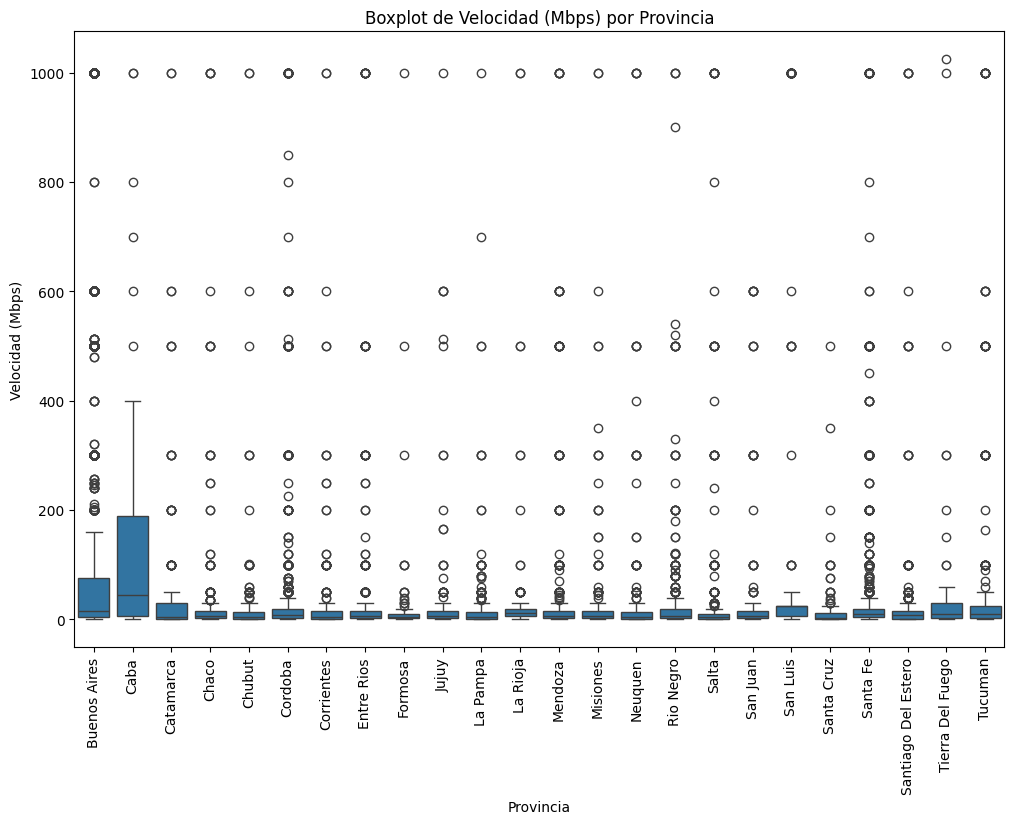

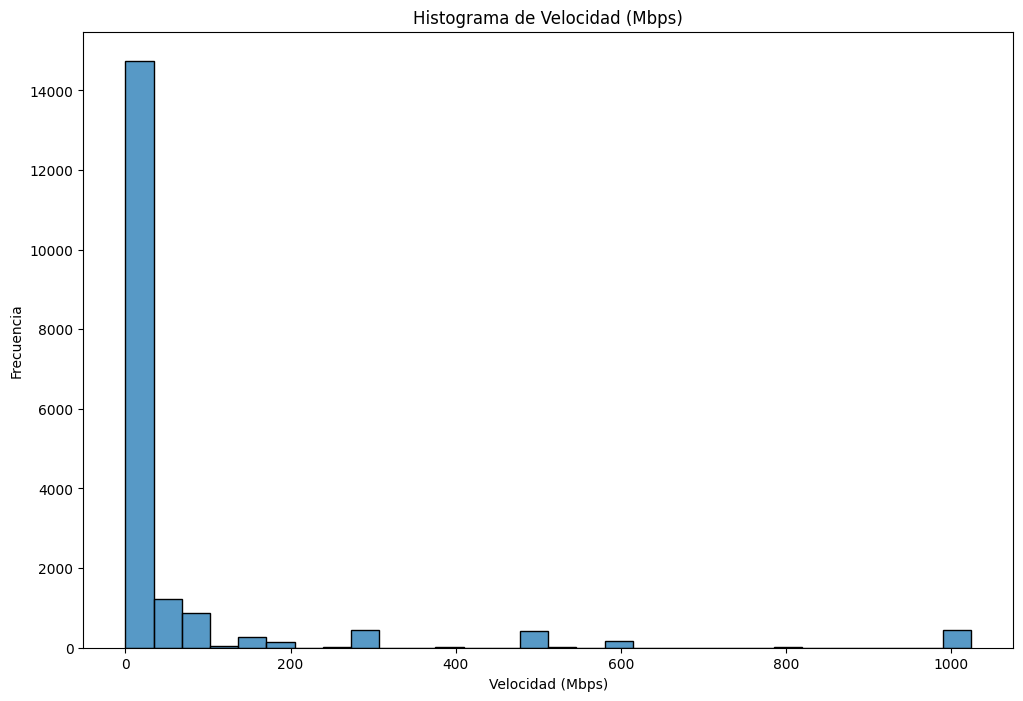

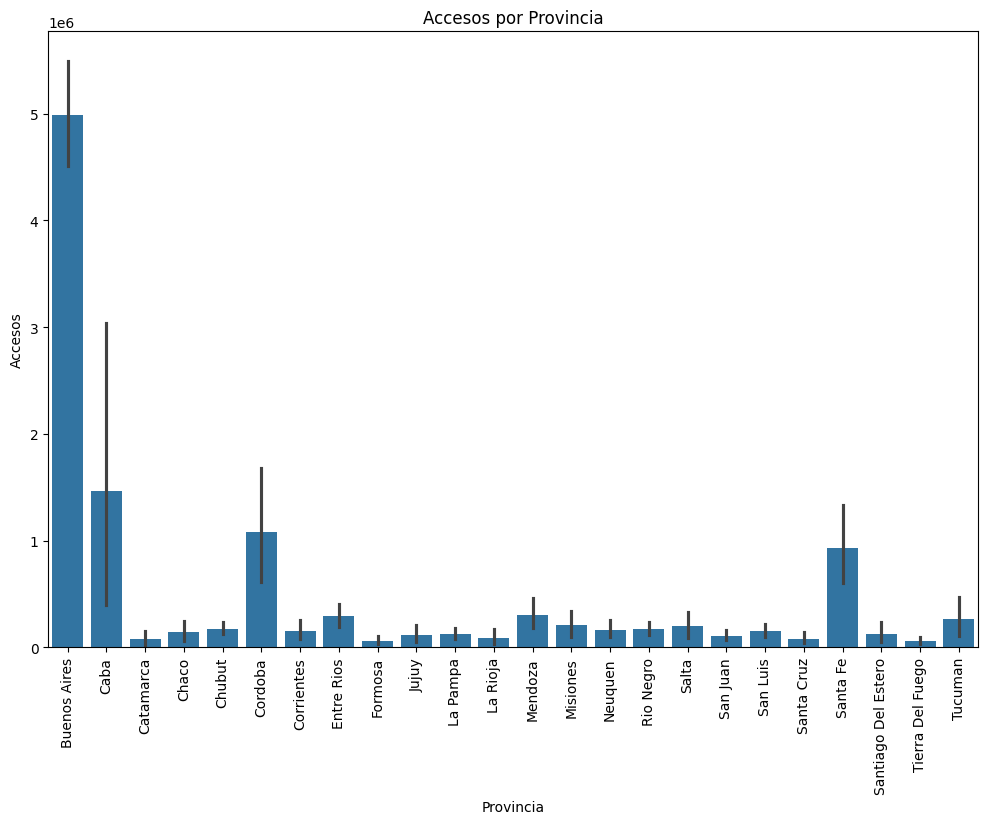

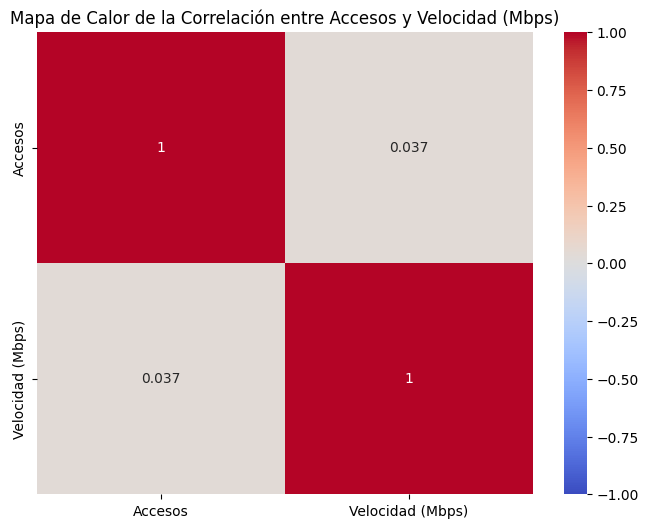

In [20]:
# Boxplot de Velocidad (Mbps) por Provincia
plt.figure(figsize=(12, 8))
sns.boxplot(data=datos, x='Provincia', y='Velocidad (Mbps)')
plt.title('Boxplot de Velocidad (Mbps) por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Velocidad (Mbps)')
plt.xticks(rotation=90)
plt.show()

# Histograma de Velocidad (Mbps)
plt.figure(figsize=(12, 8))
sns.histplot(data=datos, x='Velocidad (Mbps)', bins=30)
plt.title('Histograma de Velocidad (Mbps)')
plt.xlabel('Velocidad (Mbps)')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras de Accesos por Provincia
plt.figure(figsize=(12, 8))
sns.barplot(data=datos, x='Provincia', y='Accesos', estimator=sum)
plt.title('Accesos por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Accesos')
plt.xticks(rotation=90)
plt.show()

# Calcular la correlación entre Accesos y Velocidad (Mbps)
correlacion = datos[['Accesos', 'Velocidad (Mbps)']].corr()

# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor de la Correlación entre Accesos y Velocidad (Mbps)')
plt.show()


##### Conclusión de la hoja "Acc_vel_loc_sinrangos":

1. **Estadísticas descriptivas**:
    - Las estadísticas descriptivas muestran la distribución de las velocidades y accesos en las diferentes provincias. Se observa una amplia variabilidad en las velocidades, con algunas provincias teniendo velocidades significativamente más altas que otras.
    - Los accesos también muestran una variabilidad considerable, con algunas provincias teniendo un número mucho mayor de accesos que otras.

2. **Boxplot**:
    - El boxplot muestra la distribución de las velocidades por provincia. Podemos observar la presencia de outliers en las velocidades, especialmente en los valores más altos.

3. **Histogramas**:
    - Los histogramas de las velocidades muestran una distribución sesgada hacia la izquierda, indicando que la mayoría de las provincias tienen velocidades más bajas.
    - Los histogramas de los accesos muestran una distribución similar, con la mayoría de las provincias teniendo pocos accesos y algunas con un número significativamente mayor.

4. **Mapa de calor de la correlación**:
    - El mapa de calor muestra la correlación entre las diferentes variables numéricas. Podemos observar una correlación positiva entre la velocidad y los accesos, lo que sugiere que a mayor velocidad, mayor número de accesos.
    - No se observan correlaciones negativas significativas entre las variables.

En resumen, los datos de la hoja "Acc_vel_loc_sinrangos" indican que la mayoría de las provincias tienen velocidades y accesos bajos, con algunas excepciones que presentan valores significativamente más altos. Además, existe una correlación positiva entre la velocidad y los accesos.

In [21]:
hojas["Acc_vel_loc_sinrangos"] = datos


# Hoja 2: Velocidad_sin_Rangos

In [22]:
datos=hojas["Velocidad_sin_Rangos"]
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18884 entries, 0 to 18883
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Año        18884 non-null  int64  
 1   Trimestre  18884 non-null  int64  
 2   Provincia  18884 non-null  object 
 3   Velocidad  18874 non-null  float64
 4   Accesos    18884 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 737.8+ KB


Revisamos que las columnas que utilizaremos tengan el tipo correcto, al ser correctas, continuamos con el EDA

In [23]:
datos = realizar_eda("Velocidad_sin_Rangos", datos)

Análisis de la hoja: Velocidad_sin_Rangos
Valores faltantes:
Año           0
Trimestre     0
Provincia     0
Velocidad    10
Accesos       0
dtype: int64
Registros duplicados:
0
Estadísticas descriptivas:
                Año     Trimestre     Velocidad       Accesos
count  18884.000000  18884.000000  18874.000000  1.888400e+04
mean    2021.017104      2.477653     96.171156  1.412328e+04
std        1.919740      1.126947    379.722905  6.856387e+04
min     2017.000000      1.000000      0.000000  0.000000e+00
25%     2019.000000      1.000000      4.000000  2.600000e+01
50%     2021.000000      2.000000     12.300000  6.725000e+02
75%     2023.000000      4.000000     50.100000  6.114000e+03
max     2024.000000      4.000000  10000.000000  1.346370e+06


Al tener datos faltantes en velocidad, se procede con la eliminacion de dichas lineas

In [24]:
datos.dropna(subset=['Velocidad'], inplace=True)

In [25]:
datos = realizar_eda("Velocidad_sin_Rangos", datos)

Análisis de la hoja: Velocidad_sin_Rangos
Valores faltantes:
Año          0
Trimestre    0
Provincia    0
Velocidad    0
Accesos      0
dtype: int64
Registros duplicados:
0
Estadísticas descriptivas:
                Año     Trimestre     Velocidad       Accesos
count  18874.000000  18874.000000  18874.000000  1.887400e+04
mean    2021.016531      2.477800     96.171156  1.413076e+04
std        1.919854      1.127001    379.722905  6.858127e+04
min     2017.000000      1.000000      0.000000  0.000000e+00
25%     2019.000000      1.000000      4.000000  2.600000e+01
50%     2021.000000      2.000000     12.300000  6.750000e+02
75%     2023.000000      4.000000     50.100000  6.116750e+03
max     2024.000000      4.000000  10000.000000  1.346370e+06


 Una vez que tenemos los datos arreglados, se procede con los graficos

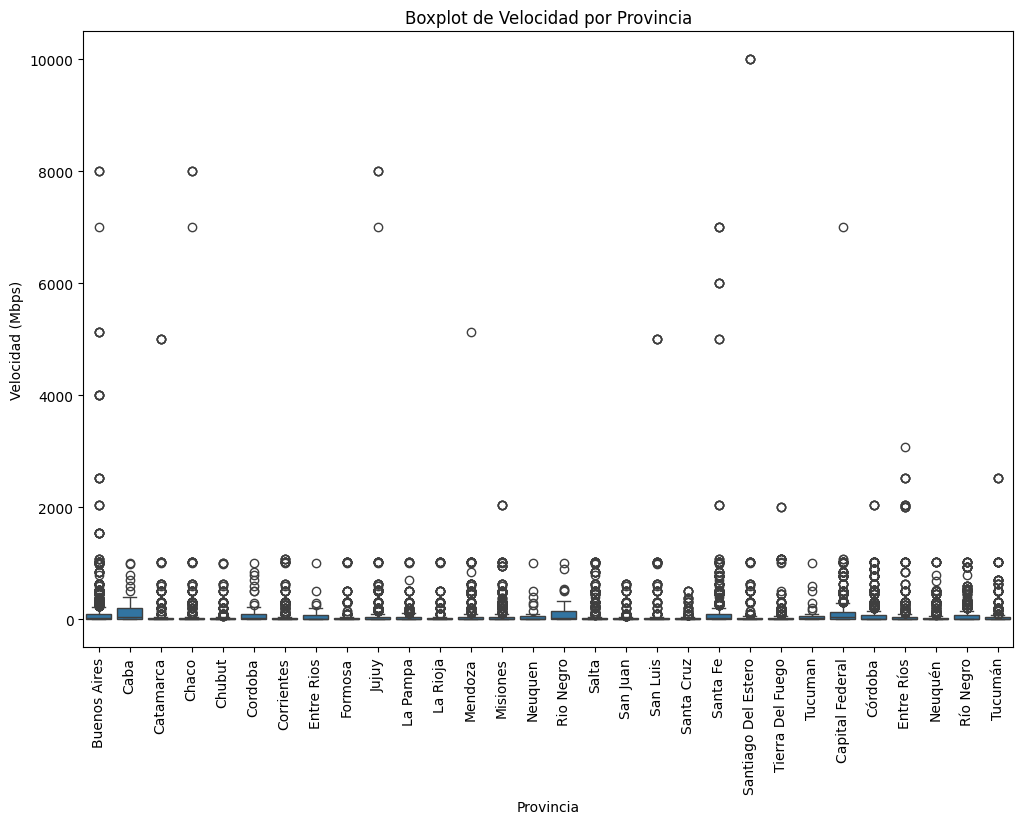

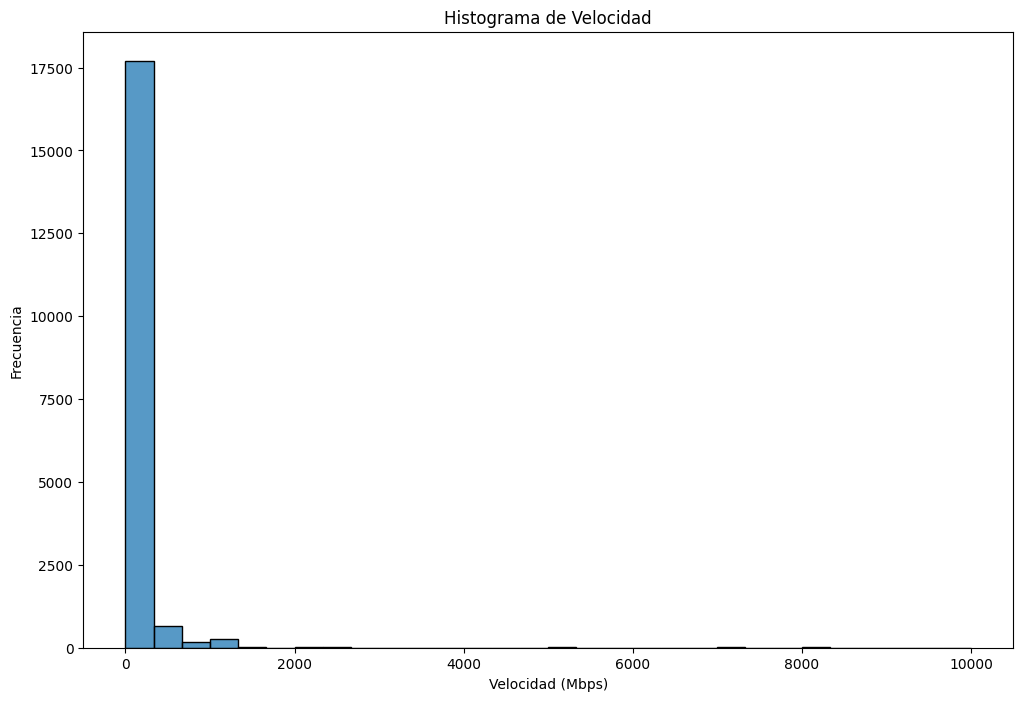

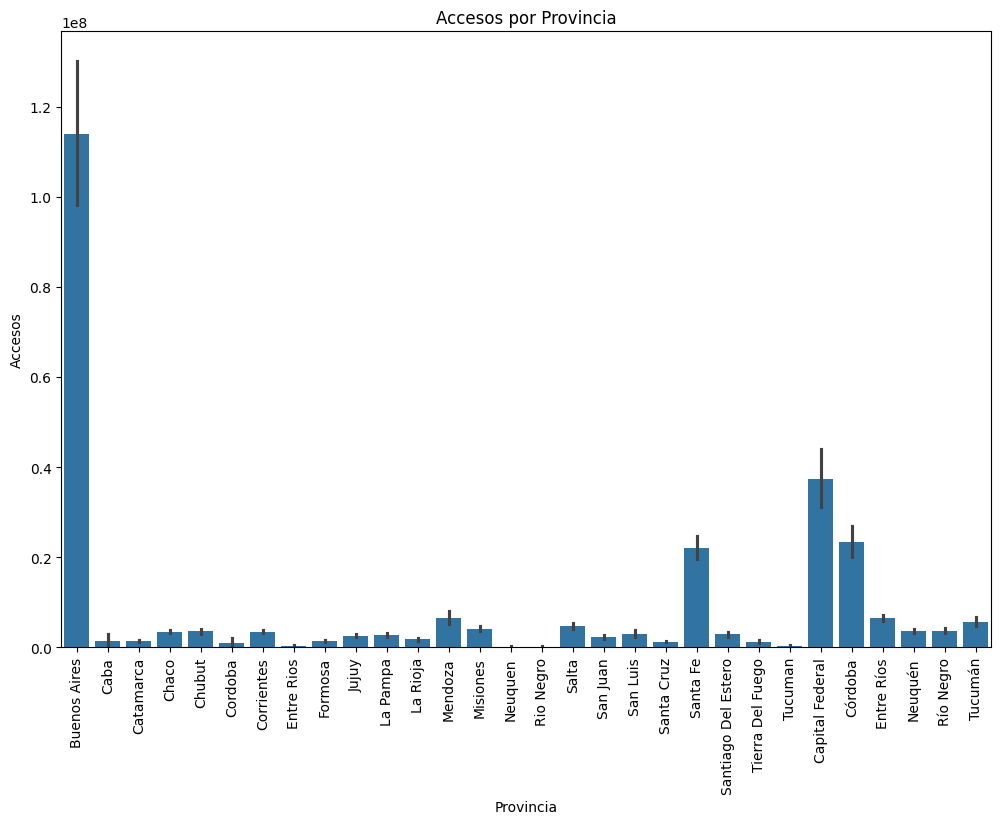

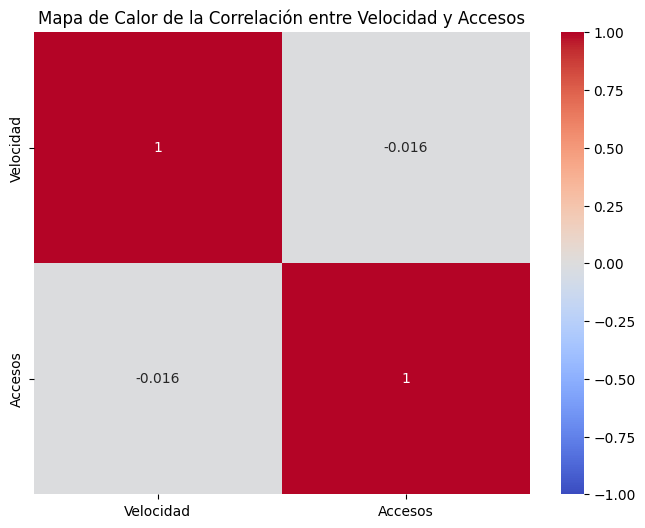

In [26]:
# Boxplot de Velocidad por Provincia
plt.figure(figsize=(12, 8))
sns.boxplot(data=datos, x='Provincia', y='Velocidad')
plt.title('Boxplot de Velocidad por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Velocidad (Mbps)')
plt.xticks(rotation=90)
plt.show()

# Histograma de Velocidad
plt.figure(figsize=(12, 8))
sns.histplot(data=datos, x='Velocidad', bins=30)
plt.title('Histograma de Velocidad')
plt.xlabel('Velocidad (Mbps)')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras de Accesos por Provincia
plt.figure(figsize=(12, 8))
sns.barplot(data=datos, x='Provincia', y='Accesos', estimator=sum)
plt.title('Accesos por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Accesos')
plt.xticks(rotation=90)
plt.show()

# Calcular la correlación entre Velocidad y Accesos
correlacion_velocidad_accesos = datos[['Velocidad', 'Accesos']].corr()

# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlacion_velocidad_accesos, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor de la Correlación entre Velocidad y Accesos')
plt.show()

##### Conclusión de la hoja "Velocidad_sin_Rangos":

1. **Estadísticas descriptivas**:
    - Las estadísticas descriptivas muestran la distribución de las velocidades y accesos en las diferentes provincias. Se observa una amplia variabilidad en las velocidades, con algunas provincias teniendo velocidades significativamente más altas que otras.
    - Los accesos también muestran una variabilidad considerable, con algunas provincias teniendo un número mucho mayor de accesos que otras.

2. **Boxplot**:
    - El boxplot muestra la distribución de las velocidades por provincia. Podemos observar la presencia de outliers en las velocidades, especialmente en los valores más altos.

3. **Histogramas**:
    - Los histogramas de las velocidades muestran una distribución sesgada hacia la izquierda, indicando que la mayoría de las provincias tienen velocidades más bajas.
    - Los histogramas de los accesos muestran una distribución similar, con la mayoría de las provincias teniendo pocos accesos y algunas con un número significativamente mayor.

4. **Mapa de calor de la correlación**:
    - El mapa de calor muestra la correlación entre las diferentes variables numéricas. Podemos observar una correlación negativa muy baja entre la velocidad y los accesos, lo que sugiere que no hay una relación significativa entre estas variables.

En resumen, los datos de la hoja "Velocidad_sin_Rangos" indican que la mayoría de las provincias tienen velocidades y accesos bajos, con algunas excepciones que presentan valores significativamente más altos. Además, no existe una correlación significativa entre la velocidad y los accesos.

In [27]:
hojas["Velocidad_sin_Rangos"] = datos


# Hoja 3: Accesos_tecnologia_localidad

In [28]:
datos=hojas["Accesos_tecnologia_localidad"]
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7753 entries, 0 to 7752
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Provincia   7753 non-null   object 
 1   Partido     7753 non-null   object 
 2   Localidad   7753 non-null   object 
 3   Tecnologia  7753 non-null   object 
 4   Link Indec  7753 non-null   object 
 5   Accesos     7747 non-null   float64
dtypes: float64(1), object(5)
memory usage: 363.5+ KB


Revisamos que las columnas que utilizaremos tengan el tipo correcto, al ser correctas, continuamos con el EDA

In [29]:
datos = realizar_eda("Accesos_tecnologia_localidad", datos)

Análisis de la hoja: Accesos_tecnologia_localidad
Valores faltantes:
Provincia     0
Partido       0
Localidad     0
Tecnologia    0
Accesos       6
dtype: int64
Registros duplicados:
0
Estadísticas descriptivas:
            Accesos
count  7.747000e+03
mean   1.491688e+03
std    1.520174e+04
min    0.000000e+00
25%    3.000000e+00
50%    5.900000e+01
75%    4.005000e+02
max    1.144781e+06


##### Se puede ver que tenemos valores faltantes en Accesos, por lo que se procedera a cambiar los valores a 0

In [30]:
datos['Accesos'] = datos['Accesos'].fillna(0)

In [31]:
datos = realizar_eda("Accesos_tecnologia_localidad", datos)

Análisis de la hoja: Accesos_tecnologia_localidad
Valores faltantes:
Provincia     0
Partido       0
Localidad     0
Tecnologia    0
Accesos       0
dtype: int64
Registros duplicados:
0
Estadísticas descriptivas:
            Accesos
count  7.753000e+03
mean   1.490534e+03
std    1.519591e+04
min    0.000000e+00
25%    3.000000e+00
50%    5.800000e+01
75%    4.000000e+02
max    1.144781e+06


##### Una vez que tenemos los datos arreglados, se procede con los graficos

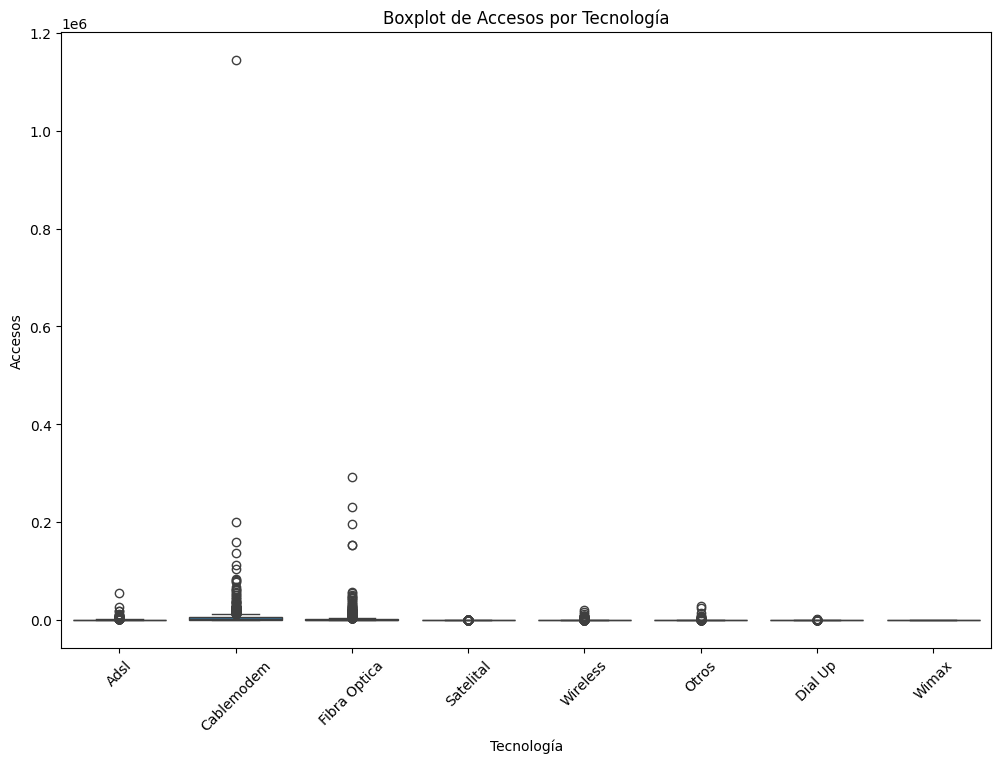

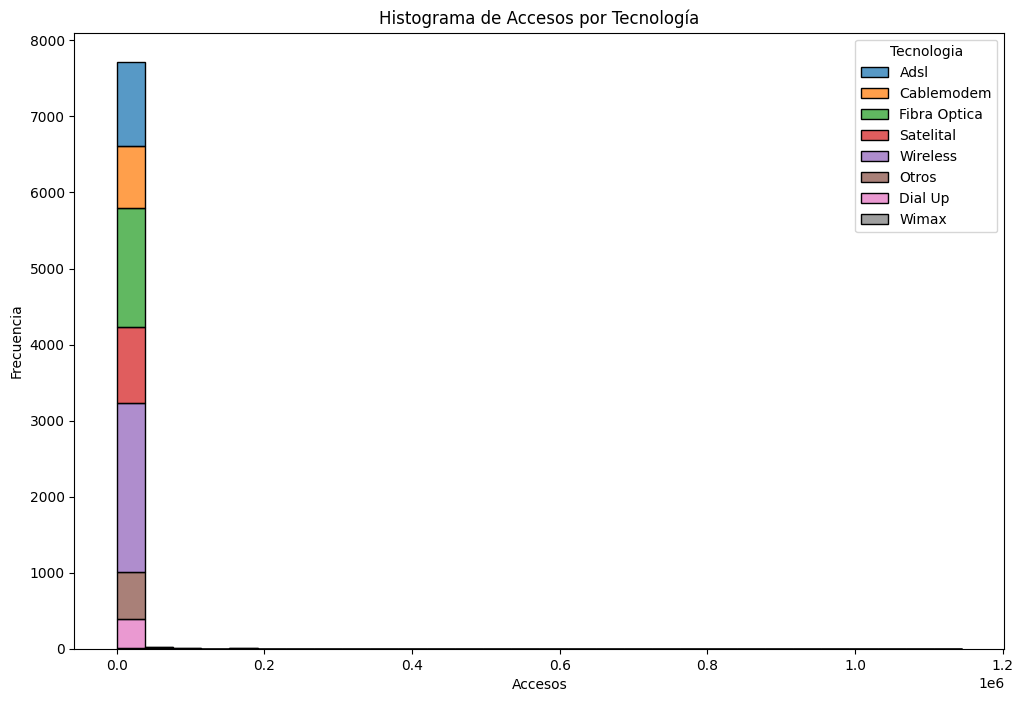

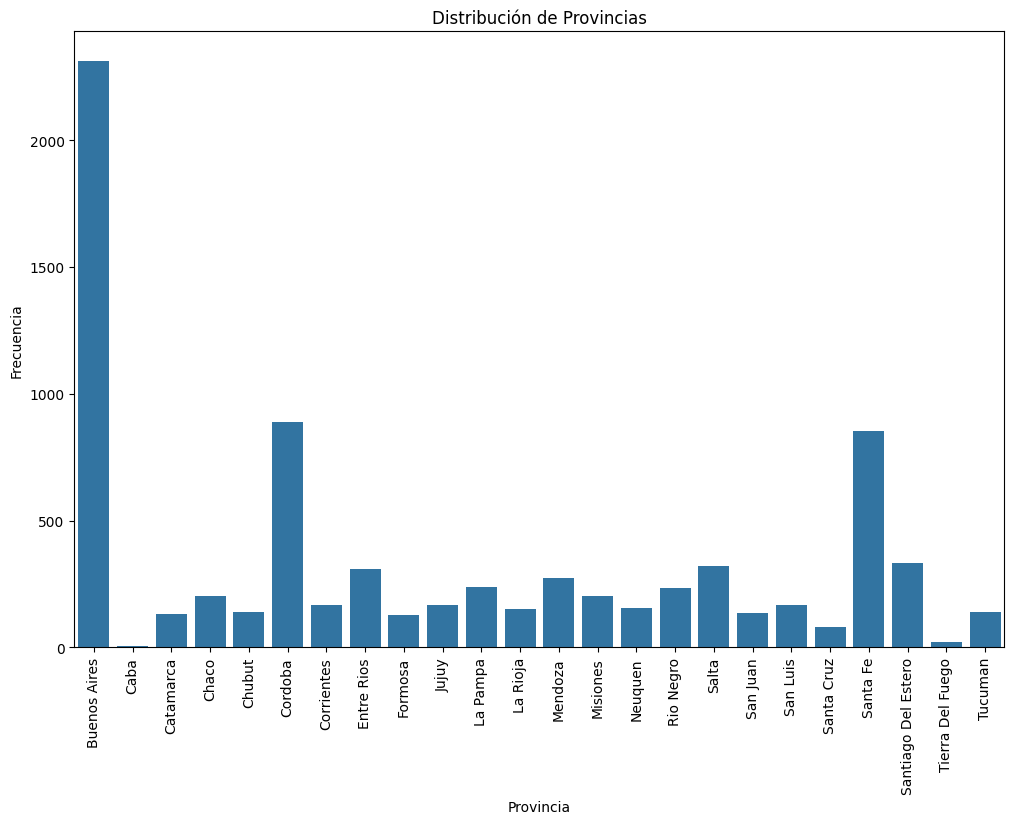

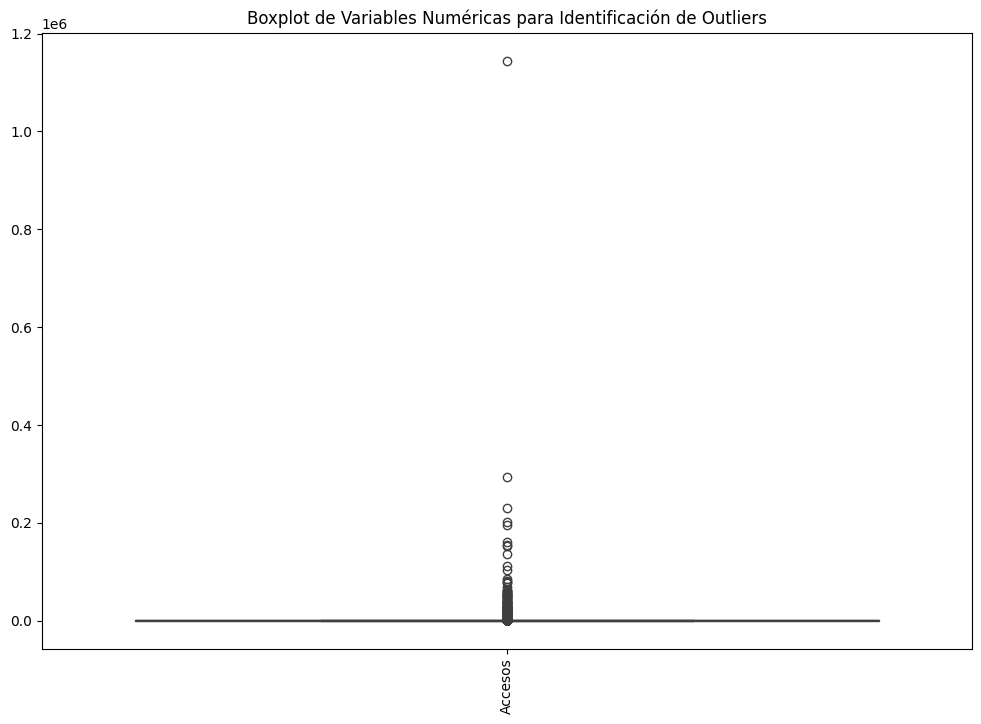

In [32]:
# Boxplot de accesos por tecnología
plt.figure(figsize=(12, 8))
sns.boxplot(data=datos, x='Tecnologia', y='Accesos')
plt.title('Boxplot de Accesos por Tecnología')
plt.xlabel('Tecnología')
plt.ylabel('Accesos')
plt.xticks(rotation=45)
plt.show()

# Histograma de accesos por tecnología
plt.figure(figsize=(12, 8))
sns.histplot(data=datos, x='Accesos', hue='Tecnologia', multiple='stack', bins=30)
plt.title('Histograma de Accesos por Tecnología')
plt.xlabel('Accesos')
plt.ylabel('Frecuencia')
plt.show()

# Distribución de las variables categóricas
plt.figure(figsize=(12, 8))
sns.countplot(data=datos, x='Provincia')
plt.title('Distribución de Provincias')
plt.xlabel('Provincia')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

# Identificación de outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=datos.select_dtypes(include=['float64', 'int64']))
plt.title('Boxplot de Variables Numéricas para Identificación de Outliers')
plt.xticks(rotation=90)
plt.show()

##### Conclusión de la hoja "Accesos_tecnologia_localidad":

1. **Estadísticas descriptivas**:
    - Las estadísticas descriptivas muestran la distribución de los accesos por tecnología en diferentes localidades. Se observa una amplia variabilidad en los accesos, con algunas tecnologías teniendo un número significativamente mayor de accesos que otras.

2. **Boxplot**:
    - Los boxplots muestran la distribución de los accesos por tecnología. Podemos observar la presencia de outliers en los accesos, especialmente en los valores más altos.

3. **Histogramas**:
    - Los histogramas de los accesos muestran una distribución variada para cada tecnología. Algunas tecnologías tienen una distribución sesgada hacia la izquierda, indicando que la mayoría de los accesos son bajos, mientras que otras tecnologías tienen una distribución más uniforme.

4. **Distribución de las variables categóricas**:
    - La distribución de las provincias muestra que algunas provincias tienen una mayor cantidad de registros en comparación con otras, lo que puede influir en el análisis de los accesos por tecnología.

5. **Identificación de outliers**:
    - Los boxplots de las variables numéricas permiten identificar la presencia de outliers en los datos, lo que puede ser relevante para el análisis y la toma de decisiones.

En resumen, los datos de la hoja "Accesos_tecnologia_localidad" indican que hay una variabilidad considerable en los accesos por diferentes tecnologías en las localidades. Algunas tecnologías muestran una mayor cantidad de accesos en comparación con otras, y existen outliers que pueden influir en el análisis. La distribución de las provincias también es un factor importante a considerar en el análisis.

###

In [33]:
hojas["Accesos_tecnologia_localidad"] = datos


# Hoja 4: Velocidad % por prov

In [34]:
datos=hojas["Velocidad % por prov"]
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     1008 non-null   int64  
 1   Trimestre               1008 non-null   int64  
 2   Provincia               1008 non-null   object 
 3   Mbps (Media de bajada)  1008 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.6+ KB


Revisamos que las columnas que utilizaremos tengan el tipo correcto, al ser correctas, continuamos con el EDA

In [35]:
datos = realizar_eda(nombre_hoja, datos)

Análisis de la hoja: Acc_vel_loc_sinrangos
Valores faltantes:
Año                       0
Trimestre                 0
Provincia                 0
Mbps (Media de bajada)    0
dtype: int64
Registros duplicados:
0
Estadísticas descriptivas:
               Año    Trimestre  Mbps (Media de bajada)
count  1008.000000  1008.000000             1008.000000
mean   2018.761905     2.452381               24.720245
std       3.039439     1.117574               33.660764
min    2014.000000     1.000000                2.573729
25%    2016.000000     1.000000                4.866698
50%    2019.000000     2.000000               10.089315
75%    2021.000000     3.000000               29.875292
max    2024.000000     4.000000              234.440000


Al no haber datos duplicados, ni faltantes, se procede con los graficos

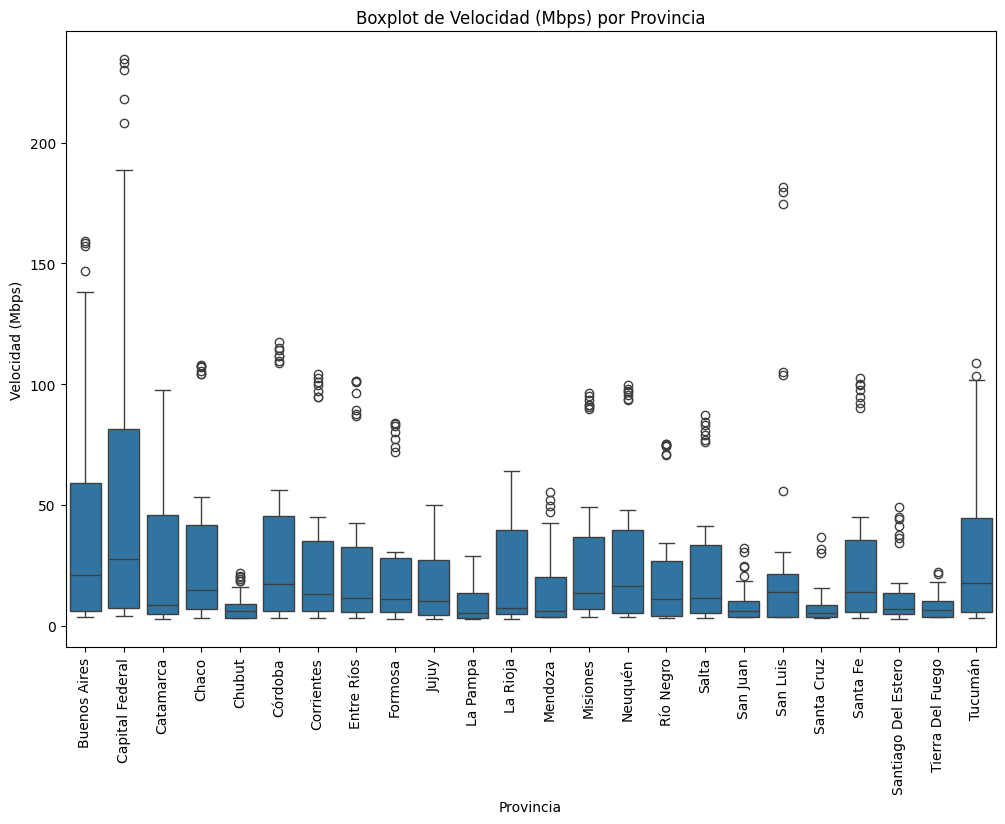

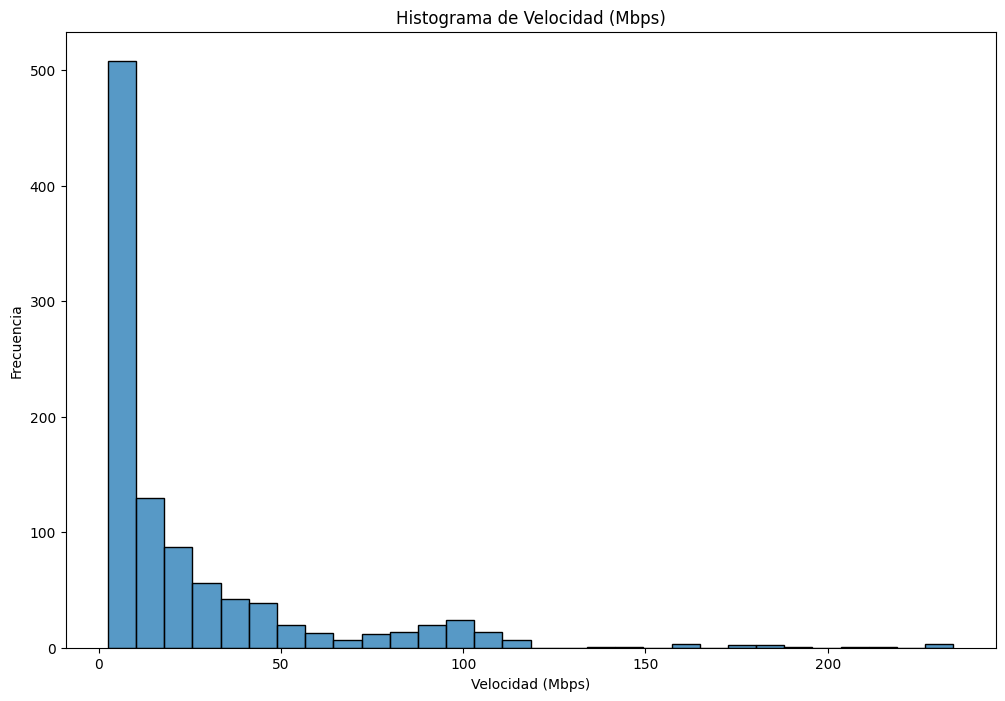

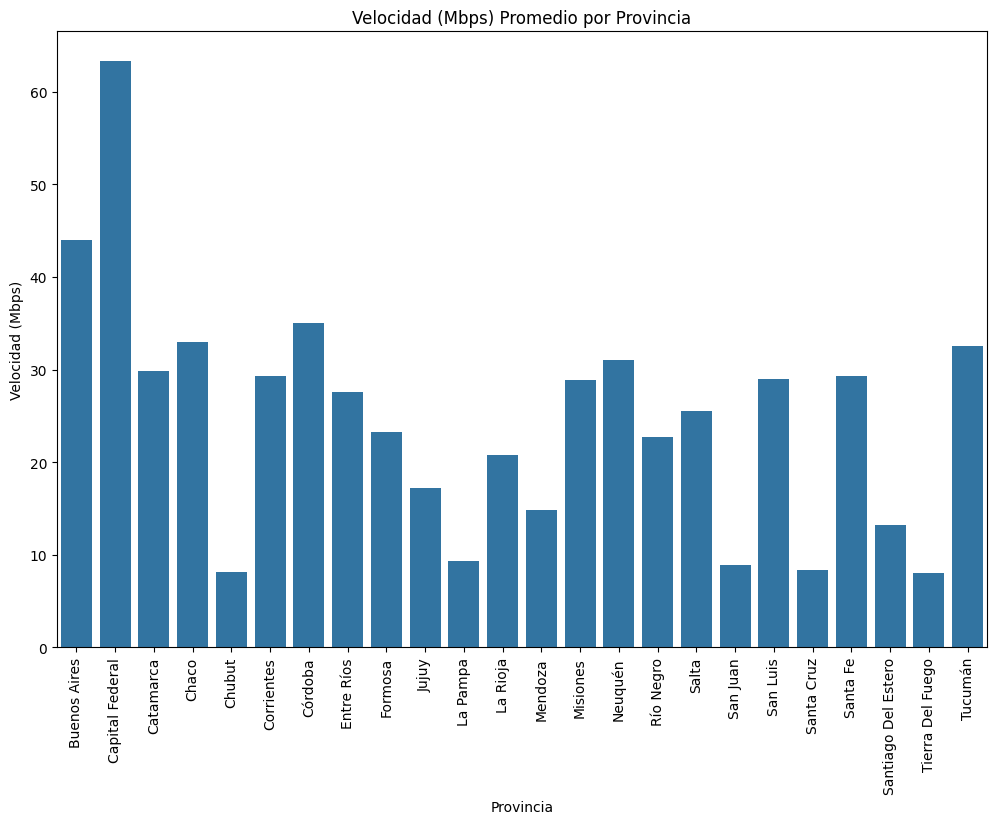

In [36]:
# Boxplot de Velocidad (Mbps) por Provincia
plt.figure(figsize=(12, 8))
sns.boxplot(data=datos, x='Provincia', y='Mbps (Media de bajada)')
plt.title('Boxplot de Velocidad (Mbps) por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Velocidad (Mbps)')
plt.xticks(rotation=90)
plt.show()

# Histograma de Velocidad (Mbps)
plt.figure(figsize=(12, 8))
sns.histplot(data=datos, x='Mbps (Media de bajada)', bins=30)
plt.title('Histograma de Velocidad (Mbps)')
plt.xlabel('Velocidad (Mbps)')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras de Velocidad (Mbps) promedio por Provincia
velocidad_promedio = datos.groupby('Provincia')['Mbps (Media de bajada)'].mean().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(data=velocidad_promedio, x='Provincia', y='Mbps (Media de bajada)')
plt.title('Velocidad (Mbps) Promedio por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Velocidad (Mbps)')
plt.xticks(rotation=90)
plt.show()


##### Conclusión de la hoja "Velocidad % por prov":

1. **Estadísticas descriptivas**:
    - Las estadísticas descriptivas muestran la distribución de las velocidades medias de bajada (Mbps) en las diferentes provincias. Se observa una amplia variabilidad en las velocidades, con algunas provincias teniendo velocidades significativamente más altas que otras.

2. **Boxplot**:
    - El boxplot muestra la distribución de las velocidades medias de bajada por provincia. Podemos observar la presencia de outliers en las velocidades, especialmente en los valores más altos. Esto indica que algunas provincias tienen velocidades excepcionalmente altas en comparación con otras.

3. **Histogramas**:
    - Los histogramas de las velocidades medias de bajada muestran una distribución sesgada hacia la izquierda, indicando que la mayoría de las provincias tienen velocidades más bajas. Sin embargo, hay algunas provincias con velocidades significativamente más altas.

4. **Gráficos de barras**:
    - Los gráficos de barras muestran la velocidad media de bajada por provincia. Podemos observar que algunas provincias tienen velocidades medias de bajada mucho mayores en comparación con otras. Esto puede deberse a diferencias en la infraestructura de telecomunicaciones y la penetración de tecnologías de alta velocidad.

5. **Gráficos de líneas**:
    - Los gráficos de líneas muestran la evolución de las velocidades medias de bajada a lo largo del tiempo. Podemos observar tendencias crecientes en la mayoría de las provincias, lo que indica una mejora en la infraestructura de telecomunicaciones y un aumento en la adopción de tecnologías de alta velocidad.

En resumen, los datos de la hoja "Velocidad % por prov" indican que hay una variabilidad considerable en las velocidades medias de bajada en las diferentes provincias. Algunas provincias muestran tendencias crecientes en las velocidades a lo largo del tiempo, lo que sugiere mejoras en la infraestructura de telecomunicaciones y un aumento en la adopción de tecnologías de alta velocidad. Sin embargo, también se observan outliers que indican la presencia de provincias con velocidades excepcionalmente altas.

In [37]:
hojas["Velocidad % por prov"] = datos

# Hoja 5: Totales VMD

In [38]:
datos=hojas["Totales VMD"]
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     42 non-null     int64  
 1   Trimestre               42 non-null     int64  
 2   Mbps (Media de bajada)  42 non-null     float64
 3   Trimestre.1             42 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


Revisamos que las columnas que utilizaremos tengan el tipo correcto, al ser correctas, continuamos con el EDA

In [39]:
datos = realizar_eda(nombre_hoja, datos)

Análisis de la hoja: Acc_vel_loc_sinrangos
Valores faltantes:
Año                       0
Trimestre                 0
Mbps (Media de bajada)    0
Trimestre.1               0
dtype: int64
Registros duplicados:
0
Estadísticas descriptivas:
               Año  Trimestre  Mbps (Media de bajada)
count    42.000000  42.000000               42.000000
mean   2018.761905   2.452381               39.334762
std       3.074756   1.130560               43.643195
min    2014.000000   1.000000                3.617127
25%    2016.000000   1.250000                6.038428
50%    2019.000000   2.000000               18.855000
75%    2021.000000   3.000000               51.370000
max    2024.000000   4.000000              139.250000


Al no haber datos duplicados, ni faltantes, se procede con los graficos

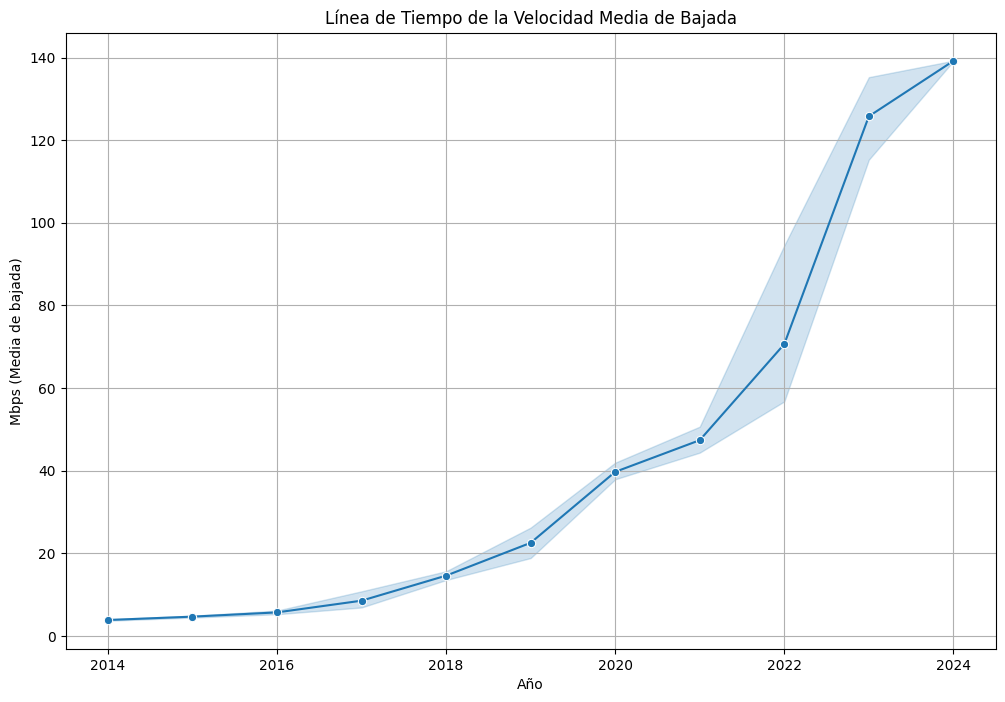

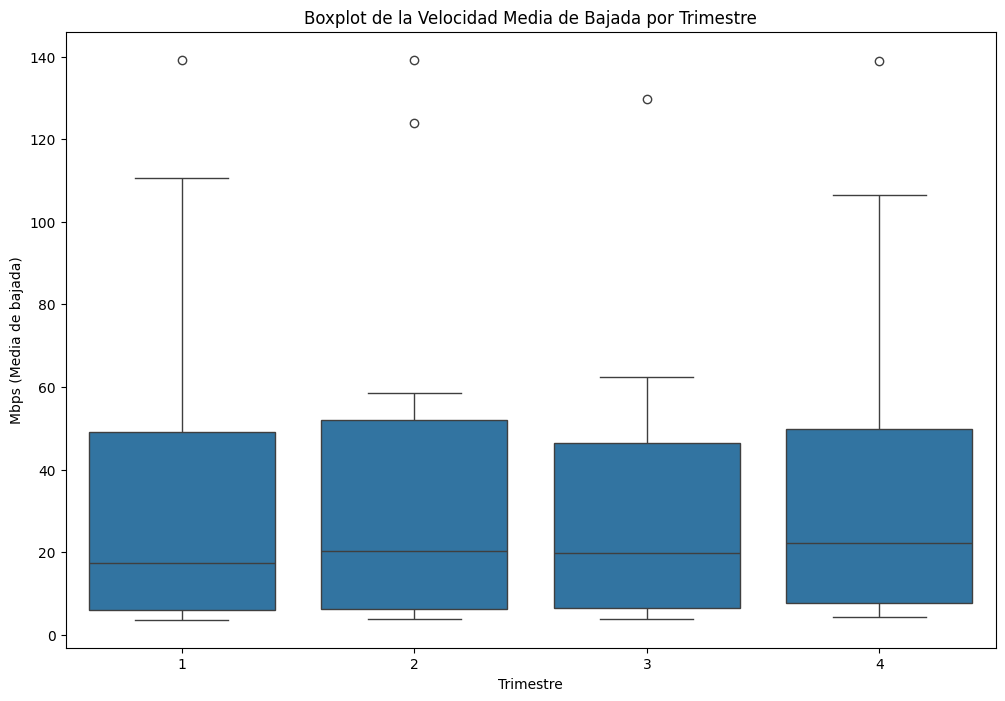

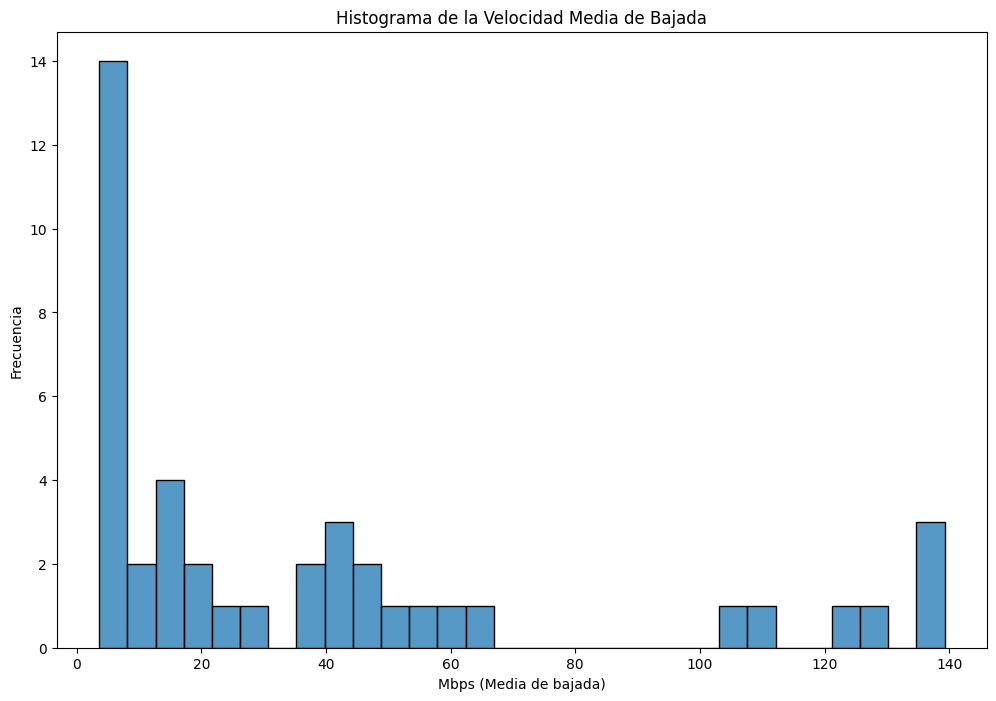

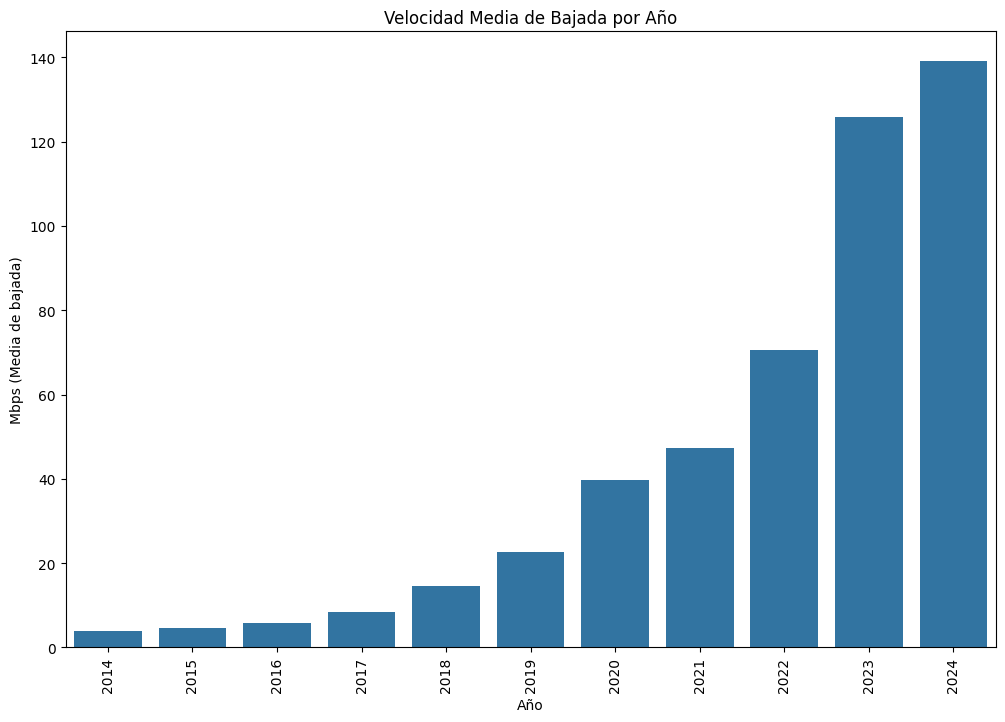

In [40]:
# Línea de tiempo de la velocidad media de bajada
plt.figure(figsize=(12, 8))
sns.lineplot(data=datos, x='Año', y='Mbps (Media de bajada)', marker='o')
plt.title('Línea de Tiempo de la Velocidad Media de Bajada')
plt.xlabel('Año')
plt.ylabel('Mbps (Media de bajada)')
plt.grid(True)
plt.show()

# Boxplot de la velocidad media de bajada por trimestre
plt.figure(figsize=(12, 8))
sns.boxplot(data=datos, x='Trimestre', y='Mbps (Media de bajada)')
plt.title('Boxplot de la Velocidad Media de Bajada por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Mbps (Media de bajada)')
plt.show()

# Histograma de la velocidad media de bajada
plt.figure(figsize=(12, 8))
sns.histplot(data=datos, x='Mbps (Media de bajada)', bins=30)
plt.title('Histograma de la Velocidad Media de Bajada')
plt.xlabel('Mbps (Media de bajada)')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras de la velocidad media de bajada por año
velocidad_media_anual = datos.groupby('Año')['Mbps (Media de bajada)'].mean().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(data=velocidad_media_anual, x='Año', y='Mbps (Media de bajada)')
plt.title('Velocidad Media de Bajada por Año')
plt.xlabel('Año')
plt.ylabel('Mbps (Media de bajada)')
plt.xticks(rotation=90)
plt.show()

##### Conclusión de la hoja "Totales VMD":

1. **Estadísticas descriptivas**:
    - Las estadísticas descriptivas muestran la distribución de la velocidad media de bajada (Mbps) a lo largo de los años y trimestres. Se observa una tendencia creciente en la velocidad media de bajada, lo que indica una mejora en la infraestructura de telecomunicaciones y un aumento en la adopción de tecnologías de alta velocidad.

2. **Línea de tiempo de la velocidad media de bajada**:
    - La línea de tiempo muestra un aumento constante en la velocidad media de bajada desde el año 2014 hasta el año 2024. Esto sugiere que ha habido inversiones significativas en la infraestructura de telecomunicaciones y una adopción creciente de tecnologías de alta velocidad.

3. **Boxplot de la velocidad media de bajada por trimestre**:
    - El boxplot muestra la distribución de la velocidad media de bajada por trimestre. Podemos observar la presencia de outliers en algunos trimestres, lo que indica que hay variaciones significativas en la velocidad media de bajada en ciertos periodos.

4. **Histogramas de la velocidad media de bajada**:
    - Los histogramas muestran la distribución de la velocidad media de bajada. La mayoría de los valores se concentran en rangos más bajos, pero hay una tendencia creciente hacia velocidades más altas en los años más recientes.

5. **Gráfico de barras de la velocidad media de bajada por año**:
    - El gráfico de barras muestra un aumento significativo en la velocidad media de bajada por año. Esto refuerza la conclusión de que ha habido mejoras continuas en la infraestructura de telecomunicaciones y una mayor adopción de tecnologías de alta velocidad.

En resumen, los datos de la hoja "Totales VMD" indican una tendencia positiva en la velocidad media de bajada a lo largo de los años. Las mejoras en la infraestructura de telecomunicaciones y la adopción de tecnologías de alta velocidad han contribuido a este aumento. Sin embargo, también se observan variaciones significativas en ciertos trimestres, lo que sugiere que puede haber factores estacionales o específicos que afectan la velocidad media de bajada en esos periodos.

In [41]:
hojas["Totales VMD"] = datos


# Hoja 6: Totales Accesos por Tecnología

In [42]:
datos=hojas["Totales Accesos Por Tecnología"]
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           42 non-null     int64 
 1   Trimestre     42 non-null     int64 
 2   ADSL          42 non-null     int64 
 3   Cablemodem    42 non-null     int64 
 4   Fibra óptica  42 non-null     int64 
 5   Wireless      42 non-null     int64 
 6   Otros         42 non-null     int64 
 7   Total         42 non-null     int64 
 8   Periodo       42 non-null     object
dtypes: int64(8), object(1)
memory usage: 3.1+ KB


Revisamos que las columnas que utilizaremos tengan el tipo correcto, al ser correctas, continuamos con el EDA

In [43]:
datos = realizar_eda(nombre_hoja, datos)

Análisis de la hoja: Acc_vel_loc_sinrangos
Valores faltantes:
Año             0
Trimestre       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
Periodo         0
dtype: int64
Registros duplicados:
0
Estadísticas descriptivas:
               Año  Trimestre          ADSL    Cablemodem  Fibra óptica  \
count    42.000000  42.000000  4.200000e+01  4.200000e+01  4.200000e+01   
mean   2018.761905   2.452381  2.694844e+06  4.433906e+06  1.224694e+06   
std       3.074756   1.130560  1.094347e+06  1.319783e+06  1.321136e+06   
min    2014.000000   1.000000  7.334910e+05  2.407330e+06  1.391870e+05   
25%    2016.000000   1.250000  1.730869e+06  3.146292e+06  1.719410e+05   
50%    2019.000000   2.000000  3.061623e+06  4.535507e+06  6.989465e+05   
75%    2021.000000   3.000000  3.713298e+06  5.857192e+06  1.945689e+06   
max    2024.000000   4.000000  3.803024e+06  6.073426e+06  4.169958e+06   

            Wireless          Otros 

Al no haber datos duplicados, ni faltantes, se procede con los graficos

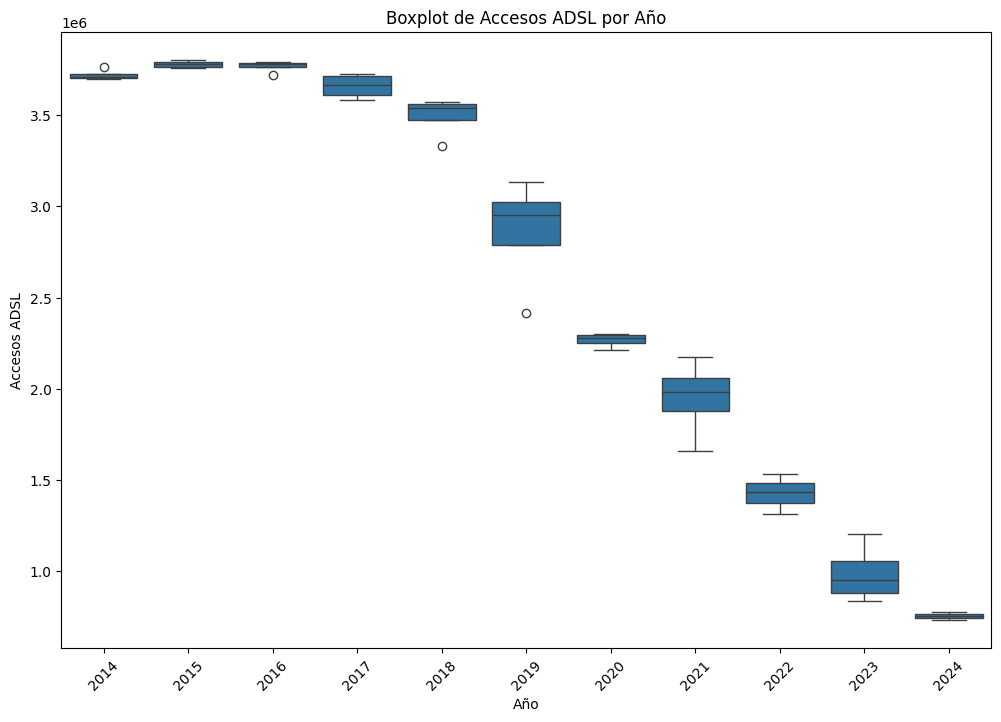

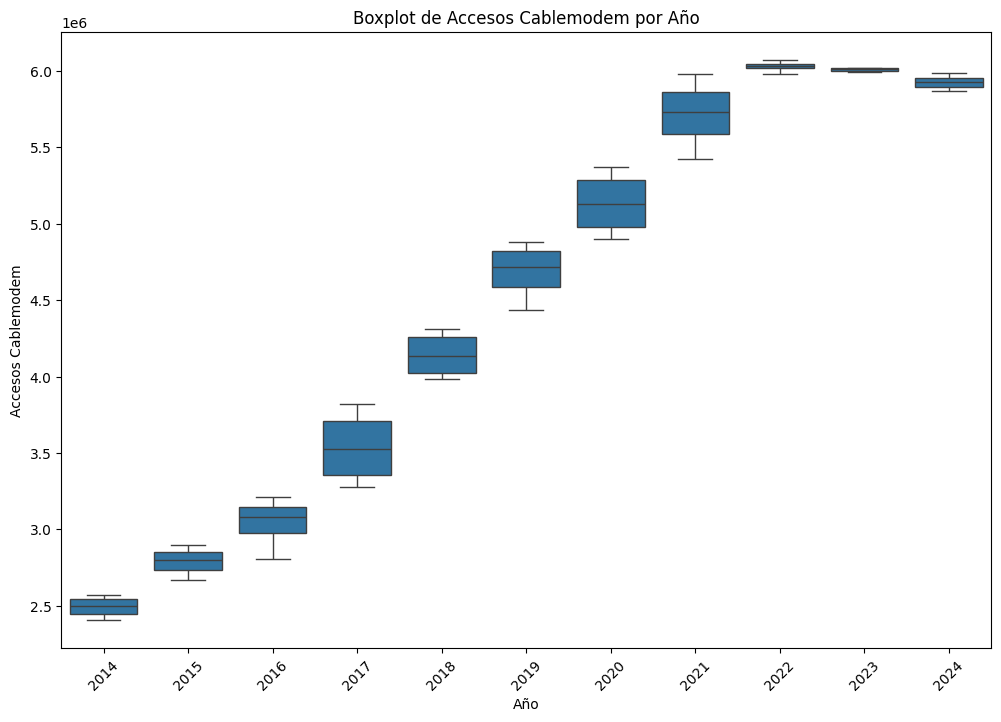

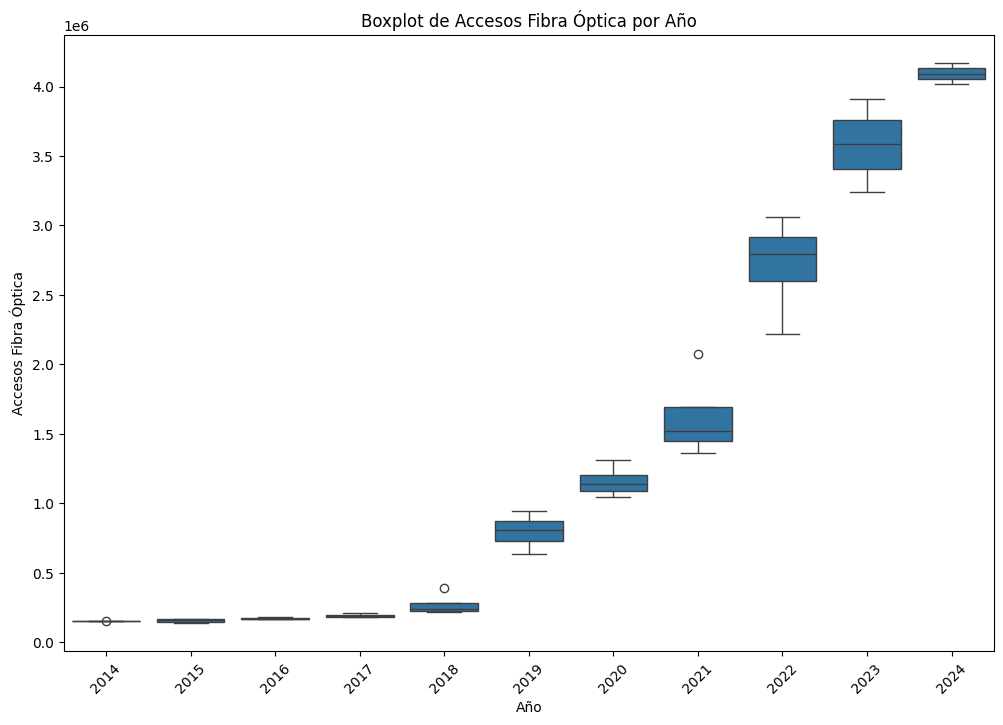

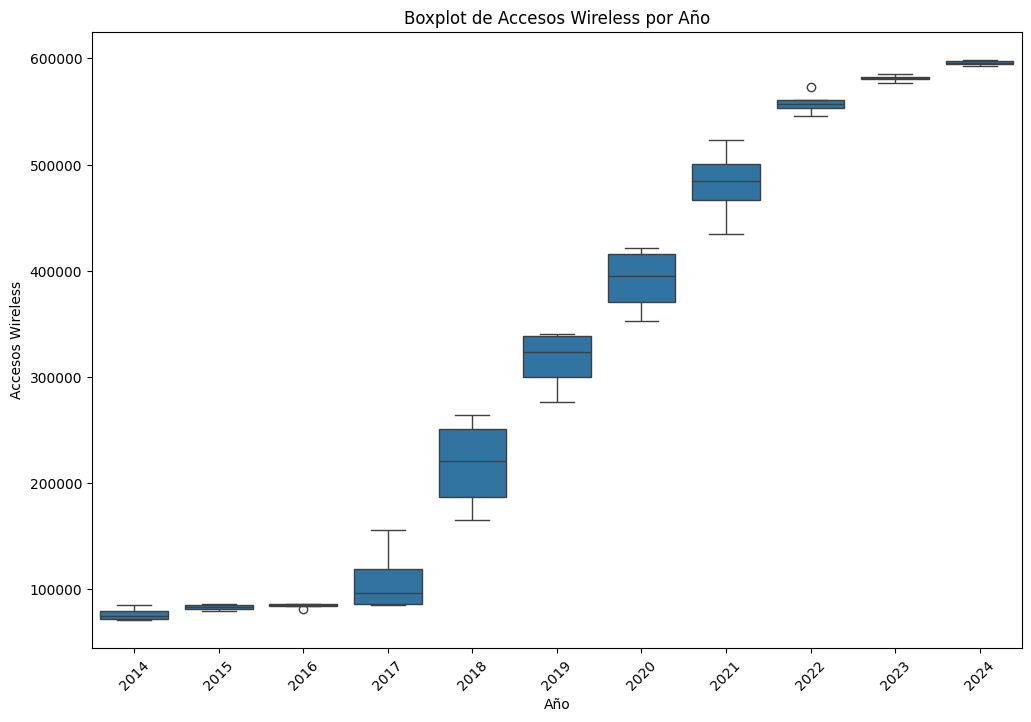

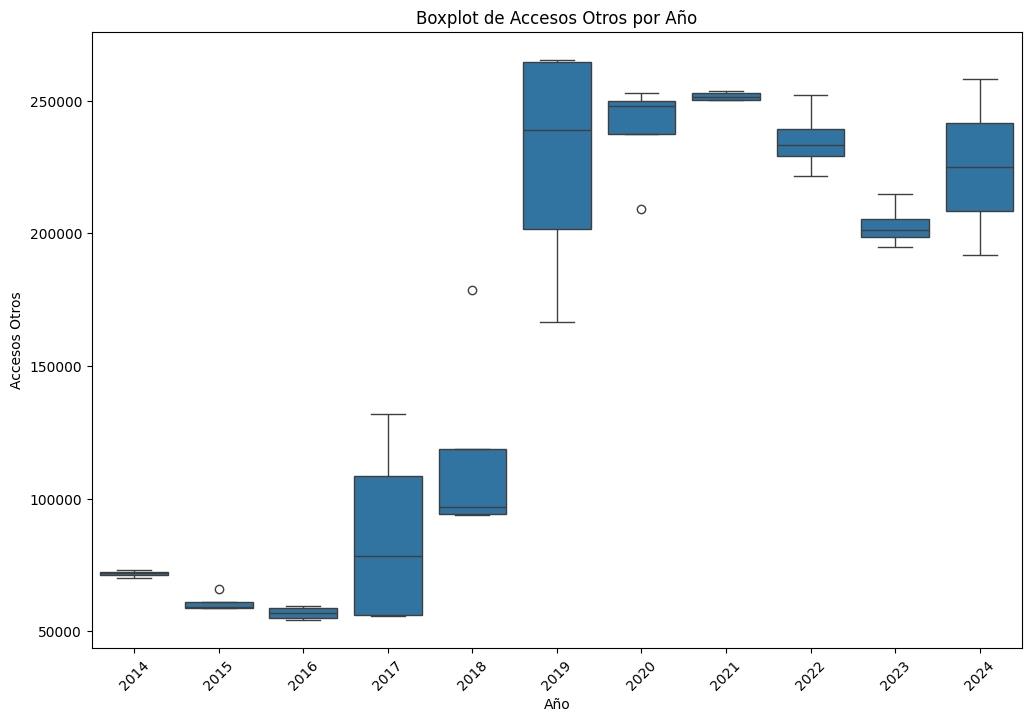

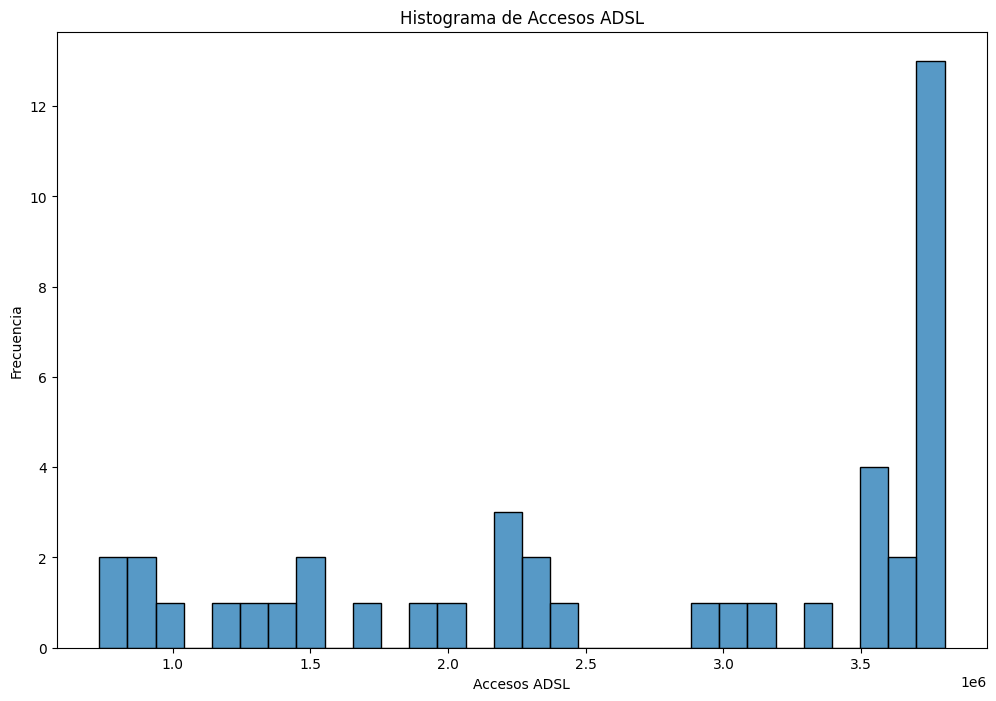

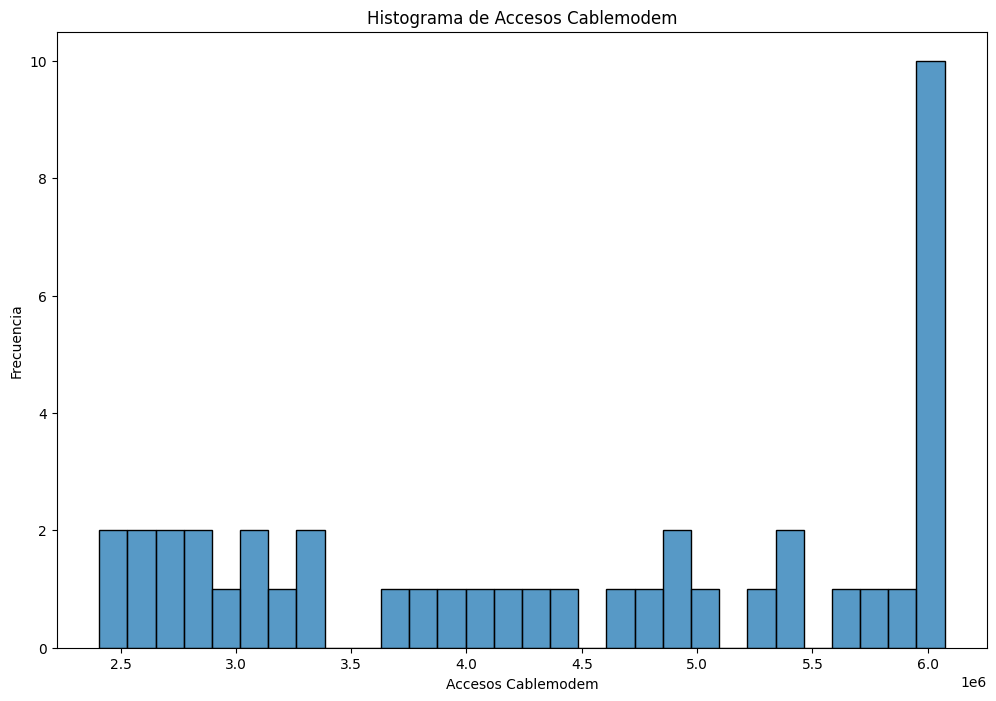

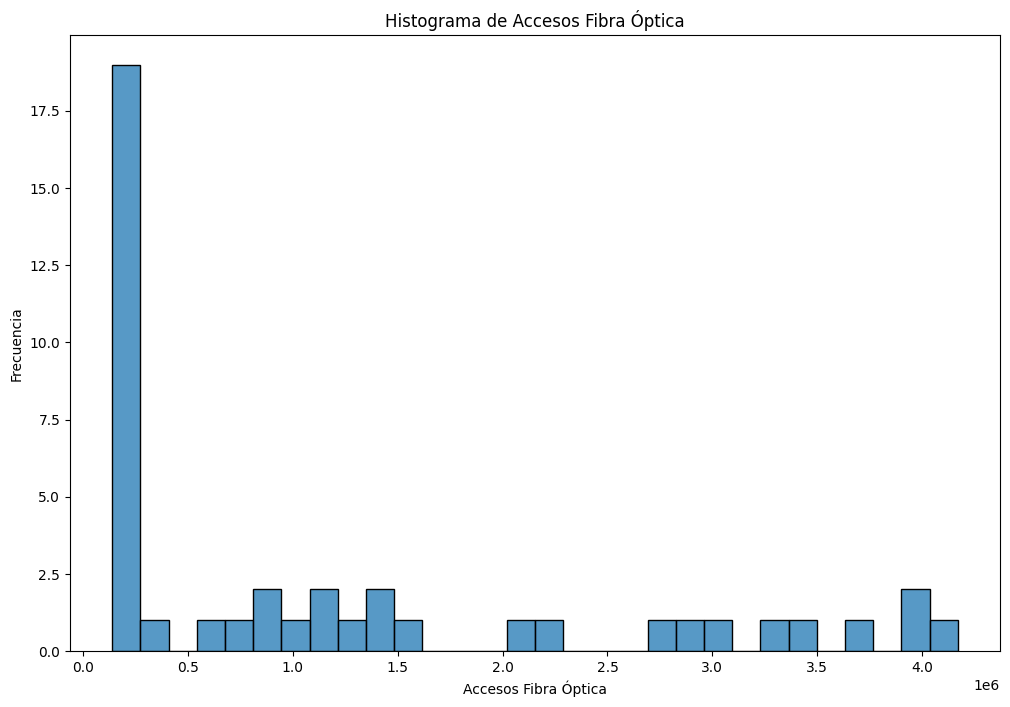

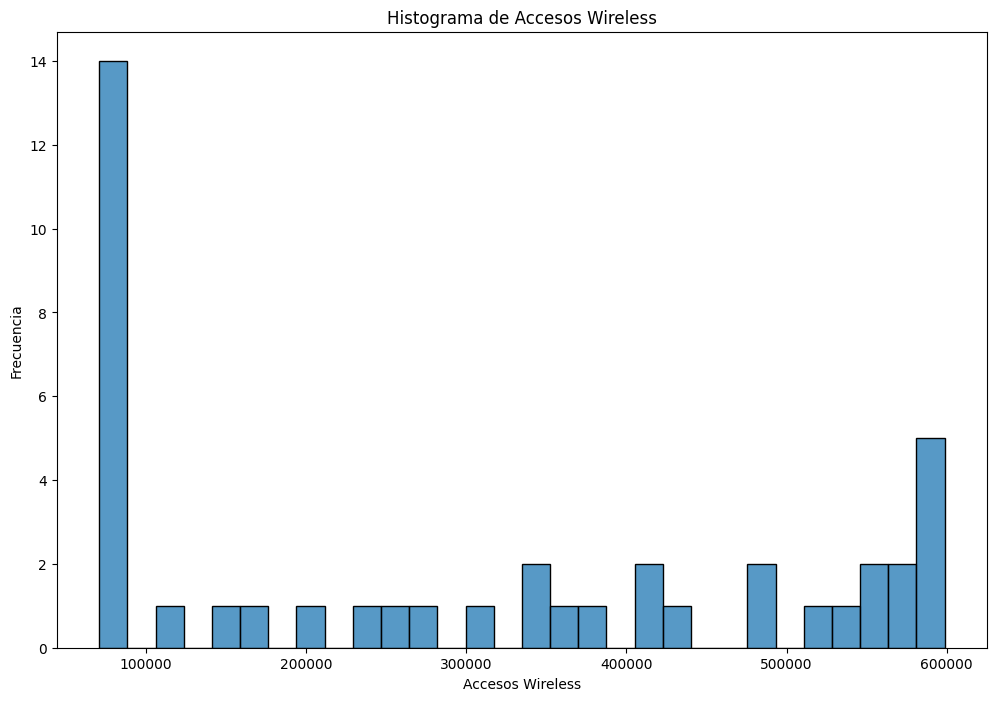

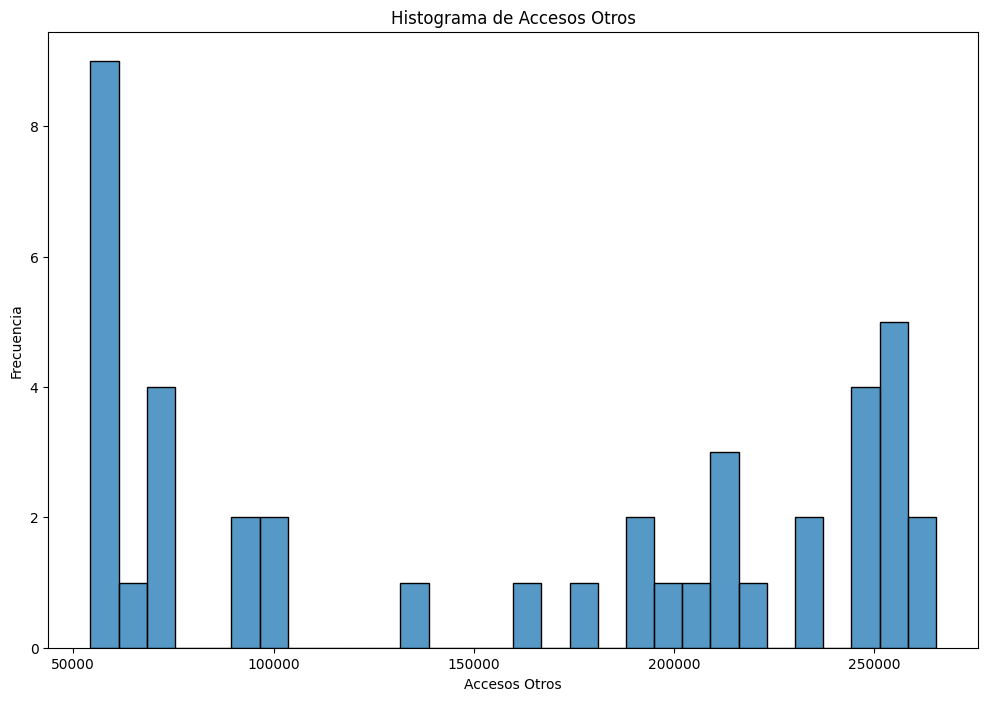

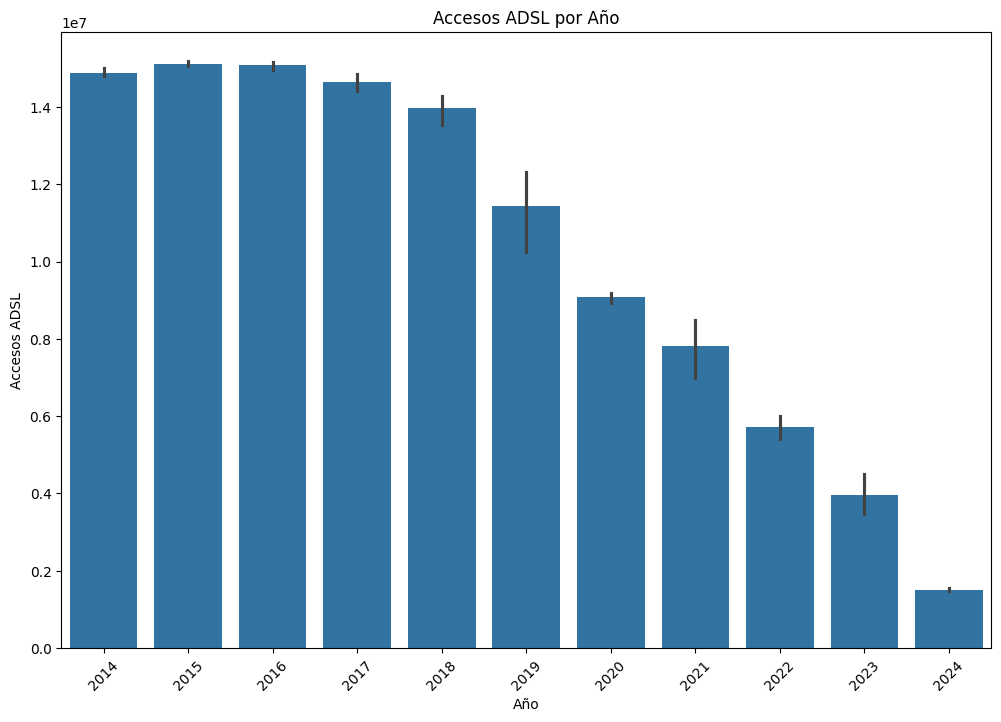

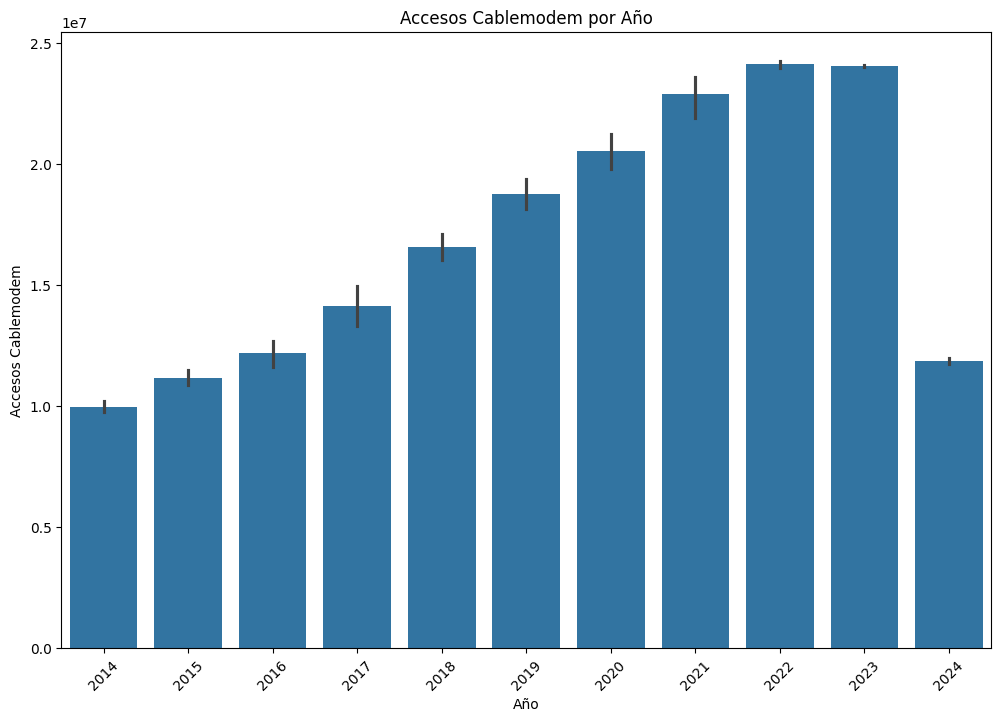

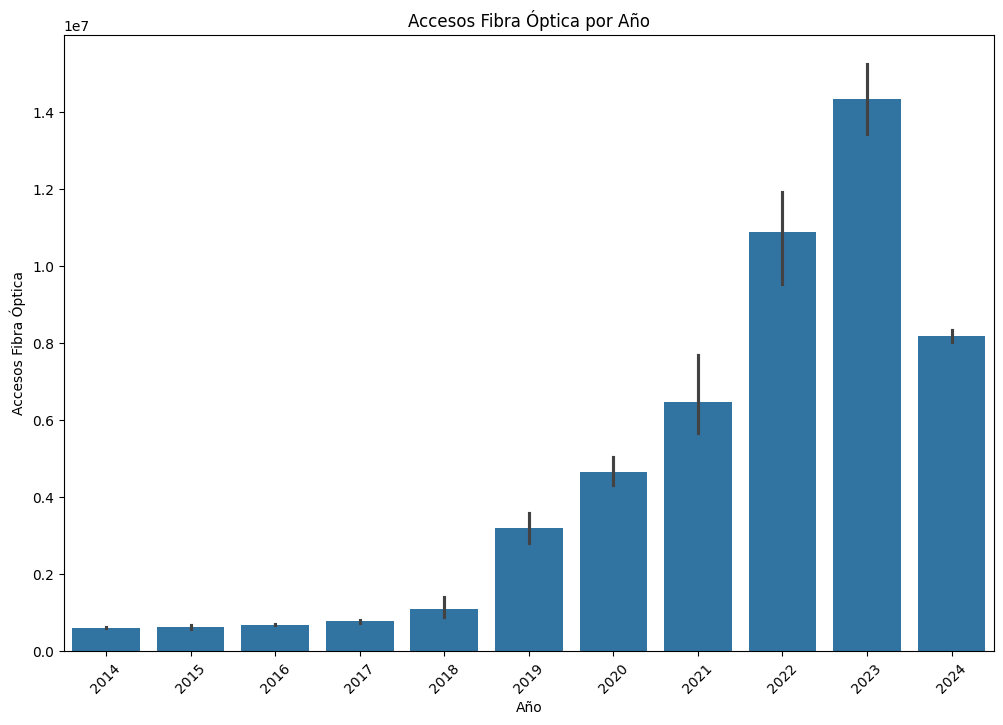

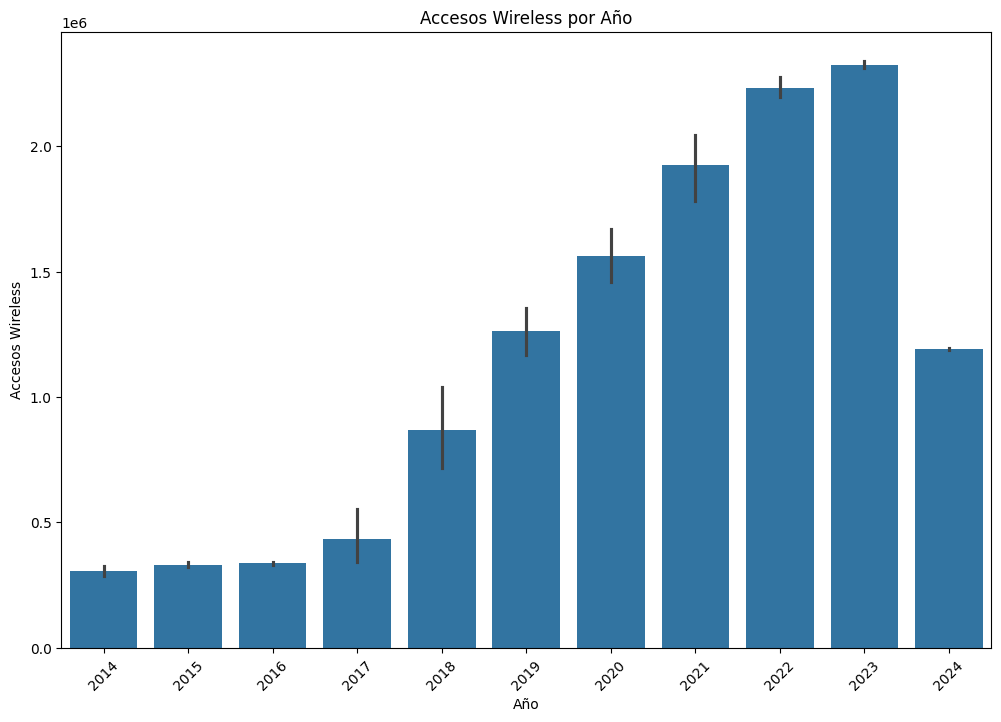

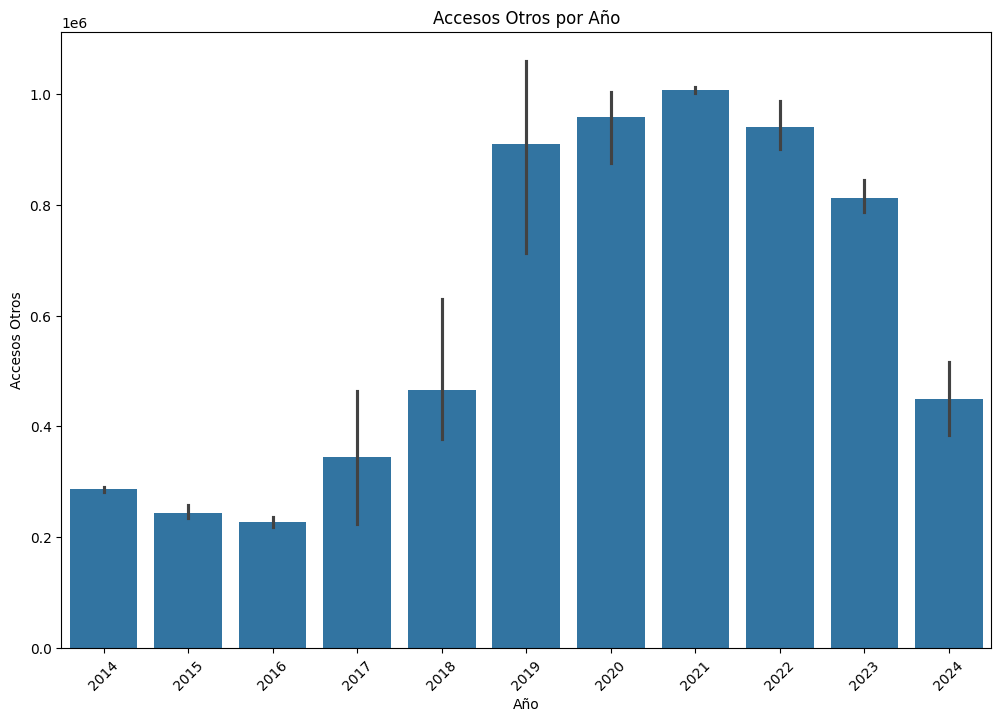

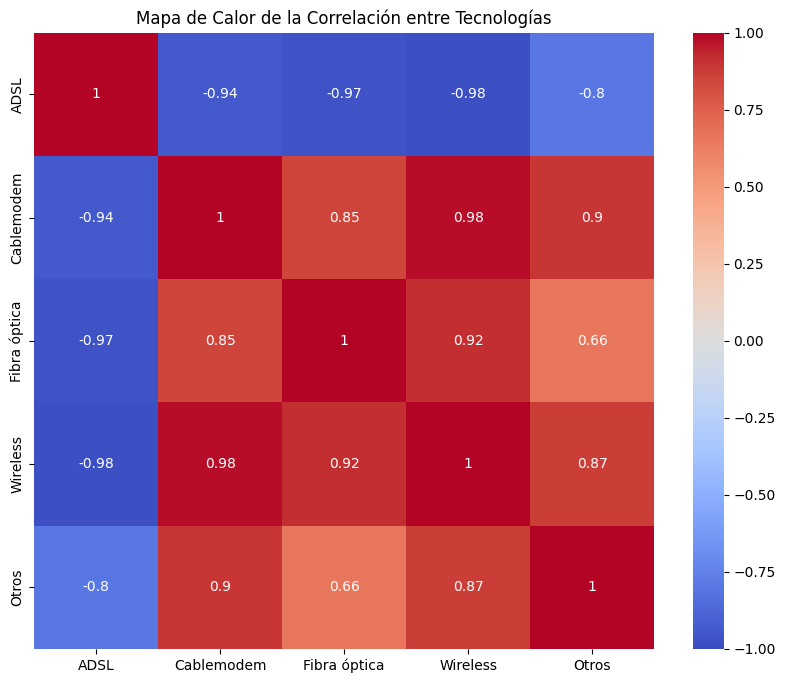

In [44]:
# Boxplot de accesos por tecnología
plt.figure(figsize=(12, 8))
sns.boxplot(data=datos, x='Año', y='ADSL')
plt.title('Boxplot de Accesos ADSL por Año')
plt.xlabel('Año')
plt.ylabel('Accesos ADSL')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=datos, x='Año', y='Cablemodem')
plt.title('Boxplot de Accesos Cablemodem por Año')
plt.xlabel('Año')
plt.ylabel('Accesos Cablemodem')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=datos, x='Año', y='Fibra óptica')
plt.title('Boxplot de Accesos Fibra Óptica por Año')
plt.xlabel('Año')
plt.ylabel('Accesos Fibra Óptica')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=datos, x='Año', y='Wireless')
plt.title('Boxplot de Accesos Wireless por Año')
plt.xlabel('Año')
plt.ylabel('Accesos Wireless')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=datos, x='Año', y='Otros')
plt.title('Boxplot de Accesos Otros por Año')
plt.xlabel('Año')
plt.ylabel('Accesos Otros')
plt.xticks(rotation=45)
plt.show()

# Histograma de accesos por tecnología
plt.figure(figsize=(12, 8))
sns.histplot(data=datos, x='ADSL', bins=30)
plt.title('Histograma de Accesos ADSL')
plt.xlabel('Accesos ADSL')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(data=datos, x='Cablemodem', bins=30)
plt.title('Histograma de Accesos Cablemodem')
plt.xlabel('Accesos Cablemodem')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(data=datos, x='Fibra óptica', bins=30)
plt.title('Histograma de Accesos Fibra Óptica')
plt.xlabel('Accesos Fibra Óptica')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(data=datos, x='Wireless', bins=30)
plt.title('Histograma de Accesos Wireless')
plt.xlabel('Accesos Wireless')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(data=datos, x='Otros', bins=30)
plt.title('Histograma de Accesos Otros')
plt.xlabel('Accesos Otros')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras de accesos por tecnología a lo largo de los años
plt.figure(figsize=(12, 8))
sns.barplot(data=datos, x='Año', y='ADSL', estimator=sum)
plt.title('Accesos ADSL por Año')
plt.xlabel('Año')
plt.ylabel('Accesos ADSL')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(data=datos, x='Año', y='Cablemodem', estimator=sum)
plt.title('Accesos Cablemodem por Año')
plt.xlabel('Año')
plt.ylabel('Accesos Cablemodem')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(data=datos, x='Año', y='Fibra óptica', estimator=sum)
plt.title('Accesos Fibra Óptica por Año')
plt.xlabel('Año')
plt.ylabel('Accesos Fibra Óptica')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(data=datos, x='Año', y='Wireless', estimator=sum)
plt.title('Accesos Wireless por Año')
plt.xlabel('Año')
plt.ylabel('Accesos Wireless')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(data=datos, x='Año', y='Otros', estimator=sum)
plt.title('Accesos Otros por Año')
plt.xlabel('Año')
plt.ylabel('Accesos Otros')
plt.xticks(rotation=45)
plt.show()

# Mapa de calor de la correlación entre las tecnologías
correlacion_tecnologias = datos[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlacion_tecnologias, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor de la Correlación entre Tecnologías')
plt.show()

##### Conclusión de la hoja  "Totales Accesos por Tecnología":
1. **Estadísticas descriptivas**:
    - Las estadísticas descriptivas muestran la distribución de los accesos por diferentes tecnologías a lo largo de los años. Se observa una amplia variabilidad en los accesos, con algunas tecnologías teniendo un número significativamente mayor de accesos que otras.

2. **Boxplot**:
    - Los boxplots muestran la distribución de los accesos por diferentes tecnologías a lo largo de los años. Podemos observar la presencia de outliers en los accesos, especialmente en los valores más altos.

3. **Histogramas**:
    - Los histogramas de los accesos muestran una distribución variada para cada tecnología. Algunas tecnologías tienen una distribución sesgada hacia la izquierda, indicando que la mayoría de los accesos son bajos, mientras que otras tecnologías tienen una distribución más uniforme.

4. **Gráficos de barras**:
    - Los gráficos de barras muestran la evolución de los accesos por diferentes tecnologías a lo largo de los años. Podemos observar tendencias crecientes en algunas tecnologías como la fibra óptica, mientras que otras tecnologías como el ADSL muestran una tendencia decreciente.

5. **Mapa de calor de la correlación**:
    - El mapa de calor muestra la correlación entre las diferentes tecnologías. Podemos observar correlaciones positivas significativas entre algunas tecnologías, lo que sugiere que el aumento en los accesos de una tecnología está relacionado con el aumento en los accesos de otra tecnología.

En resumen, los datos de la hoja "Totales Accesos por Tecnología" indican que hay una variabilidad considerable en los accesos por diferentes tecnologías a lo largo de los años. Algunas tecnologías muestran tendencias crecientes, mientras que otras muestran tendencias decrecientes. Además, existen correlaciones positivas significativas entre algunas tecnologías.

In [45]:
hojas["Totales Accesos Por Tecnología"] = datos


# Hoja 7: Accesos por Tecnologia

In [46]:
datos=hojas["Accesos Por Tecnología"]
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           1008 non-null   object 
 1   Trimestre     1008 non-null   object 
 2   Provincia     1007 non-null   object 
 3   ADSL          1007 non-null   float64
 4   Cablemodem    1007 non-null   float64
 5   Fibra óptica  1007 non-null   float64
 6   Wireless      1007 non-null   float64
 7   Otros         1007 non-null   float64
 8   Total         1007 non-null   float64
dtypes: float64(6), object(3)
memory usage: 71.1+ KB


Revisamos que las columnas que utilizaremos tengan el tipo correcto, al no ser correctas las corregimos para continuar con el EDA

In [48]:
datos

Año                                          Trimestre  \
0     2024                                                  2   
1     2024                                                  2   
2     2024                                                  2   
3     2024                                                  2   
4     2024                                                  2   
...    ...                                                ...   
1004  2014                                                  1   
1005  2014                                                  1   
1006  2014                                                  1   
1007   NaN                                                NaN   
1008     *  Los datos provinciales no coinciden a nivel na...   

                Provincia      ADSL  Cablemodem  Fibra óptica  Wireless  \
0            Buenos Aires  214055.0   2722466.0     1849476.0  138638.0   
1         Capital Federal   54102.0   1144781.0      230402.0    4493.0   
2               Catamarca    4951.0     10303.0       58355.0    1384.0   
3                   Chaco    9448.0     57935.0       68944.0    8407.0   
4                  Chubut   25955.0     80704.0       26516.0   31118.0   
...                   ...       ...         ...           ...       ...   
1004  Santiago Del Estero   32567.0      3598.0          19.0     915.0   
1005     Tierra Del Fuego   21618.0      2837.0         648.0       1.0   
1006              Tucumán  129717.0        83.0         121.0      13.0   
1007                  NaN       NaN         NaN           NaN       NaN   
1008                  NaN       NaN         NaN           NaN       NaN   

        Otros      Total  
0     64745.0  4989380.0  
1     29821.0  1463599.0  
2        81.0    75074.0  
3      2358.0   147092.0  
4      9930.0   174223.0  
...       ...        ...  
1004     34.0    37133.0  
1005   2934.0    28038.0  
1006     98.0   130032.0  
1007      NaN        NaN  
1008      NaN        NaN  

[1009 rows x 9 columns]

In [49]:
datos.drop(datos.index[-1], inplace=True)
datos.drop(datos.index[-1], inplace=True)

In [50]:
datos

Año Trimestre            Provincia      ADSL  Cablemodem  Fibra óptica  \
0     2024         2         Buenos Aires  214055.0   2722466.0     1849476.0   
1     2024         2      Capital Federal   54102.0   1144781.0      230402.0   
2     2024         2            Catamarca    4951.0     10303.0       58355.0   
3     2024         2                Chaco    9448.0     57935.0       68944.0   
4     2024         2               Chubut   25955.0     80704.0       26516.0   
...    ...       ...                  ...       ...         ...           ...   
1002  2014         1           Santa Cruz   18927.0       100.0         381.0   
1003  2014         1             Santa Fe  322662.0    174296.0        3059.0   
1004  2014         1  Santiago Del Estero   32567.0      3598.0          19.0   
1005  2014         1     Tierra Del Fuego   21618.0      2837.0         648.0   
1006  2014         1              Tucumán  129717.0        83.0         121.0   

      Wireless    Otros      Total  
0     138638.0  64745.0  4989380.0  
1       4493.0  29821.0  1463599.0  
2       1384.0     81.0    75074.0  
3       8407.0   2358.0   147092.0  
4      31118.0   9930.0   174223.0  
...        ...      ...        ...  
1002    4092.0   3264.0    26764.0  
1003    5951.0    644.0   506612.0  
1004     915.0     34.0    37133.0  
1005       1.0   2934.0    28038.0  
1006      13.0     98.0   130032.0  

[1007 rows x 9 columns]

In [51]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           1007 non-null   object 
 1   Trimestre     1007 non-null   object 
 2   Provincia     1007 non-null   object 
 3   ADSL          1007 non-null   float64
 4   Cablemodem    1007 non-null   float64
 5   Fibra óptica  1007 non-null   float64
 6   Wireless      1007 non-null   float64
 7   Otros         1007 non-null   float64
 8   Total         1007 non-null   float64
dtypes: float64(6), object(3)
memory usage: 70.9+ KB


Se procedera a convertir la columnas Año y Trimestre a INT para poder trabajar mejor con estas

In [52]:
# Convertir las columnas 'Año' y 'Trimestre' a tipo entero
datos['Año'] = datos['Año'].astype(int)
datos['Trimestre'] = datos['Trimestre'].astype(int)

ValueError: invalid literal for int() with base 10: '2019 *'

Debido a que se encontro que algunos Años y Trimestres poseen un *, se procede a eliminarlo para poder convertir las columnas a Enteros

In [53]:
# Eliminar los asteriscos de las columnas 'Año' y 'Trimestre'
datos['Año'] = datos['Año'].astype(str).str.replace('*', '').astype(int)
datos['Trimestre'] = datos['Trimestre'].astype(str).str.replace('*', '').astype(int)

Una vez solucionado el inconveniente con los tipos, se procede con el correspondiente EDA


In [54]:
datos = realizar_eda("Accesos Por Tecnología", datos)

Análisis de la hoja: Accesos Por Tecnología
Valores faltantes:
Año             0
Trimestre       0
Provincia       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
dtype: int64
Registros duplicados:
0
Estadísticas descriptivas:
               Año    Trimestre          ADSL    Cablemodem  Fibra óptica  \
count  1007.000000  1007.000000  1.007000e+03  1.007000e+03  1.007000e+03   
mean   2018.756703     2.453823  1.129309e+05  1.821583e+05  4.855699e+04   
std       3.036457     1.117190  2.362922e+05  4.460058e+05  1.758694e+05   
min    2014.000000     1.000000  2.230000e+03  0.000000e+00  0.000000e+00   
25%    2016.000000     1.000000  1.978950e+04  1.102050e+04  3.540000e+02   
50%    2019.000000     2.000000  4.396700e+04  4.075000e+04  3.015000e+03   
75%    2021.000000     3.000000  8.722000e+04  7.678350e+04  2.925700e+04   
max    2024.000000     4.000000  1.586343e+06  2.797700e+06  1.849476e+06   

            Wirel

Como no tenemos valores faltantes o duplicados, seguimos con los graficos

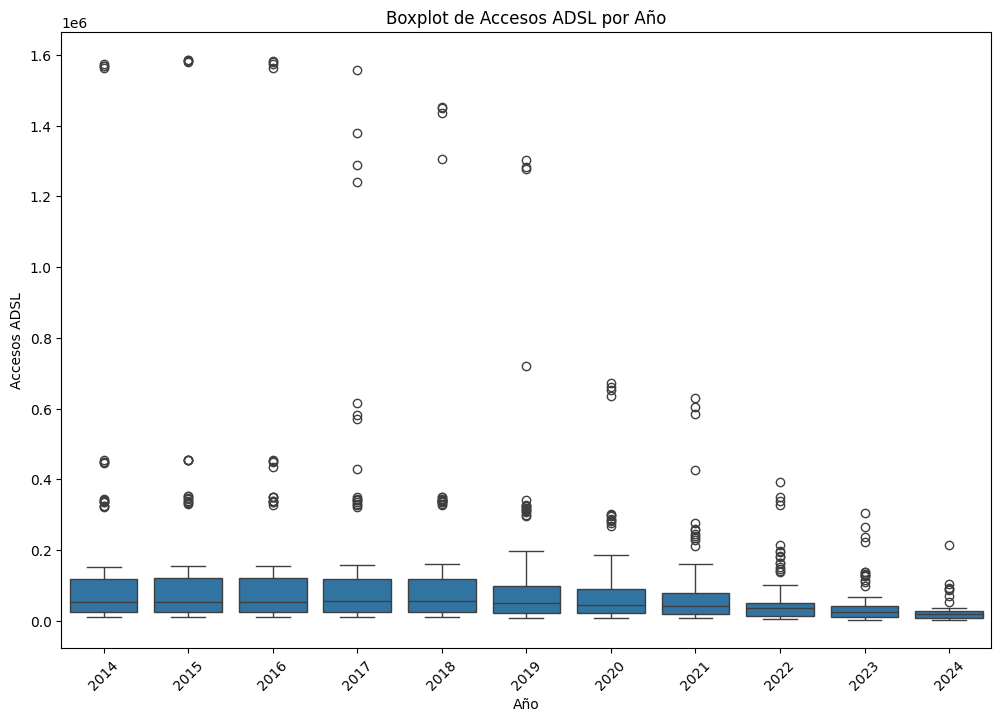

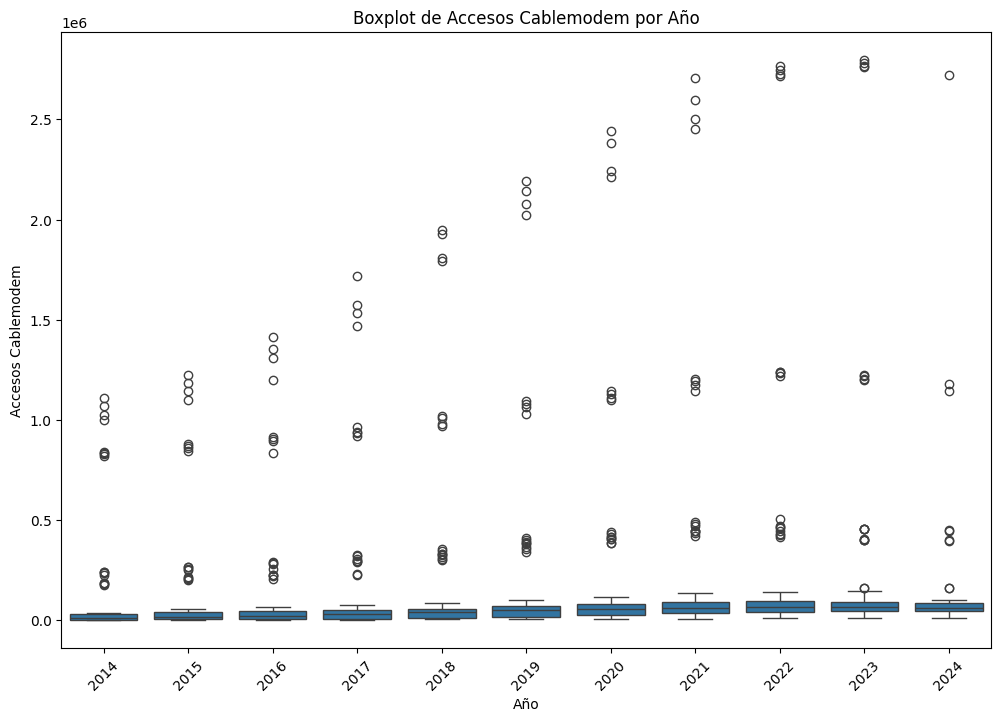

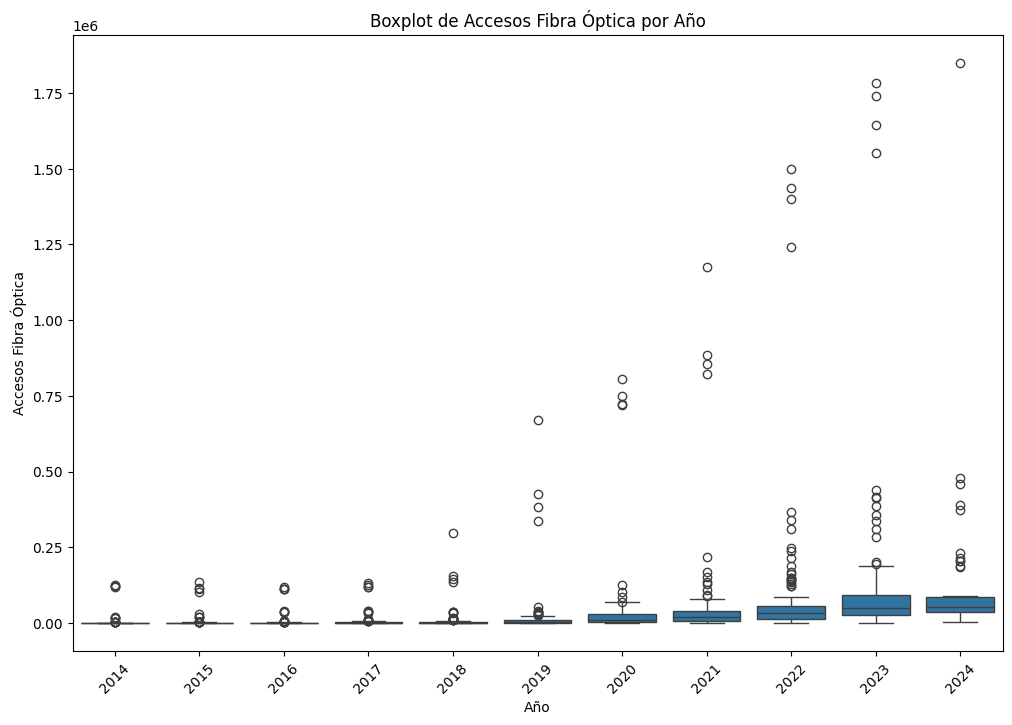

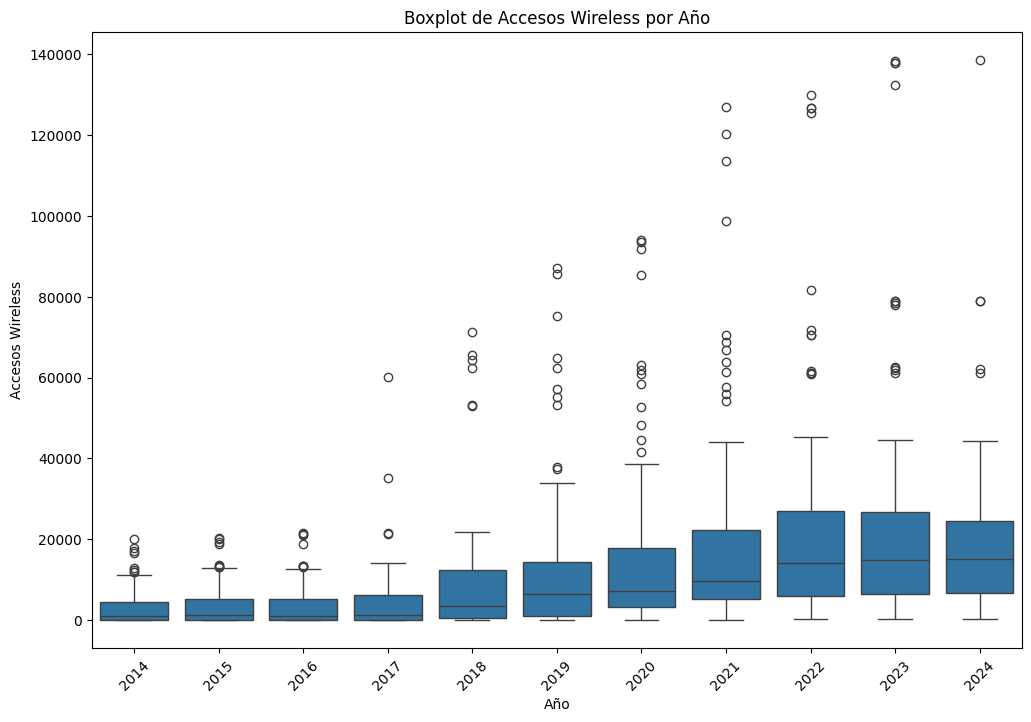

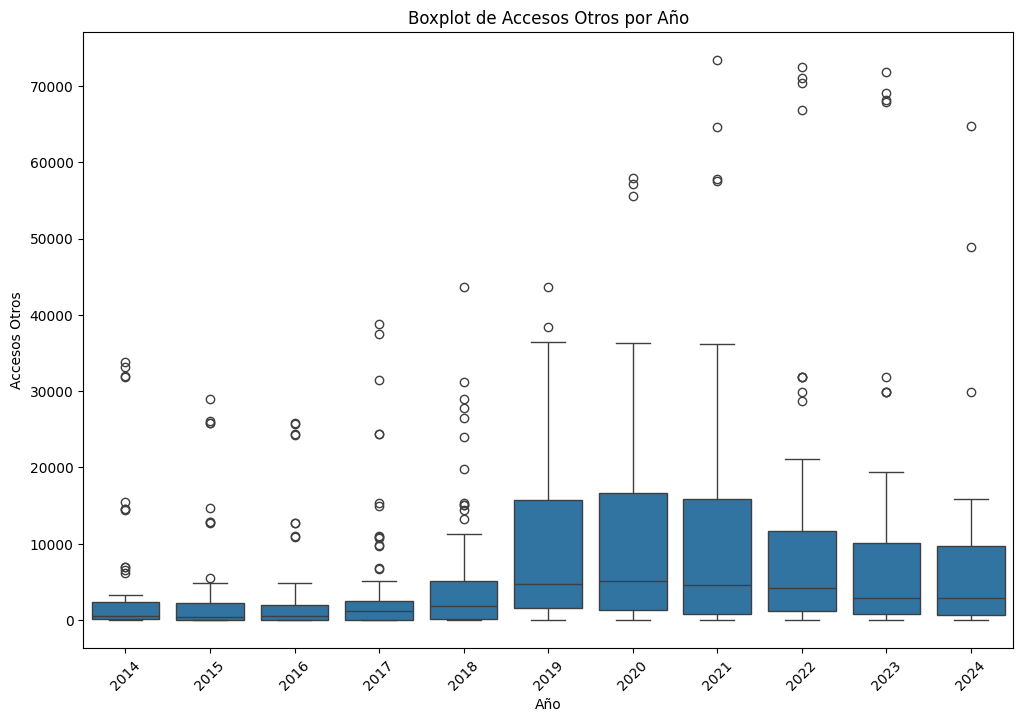

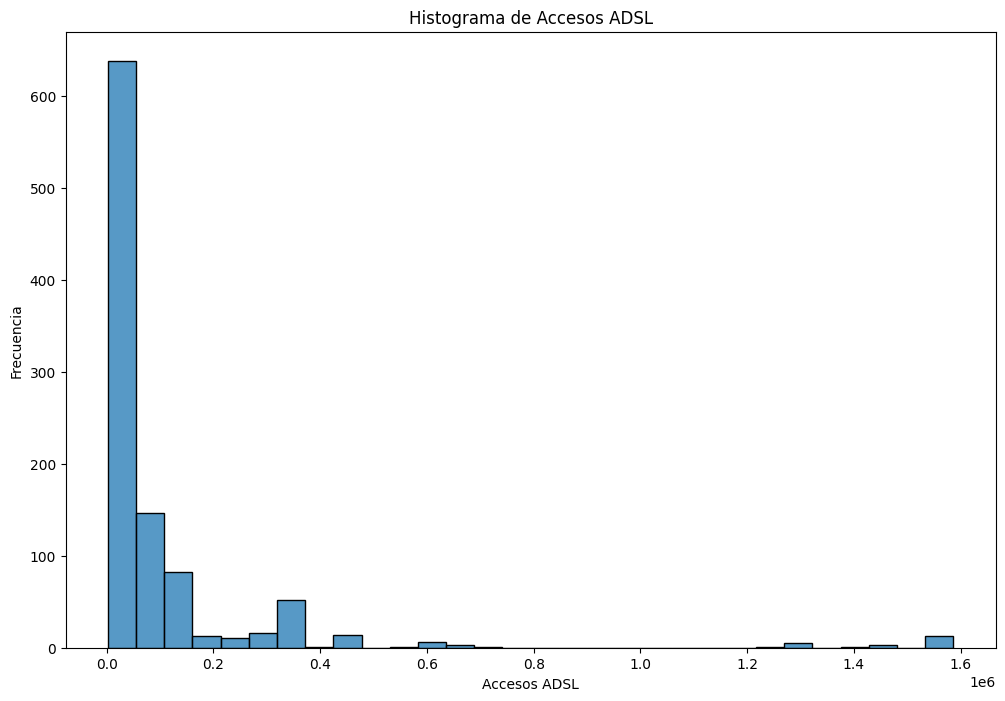

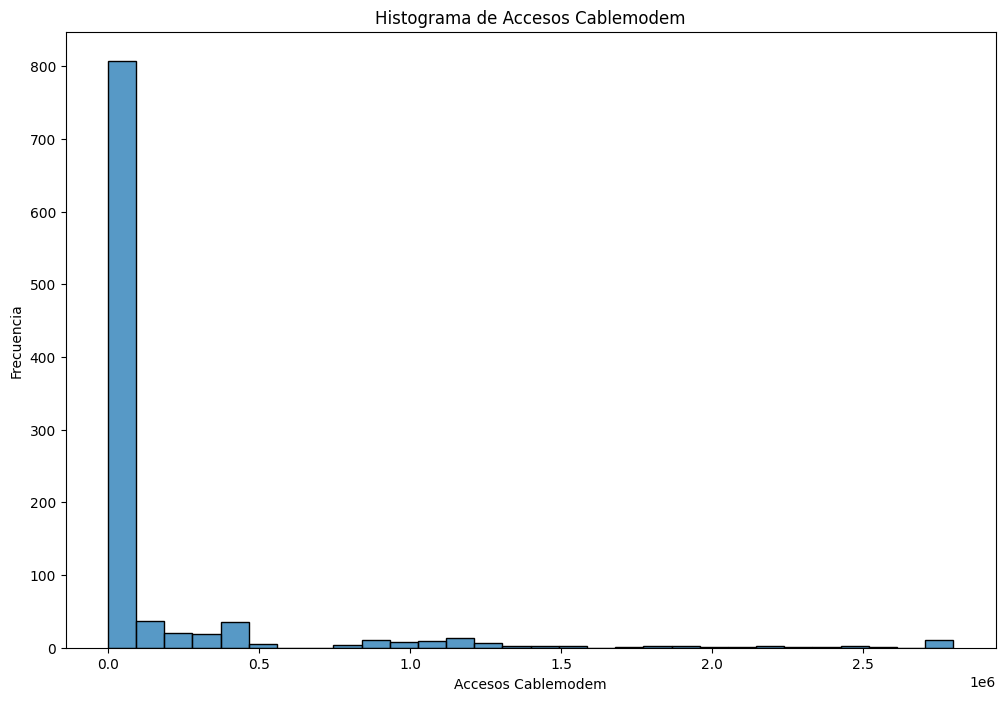

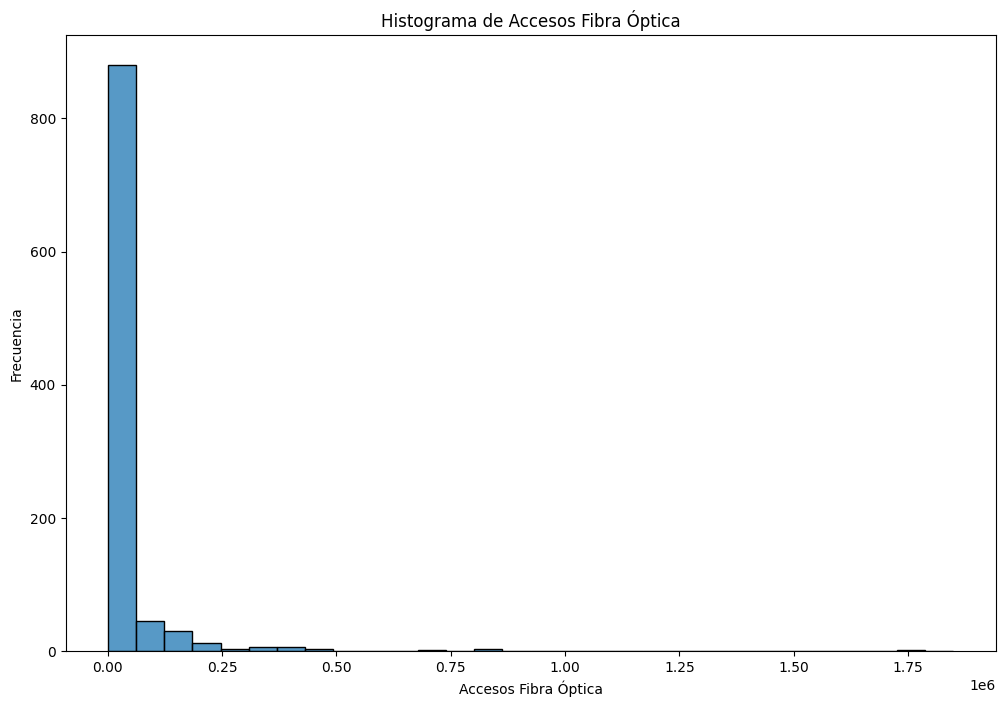

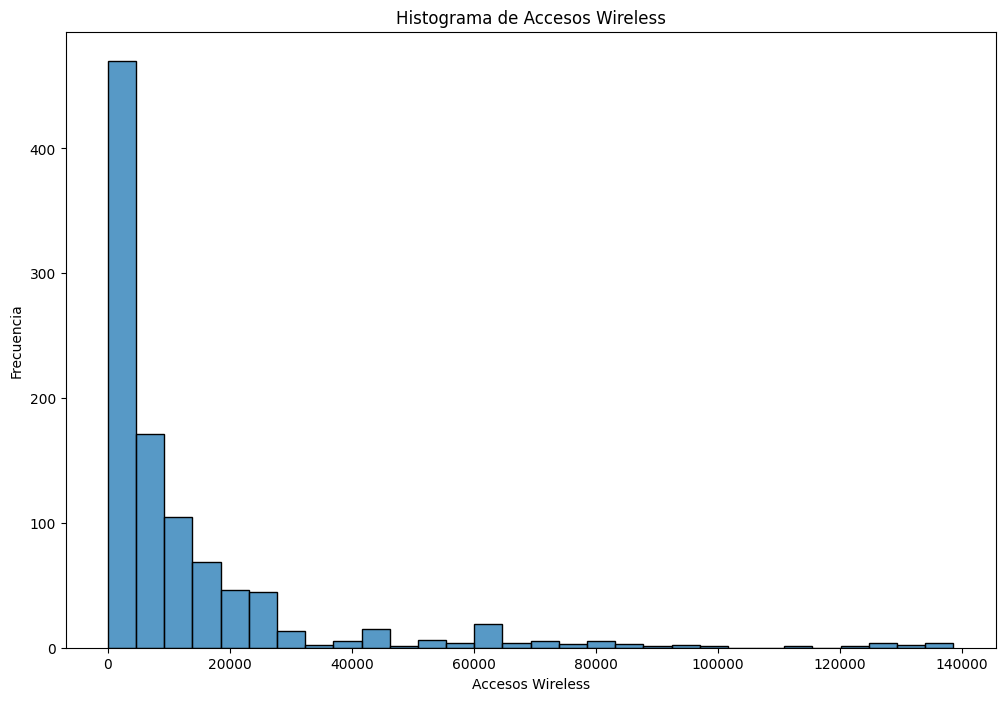

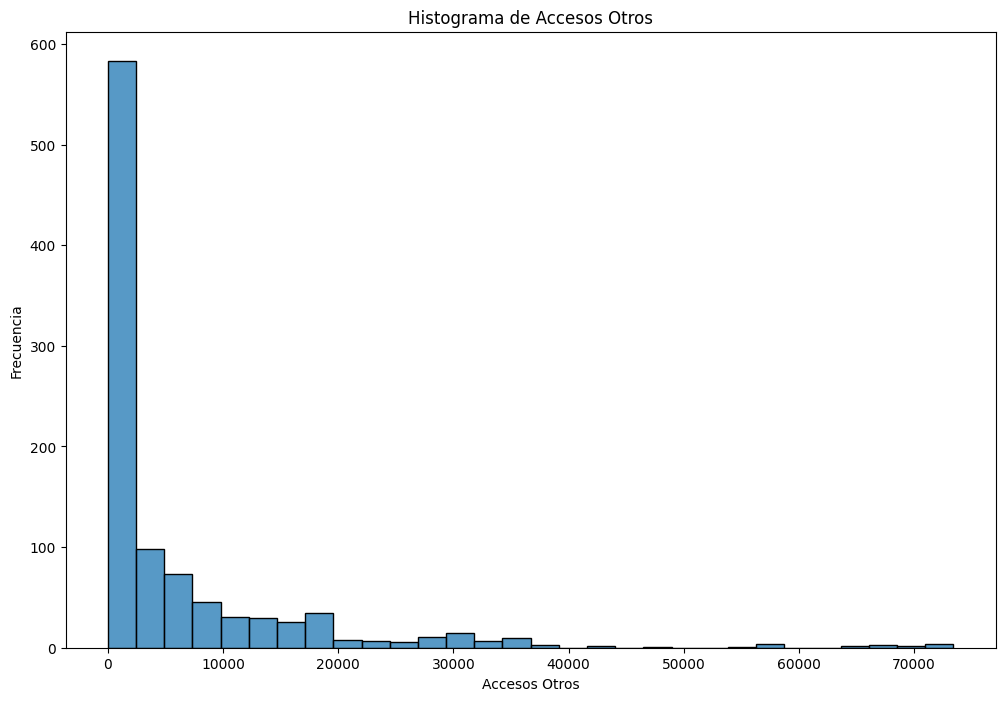

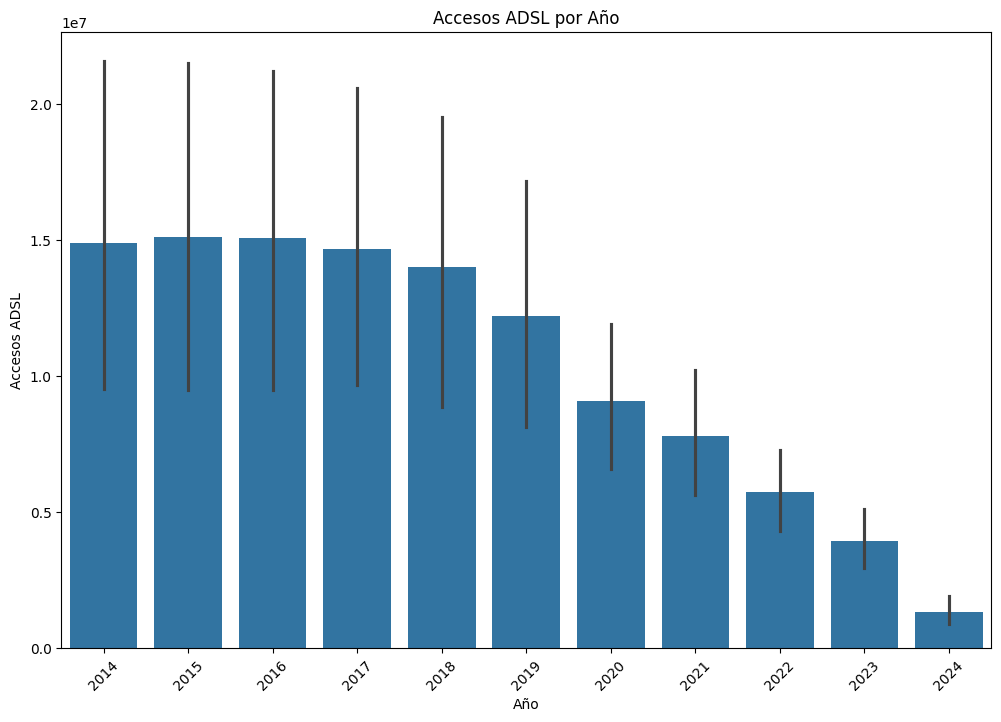

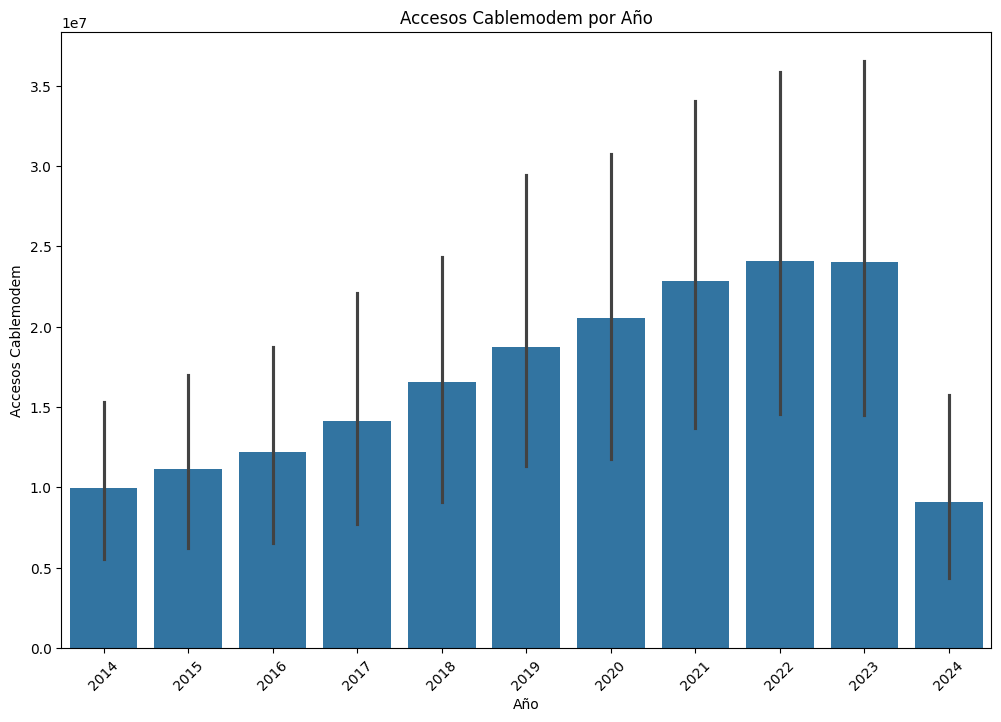

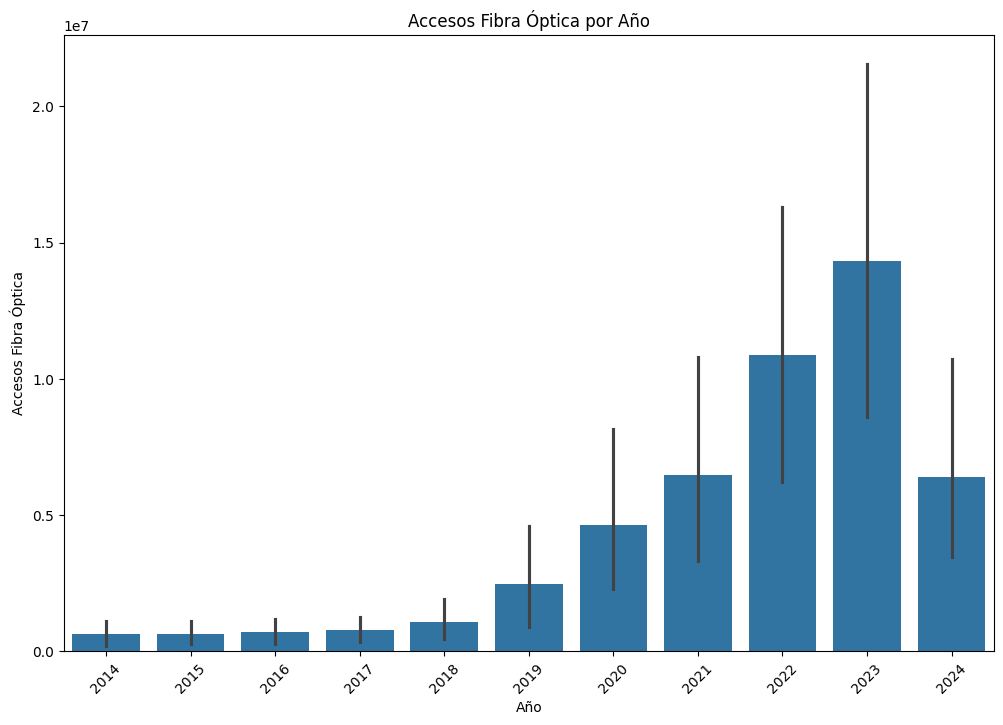

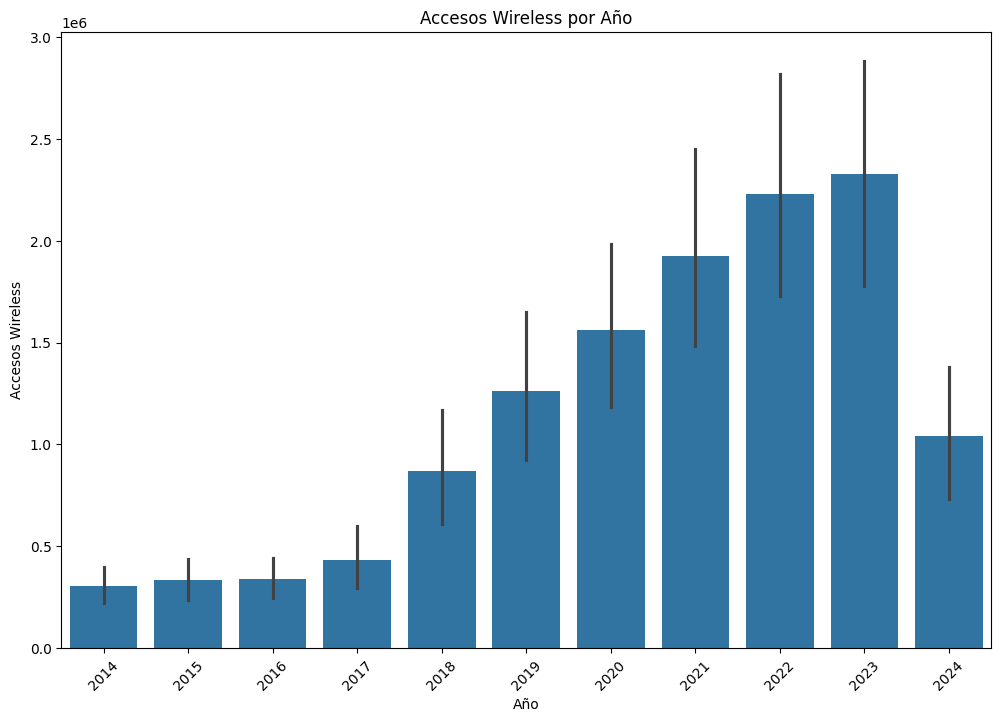

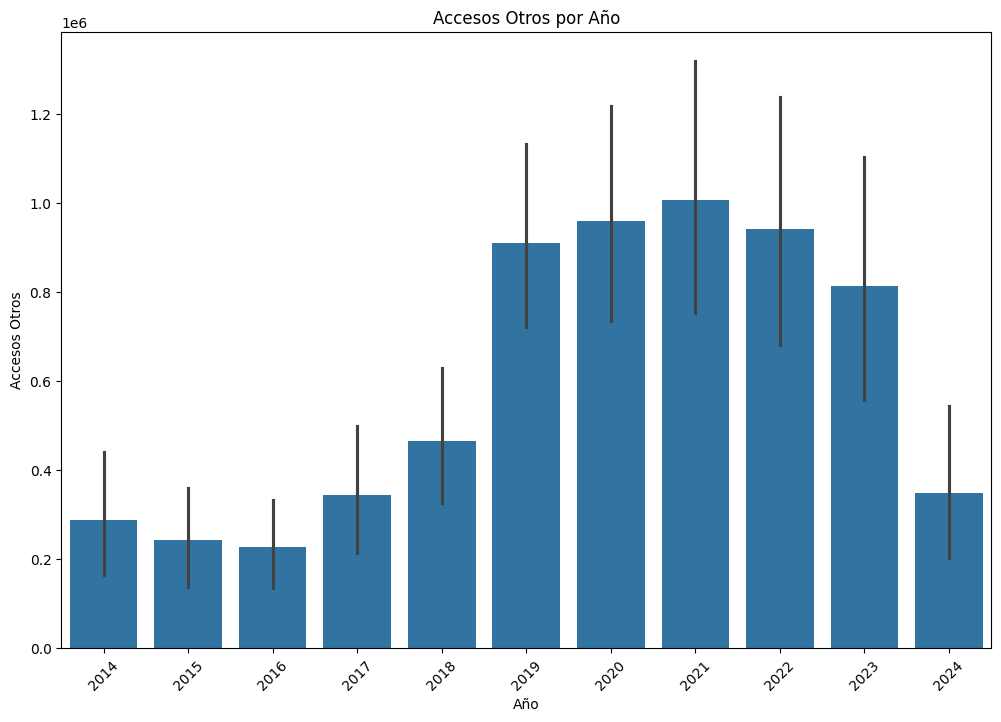

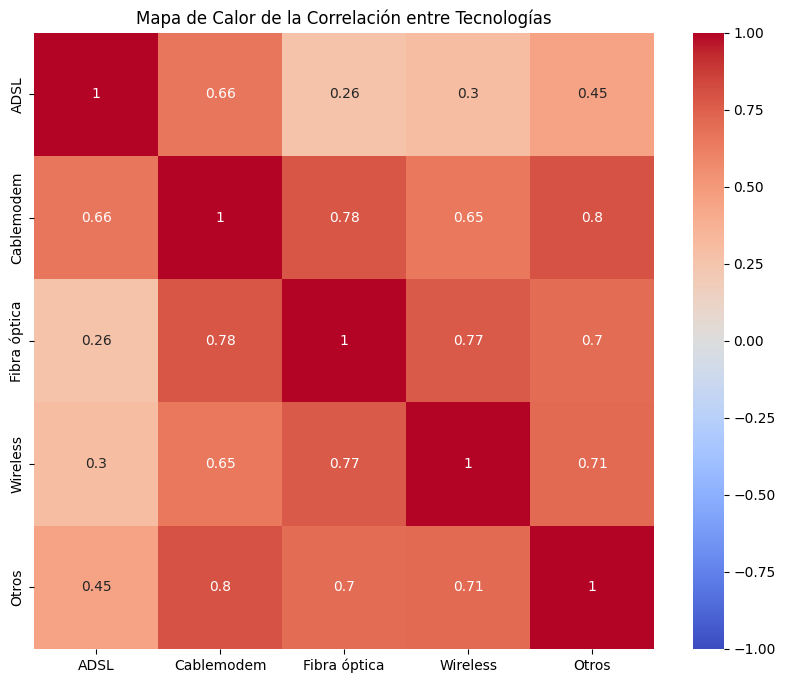

In [55]:
# Boxplot de accesos por tecnología
plt.figure(figsize=(12, 8))
sns.boxplot(data=datos, x='Año', y='ADSL')
plt.title('Boxplot de Accesos ADSL por Año')
plt.xlabel('Año')
plt.ylabel('Accesos ADSL')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=datos, x='Año', y='Cablemodem')
plt.title('Boxplot de Accesos Cablemodem por Año')
plt.xlabel('Año')
plt.ylabel('Accesos Cablemodem')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=datos, x='Año', y='Fibra óptica')
plt.title('Boxplot de Accesos Fibra Óptica por Año')
plt.xlabel('Año')
plt.ylabel('Accesos Fibra Óptica')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=datos, x='Año', y='Wireless')
plt.title('Boxplot de Accesos Wireless por Año')
plt.xlabel('Año')
plt.ylabel('Accesos Wireless')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=datos, x='Año', y='Otros')
plt.title('Boxplot de Accesos Otros por Año')
plt.xlabel('Año')
plt.ylabel('Accesos Otros')
plt.xticks(rotation=45)
plt.show()

# Histograma de accesos por tecnología
plt.figure(figsize=(12, 8))
sns.histplot(data=datos, x='ADSL', bins=30)
plt.title('Histograma de Accesos ADSL')
plt.xlabel('Accesos ADSL')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(data=datos, x='Cablemodem', bins=30)
plt.title('Histograma de Accesos Cablemodem')
plt.xlabel('Accesos Cablemodem')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(data=datos, x='Fibra óptica', bins=30)
plt.title('Histograma de Accesos Fibra Óptica')
plt.xlabel('Accesos Fibra Óptica')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(data=datos, x='Wireless', bins=30)
plt.title('Histograma de Accesos Wireless')
plt.xlabel('Accesos Wireless')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(data=datos, x='Otros', bins=30)
plt.title('Histograma de Accesos Otros')
plt.xlabel('Accesos Otros')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras de accesos por tecnología a lo largo de los años
plt.figure(figsize=(12, 8))
sns.barplot(data=datos, x='Año', y='ADSL', estimator=sum)
plt.title('Accesos ADSL por Año')
plt.xlabel('Año')
plt.ylabel('Accesos ADSL')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(data=datos, x='Año', y='Cablemodem', estimator=sum)
plt.title('Accesos Cablemodem por Año')
plt.xlabel('Año')
plt.ylabel('Accesos Cablemodem')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(data=datos, x='Año', y='Fibra óptica', estimator=sum)
plt.title('Accesos Fibra Óptica por Año')
plt.xlabel('Año')
plt.ylabel('Accesos Fibra Óptica')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(data=datos, x='Año', y='Wireless', estimator=sum)
plt.title('Accesos Wireless por Año')
plt.xlabel('Año')
plt.ylabel('Accesos Wireless')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(data=datos, x='Año', y='Otros', estimator=sum)
plt.title('Accesos Otros por Año')
plt.xlabel('Año')
plt.ylabel('Accesos Otros')
plt.xticks(rotation=45)
plt.show()

# Mapa de calor de la correlación entre las tecnologías
correlacion_tecnologias = datos[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlacion_tecnologias, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor de la Correlación entre Tecnologías')
plt.show()

##### Conclusión de la hoja "Accesos Por Tecnología":

1. **Estadísticas descriptivas**:
    - Las estadísticas descriptivas muestran la distribución de los accesos por diferentes tecnologías a lo largo de los años. Se observa una amplia variabilidad en los accesos, con algunas tecnologías teniendo un número significativamente mayor de accesos que otras.

2. **Boxplot**:
    - Los boxplots muestran la distribución de los accesos por diferentes tecnologías a lo largo de los años. Podemos observar la presencia de outliers en los accesos, especialmente en los valores más altos.

3. **Histogramas**:
    - Los histogramas de los accesos muestran una distribución variada para cada tecnología. Algunas tecnologías tienen una distribución sesgada hacia la izquierda, indicando que la mayoría de los accesos son bajos, mientras que otras tecnologías tienen una distribución más uniforme.

4. **Gráficos de barras**:
    - Los gráficos de barras muestran la evolución de los accesos por diferentes tecnologías a lo largo de los años. Podemos observar tendencias crecientes en algunas tecnologías como la fibra óptica, mientras que otras tecnologías como el ADSL muestran una tendencia decreciente.

5. **Mapa de calor de la correlación**:
    - El mapa de calor muestra la correlación entre las diferentes tecnologías. Podemos observar correlaciones positivas significativas entre algunas tecnologías, lo que sugiere que el aumento en los accesos de una tecnología está relacionado con el aumento en los accesos de otra tecnología.

En resumen, los datos de la hoja "Accesos Por Tecnología" indican que hay una variabilidad considerable en los accesos por diferentes tecnologías a lo largo de los años. Algunas tecnologías muestran tendencias crecientes, mientras que otras muestran tendencias decrecientes. Además, existen correlaciones positivas significativas entre algunas tecnologías.

In [56]:
hojas["Accesos Por Tecnología"] = datos


# Hoja 8: Penetracion-poblacion

In [57]:
datos=hojas["Penetración-poblacion"]
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Año                       1000 non-null   int64  
 1   Trimestre                 1000 non-null   int64  
 2   Provincia                 1000 non-null   object 
 3   Accesos por cada 100 hab  1000 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.4+ KB


Revisamos que las columnas que utilizaremos tengan el tipo correcto, al ser correctas, continuamos con el EDA

In [58]:
datos = realizar_eda(nombre_hoja, datos)

Análisis de la hoja: Acc_vel_loc_sinrangos
Valores faltantes:
Año                         0
Trimestre                   0
Provincia                   0
Accesos por cada 100 hab    0
dtype: int64
Registros duplicados:
0
Estadísticas descriptivas:
               Año    Trimestre  Accesos por cada 100 hab
count  1000.000000  1000.000000               1000.000000
mean   2018.800000     2.464000                 15.727248
std       3.021445     1.114426                  9.240063
min    2014.000000     1.000000                  2.723000
25%    2016.000000     1.000000                  9.018188
50%    2019.000000     2.000000                 13.674812
75%    2021.000000     3.000000                 20.323973
max    2024.000000     4.000000                 52.236739


Al no tener valores faltantes, ni valores duplicados, podemos seguir con los graficos

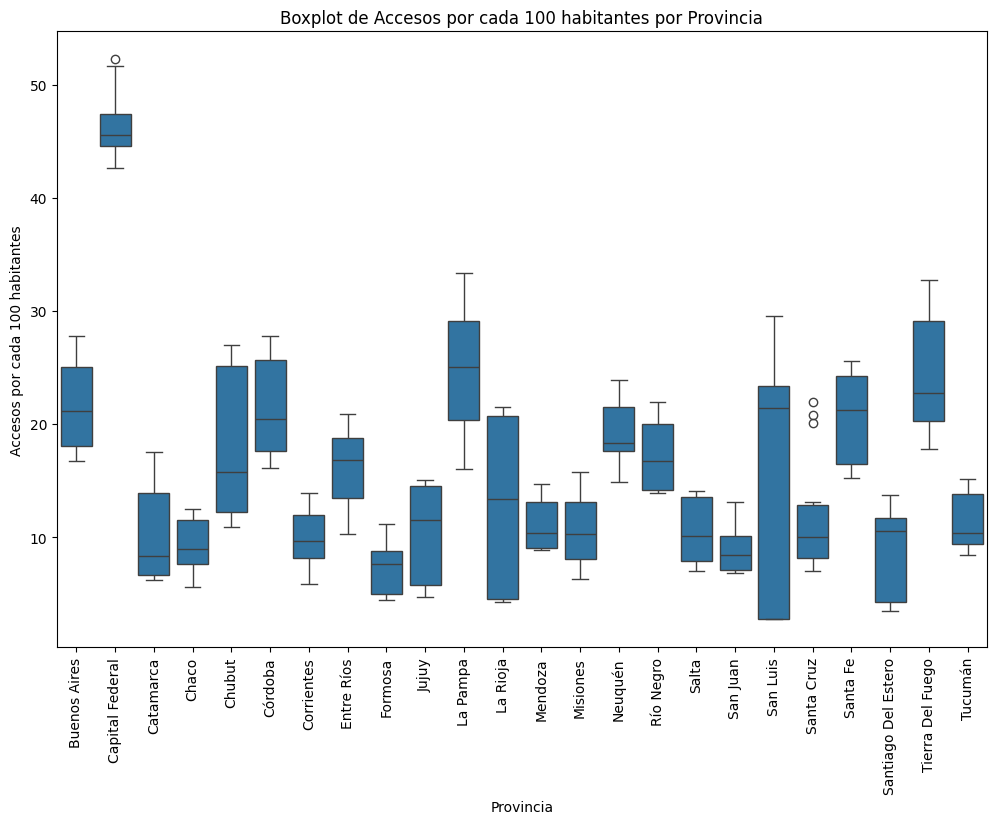

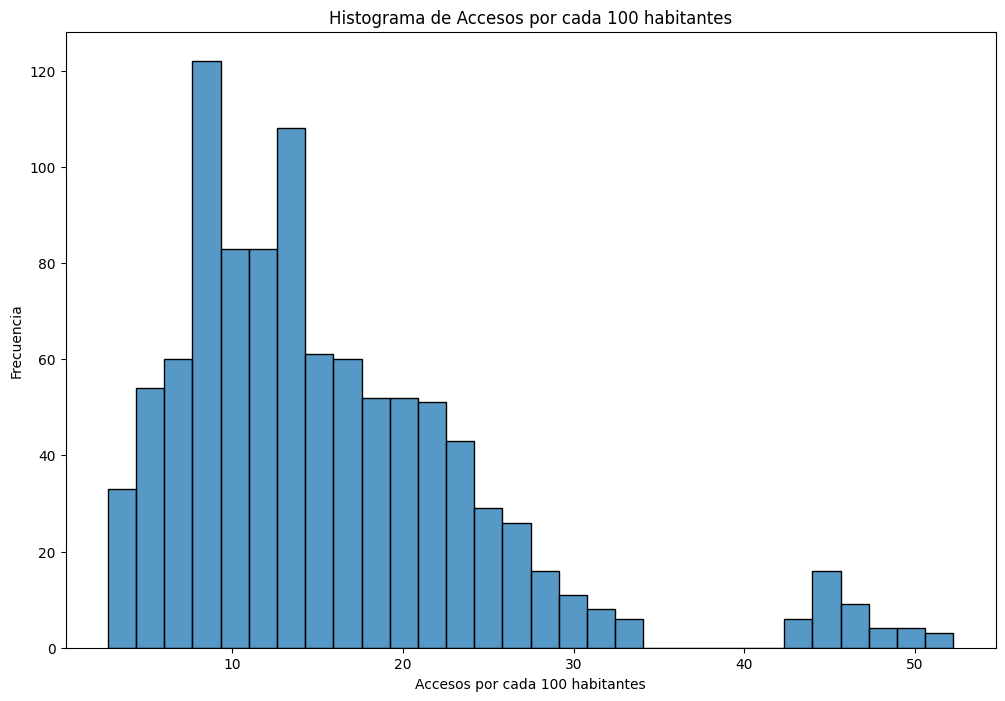

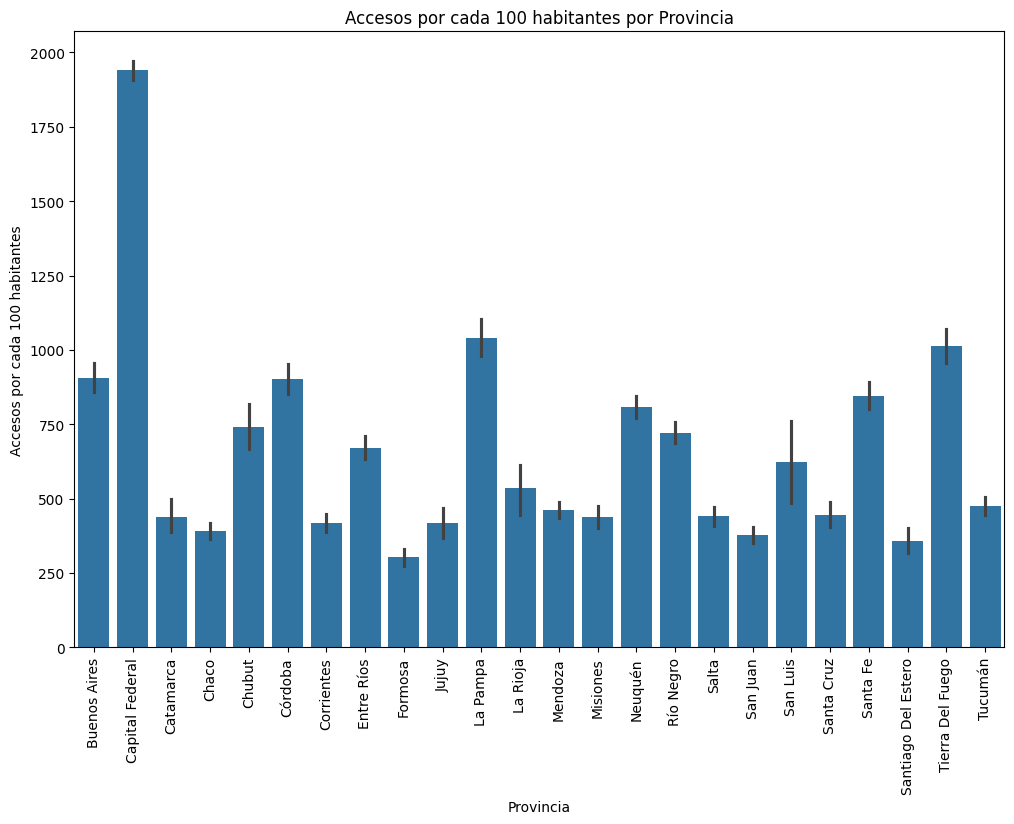

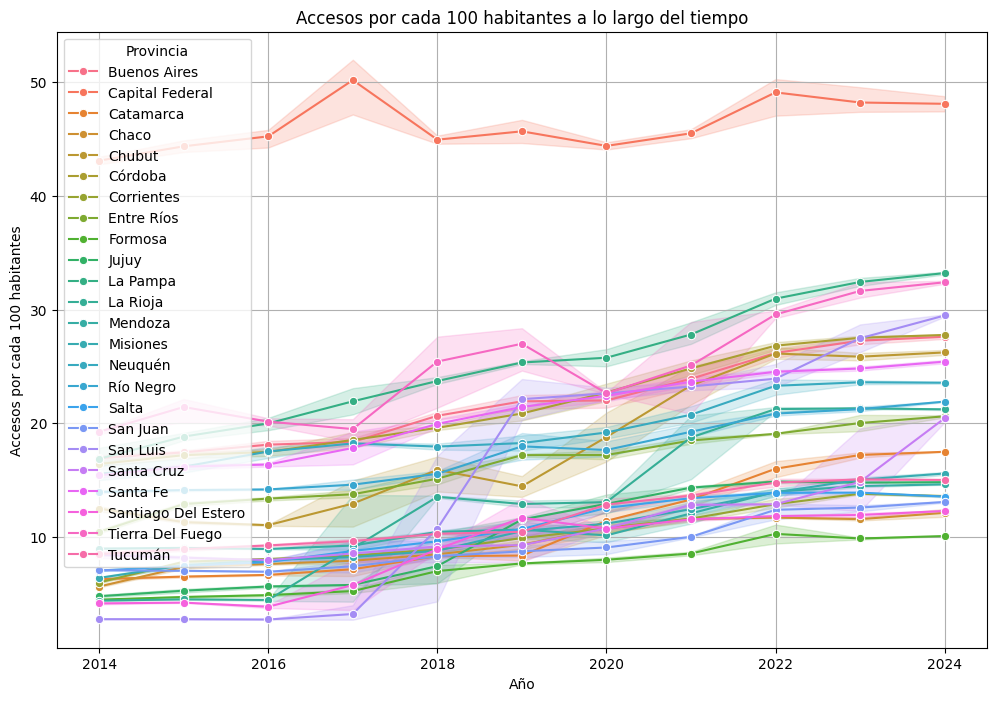

In [59]:
# Boxplot de Accesos por cada 100 habitantes por Provincia
plt.figure(figsize=(12, 8))
sns.boxplot(data=datos, x='Provincia', y='Accesos por cada 100 hab')
plt.title('Boxplot de Accesos por cada 100 habitantes por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100 habitantes')
plt.xticks(rotation=90)
plt.show()

# Histograma de Accesos por cada 100 habitantes
plt.figure(figsize=(12, 8))
sns.histplot(data=datos, x='Accesos por cada 100 hab', bins=30)
plt.title('Histograma de Accesos por cada 100 habitantes')
plt.xlabel('Accesos por cada 100 habitantes')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras de Accesos por cada 100 habitantes por Provincia
plt.figure(figsize=(12, 8))
sns.barplot(data=datos, x='Provincia', y='Accesos por cada 100 hab', estimator=sum)
plt.title('Accesos por cada 100 habitantes por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100 habitantes')
plt.xticks(rotation=90)
plt.show()

# Gráfico de líneas de Accesos por cada 100 habitantes a lo largo del tiempo
plt.figure(figsize=(12, 8))
sns.lineplot(data=datos, x='Año', y='Accesos por cada 100 hab', hue='Provincia', marker='o')
plt.title('Accesos por cada 100 habitantes a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 habitantes')
plt.grid(True)
plt.show()

##### Conclusión de la hoja "Penetración-poblacion":

1. **Estadísticas descriptivas**:
    - Las estadísticas descriptivas muestran la distribución de los accesos por cada 100 habitantes en las diferentes provincias. Se observa una amplia variabilidad en los accesos, con algunas provincias teniendo un número significativamente mayor de accesos por cada 100 habitantes que otras.

2. **Boxplot**:
    - El boxplot muestra la distribución de los accesos por cada 100 habitantes por provincia. Podemos observar la presencia de outliers en los accesos, especialmente en los valores más altos.

3. **Histogramas**:
    - Los histogramas de los accesos por cada 100 habitantes muestran una distribución variada, indicando que la mayoría de las provincias tienen accesos bajos, mientras que algunas tienen accesos significativamente más altos.

4. **Gráficos de barras**:
    - Los gráficos de barras muestran la distribución de los accesos por cada 100 habitantes por provincia. Podemos observar que algunas provincias tienen un número mucho mayor de accesos por cada 100 habitantes en comparación con otras.

5. **Gráficos de líneas**:
    - Los gráficos de líneas muestran la evolución de los accesos por cada 100 habitantes a lo largo del tiempo. Podemos observar tendencias crecientes en algunas provincias, mientras que otras muestran una tendencia más estable.

En resumen, los datos de la hoja "Penetración-poblacion" indican que hay una variabilidad considerable en los accesos por cada 100 habitantes en las diferentes provincias. Algunas provincias muestran tendencias crecientes en los accesos a lo largo del tiempo, mientras que otras mantienen una tendencia más estable.

In [60]:
hojas["Penetración-poblacion"] = datos


# Hoja 9: Penetracion-hogares

In [61]:
datos=hojas["Penetracion-hogares"]
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           1000 non-null   int64  
 1   Trimestre                     1000 non-null   int64  
 2   Provincia                     1000 non-null   object 
 3   Accesos por cada 100 hogares  1000 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.4+ KB


Revisamos que las columnas que utilizaremos tengan el tipo correcto, al ser correctas, continuamos con el EDA

In [62]:
datos = realizar_eda("Penetracion-hogares", datos)

Análisis de la hoja: Penetracion-hogares
Valores faltantes:
Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64
Registros duplicados:
0
Estadísticas descriptivas:
               Año    Trimestre  Accesos por cada 100 hogares
count  1000.000000  1000.000000                   1000.000000
mean   2018.800000     2.464000                     52.794973
std       3.021445     1.114426                     24.135063
min    2014.000000     1.000000                      9.513970
25%    2016.000000     1.000000                     33.957657
50%    2019.000000     2.000000                     50.133004
75%    2021.000000     3.000000                     67.010861
max    2024.000000     4.000000                    124.061394


Al no tener valores faltantes, ni valores duplicados, podemos seguir con los graficos

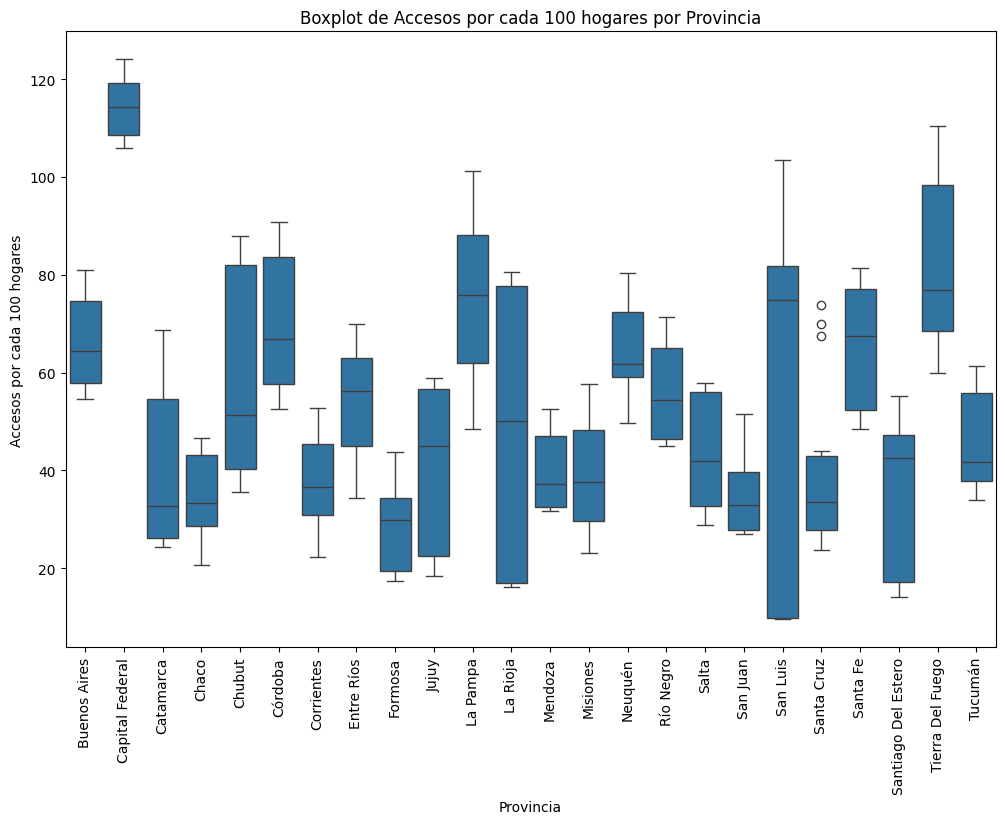

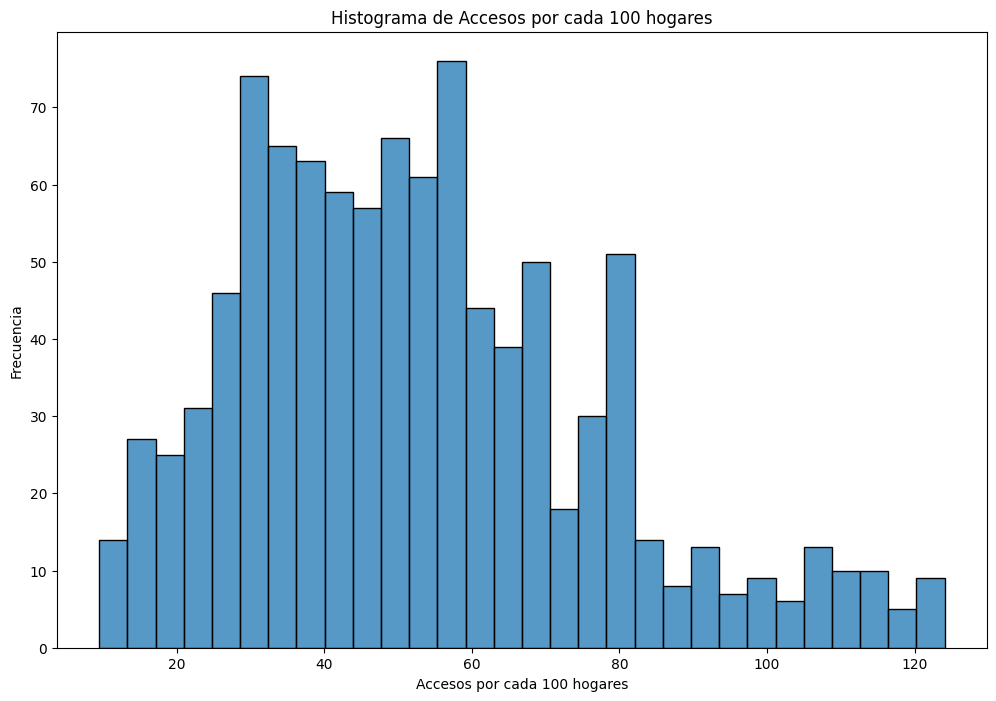

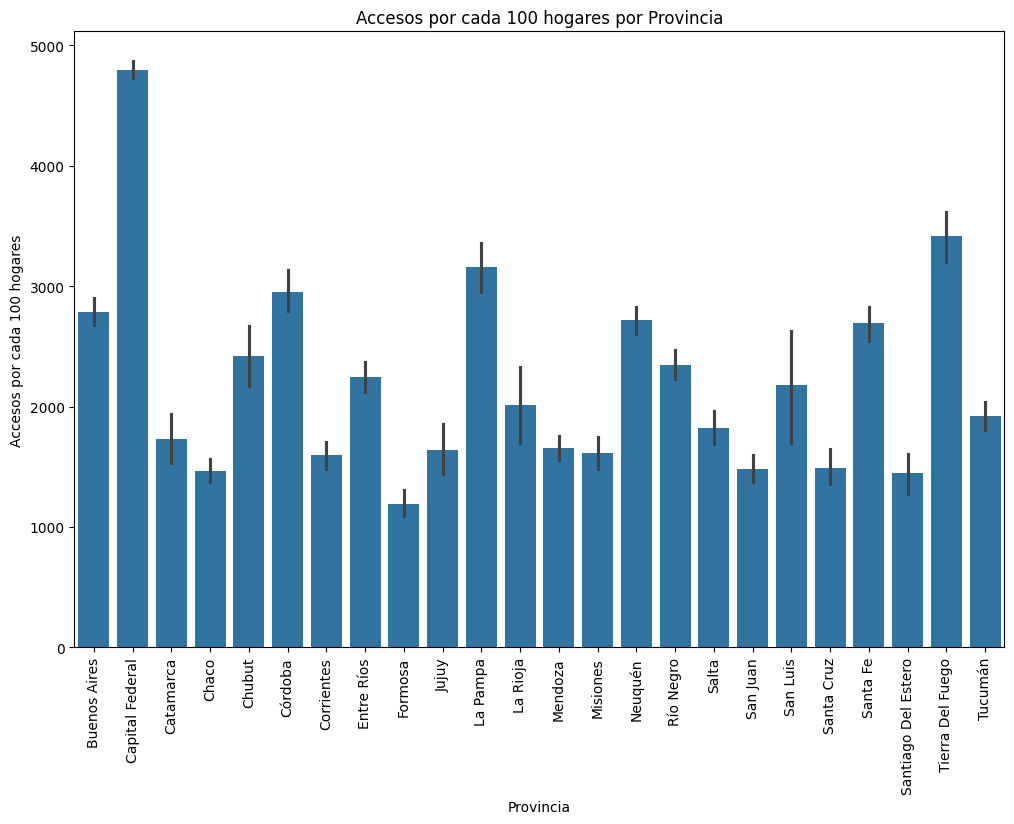

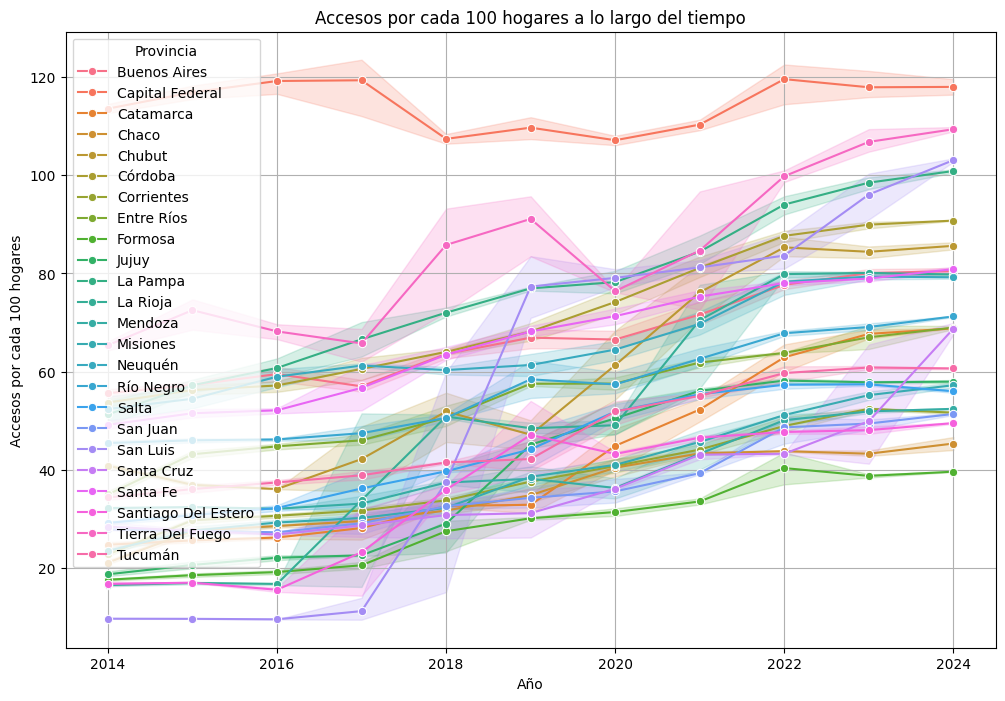

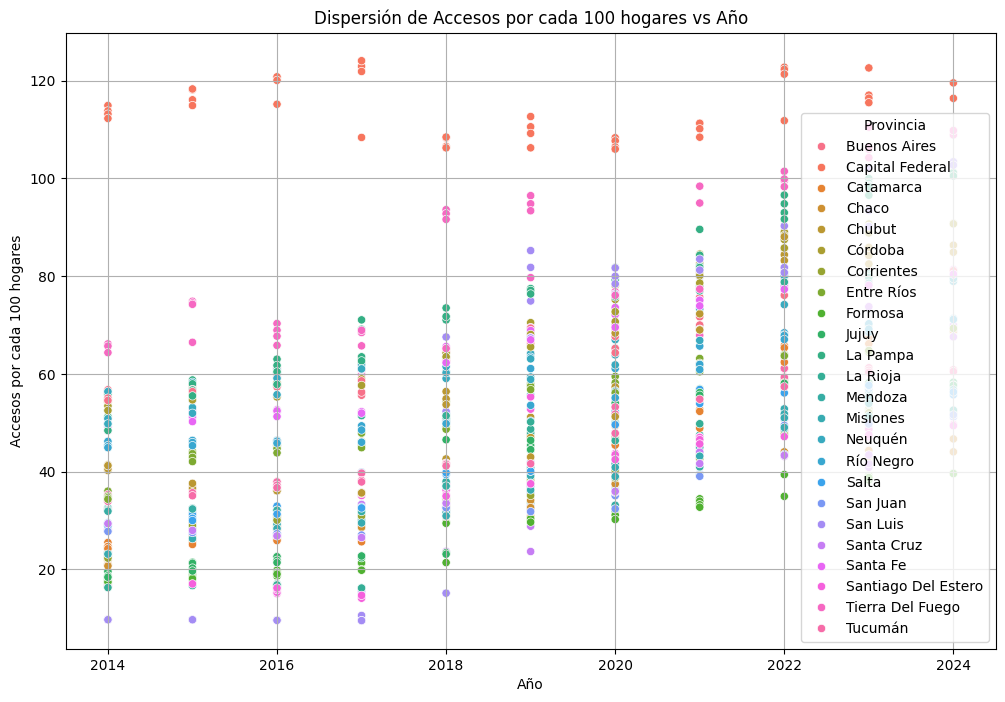

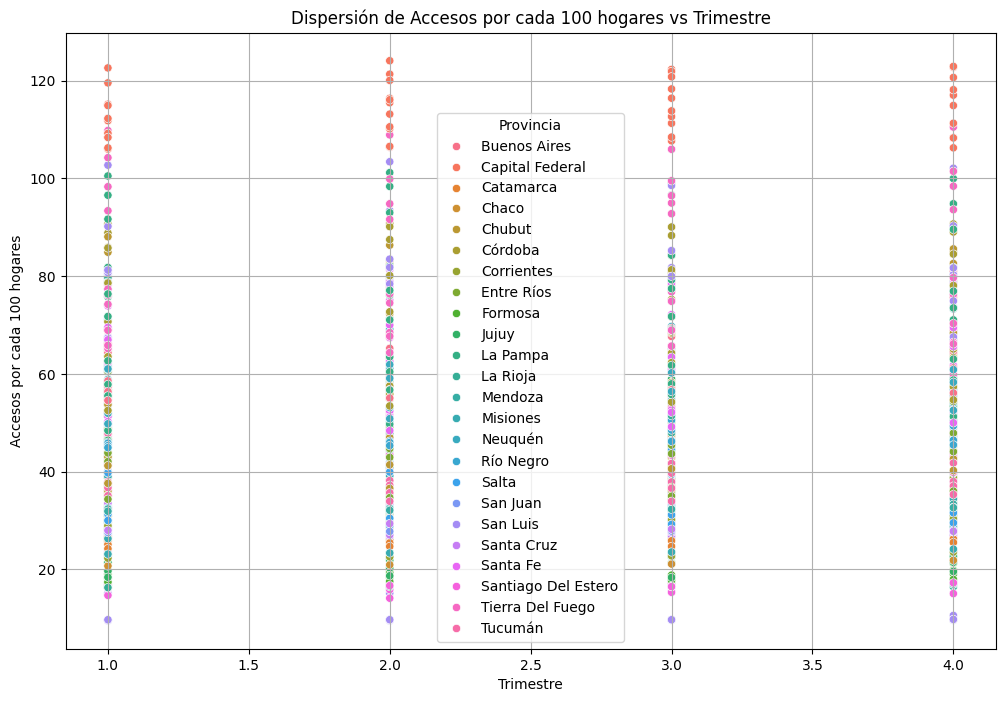

In [63]:
# Boxplot de Accesos por cada 100 hogares por Provincia
plt.figure(figsize=(12, 8))
sns.boxplot(data=datos, x='Provincia', y='Accesos por cada 100 hogares')
plt.title('Boxplot de Accesos por cada 100 hogares por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100 hogares')
plt.xticks(rotation=90)
plt.show()

# Histograma de Accesos por cada 100 hogares
plt.figure(figsize=(12, 8))
sns.histplot(data=datos, x='Accesos por cada 100 hogares', bins=30)
plt.title('Histograma de Accesos por cada 100 hogares')
plt.xlabel('Accesos por cada 100 hogares')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras de Accesos por cada 100 hogares por Provincia
plt.figure(figsize=(12, 8))
sns.barplot(data=datos, x='Provincia', y='Accesos por cada 100 hogares', estimator=sum)
plt.title('Accesos por cada 100 hogares por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100 hogares')
plt.xticks(rotation=90)
plt.show()

# Gráfico de líneas de Accesos por cada 100 hogares a lo largo del tiempo
plt.figure(figsize=(12, 8))
sns.lineplot(data=datos, x='Año', y='Accesos por cada 100 hogares', hue='Provincia', marker='o')
plt.title('Accesos por cada 100 hogares a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hogares')
plt.grid(True)
plt.show()

# Gráfico de dispersión de Accesos por cada 100 hogares vs Año
plt.figure(figsize=(12, 8))
sns.scatterplot(data=datos, x='Año', y='Accesos por cada 100 hogares', hue='Provincia')
plt.title('Dispersión de Accesos por cada 100 hogares vs Año')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hogares')
plt.grid(True)
plt.show()

# Gráfico de dispersión de Accesos por cada 100 hogares vs Trimestre
plt.figure(figsize=(12, 8))
sns.scatterplot(data=datos, x='Trimestre', y='Accesos por cada 100 hogares', hue='Provincia')
plt.title('Dispersión de Accesos por cada 100 hogares vs Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Accesos por cada 100 hogares')
plt.grid(True)
plt.show()


##### Conclusiones de la Hoja Penetracion-hogares

1. **Estadísticas descriptivas**:
    - Variabilidad en los accesos por cada 100 hogares en las diferentes provincias.

2. **Boxplot**:
    - Presencia de outliers en los accesos.

3. **Histogramas**:
    - Distribución variada de los accesos por cada 100 hogares.

4. **Gráficos de barras**:
    - Distribución de los accesos por cada 100 hogares por provincia.

5. **Gráficos de líneas**:
    - Evolución de los accesos por cada 100 hogares a lo largo del tiempo.

6. **Gráficos de dispersión**:
    - Relación entre los accesos por cada 100 hogares y el año/trimestre.

In [64]:
hojas["Penetracion-hogares"] = datos


# Hoja 10: Penetracion-totales

In [65]:
datos=hojas["Penetracion-totales"]
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           42 non-null     int64  
 1   Trimestre                     42 non-null     int64  
 2   Accesos por cada 100 hogares  42 non-null     float64
 3   Accesos por cada 100 hab      42 non-null     float64
 4   Periodo                       42 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.8+ KB


Revisamos que las columnas que utilizaremos tengan el tipo correcto, al ser correctas, continuamos con el EDA

In [66]:
datos = realizar_eda("Penetracion-totales", datos)

Análisis de la hoja: Penetracion-totales
Valores faltantes:
Año                             0
Trimestre                       0
Accesos por cada 100 hogares    0
Accesos por cada 100 hab        0
Periodo                         0
dtype: int64
Registros duplicados:
0
Estadísticas descriptivas:
               Año  Trimestre  Accesos por cada 100 hogares  \
count    42.000000  42.000000                     42.000000   
mean   2018.761905   2.452381                     63.201813   
std       3.074756   1.130560                      9.950321   
min    2014.000000   1.000000                     49.545821   
25%    2016.000000   1.250000                     53.784644   
50%    2019.000000   2.000000                     62.667764   
75%    2021.000000   3.000000                     72.527011   
max    2024.000000   4.000000                     78.890000   

       Accesos por cada 100 hab  
count                 42.000000  
mean                  19.574600  
std                    3.268665  
mi

Al no tener valores faltantes o duplicados, podemos seguir con los graficos

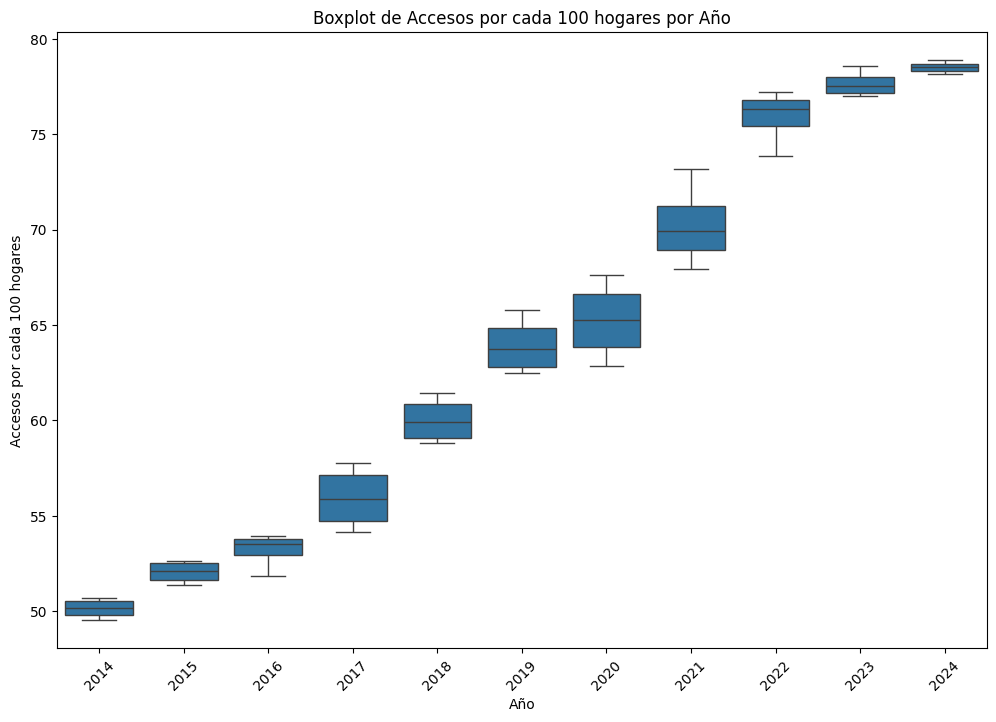

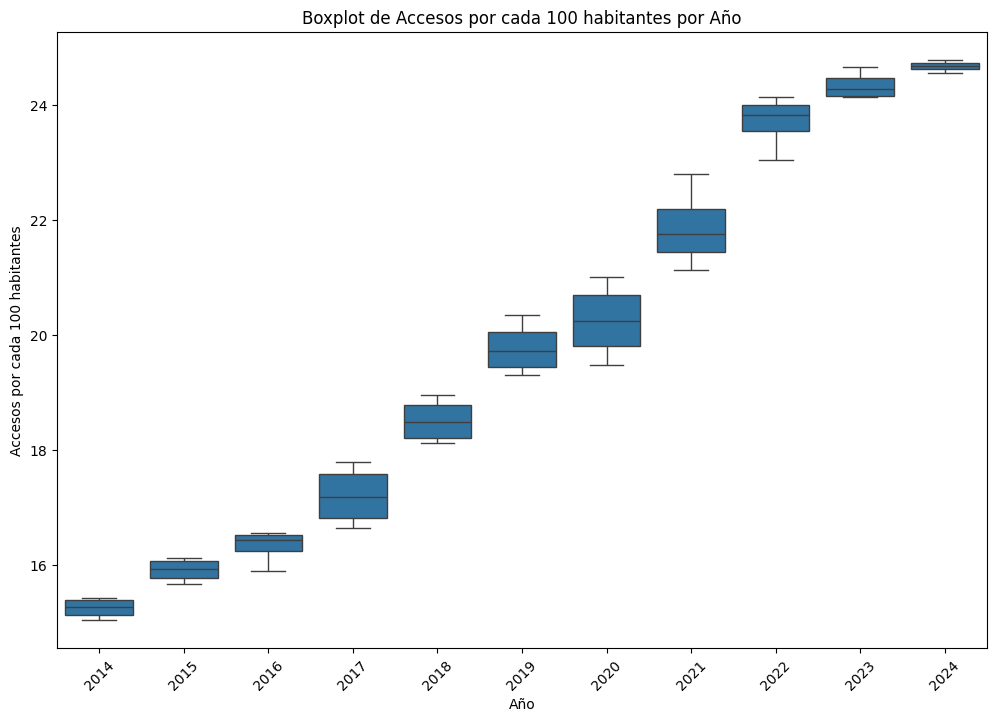

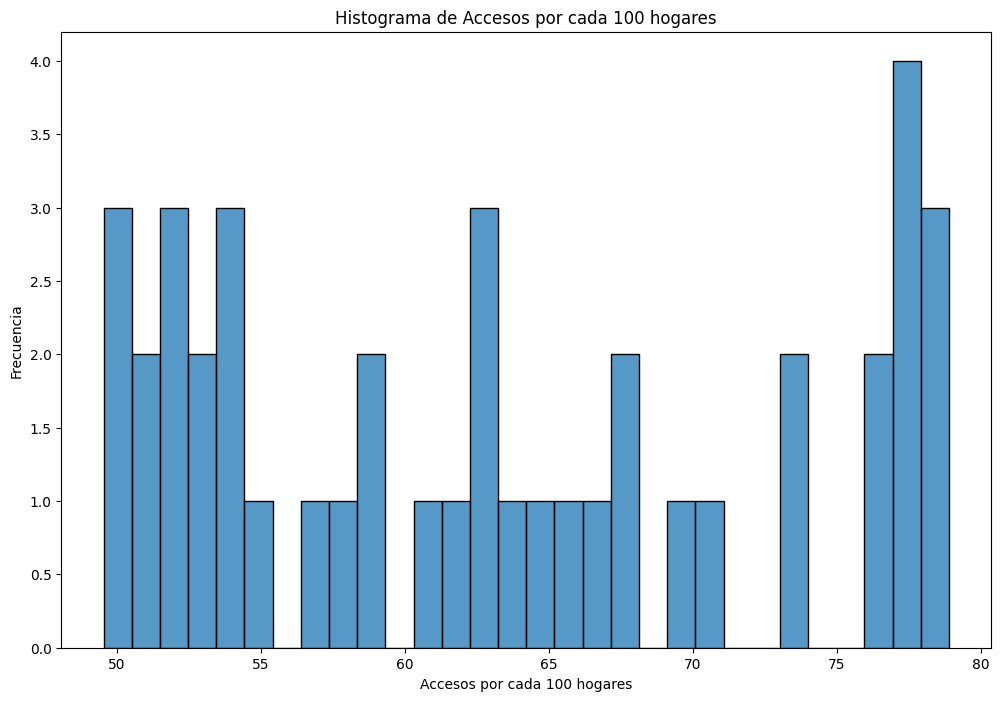

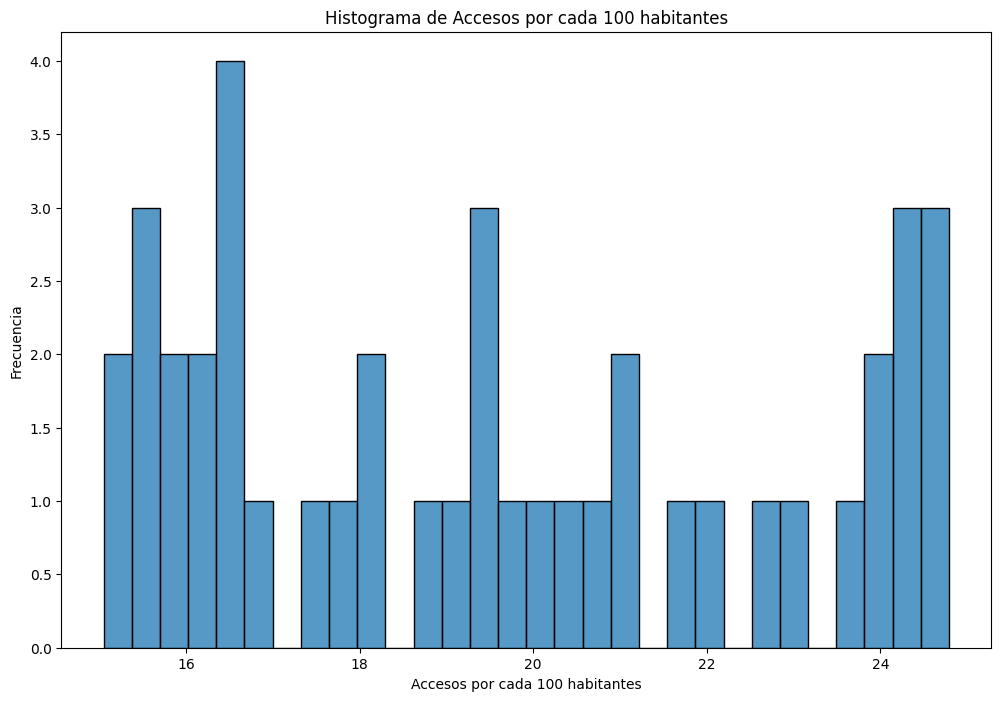

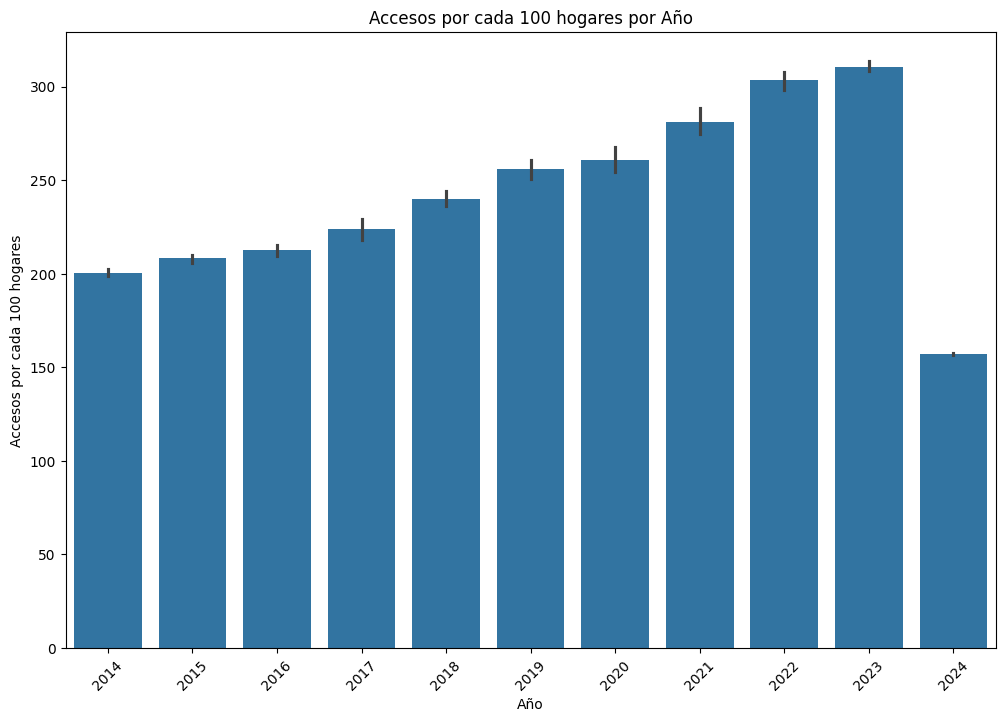

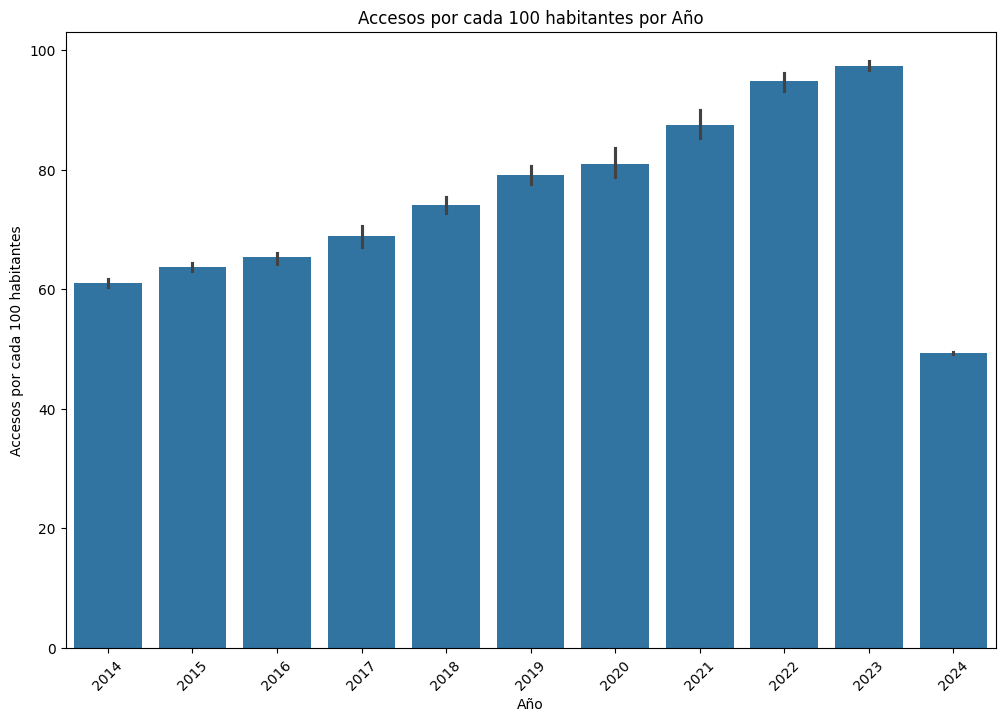

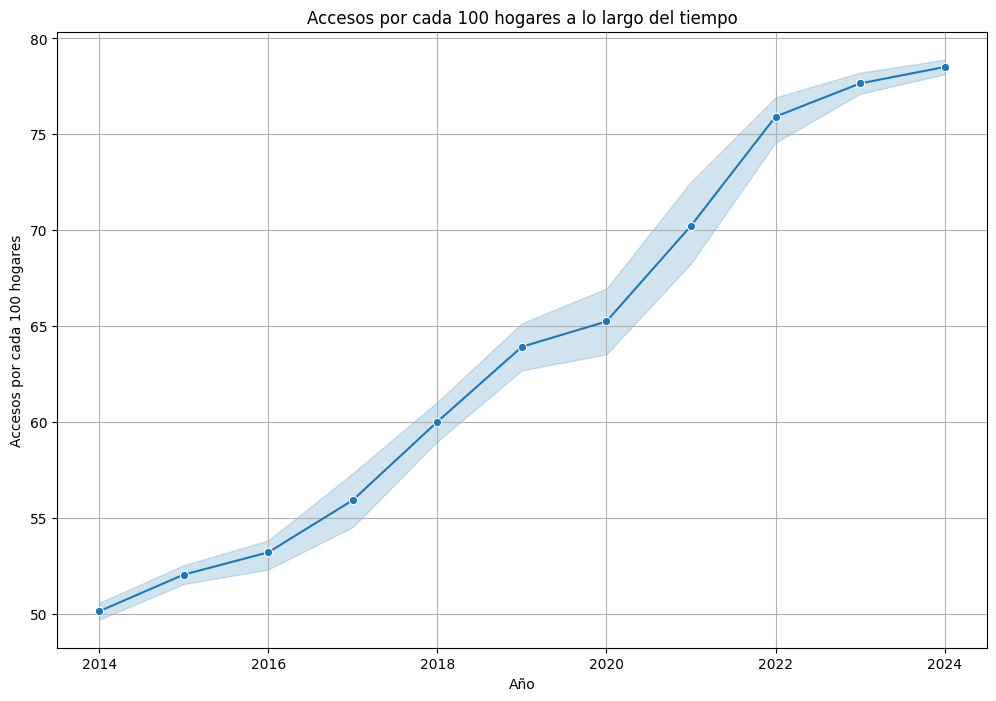

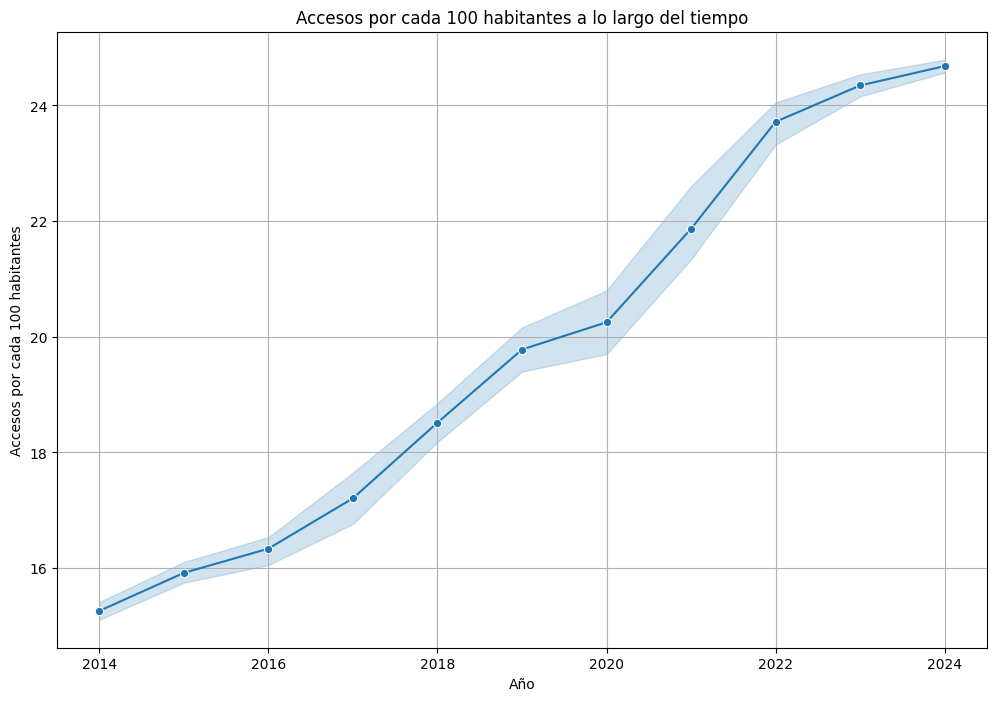

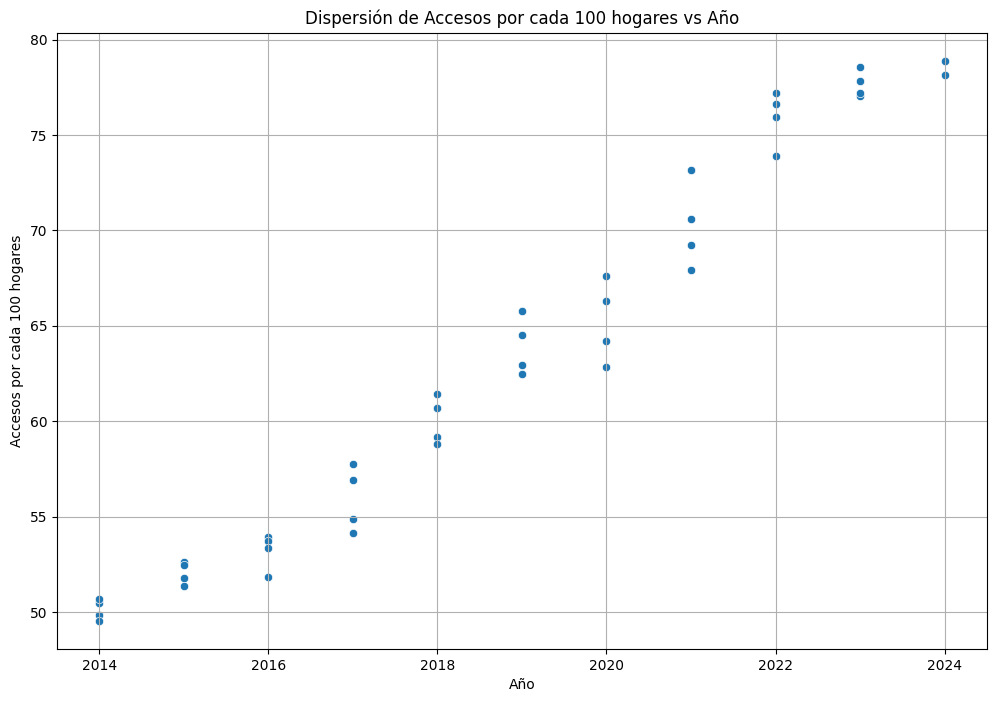

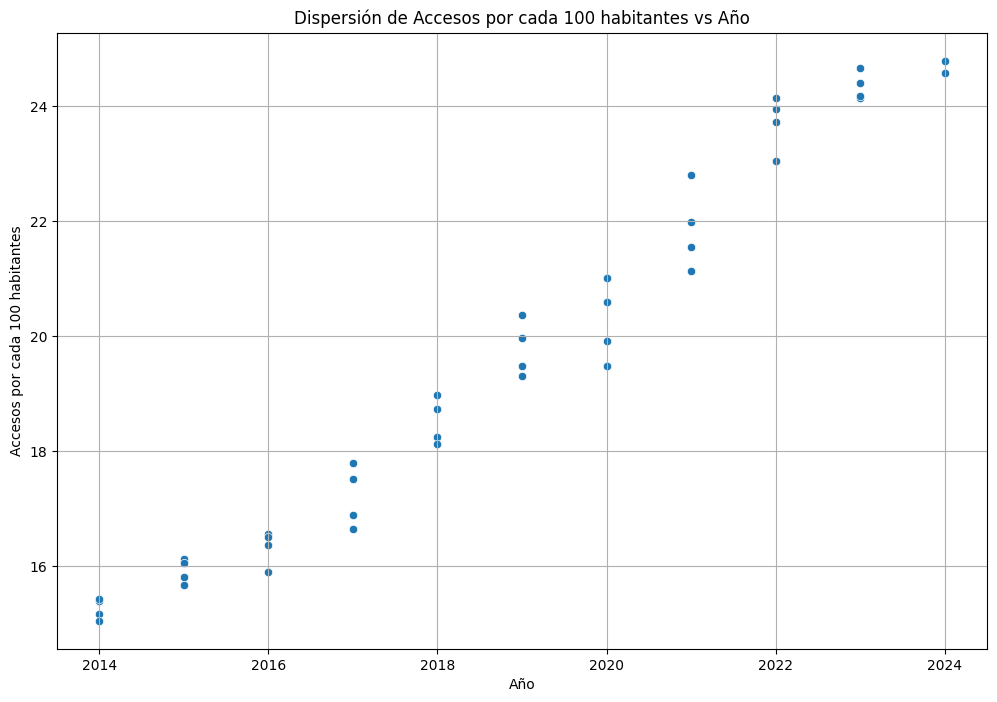

In [67]:
# Boxplot de Accesos por cada 100 hogares por Año
plt.figure(figsize=(12, 8))
sns.boxplot(data=datos, x='Año', y='Accesos por cada 100 hogares')
plt.title('Boxplot de Accesos por cada 100 hogares por Año')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hogares')
plt.xticks(rotation=45)
plt.show()

# Boxplot de Accesos por cada 100 habitantes por Año
plt.figure(figsize=(12, 8))
sns.boxplot(data=datos, x='Año', y='Accesos por cada 100 hab')
plt.title('Boxplot de Accesos por cada 100 habitantes por Año')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 habitantes')
plt.xticks(rotation=45)
plt.show()

# Histograma de Accesos por cada 100 hogares
plt.figure(figsize=(12, 8))
sns.histplot(data=datos, x='Accesos por cada 100 hogares', bins=30)
plt.title('Histograma de Accesos por cada 100 hogares')
plt.xlabel('Accesos por cada 100 hogares')
plt.ylabel('Frecuencia')
plt.show()

# Histograma de Accesos por cada 100 habitantes
plt.figure(figsize=(12, 8))
sns.histplot(data=datos, x='Accesos por cada 100 hab', bins=30)
plt.title('Histograma de Accesos por cada 100 habitantes')
plt.xlabel('Accesos por cada 100 habitantes')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras de Accesos por cada 100 hogares por Año
plt.figure(figsize=(12, 8))
sns.barplot(data=datos, x='Año', y='Accesos por cada 100 hogares', estimator=sum)
plt.title('Accesos por cada 100 hogares por Año')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hogares')
plt.xticks(rotation=45)
plt.show()

# Gráfico de barras de Accesos por cada 100 habitantes por Año
plt.figure(figsize=(12, 8))
sns.barplot(data=datos, x='Año', y='Accesos por cada 100 hab', estimator=sum)
plt.title('Accesos por cada 100 habitantes por Año')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 habitantes')
plt.xticks(rotation=45)
plt.show()

# Gráfico de líneas de Accesos por cada 100 hogares a lo largo del tiempo
plt.figure(figsize=(12, 8))
sns.lineplot(data=datos, x='Año', y='Accesos por cada 100 hogares', marker='o')
plt.title('Accesos por cada 100 hogares a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hogares')
plt.grid(True)
plt.show()

# Gráfico de líneas de Accesos por cada 100 habitantes a lo largo del tiempo
plt.figure(figsize=(12, 8))
sns.lineplot(data=datos, x='Año', y='Accesos por cada 100 hab', marker='o')
plt.title('Accesos por cada 100 habitantes a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 habitantes')
plt.grid(True)
plt.show()

# Gráfico de dispersión de Accesos por cada 100 hogares vs Año
plt.figure(figsize=(12, 8))
sns.scatterplot(data=datos, x='Año', y='Accesos por cada 100 hogares')
plt.title('Dispersión de Accesos por cada 100 hogares vs Año')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hogares')
plt.grid(True)
plt.show()

# Gráfico de dispersión de Accesos por cada 100 habitantes vs Año
plt.figure(figsize=(12, 8))
sns.scatterplot(data=datos, x='Año', y='Accesos por cada 100 hab')
plt.title('Dispersión de Accesos por cada 100 habitantes vs Año')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 habitantes')
plt.grid(True)
plt.show()

##### Conclusión de la hoja "Penetracion-totales":

1. **Estadísticas descriptivas**:
    - Las estadísticas descriptivas muestran la distribución de los accesos por cada 100 hogares y por cada 100 habitantes a lo largo de los años. Se observa una amplia variabilidad en los accesos, con algunos años teniendo un número significativamente mayor de accesos que otros.

2. **Boxplot**:
    - Los boxplots muestran la distribución de los accesos por cada 100 hogares y por cada 100 habitantes por año. Podemos observar la presencia de outliers en los accesos, especialmente en los valores más altos.

3. **Histogramas**:
    - Los histogramas de los accesos por cada 100 hogares y por cada 100 habitantes muestran una distribución variada, indicando que la mayoría de los años tienen accesos bajos, mientras que algunos tienen accesos significativamente más altos.

4. **Gráficos de barras**:
    - Los gráficos de barras muestran la distribución de los accesos por cada 100 hogares y por cada 100 habitantes por año. Podemos observar que algunos años tienen un número mucho mayor de accesos en comparación con otros.

5. **Gráficos de líneas**:
    - Los gráficos de líneas muestran la evolución de los accesos por cada 100 hogares y por cada 100 habitantes a lo largo del tiempo. Podemos observar tendencias crecientes en algunos años, mientras que otros muestran una tendencia más estable.

6. **Gráficos de dispersión**:
    - Los gráficos de dispersión muestran la relación entre los accesos por cada 100 hogares y por cada 100 habitantes con el año. Podemos observar una tendencia general de aumento en los accesos a lo largo del tiempo.

En resumen, los datos de la hoja "Penetracion-totales" indican que hay una variabilidad considerable en los accesos por cada 100 hogares y por cada 100 habitantes a lo largo de los años. Algunos años muestran tendencias crecientes en los accesos, mientras que otros mantienen una tendencia más estable.

In [68]:
hojas["Penetracion-totales"] = datos


# Hoja 11: Totales Accesos por rango

In [69]:
datos=hojas["Totales Accesos por rango"]
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Año                      42 non-null     int64
 1   Trimestre                42 non-null     int64
 2   Hasta 512 kbps           42 non-null     int64
 3   Entre 512 Kbps y 1 Mbps  42 non-null     int64
 4   Entre 1 Mbps y 6 Mbps    42 non-null     int64
 5   Entre 6 Mbps y 10 Mbps   42 non-null     int64
 6   Entre 10 Mbps y 20 Mbps  42 non-null     int64
 7   Entre 20 Mbps y 30 Mbps  42 non-null     int64
 8   Más de 30 Mbps           42 non-null     int64
 9   OTROS                    42 non-null     int64
 10  Total                    42 non-null     int64
dtypes: int64(11)
memory usage: 3.7 KB


Revisamos que las columnas que utilizaremos tengan el tipo correcto, al ser correctas, continuamos con el EDA

In [70]:
datos = realizar_eda("Totales Accesos por rango", datos)

Análisis de la hoja: Totales Accesos por rango
Valores faltantes:
Año                        0
Trimestre                  0
Hasta 512 kbps             0
Entre 512 Kbps y 1 Mbps    0
Entre 1 Mbps y 6 Mbps      0
Entre 6 Mbps y 10 Mbps     0
Entre 10 Mbps y 20 Mbps    0
Entre 20 Mbps y 30 Mbps    0
Más de 30 Mbps             0
OTROS                      0
Total                      0
dtype: int64
Registros duplicados:
0
Estadísticas descriptivas:
               Año  Trimestre  Hasta 512 kbps  Entre 512 Kbps y 1 Mbps  \
count    42.000000  42.000000       42.000000                42.000000   
mean   2018.761905   2.452381    46756.595238            215615.285714   
std       3.074756   1.130560    48922.973593            192134.704593   
min    2014.000000   1.000000     5675.000000             28521.000000   
25%    2016.000000   1.250000    29027.750000             69951.750000   
50%    2019.000000   2.000000    34960.000000            150273.000000   
75%    2021.000000   3.000000    

Al no contar con valores faltantes o duplicados, continuamos con los graficos

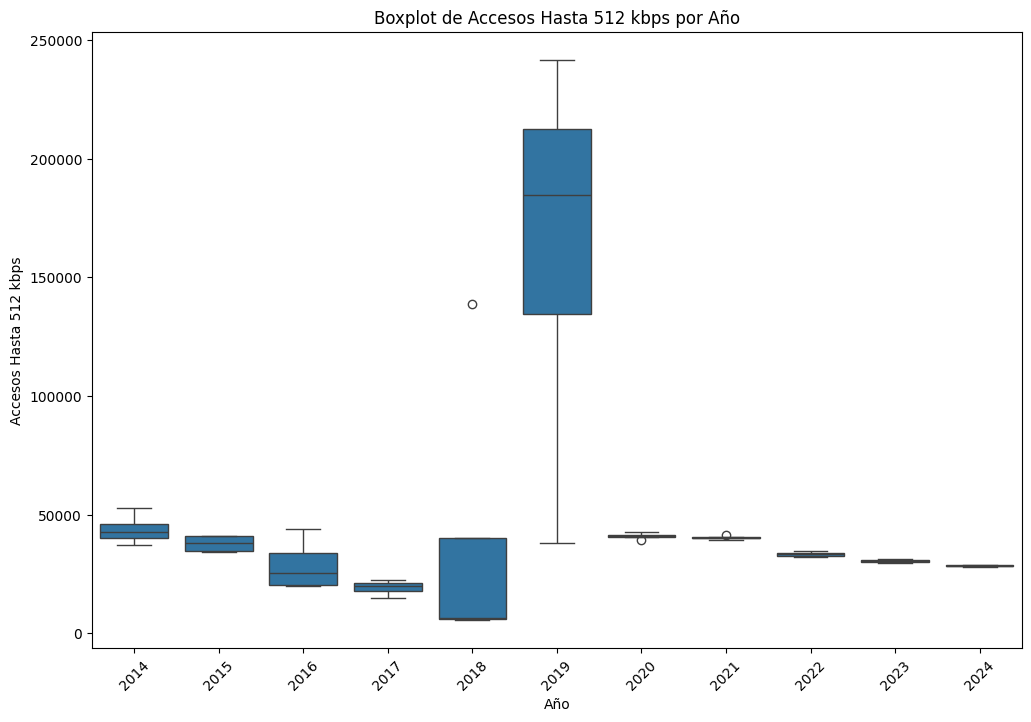

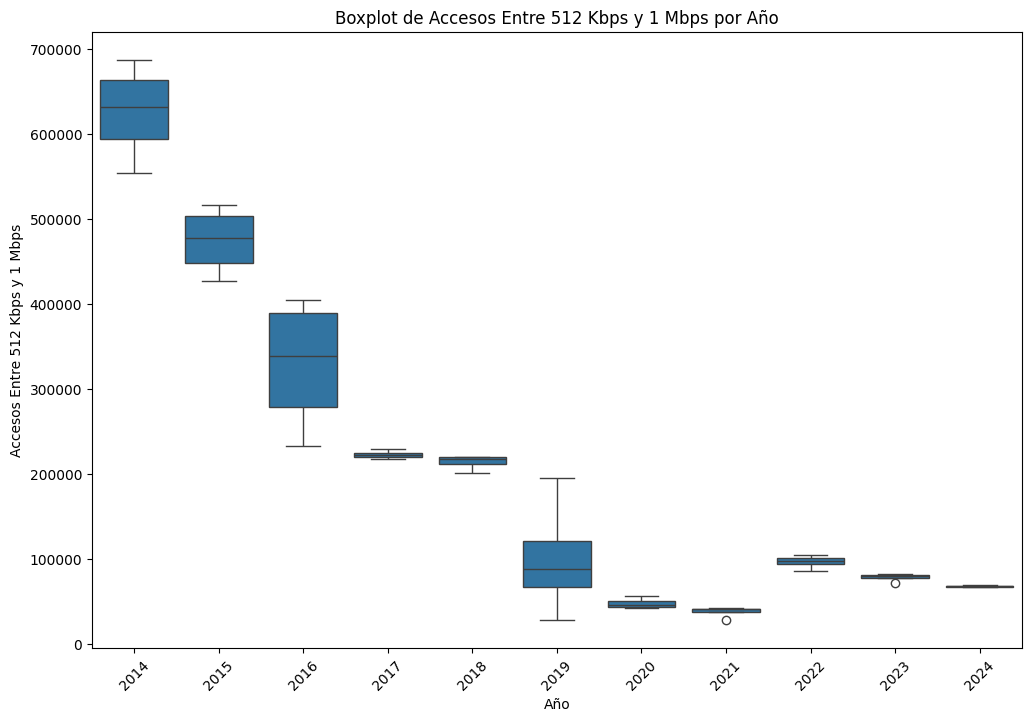

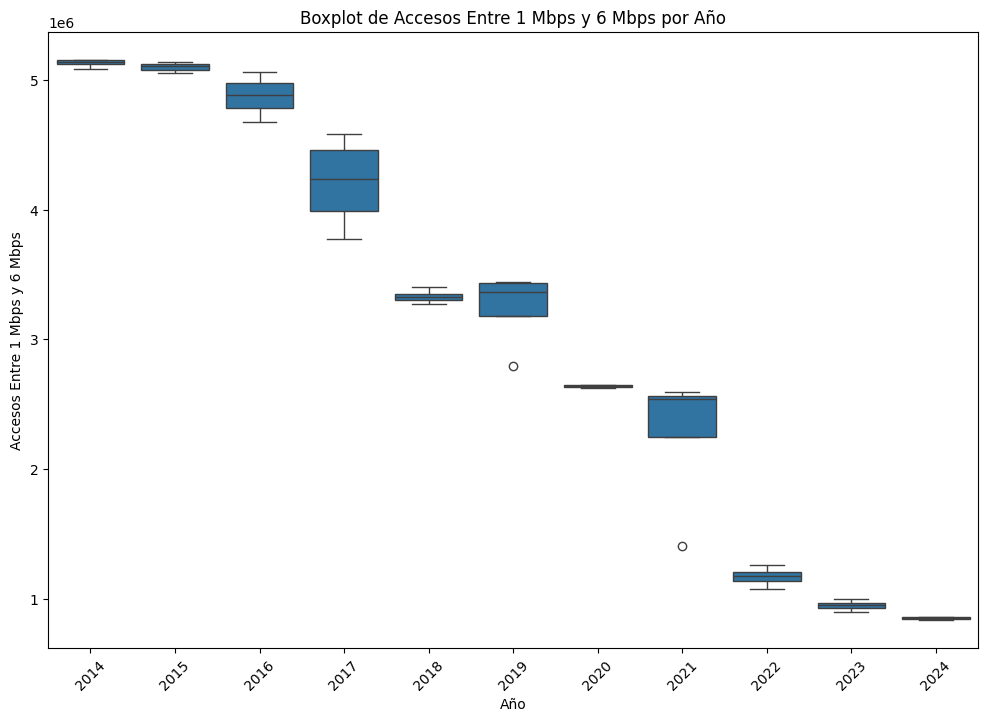

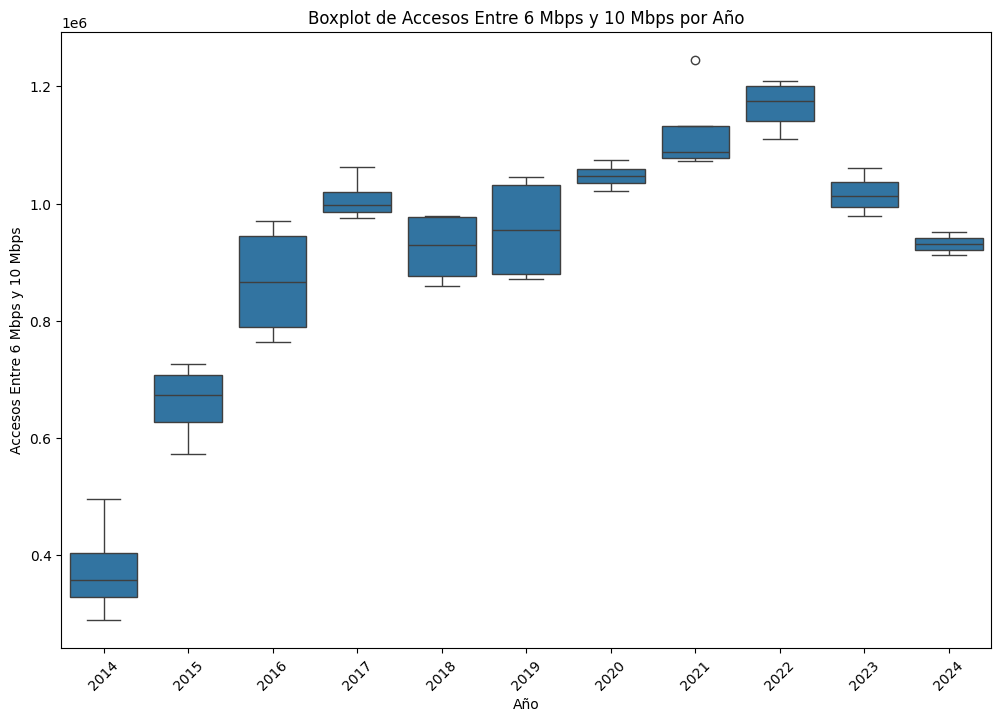

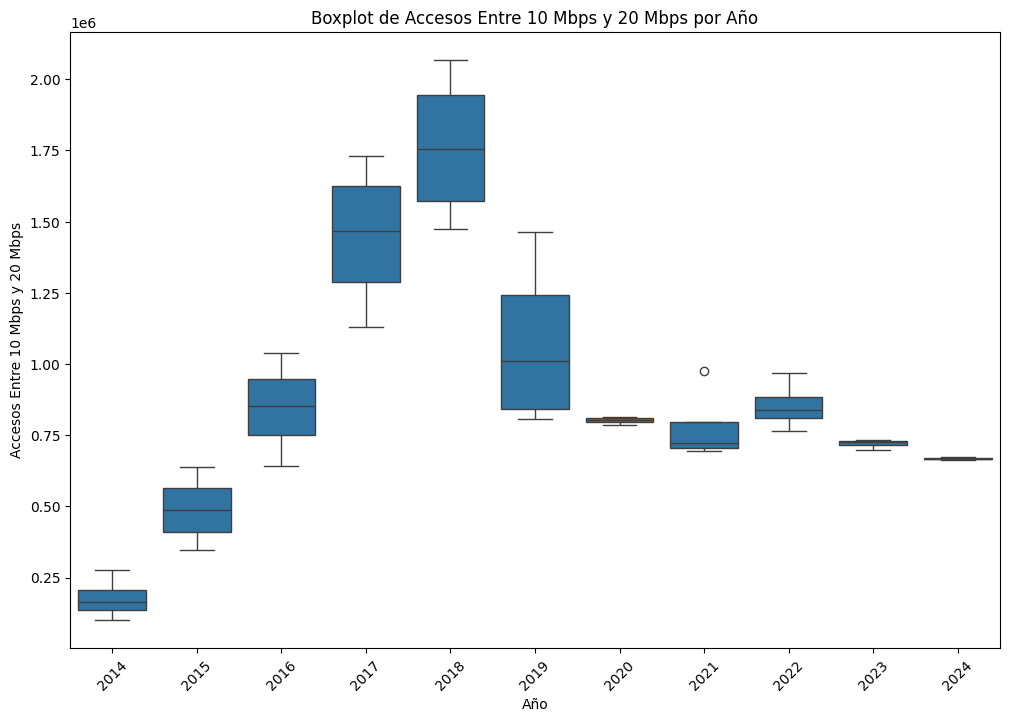

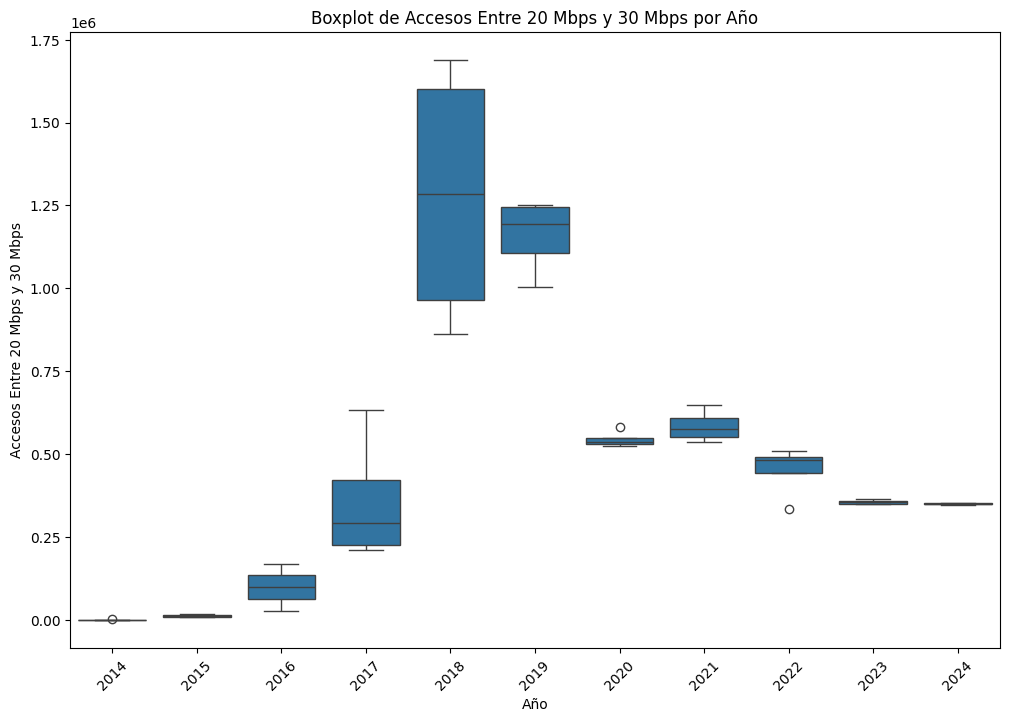

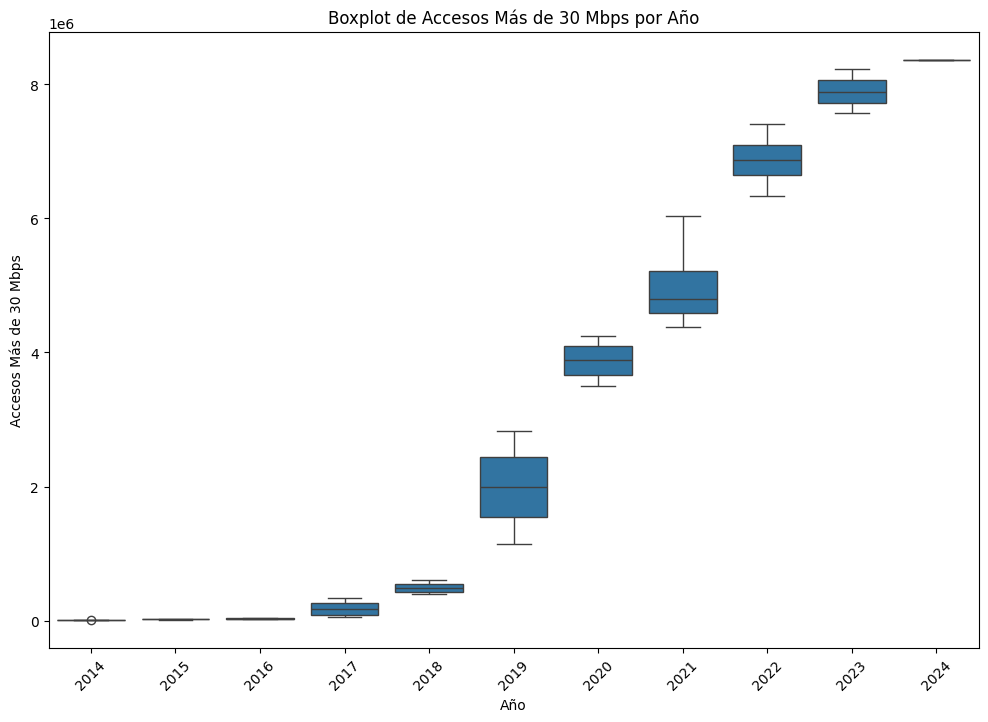

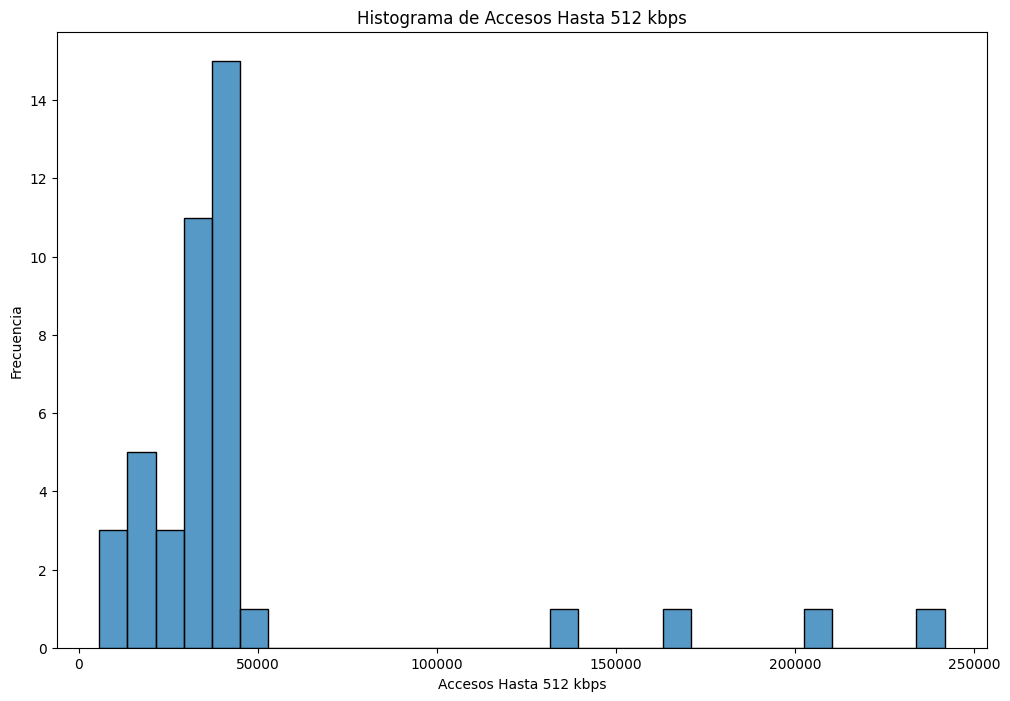

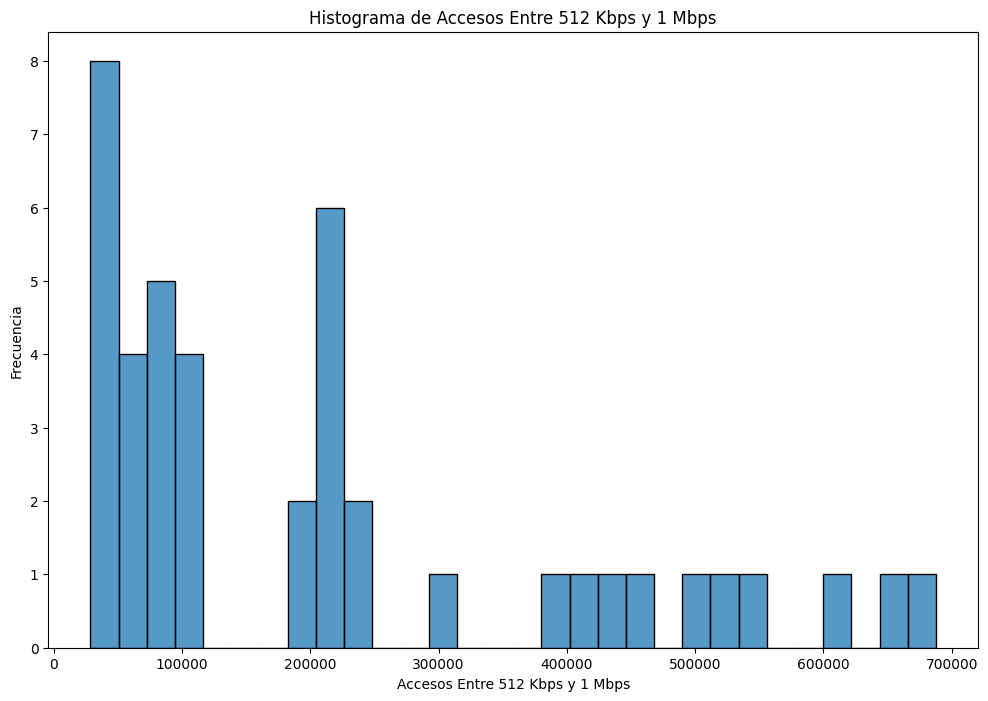

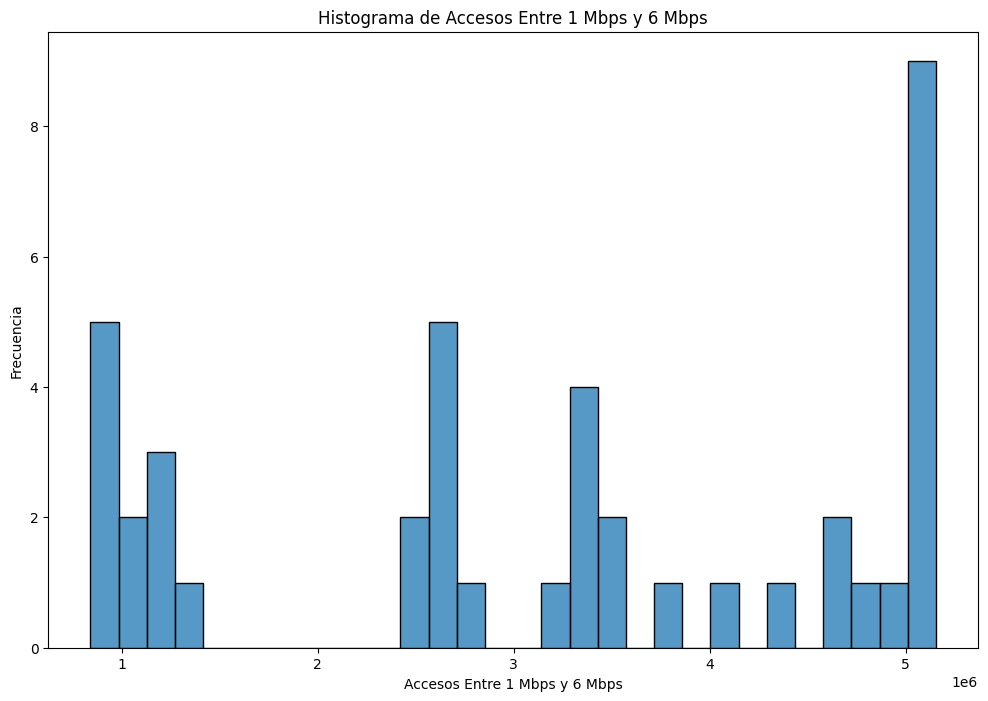

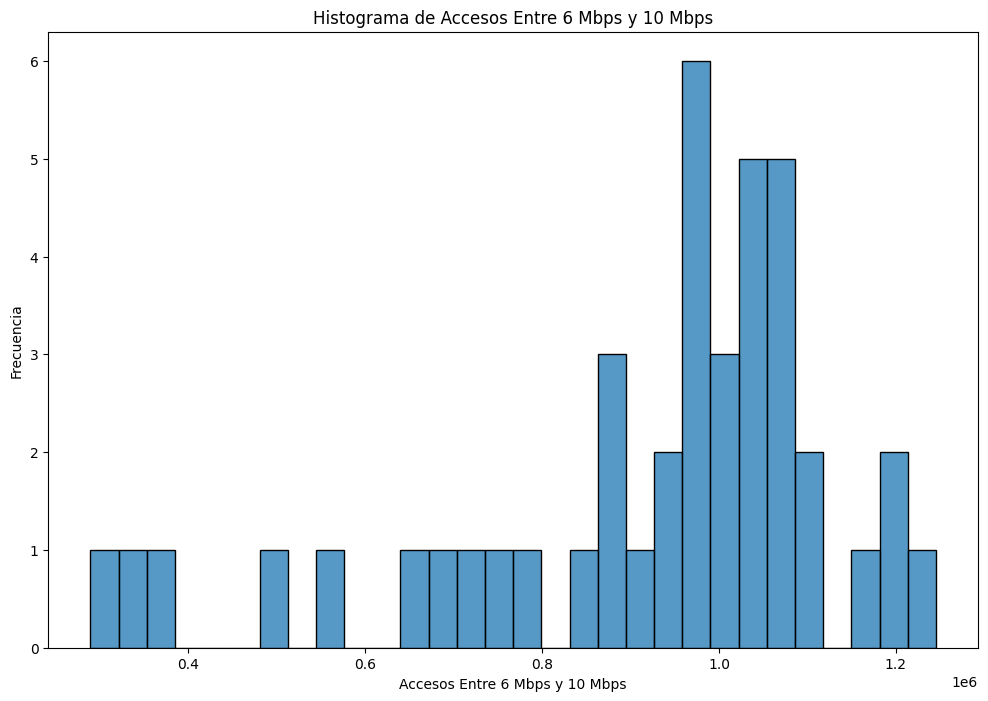

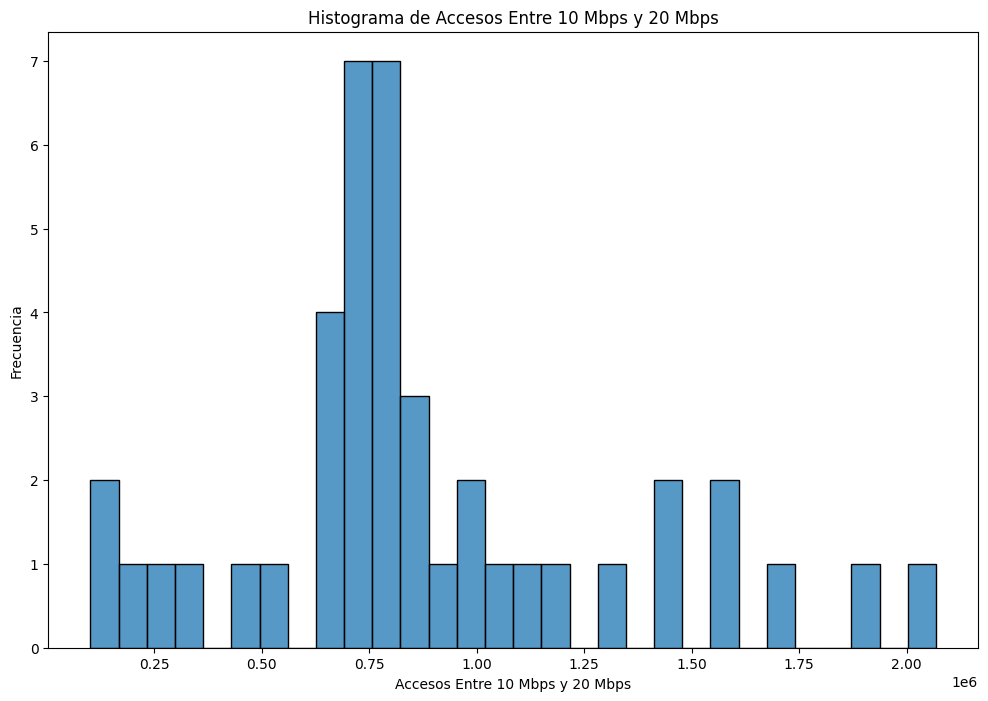

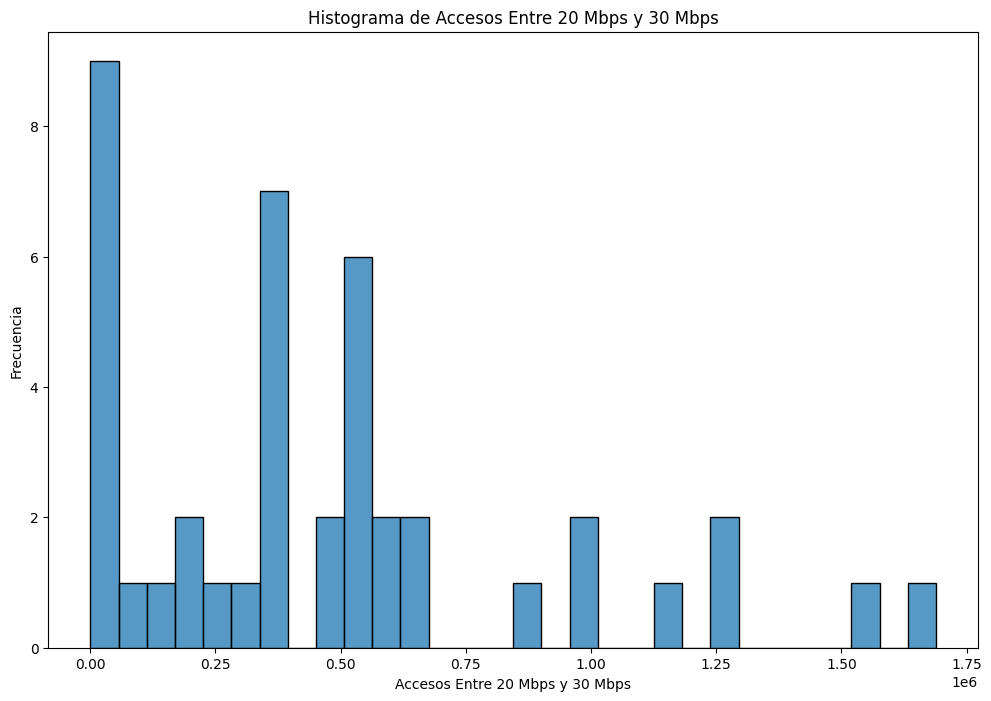

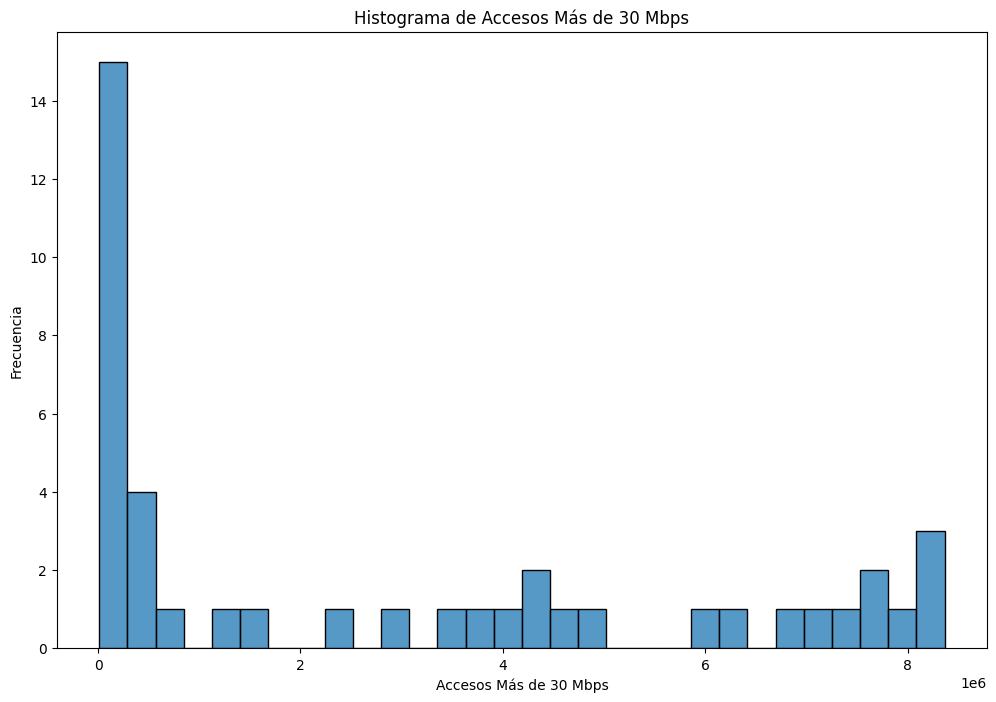

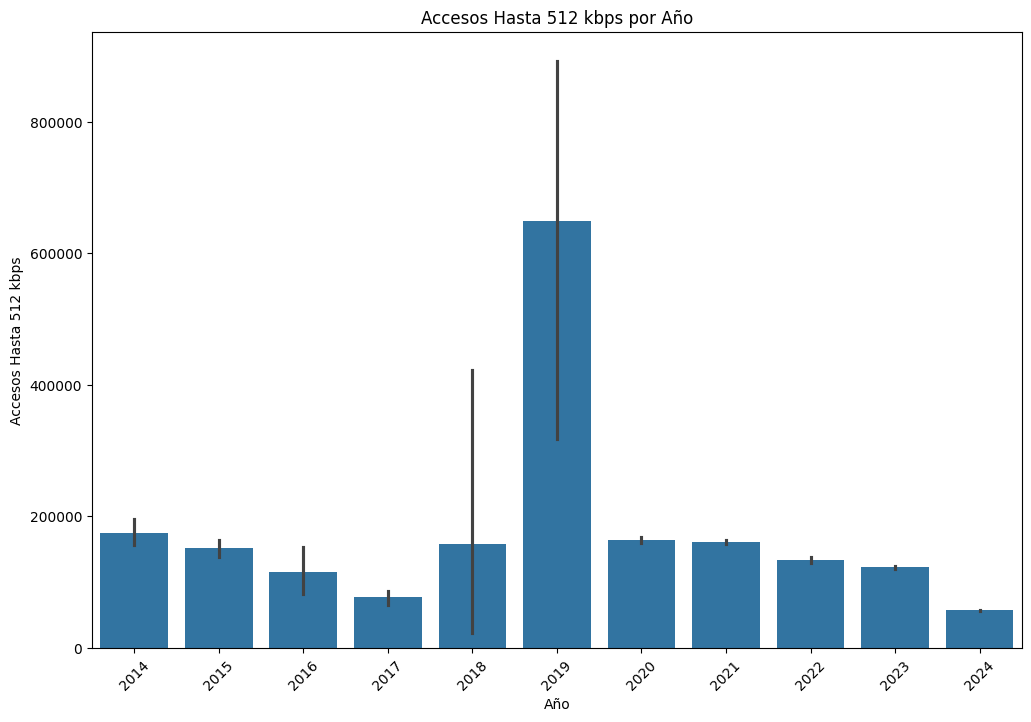

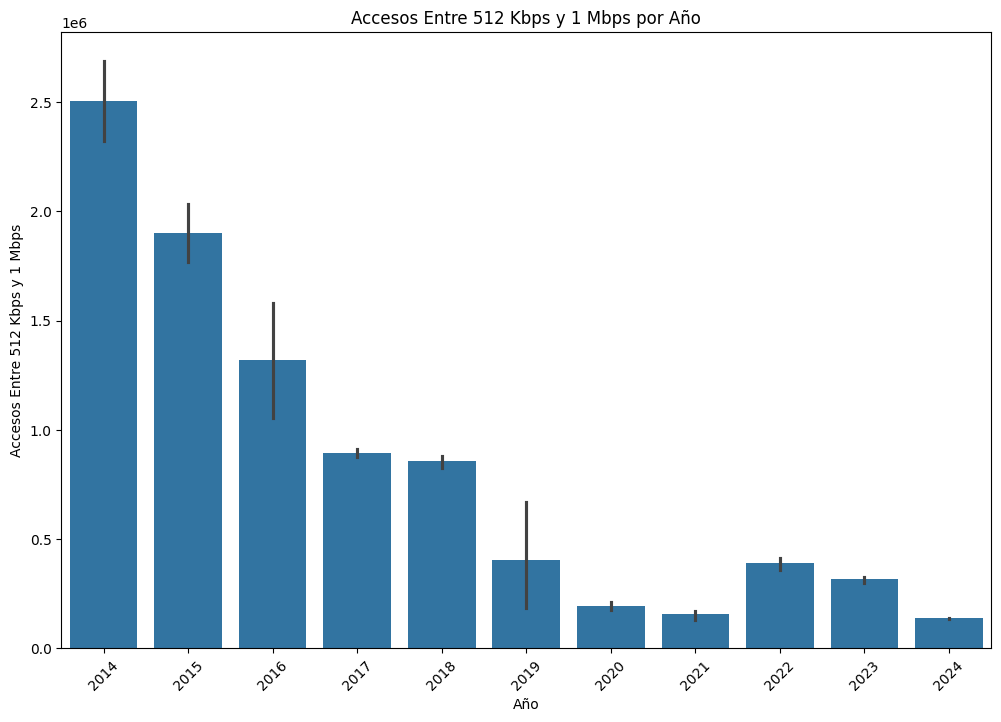

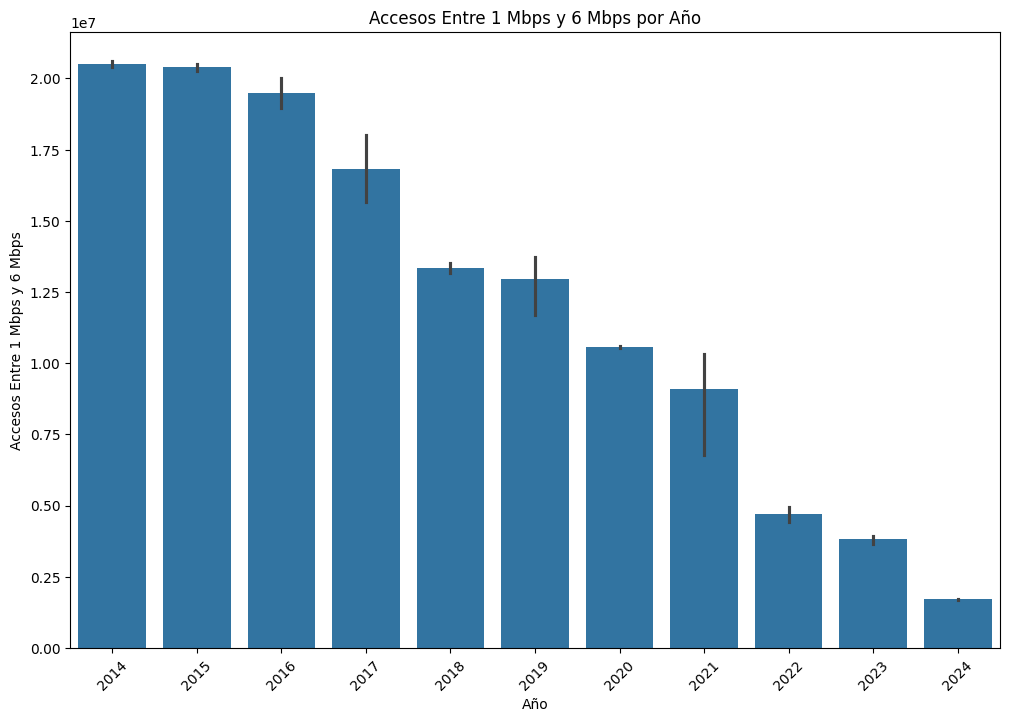

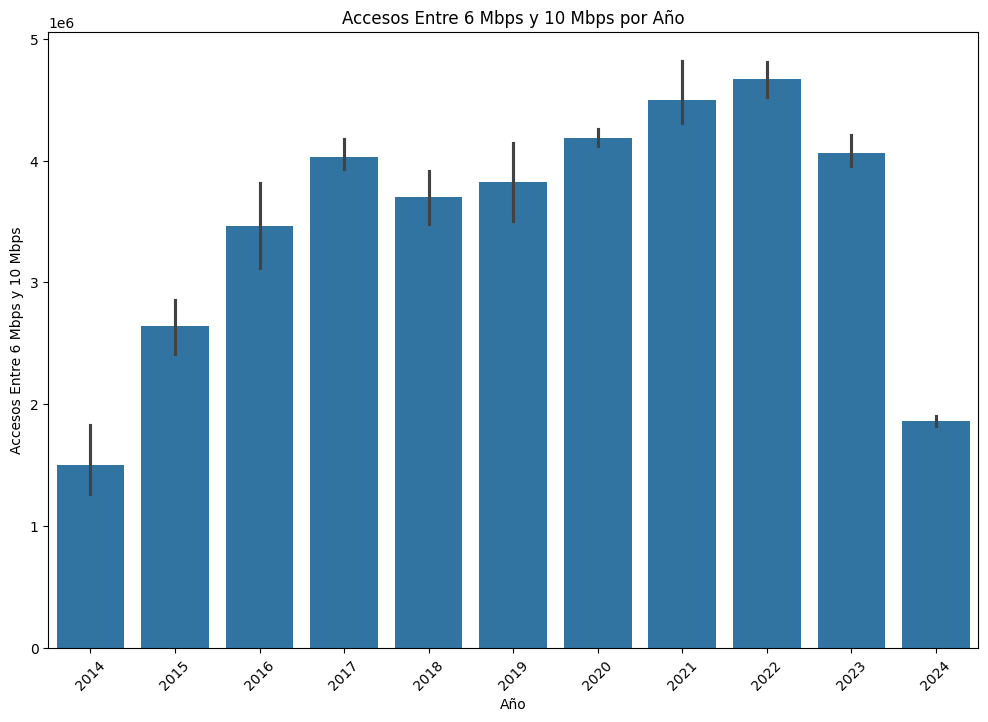

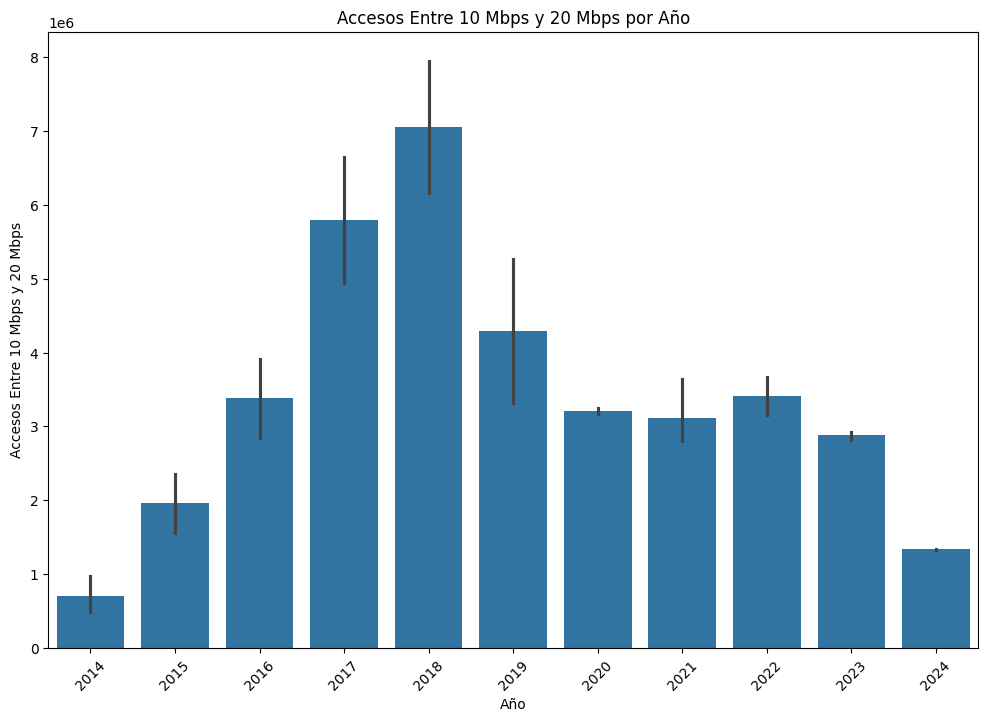

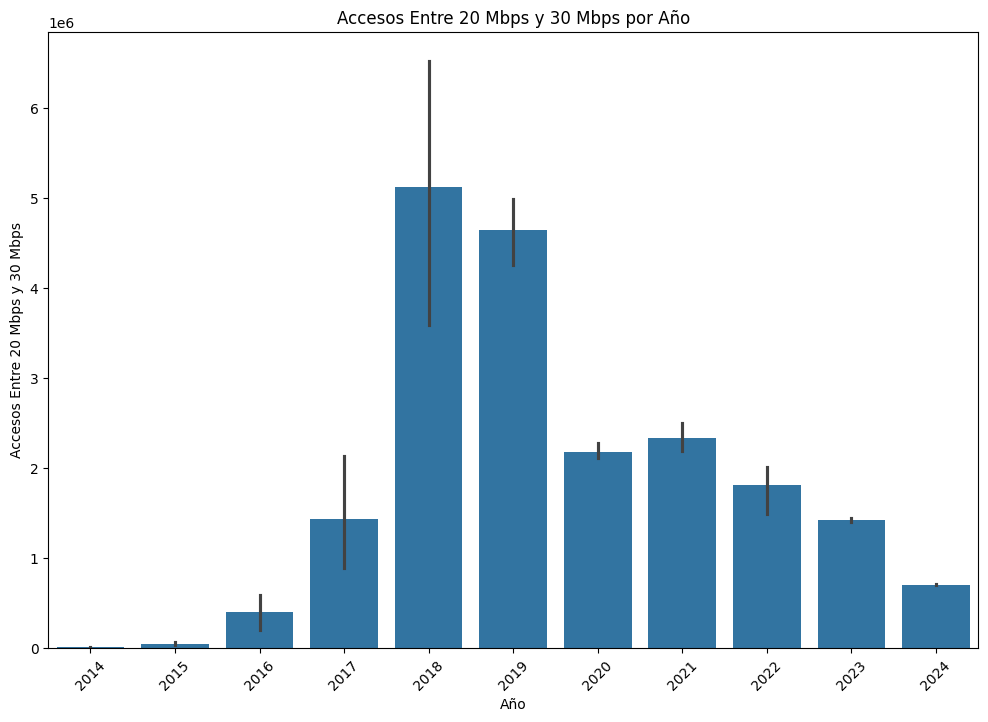

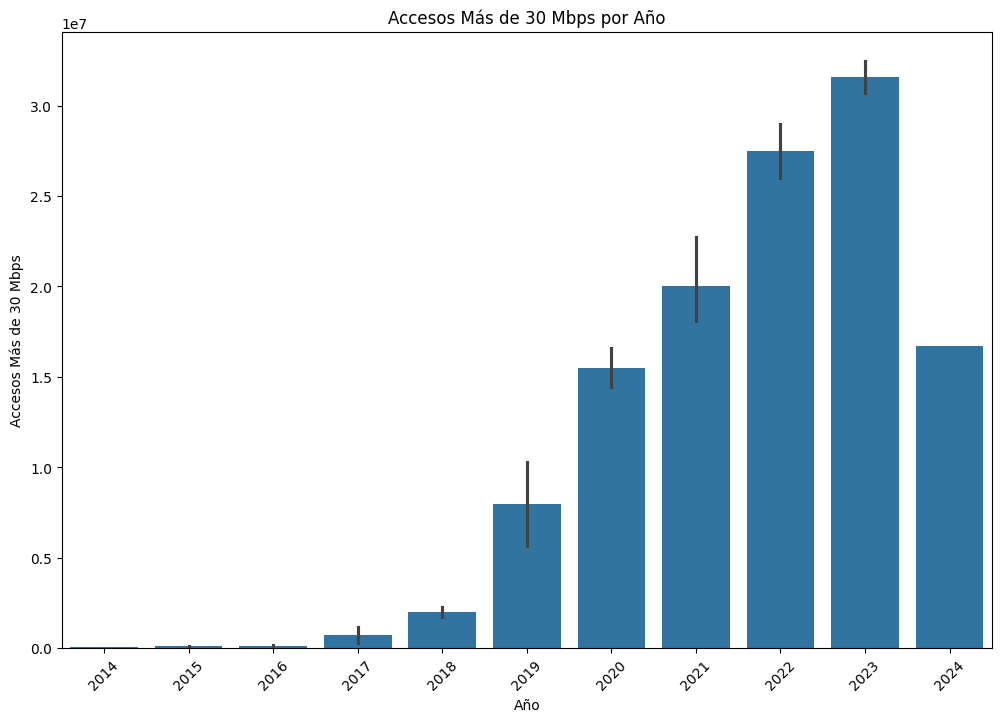

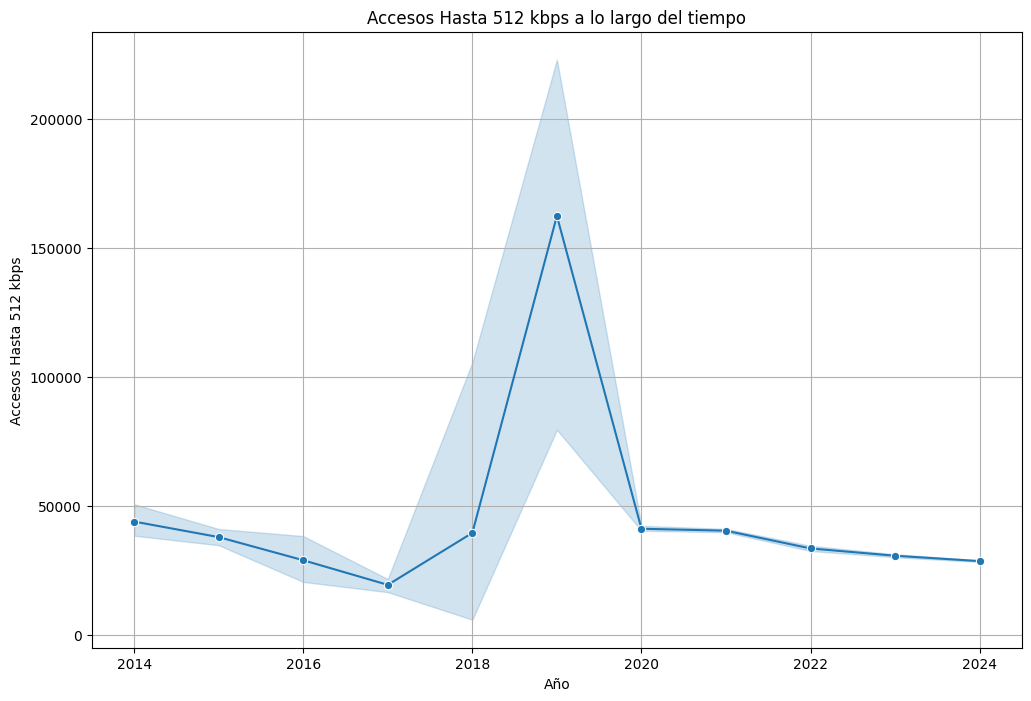

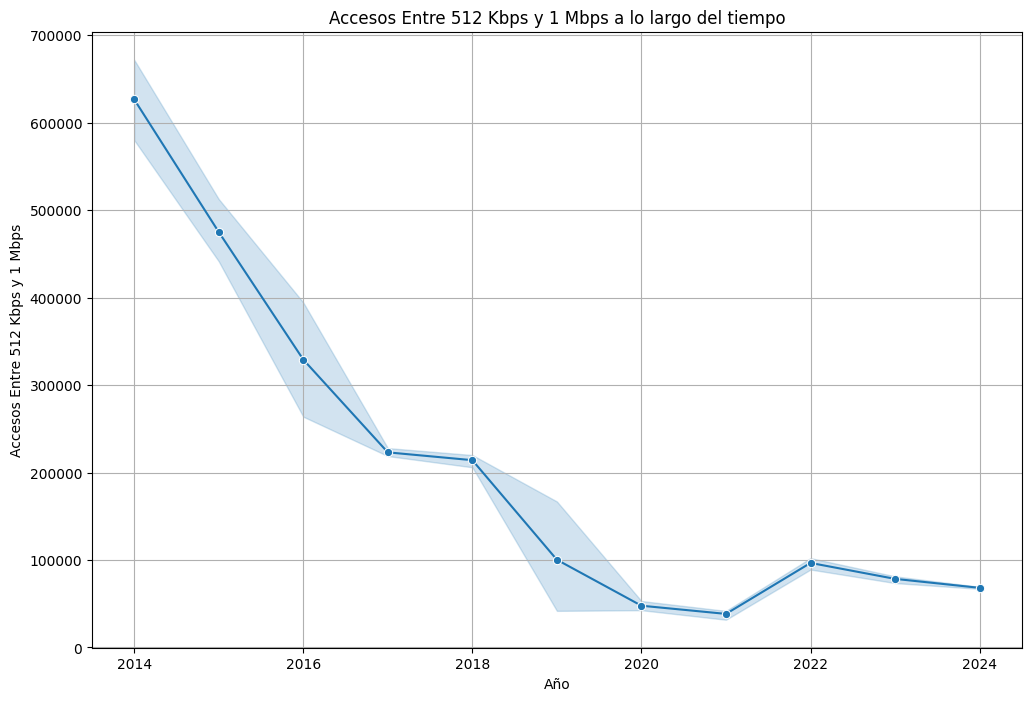

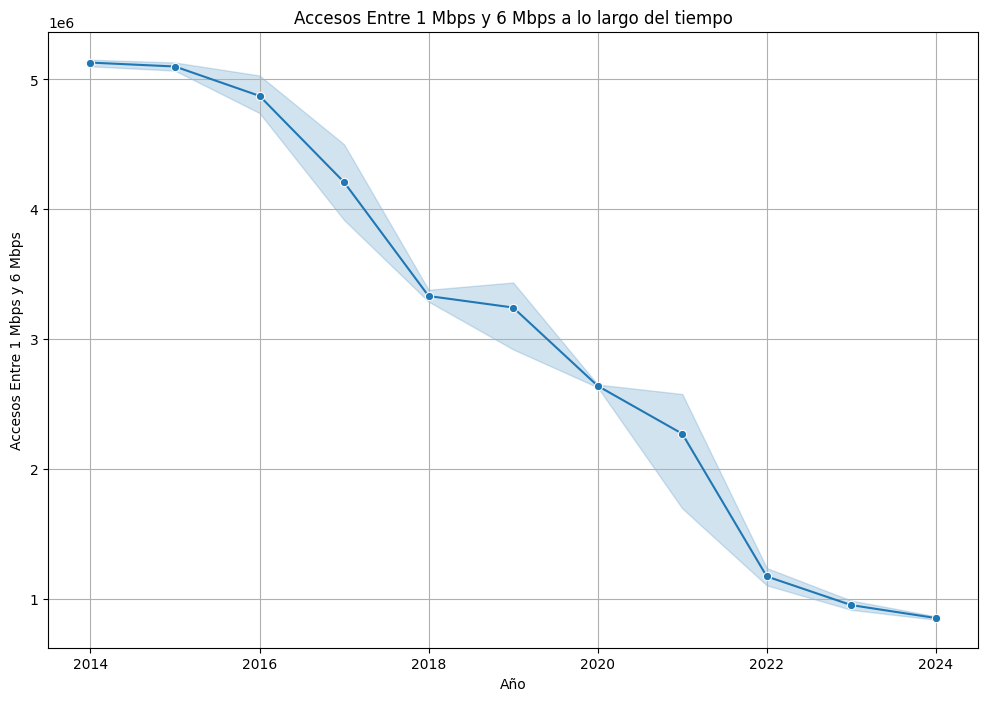

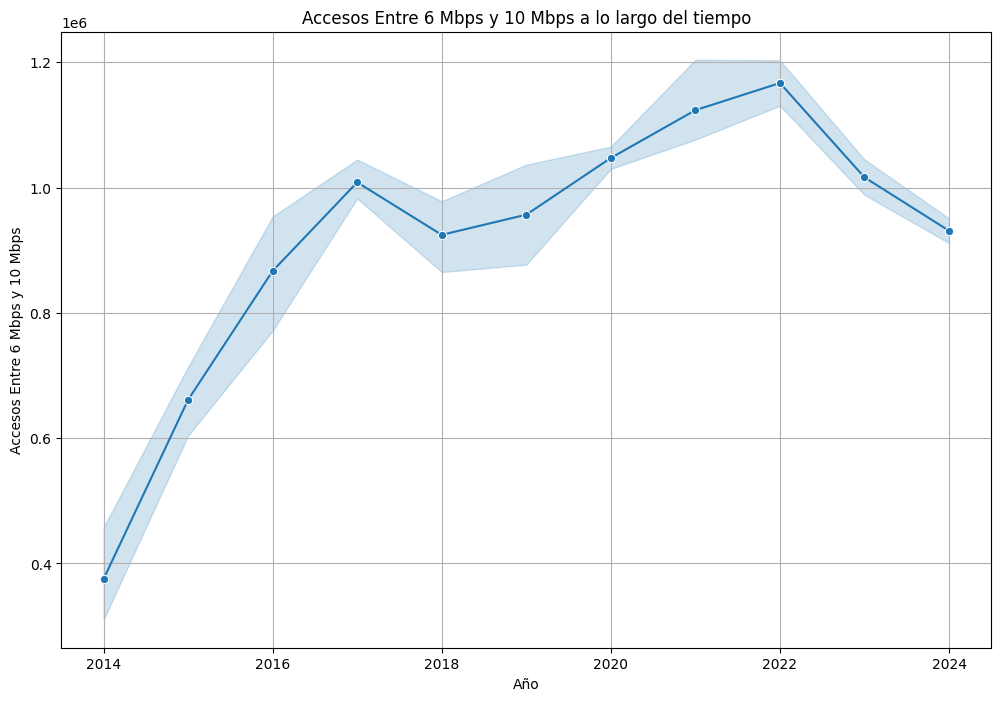

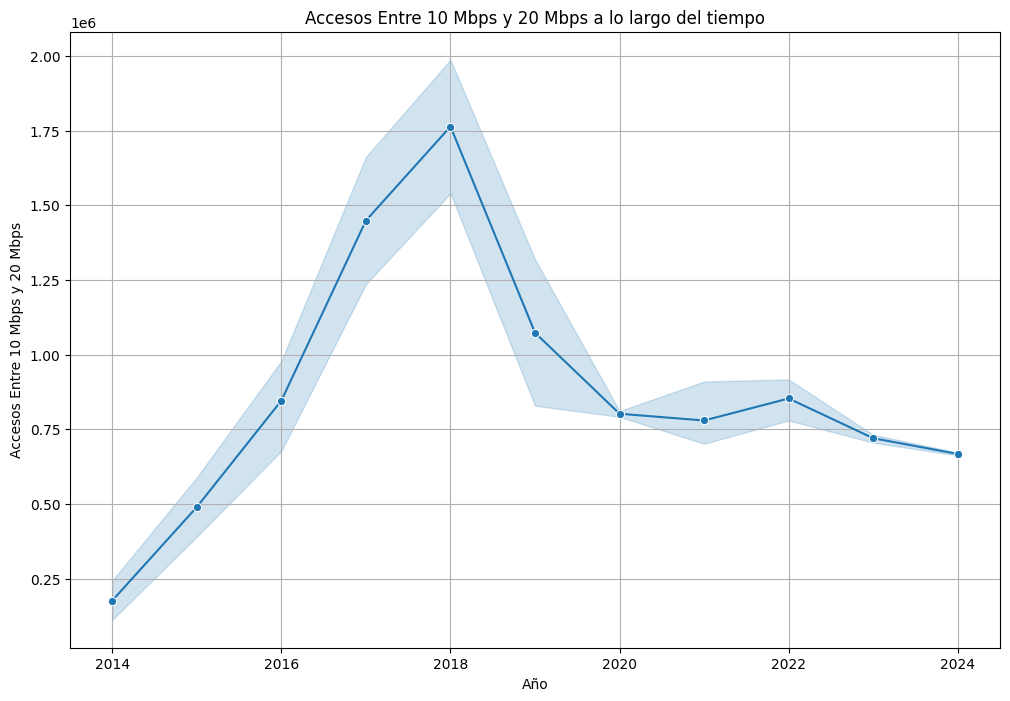

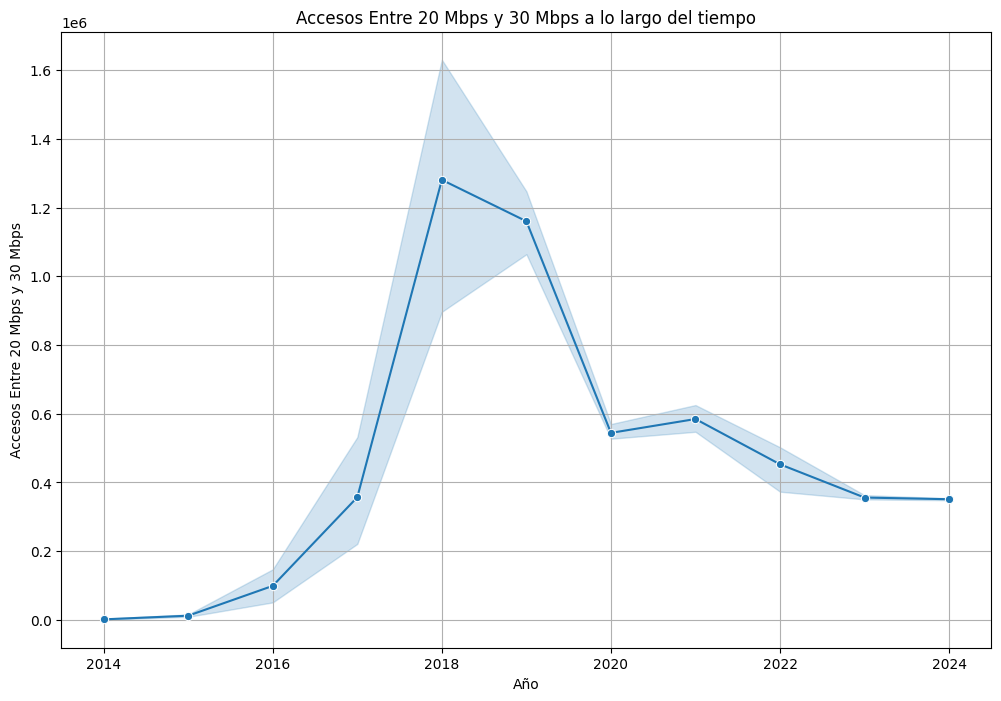

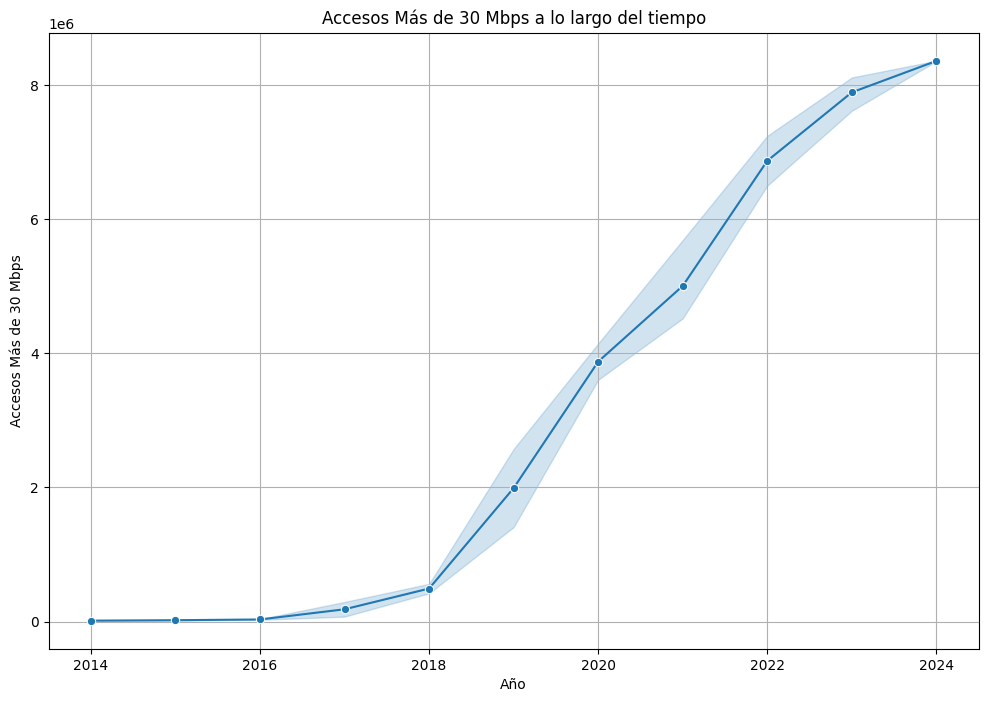

In [71]:
# Boxplot de accesos por rango de velocidad
plt.figure(figsize=(12, 8))
sns.boxplot(data=datos, x='Año', y='Hasta 512 kbps')
plt.title('Boxplot de Accesos Hasta 512 kbps por Año')
plt.xlabel('Año')
plt.ylabel('Accesos Hasta 512 kbps')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=datos, x='Año', y='Entre 512 Kbps y 1 Mbps')
plt.title('Boxplot de Accesos Entre 512 Kbps y 1 Mbps por Año')
plt.xlabel('Año')
plt.ylabel('Accesos Entre 512 Kbps y 1 Mbps')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=datos, x='Año', y='Entre 1 Mbps y 6 Mbps')
plt.title('Boxplot de Accesos Entre 1 Mbps y 6 Mbps por Año')
plt.xlabel('Año')
plt.ylabel('Accesos Entre 1 Mbps y 6 Mbps')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=datos, x='Año', y='Entre 6 Mbps y 10 Mbps')
plt.title('Boxplot de Accesos Entre 6 Mbps y 10 Mbps por Año')
plt.xlabel('Año')
plt.ylabel('Accesos Entre 6 Mbps y 10 Mbps')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=datos, x='Año', y='Entre 10 Mbps y 20 Mbps')
plt.title('Boxplot de Accesos Entre 10 Mbps y 20 Mbps por Año')
plt.xlabel('Año')
plt.ylabel('Accesos Entre 10 Mbps y 20 Mbps')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=datos, x='Año', y='Entre 20 Mbps y 30 Mbps')
plt.title('Boxplot de Accesos Entre 20 Mbps y 30 Mbps por Año')
plt.xlabel('Año')
plt.ylabel('Accesos Entre 20 Mbps y 30 Mbps')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=datos, x='Año', y='Más de 30 Mbps')
plt.title('Boxplot de Accesos Más de 30 Mbps por Año')
plt.xlabel('Año')
plt.ylabel('Accesos Más de 30 Mbps')
plt.xticks(rotation=45)
plt.show()

# Histograma de accesos por rango de velocidad
plt.figure(figsize=(12, 8))
sns.histplot(data=datos, x='Hasta 512 kbps', bins=30)
plt.title('Histograma de Accesos Hasta 512 kbps')
plt.xlabel('Accesos Hasta 512 kbps')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(data=datos, x='Entre 512 Kbps y 1 Mbps', bins=30)
plt.title('Histograma de Accesos Entre 512 Kbps y 1 Mbps')
plt.xlabel('Accesos Entre 512 Kbps y 1 Mbps')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(data=datos, x='Entre 1 Mbps y 6 Mbps', bins=30)
plt.title('Histograma de Accesos Entre 1 Mbps y 6 Mbps')
plt.xlabel('Accesos Entre 1 Mbps y 6 Mbps')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(data=datos, x='Entre 6 Mbps y 10 Mbps', bins=30)
plt.title('Histograma de Accesos Entre 6 Mbps y 10 Mbps')
plt.xlabel('Accesos Entre 6 Mbps y 10 Mbps')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(data=datos, x='Entre 10 Mbps y 20 Mbps', bins=30)
plt.title('Histograma de Accesos Entre 10 Mbps y 20 Mbps')
plt.xlabel('Accesos Entre 10 Mbps y 20 Mbps')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(data=datos, x='Entre 20 Mbps y 30 Mbps', bins=30)
plt.title('Histograma de Accesos Entre 20 Mbps y 30 Mbps')
plt.xlabel('Accesos Entre 20 Mbps y 30 Mbps')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(data=datos, x='Más de 30 Mbps', bins=30)
plt.title('Histograma de Accesos Más de 30 Mbps')
plt.xlabel('Accesos Más de 30 Mbps')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras de accesos por rango de velocidad a lo largo de los años
plt.figure(figsize=(12, 8))
sns.barplot(data=datos, x='Año', y='Hasta 512 kbps', estimator=sum)
plt.title('Accesos Hasta 512 kbps por Año')
plt.xlabel('Año')
plt.ylabel('Accesos Hasta 512 kbps')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(data=datos, x='Año', y='Entre 512 Kbps y 1 Mbps', estimator=sum)
plt.title('Accesos Entre 512 Kbps y 1 Mbps por Año')
plt.xlabel('Año')
plt.ylabel('Accesos Entre 512 Kbps y 1 Mbps')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(data=datos, x='Año', y='Entre 1 Mbps y 6 Mbps', estimator=sum)
plt.title('Accesos Entre 1 Mbps y 6 Mbps por Año')
plt.xlabel('Año')
plt.ylabel('Accesos Entre 1 Mbps y 6 Mbps')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(data=datos, x='Año', y='Entre 6 Mbps y 10 Mbps', estimator=sum)
plt.title('Accesos Entre 6 Mbps y 10 Mbps por Año')
plt.xlabel('Año')
plt.ylabel('Accesos Entre 6 Mbps y 10 Mbps')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(data=datos, x='Año', y='Entre 10 Mbps y 20 Mbps', estimator=sum)
plt.title('Accesos Entre 10 Mbps y 20 Mbps por Año')
plt.xlabel('Año')
plt.ylabel('Accesos Entre 10 Mbps y 20 Mbps')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(data=datos, x='Año', y='Entre 20 Mbps y 30 Mbps', estimator=sum)
plt.title('Accesos Entre 20 Mbps y 30 Mbps por Año')
plt.xlabel('Año')
plt.ylabel('Accesos Entre 20 Mbps y 30 Mbps')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(data=datos, x='Año', y='Más de 30 Mbps', estimator=sum)
plt.title('Accesos Más de 30 Mbps por Año')
plt.xlabel('Año')
plt.ylabel('Accesos Más de 30 Mbps')
plt.xticks(rotation=45)
plt.show()

# Gráfico de líneas de accesos por rango de velocidad a lo largo del tiempo
plt.figure(figsize=(12, 8))
sns.lineplot(data=datos, x='Año', y='Hasta 512 kbps', marker='o')
plt.title('Accesos Hasta 512 kbps a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Accesos Hasta 512 kbps')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
sns.lineplot(data=datos, x='Año', y='Entre 512 Kbps y 1 Mbps', marker='o')
plt.title('Accesos Entre 512 Kbps y 1 Mbps a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Accesos Entre 512 Kbps y 1 Mbps')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
sns.lineplot(data=datos, x='Año', y='Entre 1 Mbps y 6 Mbps', marker='o')
plt.title('Accesos Entre 1 Mbps y 6 Mbps a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Accesos Entre 1 Mbps y 6 Mbps')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
sns.lineplot(data=datos, x='Año', y='Entre 6 Mbps y 10 Mbps', marker='o')
plt.title('Accesos Entre 6 Mbps y 10 Mbps a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Accesos Entre 6 Mbps y 10 Mbps')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
sns.lineplot(data=datos, x='Año', y='Entre 10 Mbps y 20 Mbps', marker='o')
plt.title('Accesos Entre 10 Mbps y 20 Mbps a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Accesos Entre 10 Mbps y 20 Mbps')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
sns.lineplot(data=datos, x='Año', y='Entre 20 Mbps y 30 Mbps', marker='o')
plt.title('Accesos Entre 20 Mbps y 30 Mbps a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Accesos Entre 20 Mbps y 30 Mbps')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
sns.lineplot(data=datos, x='Año', y='Más de 30 Mbps', marker='o')
plt.title('Accesos Más de 30 Mbps a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Accesos Más de 30 Mbps')
plt.grid(True)
plt.show()

##### Conclusión de la hoja "Totales Accesos por rango":

1. **Estadísticas descriptivas**:
    - Las estadísticas descriptivas muestran la distribución de los accesos por diferentes rangos de velocidad a lo largo de los años. Se observa una amplia variabilidad en los accesos, con algunos rangos de velocidad teniendo un número significativamente mayor de accesos que otros.

2. **Boxplot**:
    - Los boxplots muestran la distribución de los accesos por diferentes rangos de velocidad a lo largo de los años. Podemos observar la presencia de outliers en los accesos, especialmente en los valores más altos.

3. **Histogramas**:
    - Los histogramas de los accesos muestran una distribución variada para cada rango de velocidad. Algunos rangos tienen una distribución sesgada hacia la izquierda, indicando que la mayoría de los accesos son bajos, mientras que otros rangos tienen una distribución más uniforme.

4. **Gráficos de barras**:
    - Los gráficos de barras muestran la evolución de los accesos por diferentes rangos de velocidad a lo largo de los años. Podemos observar tendencias crecientes en algunos rangos de velocidad, mientras que otros rangos muestran una tendencia decreciente.

5. **Gráficos de líneas**:
    - Los gráficos de líneas muestran la evolución de los accesos por diferentes rangos de velocidad a lo largo del tiempo. Podemos observar tendencias crecientes en algunos rangos de velocidad, mientras que otros muestran una tendencia más estable.

En resumen, los datos de la hoja "Totales Accesos por rango" indican que hay una variabilidad considerable en los accesos por diferentes rangos de velocidad a lo largo de los años. Algunos rangos de velocidad muestran tendencias crecientes, mientras que otros muestran tendencias decrecientes. Además, existen outliers significativos en los accesos, especialmente en los valores más altos.

In [72]:
hojas["Totales Accesos por rango"] = datos

# Hoja 12: Accesos por rangos

In [73]:
datos=hojas["Accesos por rangos"]
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  1000 non-null   int64  
 1   Trimestre            1000 non-null   int64  
 2   Provincia            1000 non-null   object 
 3   HASTA 512 kbps       1000 non-null   float64
 4   + 512 Kbps - 1 Mbps  1000 non-null   float64
 5   + 1 Mbps - 6 Mbps    1000 non-null   float64
 6   + 6 Mbps - 10 Mbps   1000 non-null   float64
 7   + 10 Mbps - 20 Mbps  1000 non-null   float64
 8   + 20 Mbps - 30 Mbps  1000 non-null   float64
 9   + 30 Mbps            1000 non-null   float64
 10  OTROS                994 non-null    float64
 11  Total                1000 non-null   float64
dtypes: float64(9), int64(2), object(1)
memory usage: 93.9+ KB


Revisamos que las columnas que utilizaremos tengan el tipo correcto, al ser correctas, continuamos con el EDA

In [74]:
datos = realizar_eda("Accesos por rangos", datos)

Análisis de la hoja: Accesos por rangos
Valores faltantes:
Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  6
Total                  0
dtype: int64
Registros duplicados:
0
Estadísticas descriptivas:
               Año    Trimestre  HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
count  1000.000000  1000.000000     1000.000000          1000.000000   
mean   2018.824000     2.464000     1953.317000          8864.257000   
std       3.058493     1.114426    12676.575806         20312.520997   
min    2014.000000     1.000000        6.000000             0.000000   
25%    2016.000000     1.000000       43.250000           389.750000   
50%    2019.000000     2.000000      107.000000          2061.000000   
75%    2021.000000     3.000000      466.250000          6851.500000   
m

Al tener valores faltantes en Otros, procedemos a solucionarlo antes de continuar con el EDA

In [75]:
datos["OTROS"] = datos["OTROS"].fillna(0)

In [76]:
datos = realizar_eda("Accesos por rangos", datos)

Análisis de la hoja: Accesos por rangos
Valores faltantes:
Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  0
Total                  0
dtype: int64
Registros duplicados:
0
Estadísticas descriptivas:
               Año    Trimestre  HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
count  1000.000000  1000.000000     1000.000000          1000.000000   
mean   2018.824000     2.464000     1953.317000          8864.257000   
std       3.058493     1.114426    12676.575806         20312.520997   
min    2014.000000     1.000000        6.000000             0.000000   
25%    2016.000000     1.000000       43.250000           389.750000   
50%    2019.000000     2.000000      107.000000          2061.000000   
75%    2021.000000     3.000000      466.250000          6851.500000   
m

Una vez solucionado, se procede con los graficos

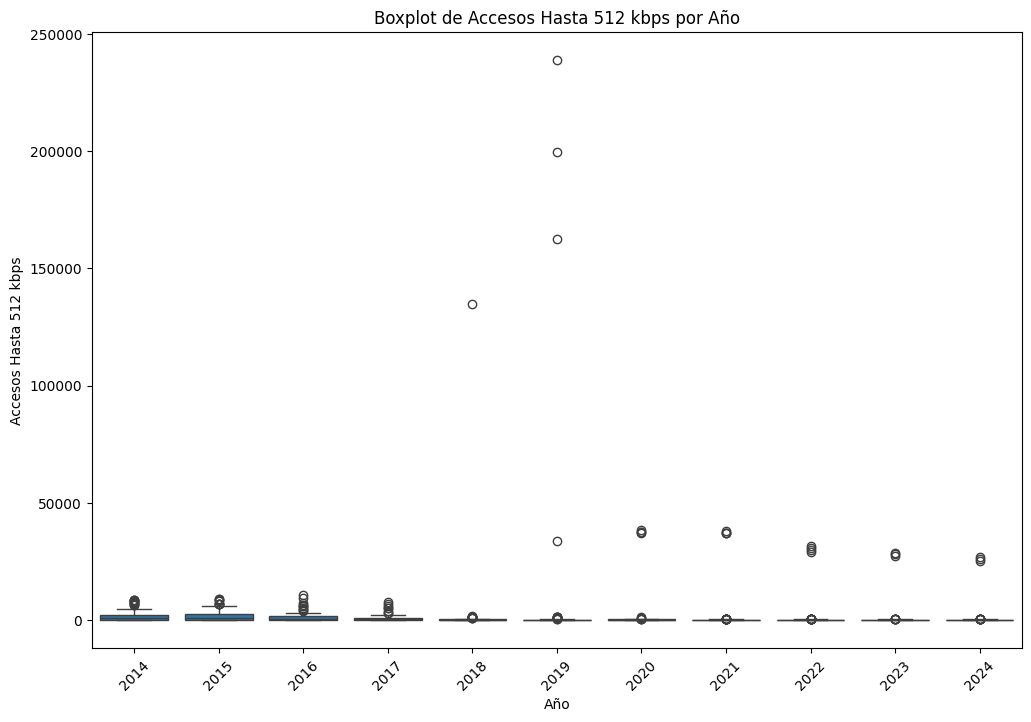

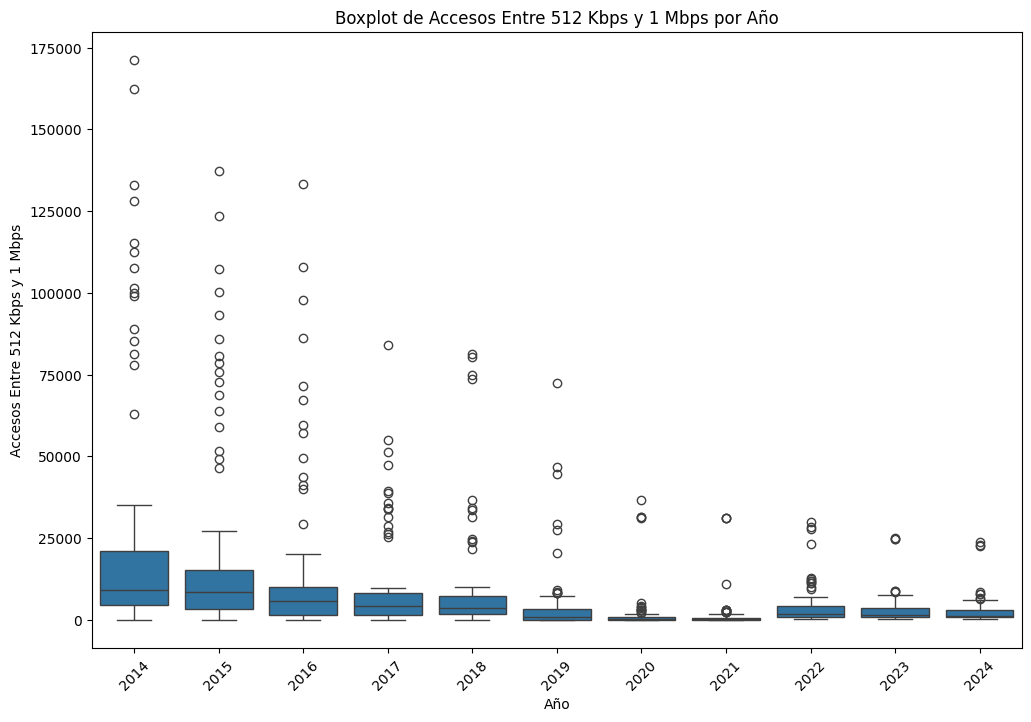

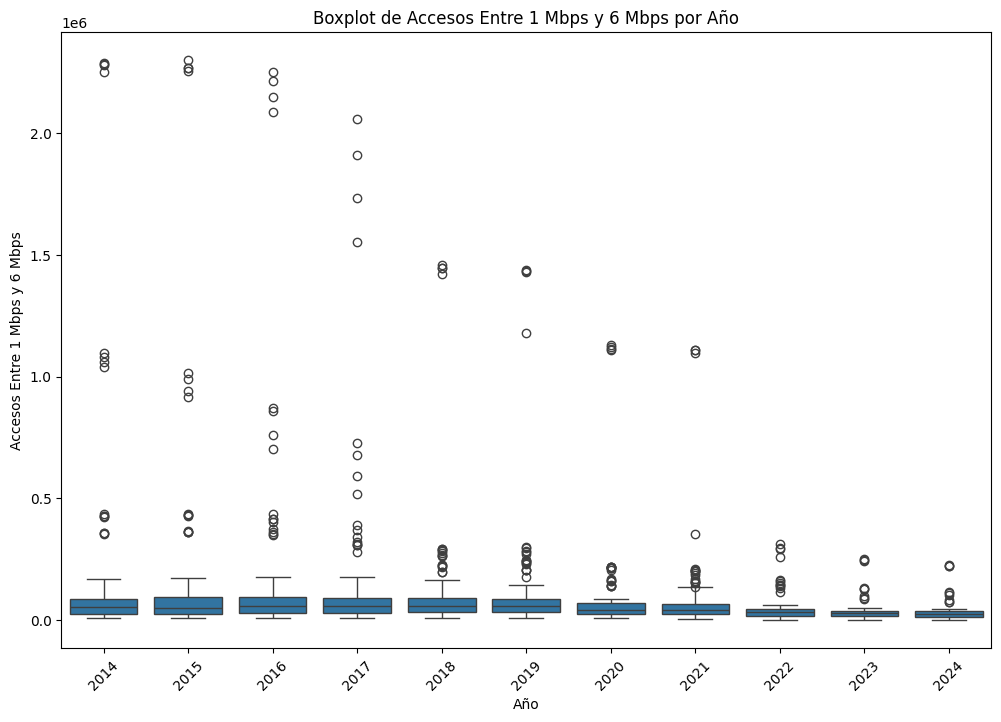

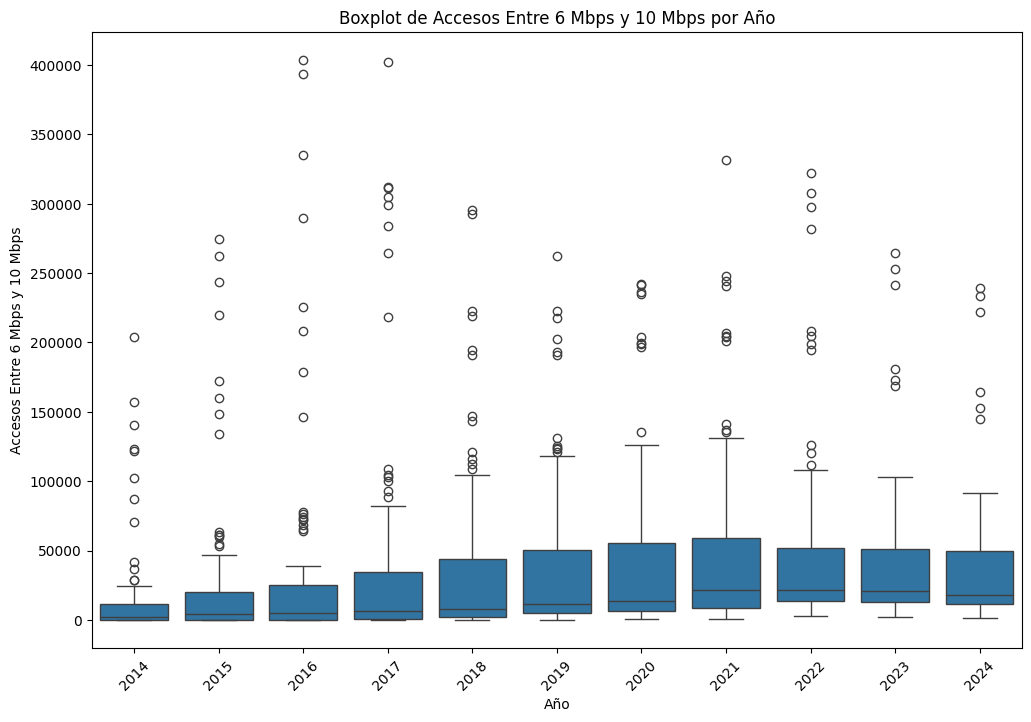

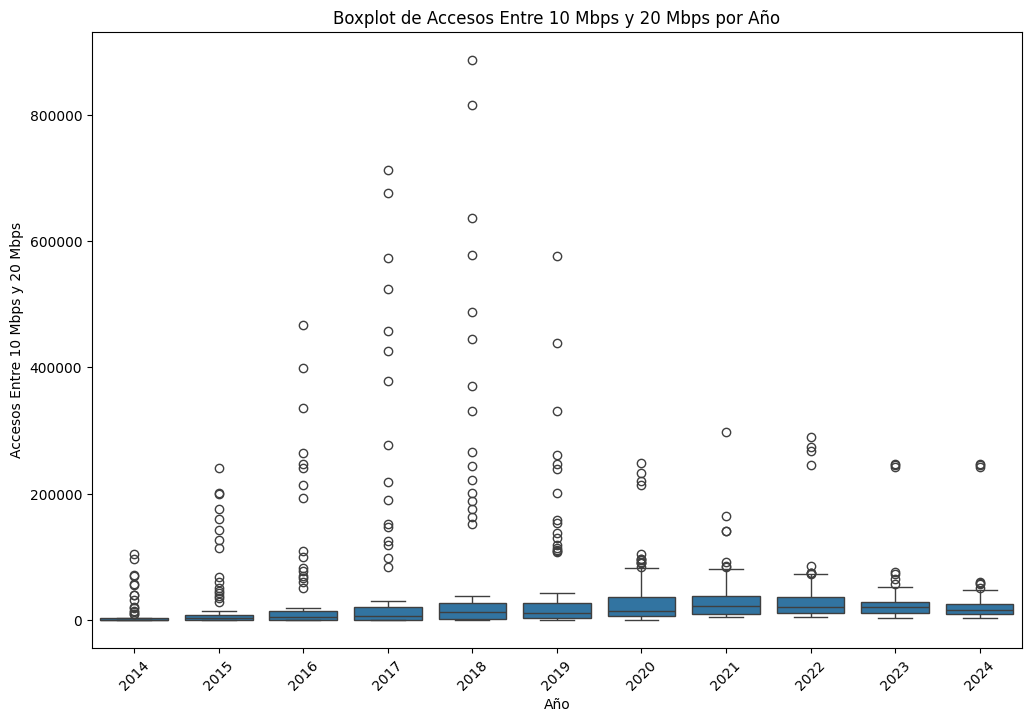

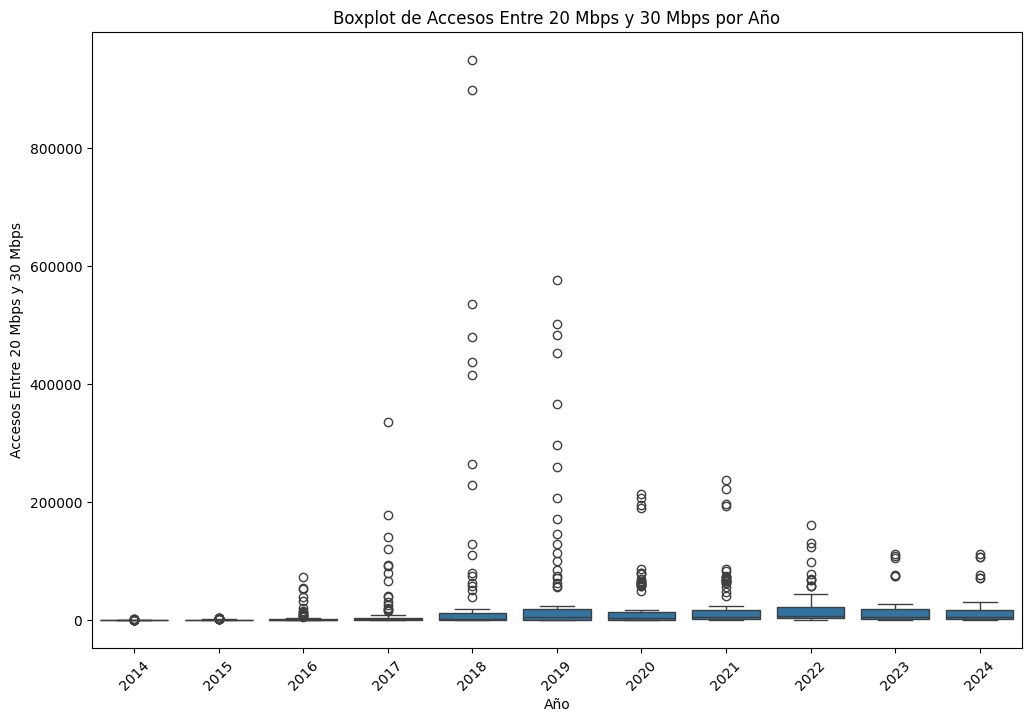

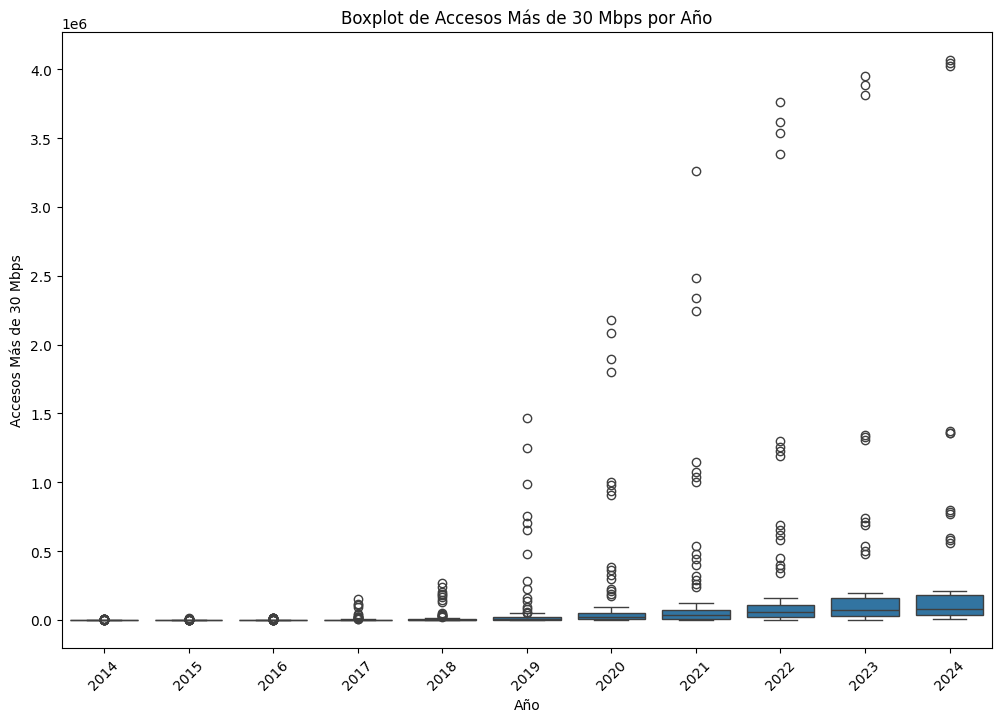

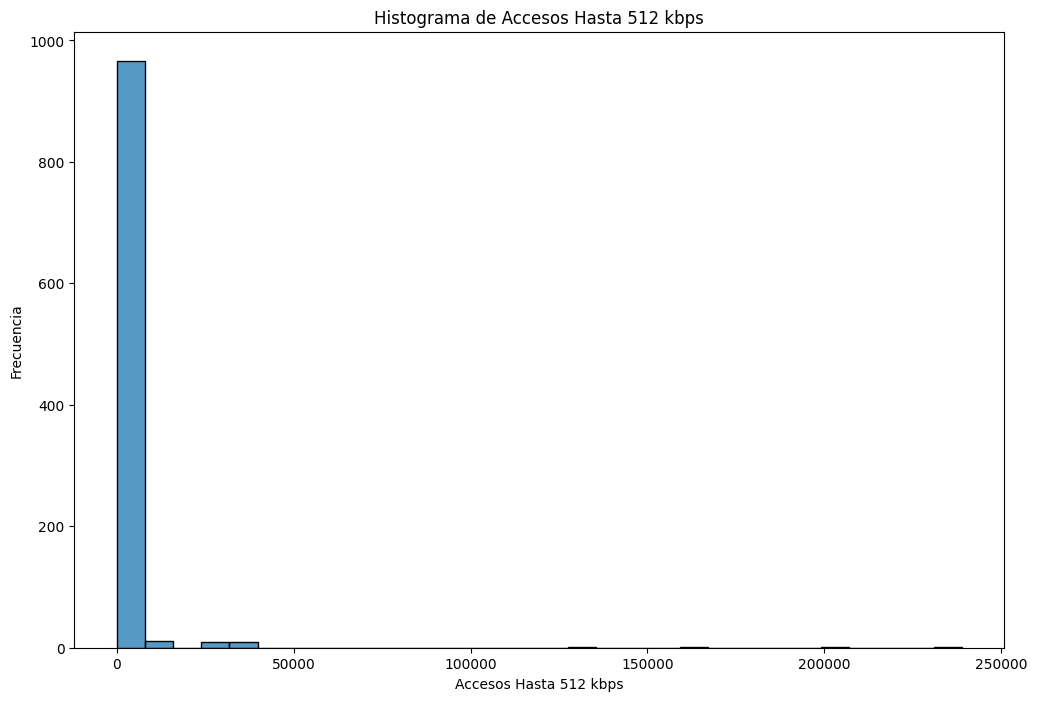

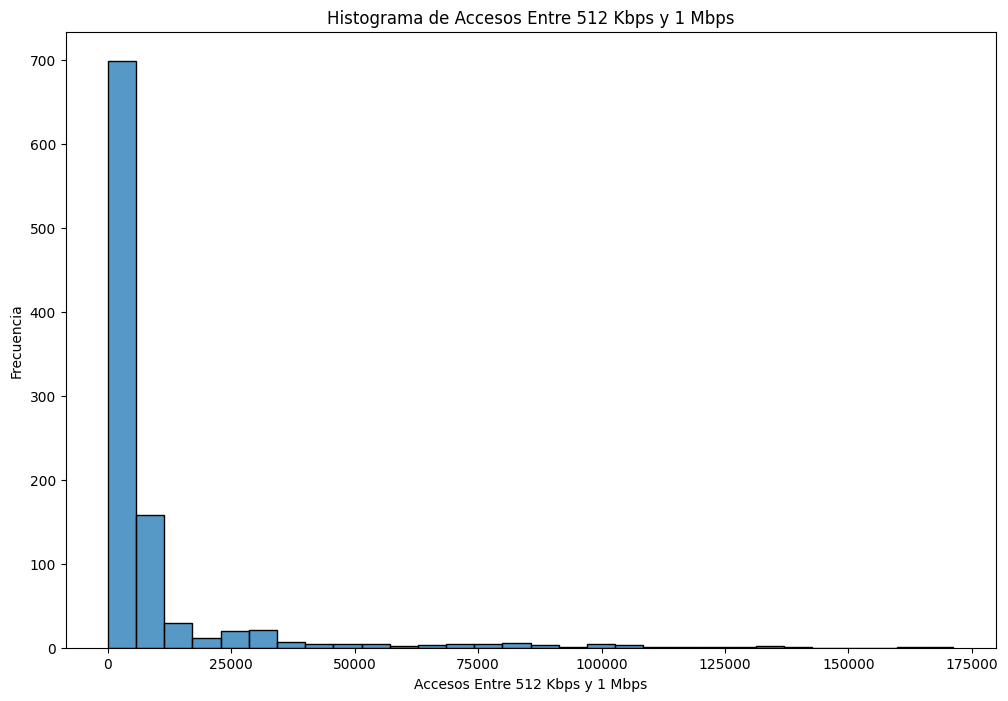

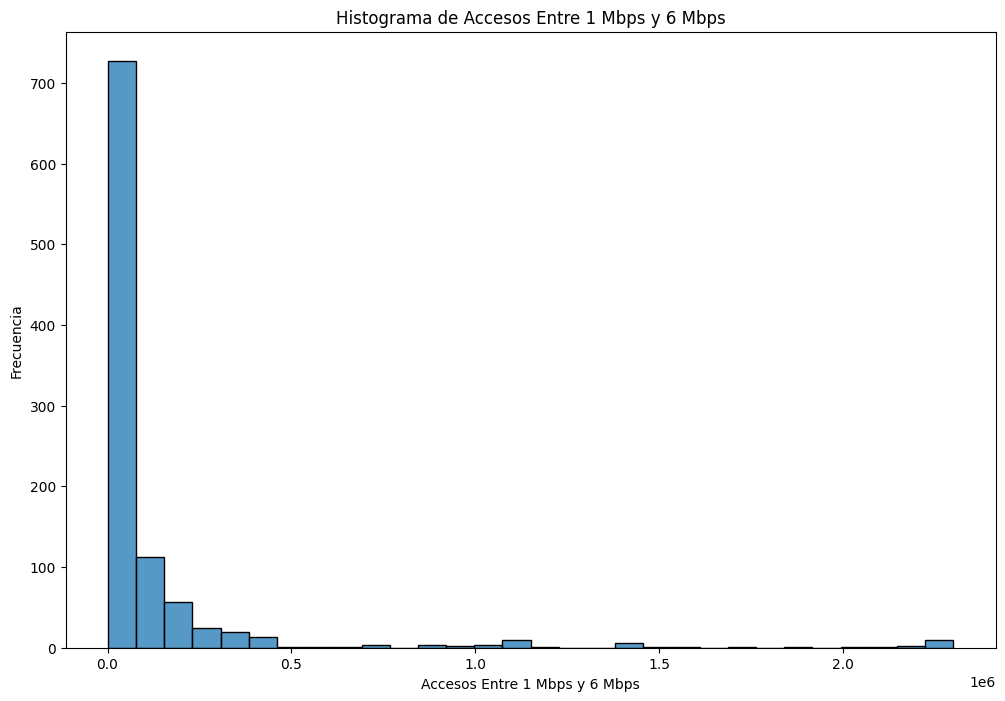

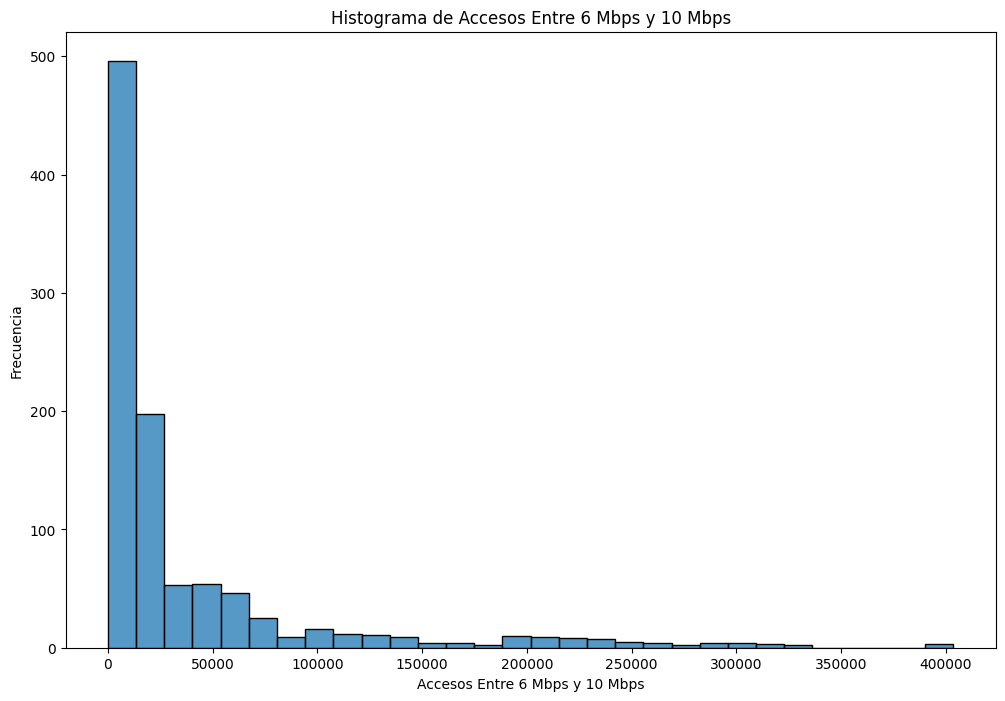

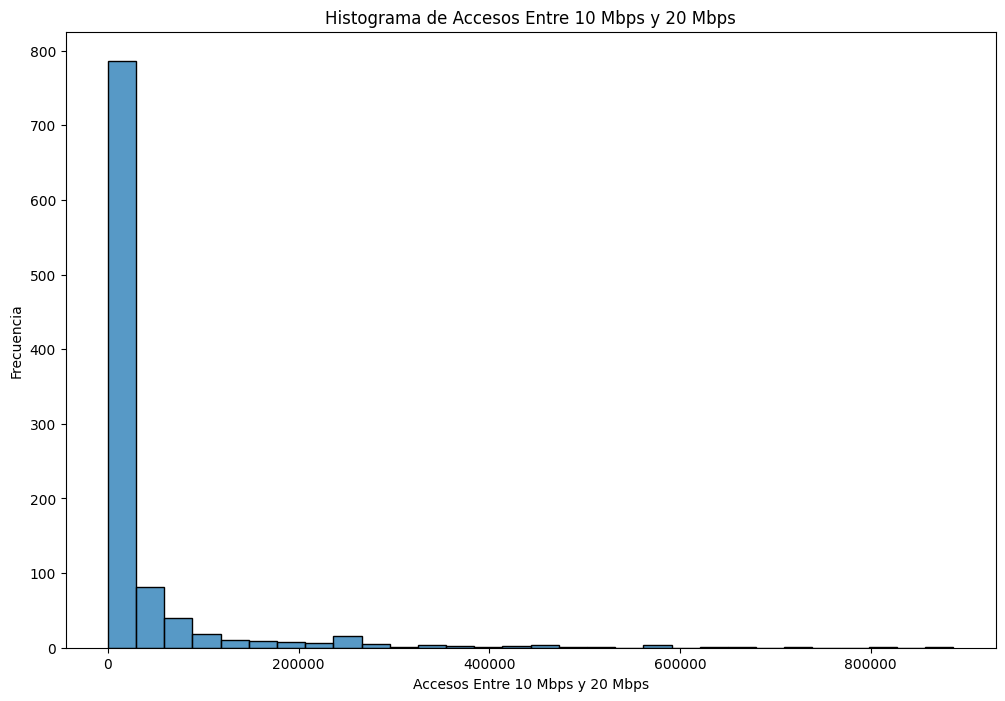

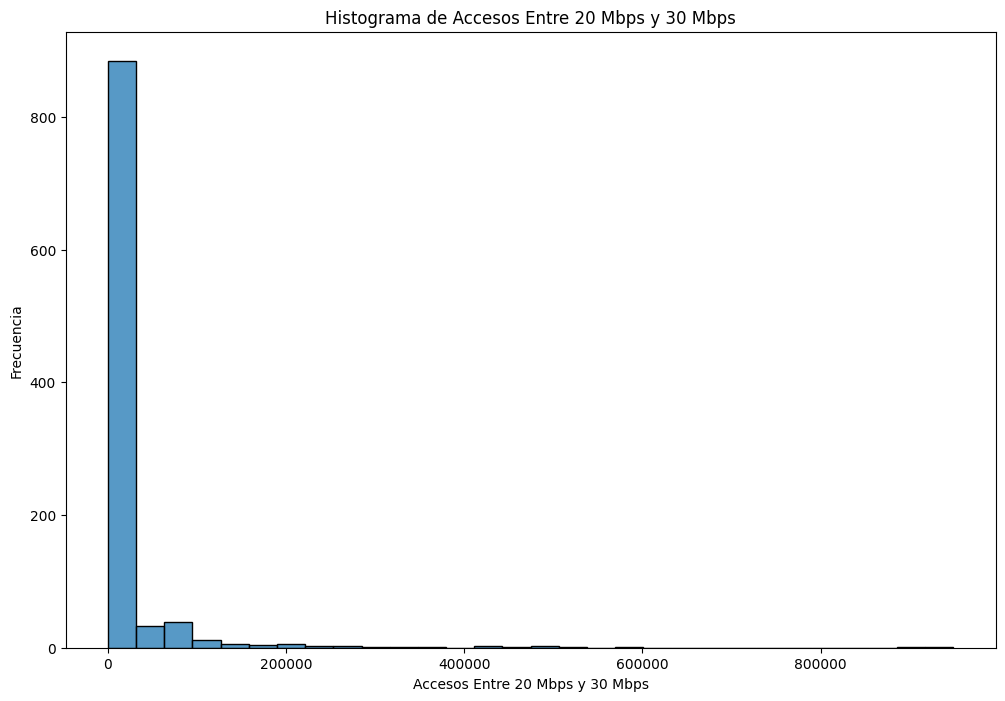

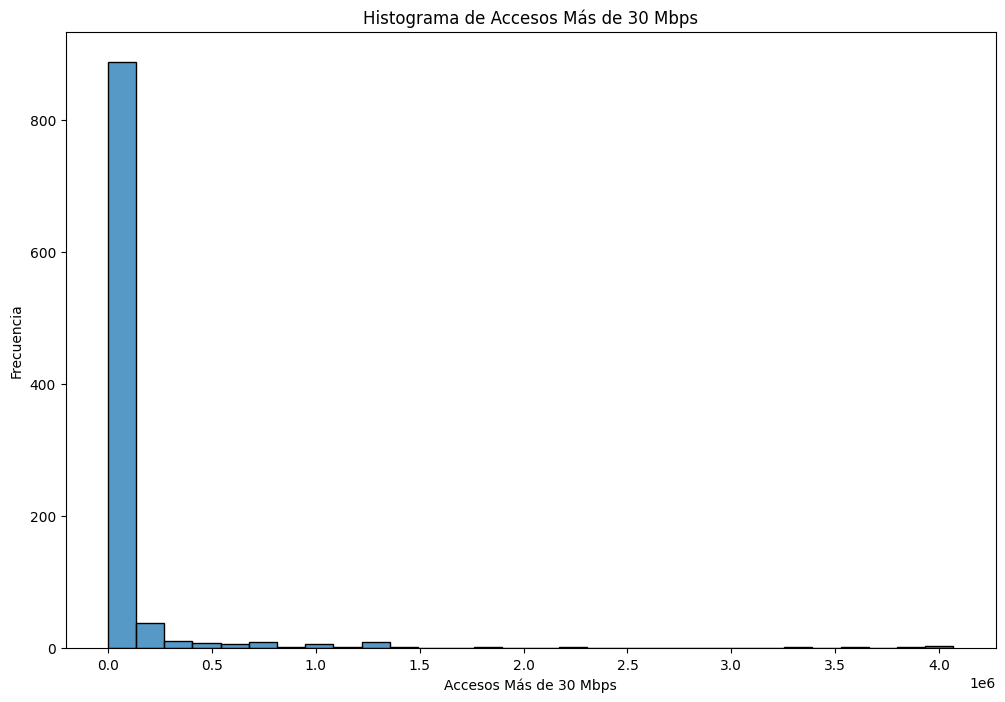

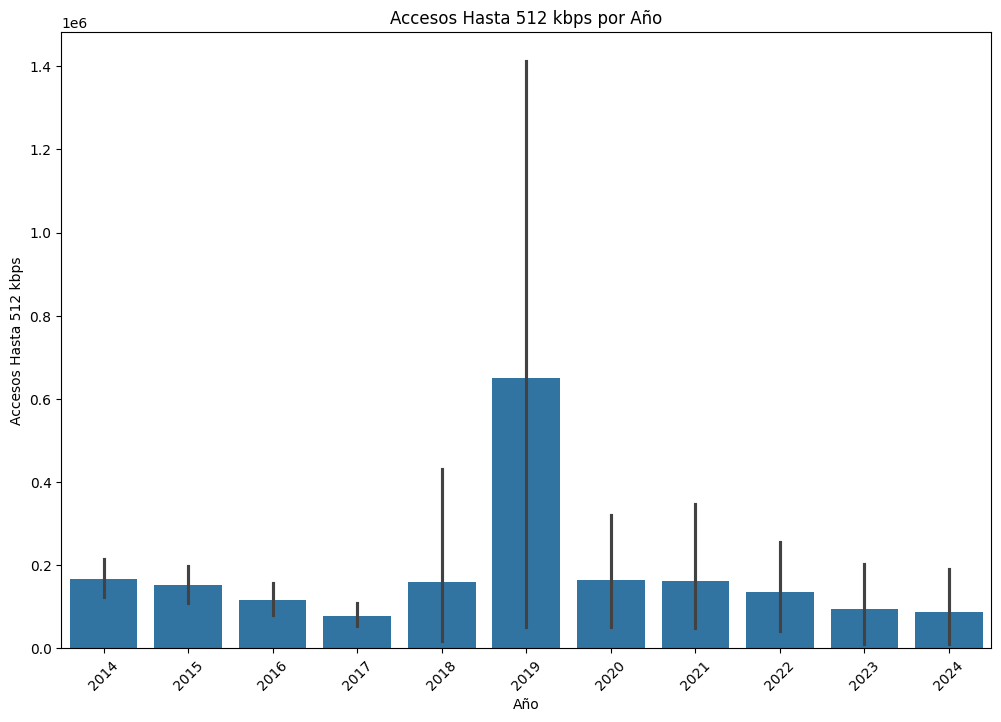

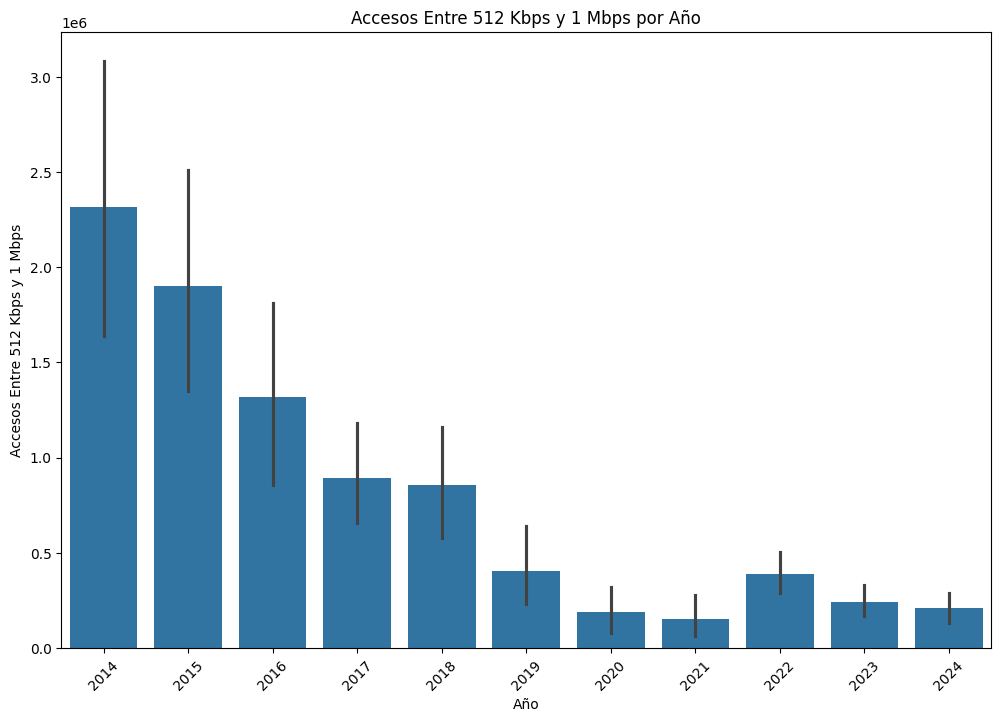

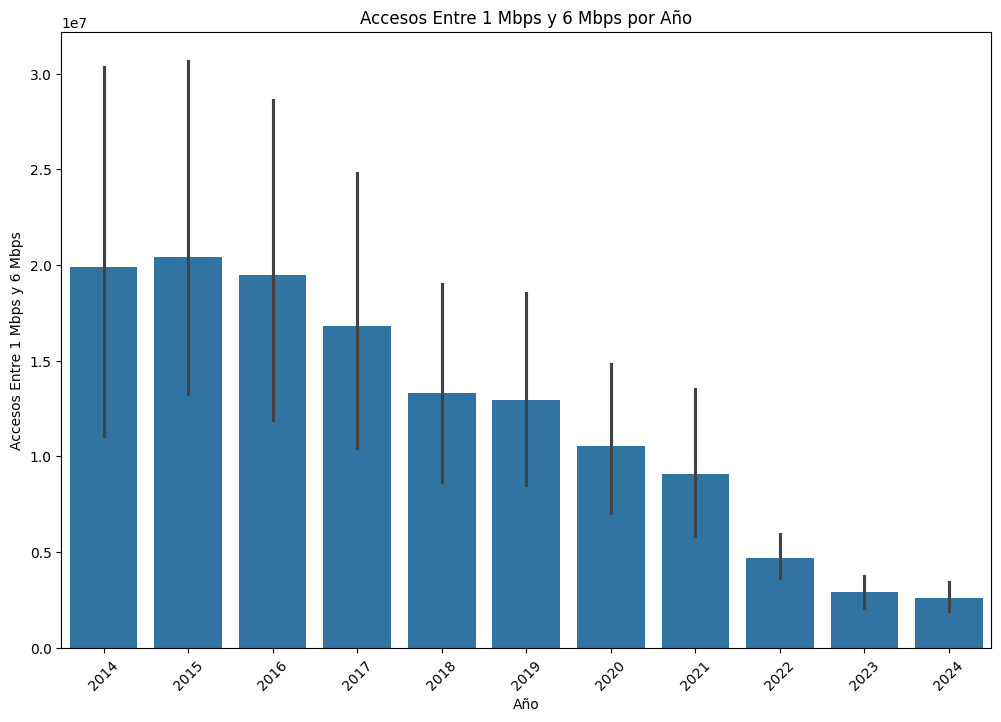

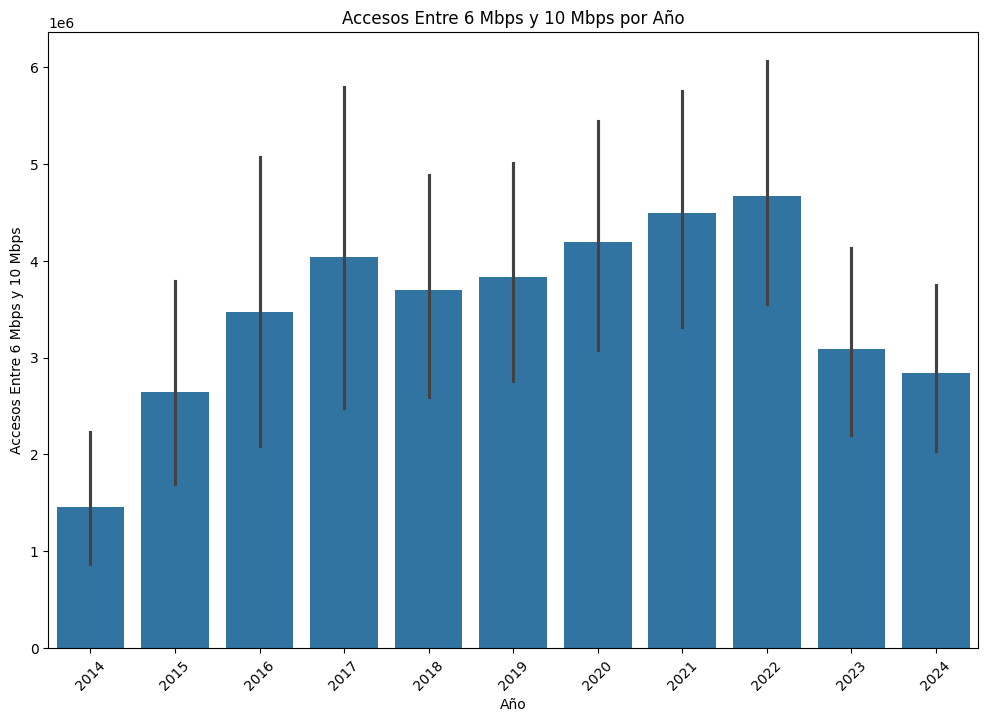

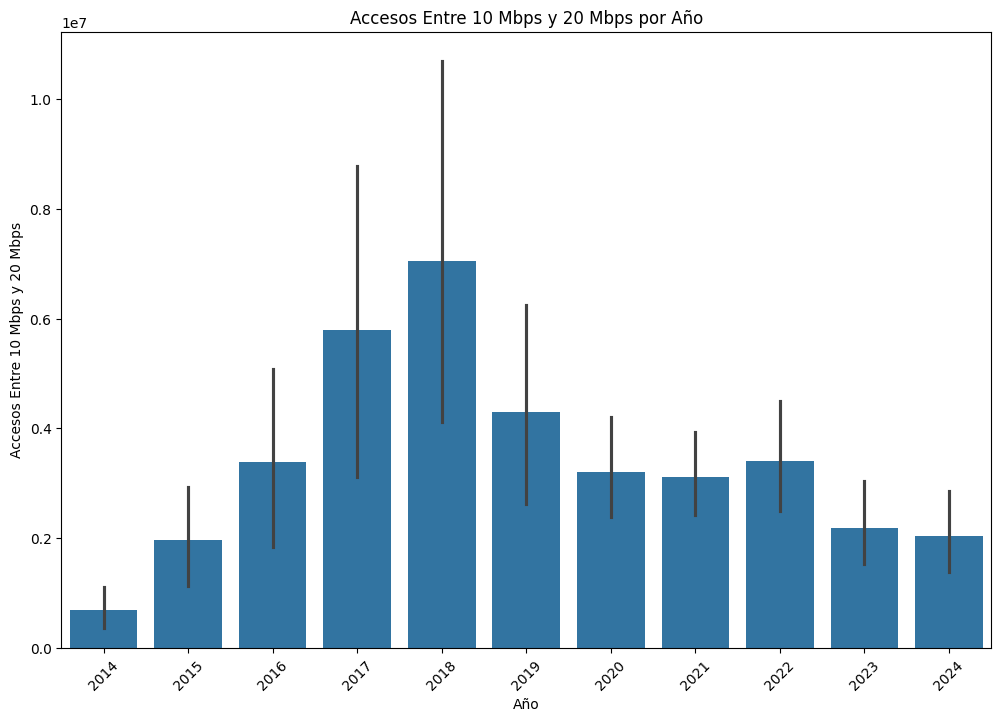

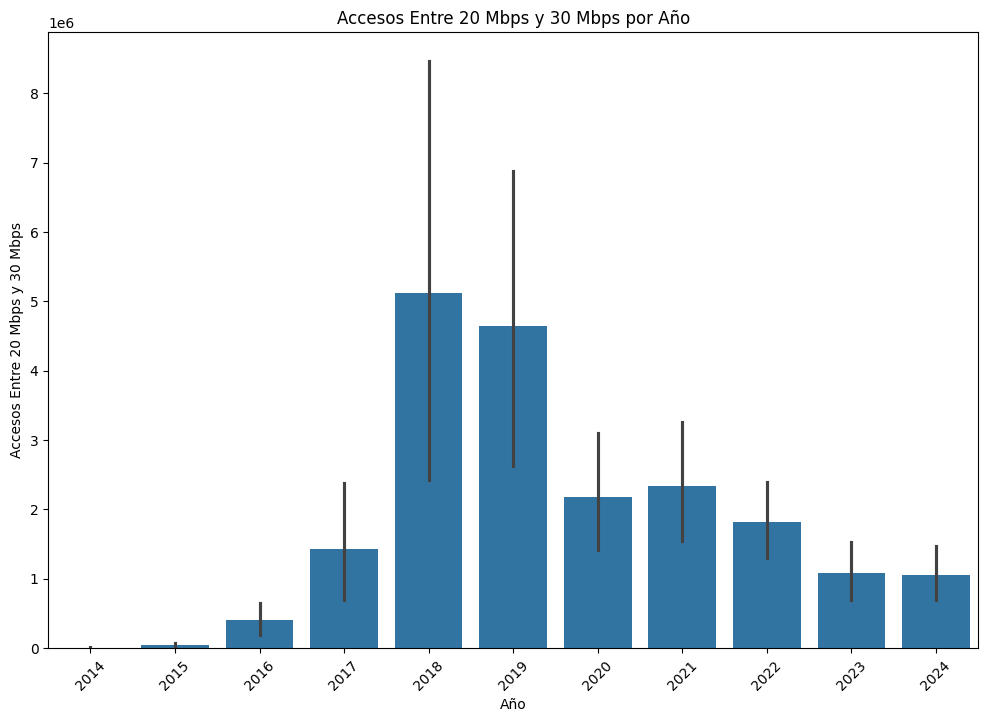

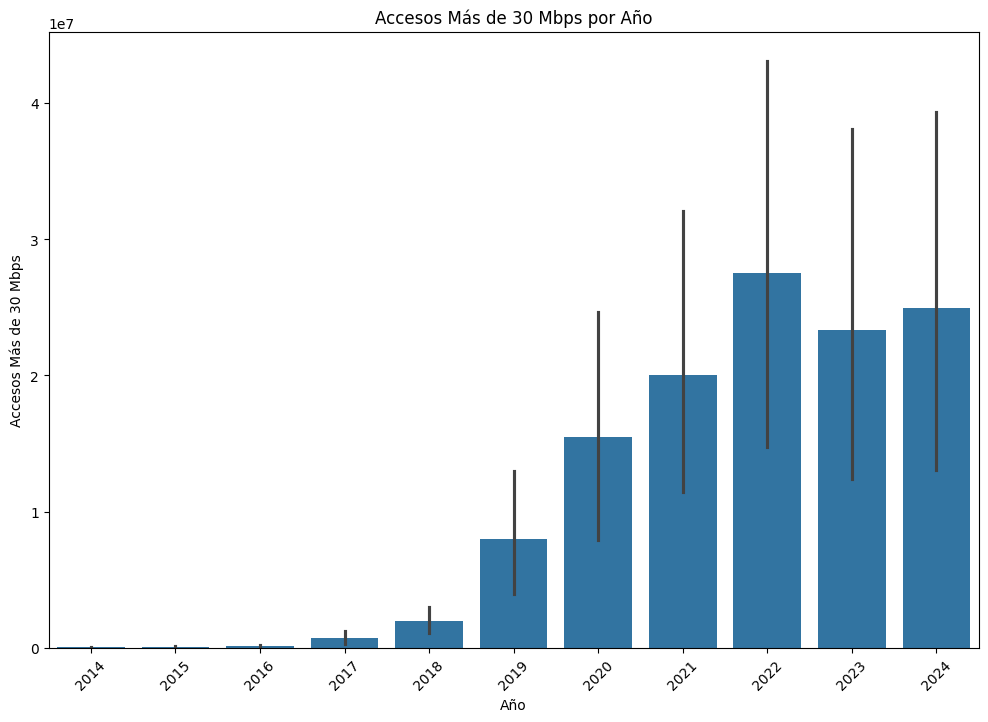

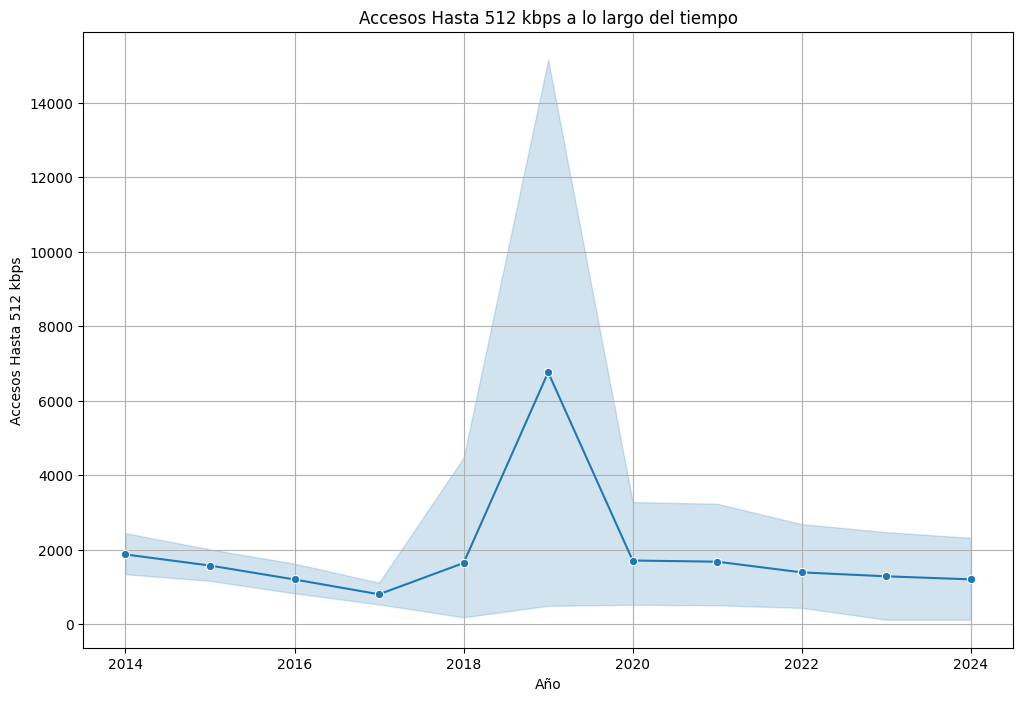

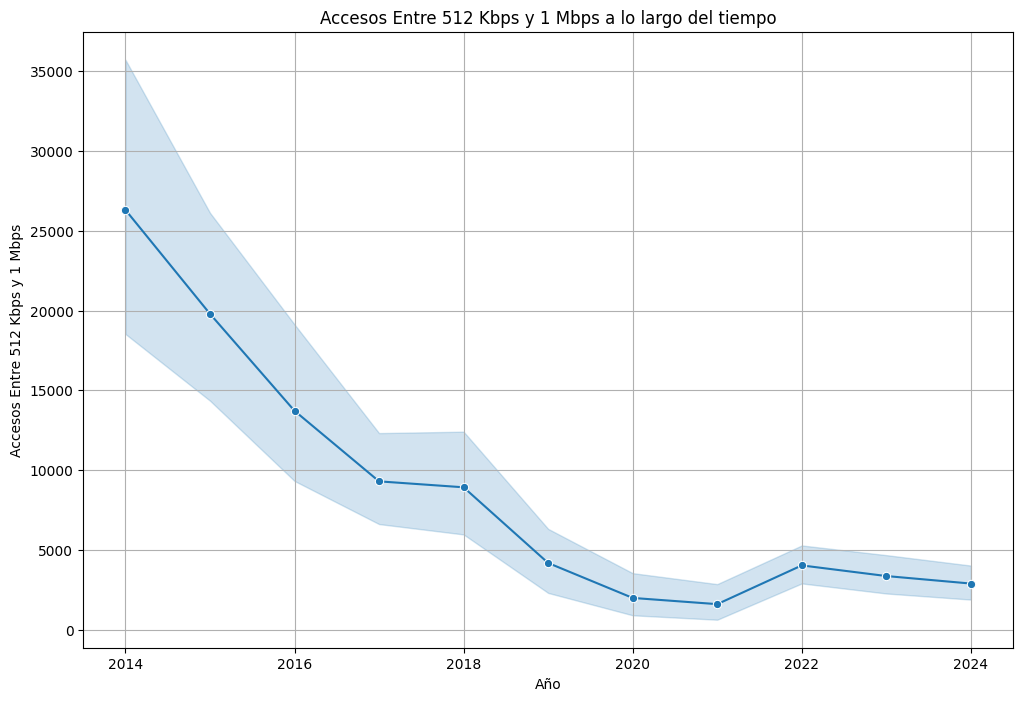

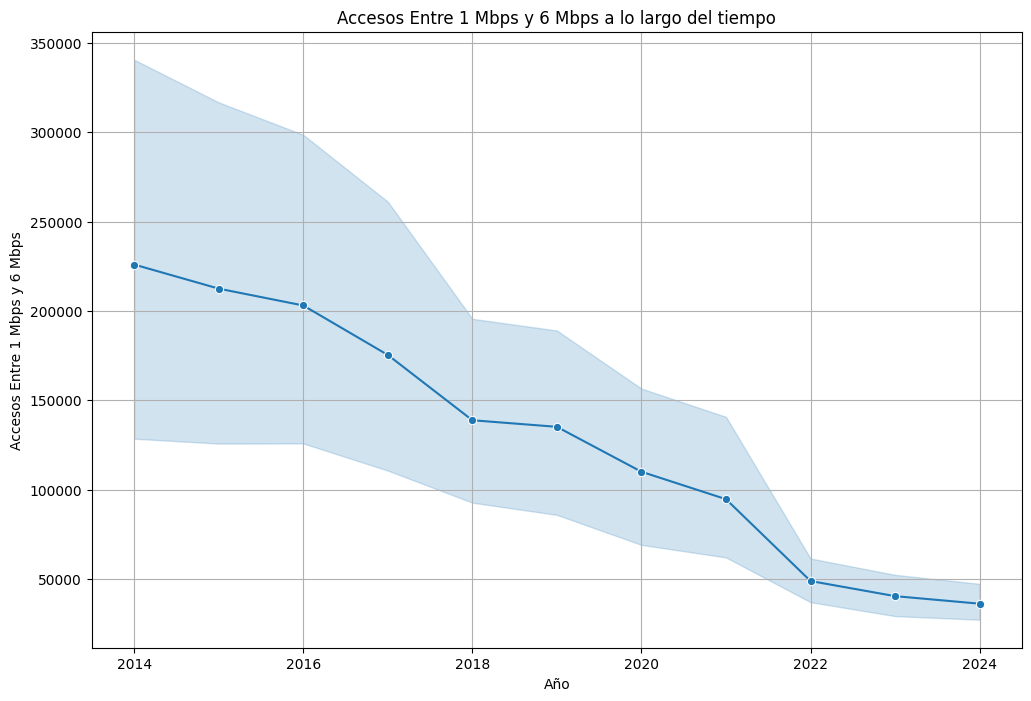

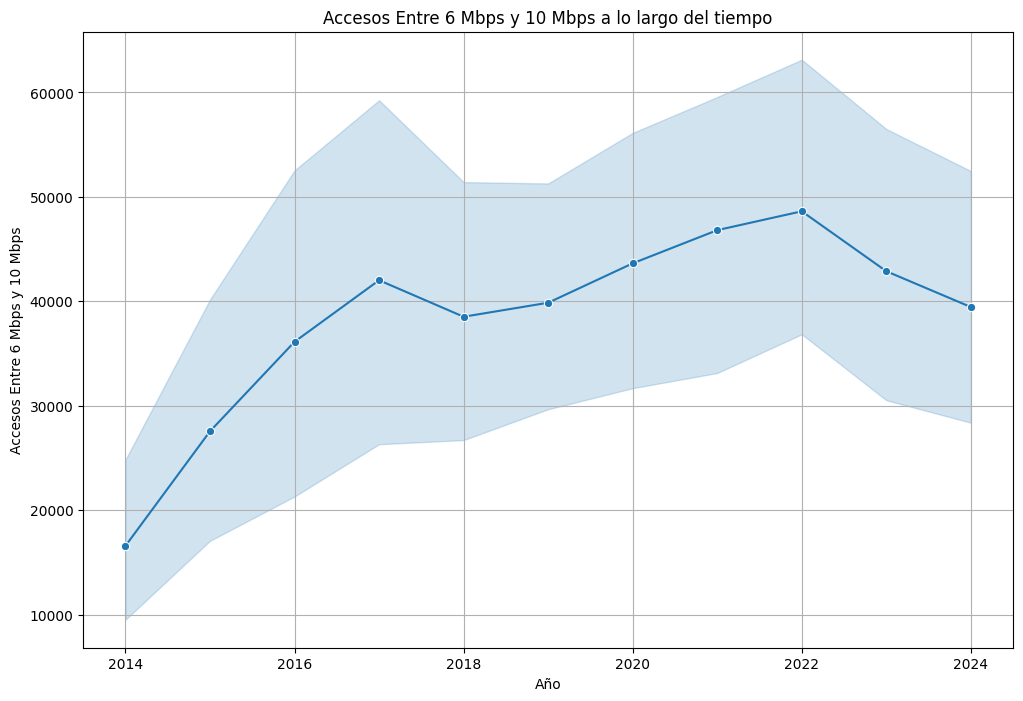

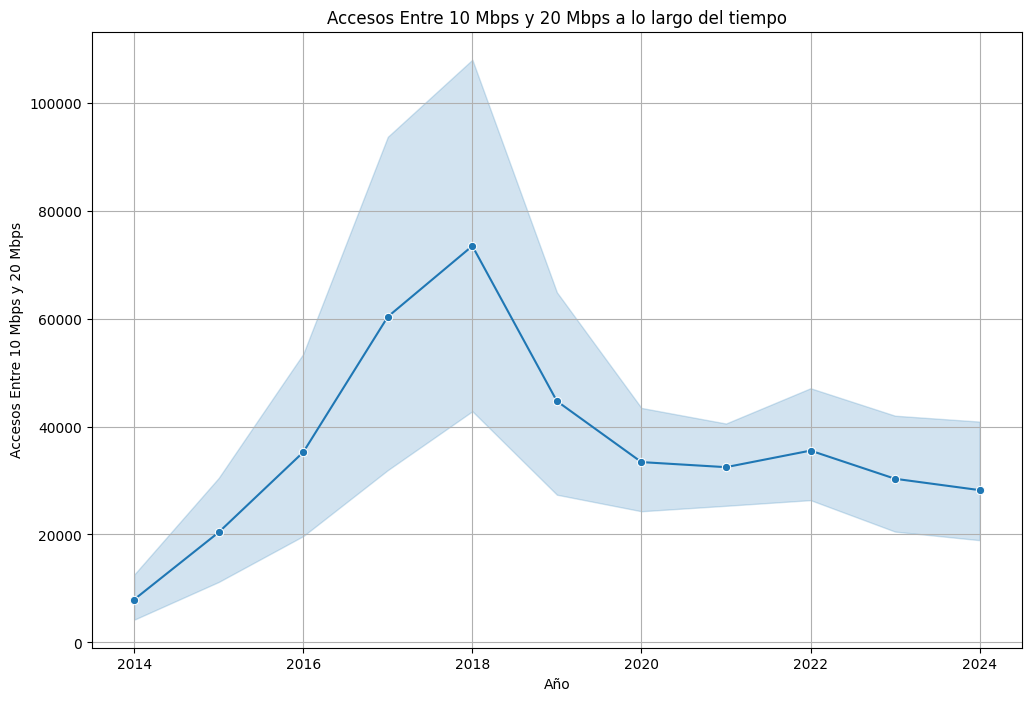

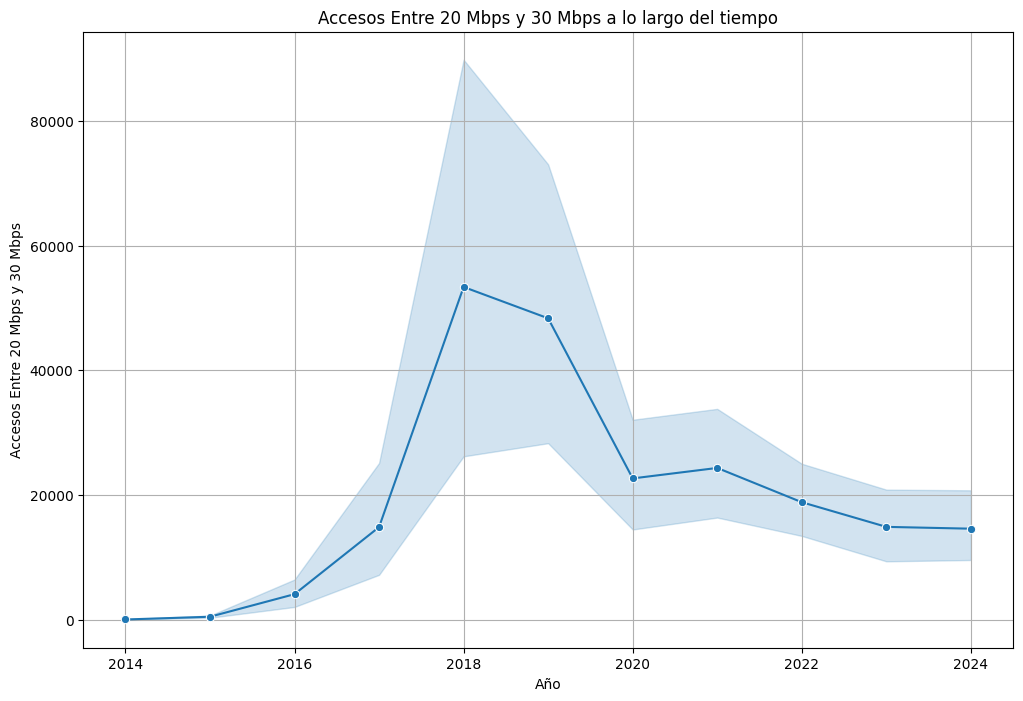

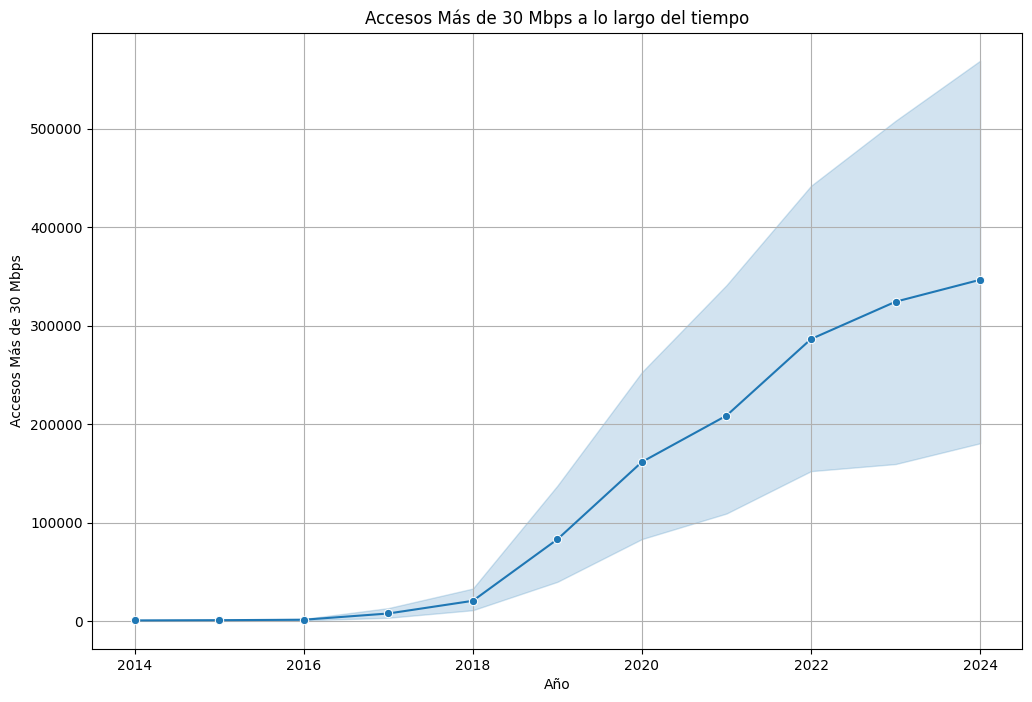

In [77]:
# Boxplot de accesos por rango de velocidad
plt.figure(figsize=(12, 8))
sns.boxplot(data=datos, x='Año', y='HASTA 512 kbps')
plt.title('Boxplot de Accesos Hasta 512 kbps por Año')
plt.xlabel('Año')
plt.ylabel('Accesos Hasta 512 kbps')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=datos, x='Año', y='+ 512 Kbps - 1 Mbps')
plt.title('Boxplot de Accesos Entre 512 Kbps y 1 Mbps por Año')
plt.xlabel('Año')
plt.ylabel('Accesos Entre 512 Kbps y 1 Mbps')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=datos, x='Año', y='+ 1 Mbps - 6 Mbps')
plt.title('Boxplot de Accesos Entre 1 Mbps y 6 Mbps por Año')
plt.xlabel('Año')
plt.ylabel('Accesos Entre 1 Mbps y 6 Mbps')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=datos, x='Año', y='+ 6 Mbps - 10 Mbps')
plt.title('Boxplot de Accesos Entre 6 Mbps y 10 Mbps por Año')
plt.xlabel('Año')
plt.ylabel('Accesos Entre 6 Mbps y 10 Mbps')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=datos, x='Año', y='+ 10 Mbps - 20 Mbps')
plt.title('Boxplot de Accesos Entre 10 Mbps y 20 Mbps por Año')
plt.xlabel('Año')
plt.ylabel('Accesos Entre 10 Mbps y 20 Mbps')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=datos, x='Año', y='+ 20 Mbps - 30 Mbps')
plt.title('Boxplot de Accesos Entre 20 Mbps y 30 Mbps por Año')
plt.xlabel('Año')
plt.ylabel('Accesos Entre 20 Mbps y 30 Mbps')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=datos, x='Año', y='+ 30 Mbps')
plt.title('Boxplot de Accesos Más de 30 Mbps por Año')
plt.xlabel('Año')
plt.ylabel('Accesos Más de 30 Mbps')
plt.xticks(rotation=45)
plt.show()

# Histograma de accesos por rango de velocidad
plt.figure(figsize=(12, 8))
sns.histplot(data=datos, x='HASTA 512 kbps', bins=30)
plt.title('Histograma de Accesos Hasta 512 kbps')
plt.xlabel('Accesos Hasta 512 kbps')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(data=datos, x='+ 512 Kbps - 1 Mbps', bins=30)
plt.title('Histograma de Accesos Entre 512 Kbps y 1 Mbps')
plt.xlabel('Accesos Entre 512 Kbps y 1 Mbps')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(data=datos, x='+ 1 Mbps - 6 Mbps', bins=30)
plt.title('Histograma de Accesos Entre 1 Mbps y 6 Mbps')
plt.xlabel('Accesos Entre 1 Mbps y 6 Mbps')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(data=datos, x='+ 6 Mbps - 10 Mbps', bins=30)
plt.title('Histograma de Accesos Entre 6 Mbps y 10 Mbps')
plt.xlabel('Accesos Entre 6 Mbps y 10 Mbps')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(data=datos, x='+ 10 Mbps - 20 Mbps', bins=30)
plt.title('Histograma de Accesos Entre 10 Mbps y 20 Mbps')
plt.xlabel('Accesos Entre 10 Mbps y 20 Mbps')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(data=datos, x='+ 20 Mbps - 30 Mbps', bins=30)
plt.title('Histograma de Accesos Entre 20 Mbps y 30 Mbps')
plt.xlabel('Accesos Entre 20 Mbps y 30 Mbps')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(data=datos, x='+ 30 Mbps', bins=30)
plt.title('Histograma de Accesos Más de 30 Mbps')
plt.xlabel('Accesos Más de 30 Mbps')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras de accesos por rango de velocidad a lo largo de los años
plt.figure(figsize=(12, 8))
sns.barplot(data=datos, x='Año', y='HASTA 512 kbps', estimator=sum)
plt.title('Accesos Hasta 512 kbps por Año')
plt.xlabel('Año')
plt.ylabel('Accesos Hasta 512 kbps')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(data=datos, x='Año', y='+ 512 Kbps - 1 Mbps', estimator=sum)
plt.title('Accesos Entre 512 Kbps y 1 Mbps por Año')
plt.xlabel('Año')
plt.ylabel('Accesos Entre 512 Kbps y 1 Mbps')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(data=datos, x='Año', y='+ 1 Mbps - 6 Mbps', estimator=sum)
plt.title('Accesos Entre 1 Mbps y 6 Mbps por Año')
plt.xlabel('Año')
plt.ylabel('Accesos Entre 1 Mbps y 6 Mbps')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(data=datos, x='Año', y='+ 6 Mbps - 10 Mbps', estimator=sum)
plt.title('Accesos Entre 6 Mbps y 10 Mbps por Año')
plt.xlabel('Año')
plt.ylabel('Accesos Entre 6 Mbps y 10 Mbps')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(data=datos, x='Año', y='+ 10 Mbps - 20 Mbps', estimator=sum)
plt.title('Accesos Entre 10 Mbps y 20 Mbps por Año')
plt.xlabel('Año')
plt.ylabel('Accesos Entre 10 Mbps y 20 Mbps')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(data=datos, x='Año', y='+ 20 Mbps - 30 Mbps', estimator=sum)
plt.title('Accesos Entre 20 Mbps y 30 Mbps por Año')
plt.xlabel('Año')
plt.ylabel('Accesos Entre 20 Mbps y 30 Mbps')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(data=datos, x='Año', y='+ 30 Mbps', estimator=sum)
plt.title('Accesos Más de 30 Mbps por Año')
plt.xlabel('Año')
plt.ylabel('Accesos Más de 30 Mbps')
plt.xticks(rotation=45)
plt.show()

# Gráfico de líneas de accesos por rango de velocidad a lo largo del tiempo
plt.figure(figsize=(12, 8))
sns.lineplot(data=datos, x='Año', y='HASTA 512 kbps', marker='o')
plt.title('Accesos Hasta 512 kbps a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Accesos Hasta 512 kbps')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
sns.lineplot(data=datos, x='Año', y='+ 512 Kbps - 1 Mbps', marker='o')
plt.title('Accesos Entre 512 Kbps y 1 Mbps a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Accesos Entre 512 Kbps y 1 Mbps')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
sns.lineplot(data=datos, x='Año', y='+ 1 Mbps - 6 Mbps', marker='o')
plt.title('Accesos Entre 1 Mbps y 6 Mbps a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Accesos Entre 1 Mbps y 6 Mbps')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
sns.lineplot(data=datos, x='Año', y='+ 6 Mbps - 10 Mbps', marker='o')
plt.title('Accesos Entre 6 Mbps y 10 Mbps a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Accesos Entre 6 Mbps y 10 Mbps')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
sns.lineplot(data=datos, x='Año', y='+ 10 Mbps - 20 Mbps', marker='o')
plt.title('Accesos Entre 10 Mbps y 20 Mbps a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Accesos Entre 10 Mbps y 20 Mbps')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
sns.lineplot(data=datos, x='Año', y='+ 20 Mbps - 30 Mbps', marker='o')
plt.title('Accesos Entre 20 Mbps y 30 Mbps a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Accesos Entre 20 Mbps y 30 Mbps')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
sns.lineplot(data=datos, x='Año', y='+ 30 Mbps', marker='o')
plt.title('Accesos Más de 30 Mbps a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Accesos Más de 30 Mbps')
plt.grid(True)
plt.show()

##### Conclusión de la hoja "Accesos por rangos":

1. **Estadísticas descriptivas**:
    - Las estadísticas descriptivas muestran la distribución de los accesos por diferentes rangos de velocidad a lo largo de los años. Se observa una amplia variabilidad en los accesos, con algunos rangos de velocidad teniendo un número significativamente mayor de accesos que otros.

2. **Boxplot**:
    - Los boxplots muestran la distribución de los accesos por diferentes rangos de velocidad a lo largo de los años. Podemos observar la presencia de outliers en los accesos, especialmente en los valores más altos.

3. **Histogramas**:
    - Los histogramas de los accesos muestran una distribución variada para cada rango de velocidad. Algunos rangos tienen una distribución sesgada hacia la izquierda, indicando que la mayoría de los accesos son bajos, mientras que otros rangos tienen una distribución más uniforme.

4. **Gráficos de barras**:
    - Los gráficos de barras muestran la evolución de los accesos por diferentes rangos de velocidad a lo largo de los años. Podemos observar tendencias crecientes en algunos rangos de velocidad, mientras que otros rangos muestran una tendencia decreciente.

5. **Gráficos de líneas**:
    - Los gráficos de líneas muestran la evolución de los accesos por diferentes rangos de velocidad a lo largo del tiempo. Podemos observar tendencias crecientes en algunos rangos de velocidad, mientras que otros muestran una tendencia más estable.

En resumen, los datos de la hoja "Accesos por rangos" indican que hay una variabilidad considerable en los accesos por diferentes rangos de velocidad a lo largo de los años. Algunos rangos de velocidad muestran tendencias crecientes, mientras que otros muestran tendencias decrecientes. Además, existen outliers significativos en los accesos, especialmente en los valores más altos.

In [78]:
hojas["Accesos por rangos"] = datos

# Hoja 13: Dial-BAf

In [79]:
datos=hojas["Dial-BAf"]
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               1992 non-null   int64  
 1   Trimestre         1992 non-null   int64  
 2   Provincia         1992 non-null   object 
 3   Banda ancha fija  1992 non-null   int64  
 4   Dial up           1988 non-null   float64
 5   Total             1992 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 93.5+ KB


Revisamos que las columnas que utilizaremos tengan el tipo correcto, al ser correctas, continuamos con el EDA

In [80]:
datos = realizar_eda("Dial-BAf", datos)

Análisis de la hoja: Dial-BAf
Valores faltantes:
Año                 0
Trimestre           0
Provincia           0
Banda ancha fija    0
Dial up             4
Total               0
dtype: int64
Registros duplicados:
984
Estadísticas descriptivas:
               Año    Trimestre  Banda ancha fija       Dial up         Total
count  1992.000000  1992.000000      1.992000e+03   1988.000000  1.992000e+03
mean   2018.698795     2.457831      3.650542e+05    902.104125  3.659545e+05
std       3.001697     1.122899      7.858852e+05   2281.691033  7.876088e+05
min    2014.000000     1.000000      1.219300e+04      0.000000  1.255700e+04
25%    2016.000000     1.000000      6.183400e+04      5.000000  6.223600e+04
50%    2019.000000     2.000000      1.123150e+05    137.000000  1.136630e+05
75%    2021.000000     3.000000      1.954710e+05    615.000000  1.954710e+05
max    2024.000000     4.000000      5.038657e+06  15229.000000  5.044557e+06


Como tenemos valores faltantes y duplicados, lo revisamos antes de continuar

Completamos los valores faltantes con 0

In [81]:
datos["Dial up"] = datos["Dial up"].fillna(0)

Revisamos los valores duplicados

In [82]:
duplicados = datos[datos.duplicated()]
duplicados

Año  Trimestre            Provincia  Banda ancha fija  Dial up    Total
1008  2024          1         Buenos Aires           5038657   5900.0  5044557
1009  2024          1      Capital Federal           1502661   2050.0  1504711
1010  2024          1            Catamarca             74932      1.0    74933
1011  2024          1                Chaco            155538      5.0   155543
1012  2024          1               Chubut            169819    857.0   170676
...    ...        ...                  ...               ...      ...      ...
1987  2014          1           Santa Cruz             26304    460.0    26764
1988  2014          1             Santa Fe            506000    612.0   506612
1989  2014          1  Santiago Del Estero             37124      9.0    37133
1990  2014          1     Tierra Del Fuego             27272    766.0    28038
1991  2014          1              Tucumán            129944     88.0   130032

[984 rows x 6 columns]

Procedemos a eliminar los registros duplicados

In [83]:
datos.drop_duplicates(inplace=True)

In [84]:
datos[datos.duplicated()].sum()

Año                   0
Trimestre             0
Provincia             0
Banda ancha fija      0
Dial up             0.0
Total                 0
dtype: object

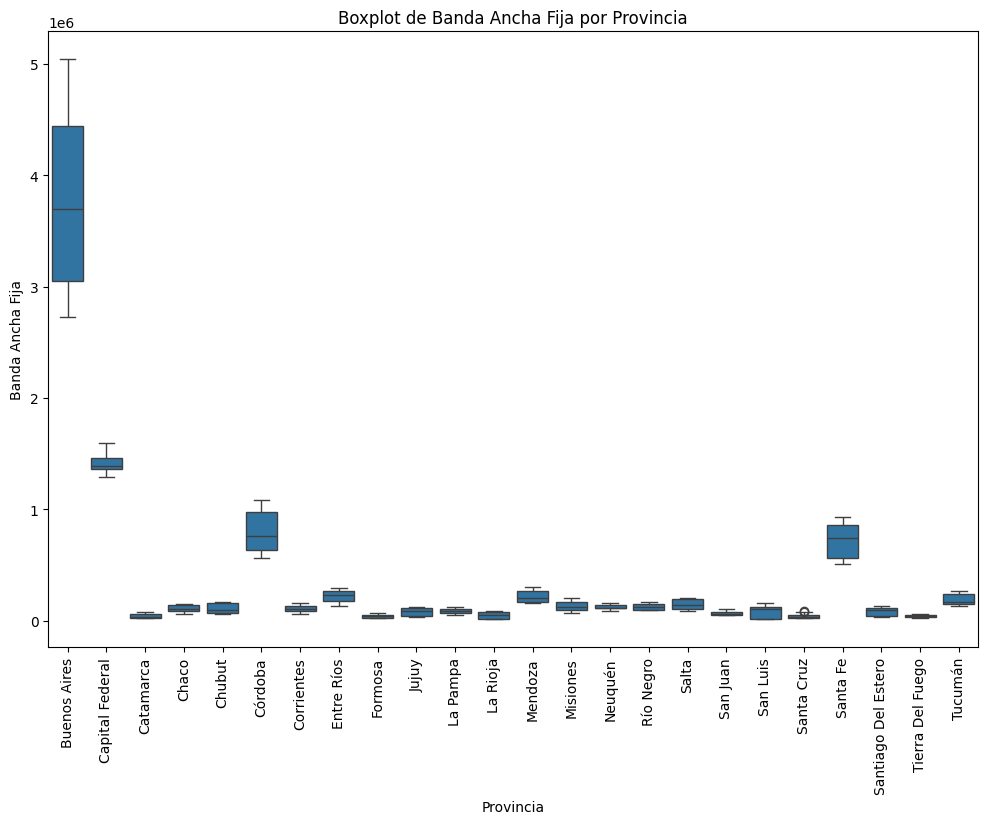

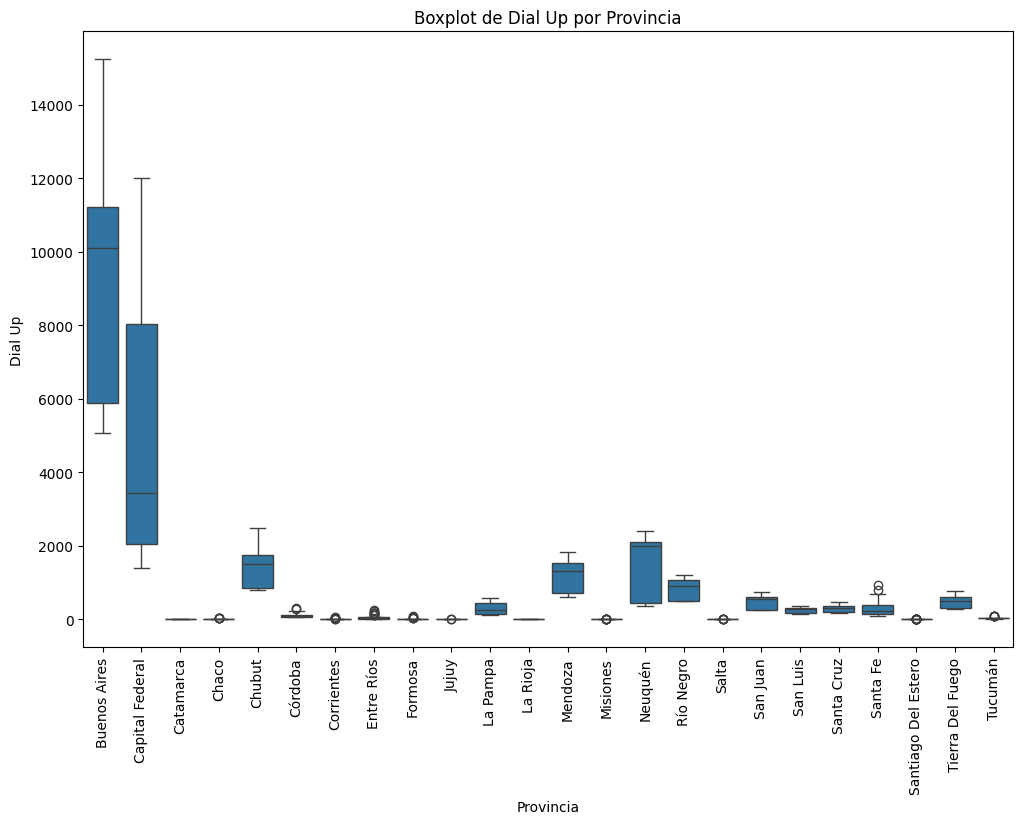

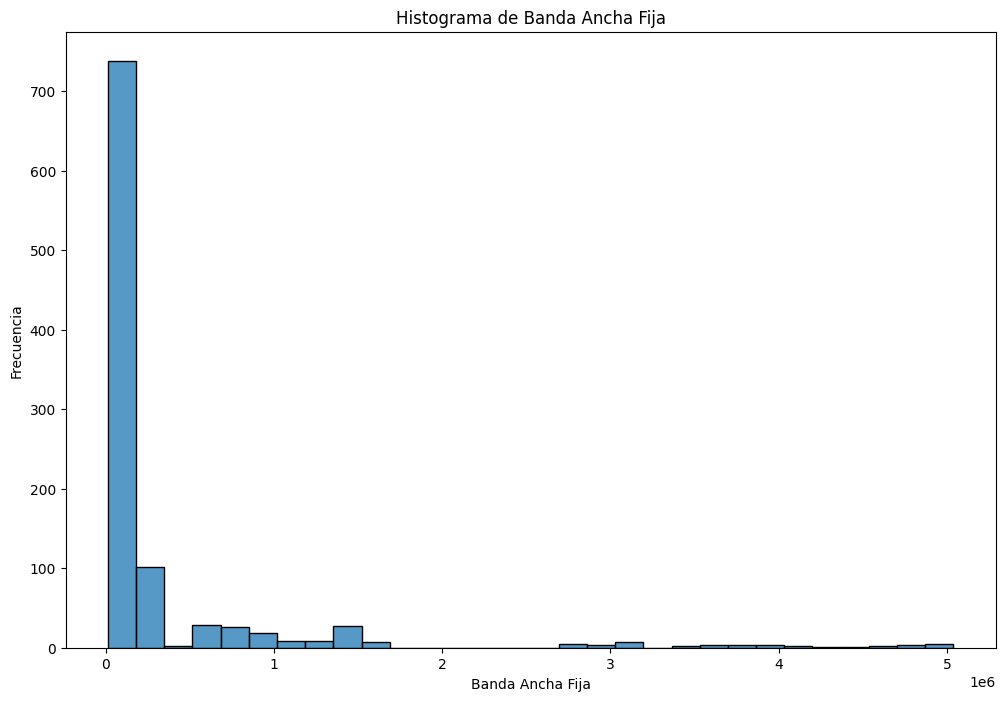

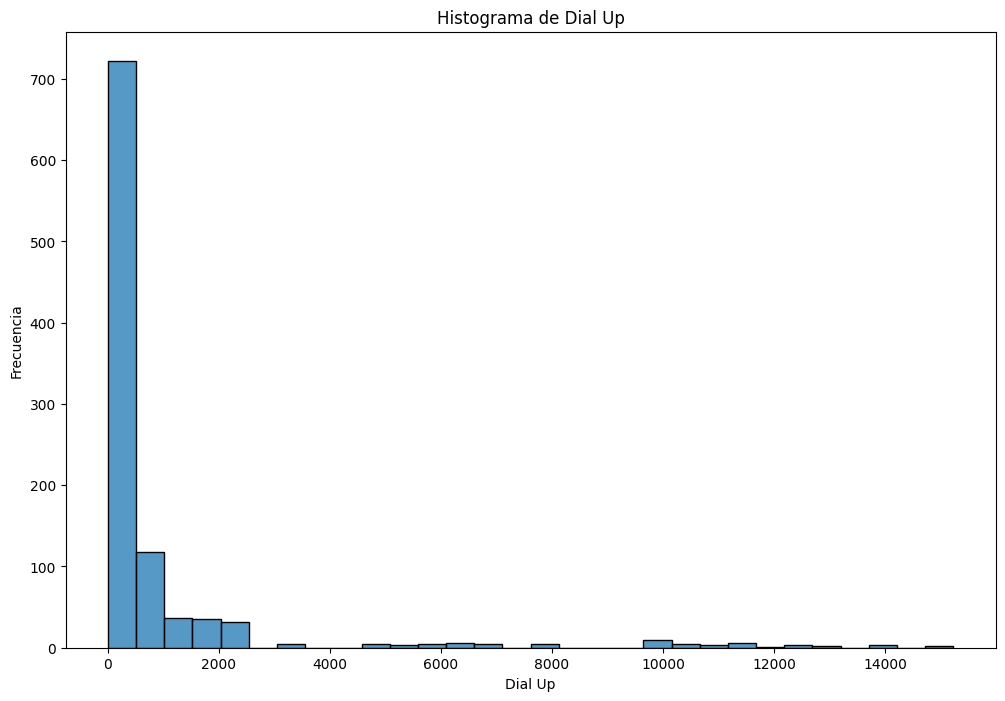

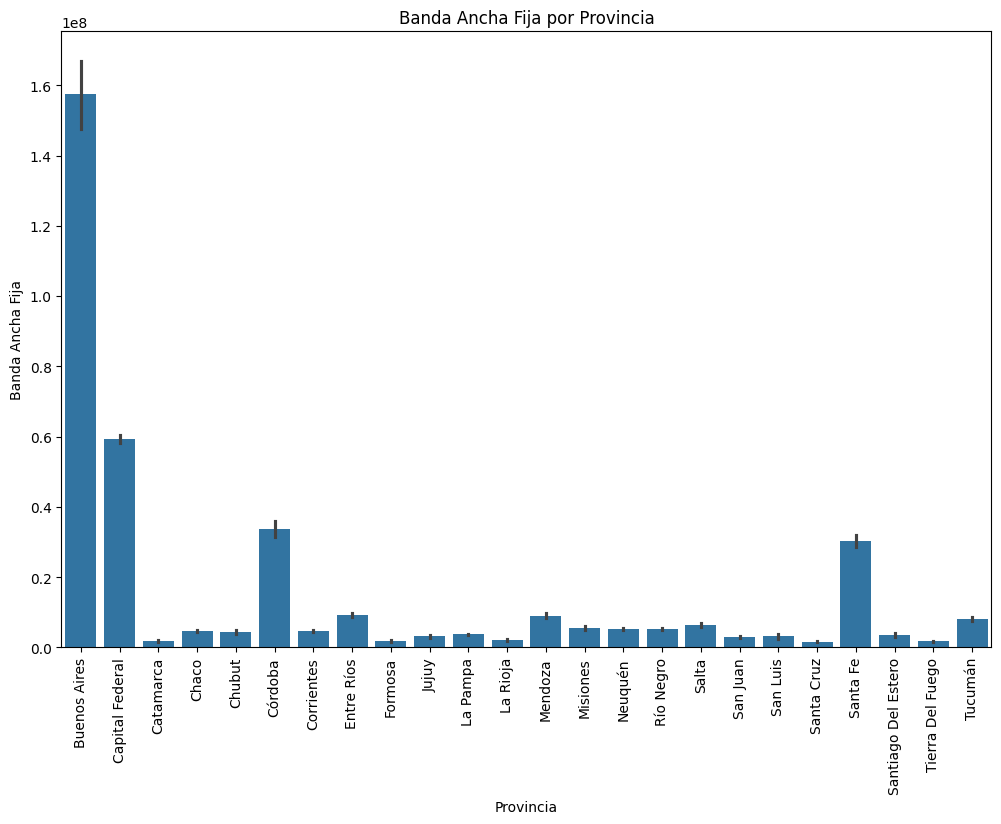

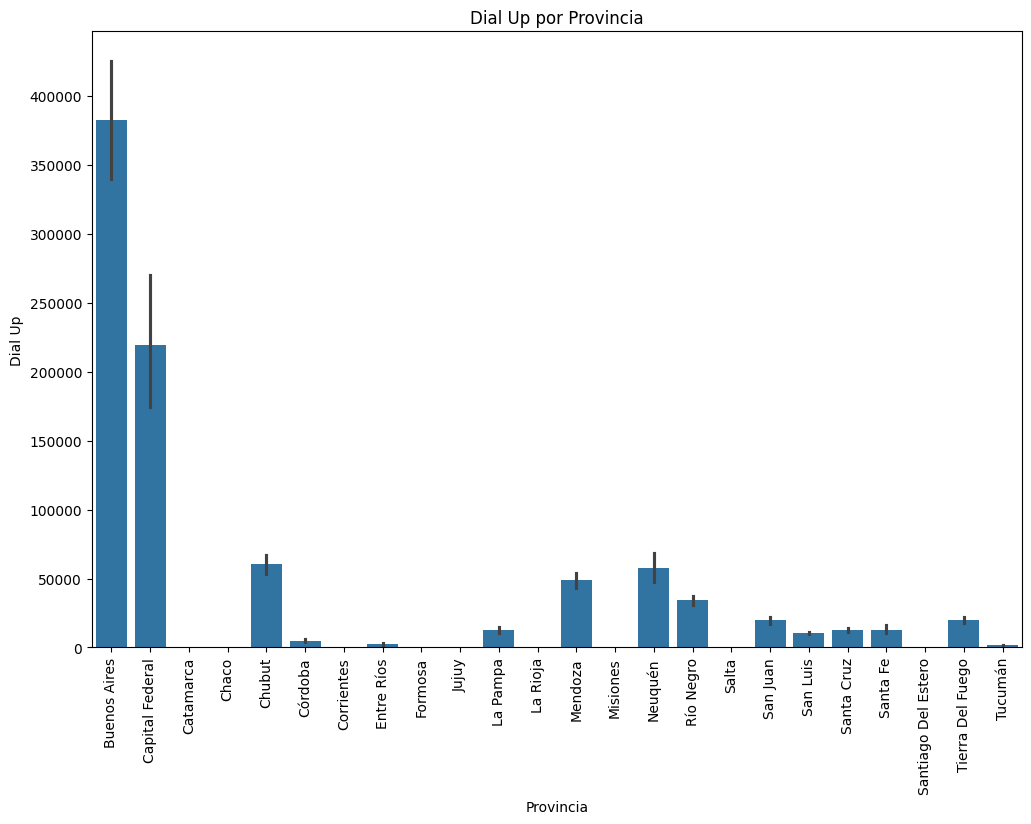

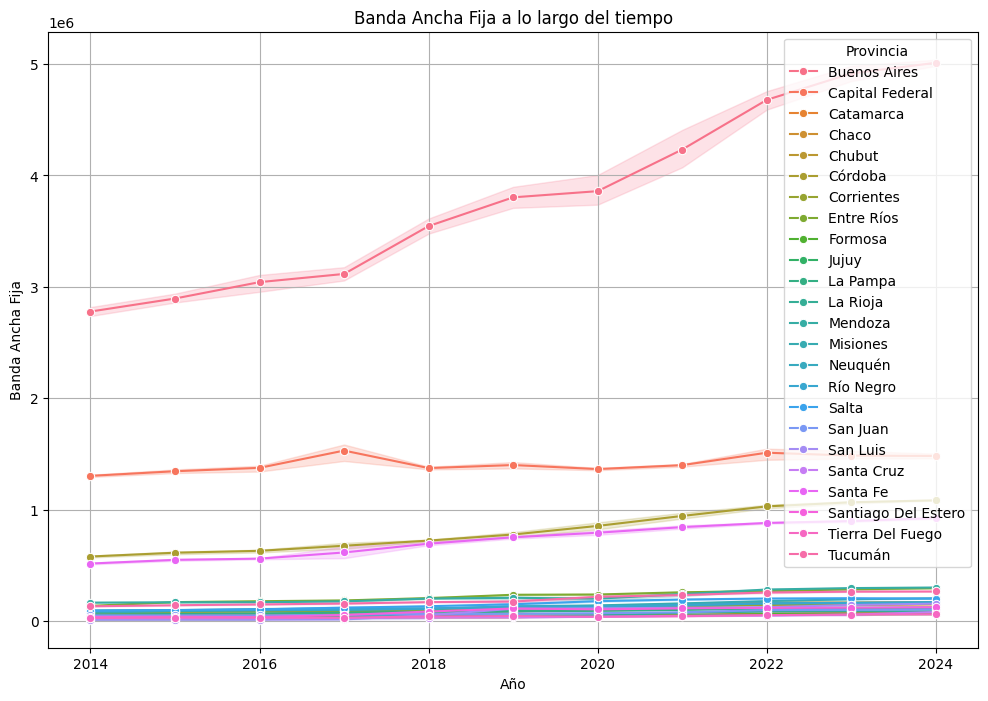

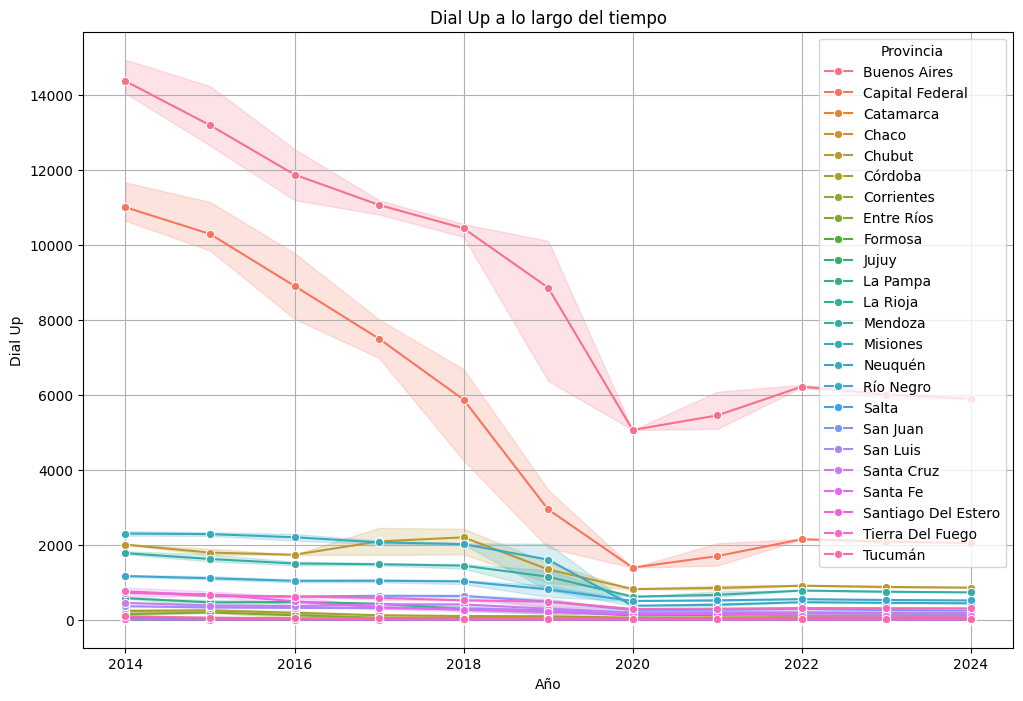

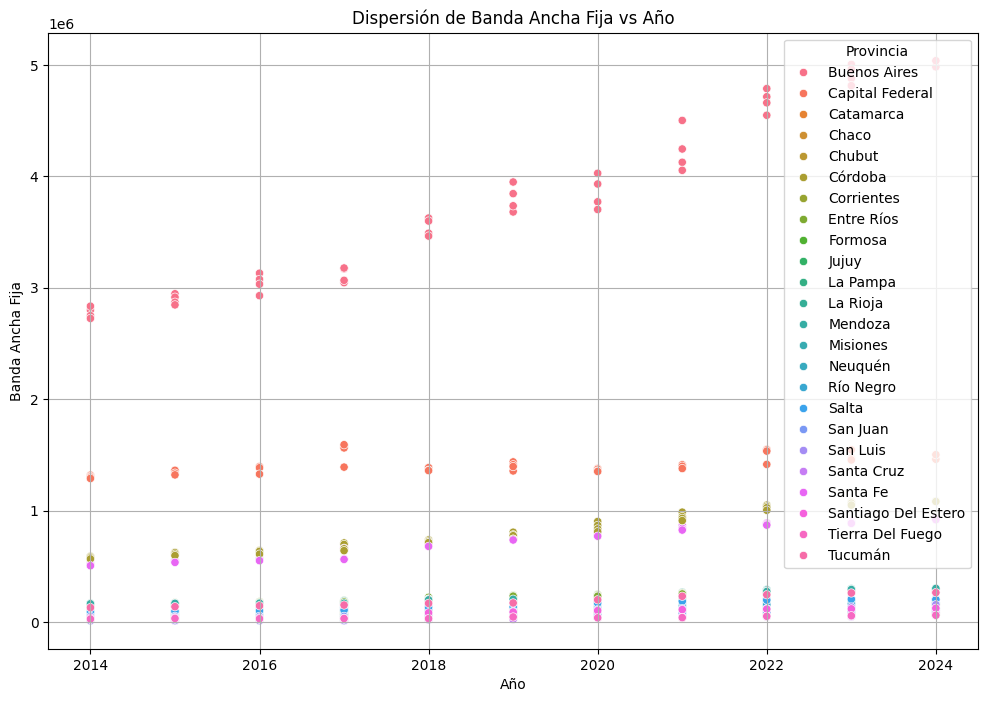

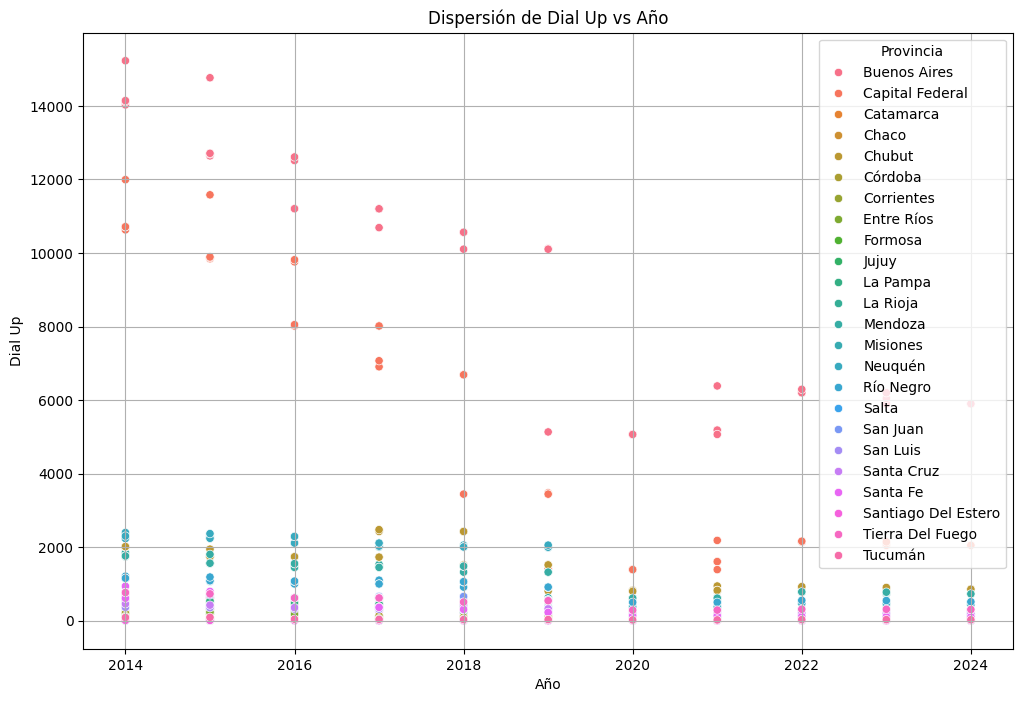

In [85]:
# Boxplot de Banda Ancha Fija por Provincia
plt.figure(figsize=(12, 8))
sns.boxplot(data=datos, x='Provincia', y='Banda ancha fija')
plt.title('Boxplot de Banda Ancha Fija por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Banda Ancha Fija')
plt.xticks(rotation=90)
plt.show()

# Boxplot de Dial Up por Provincia
plt.figure(figsize=(12, 8))
sns.boxplot(data=datos, x='Provincia', y='Dial up')
plt.title('Boxplot de Dial Up por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Dial Up')
plt.xticks(rotation=90)
plt.show()

# Histograma de Banda Ancha Fija
plt.figure(figsize=(12, 8))
sns.histplot(data=datos, x='Banda ancha fija', bins=30)
plt.title('Histograma de Banda Ancha Fija')
plt.xlabel('Banda Ancha Fija')
plt.ylabel('Frecuencia')
plt.show()

# Histograma de Dial Up
plt.figure(figsize=(12, 8))
sns.histplot(data=datos, x='Dial up', bins=30)
plt.title('Histograma de Dial Up')
plt.xlabel('Dial Up')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras de Banda Ancha Fija por Provincia
plt.figure(figsize=(12, 8))
sns.barplot(data=datos, x='Provincia', y='Banda ancha fija', estimator=sum)
plt.title('Banda Ancha Fija por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Banda Ancha Fija')
plt.xticks(rotation=90)
plt.show()

# Gráfico de barras de Dial Up por Provincia
plt.figure(figsize=(12, 8))
sns.barplot(data=datos, x='Provincia', y='Dial up', estimator=sum)
plt.title('Dial Up por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Dial Up')
plt.xticks(rotation=90)
plt.show()

# Gráfico de líneas de Banda Ancha Fija a lo largo del tiempo
plt.figure(figsize=(12, 8))
sns.lineplot(data=datos, x='Año', y='Banda ancha fija', hue='Provincia', marker='o')
plt.title('Banda Ancha Fija a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Banda Ancha Fija')
plt.grid(True)
plt.show()

# Gráfico de líneas de Dial Up a lo largo del tiempo
plt.figure(figsize=(12, 8))
sns.lineplot(data=datos, x='Año', y='Dial up', hue='Provincia', marker='o')
plt.title('Dial Up a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Dial Up')
plt.grid(True)
plt.show()

# Gráfico de dispersión de Banda Ancha Fija vs Año
plt.figure(figsize=(12, 8))
sns.scatterplot(data=datos, x='Año', y='Banda ancha fija', hue='Provincia')
plt.title('Dispersión de Banda Ancha Fija vs Año')
plt.xlabel('Año')
plt.ylabel('Banda Ancha Fija')
plt.grid(True)
plt.show()

# Gráfico de dispersión de Dial Up vs Año
plt.figure(figsize=(12, 8))
sns.scatterplot(data=datos, x='Año', y='Dial up', hue='Provincia')
plt.title('Dispersión de Dial Up vs Año')
plt.xlabel('Año')
plt.ylabel('Dial Up')
plt.grid(True)
plt.show()

##### Conclusión de la hoja "Dial-BAf":

1. **Estadísticas descriptivas**:
    - Las estadísticas descriptivas muestran la distribución de los accesos de Banda Ancha Fija y Dial Up por provincia y a lo largo de los años. Se observa una amplia variabilidad en los accesos, con algunas provincias teniendo un número significativamente mayor de accesos que otras.

2. **Boxplot**:
    - Los boxplots muestran la distribución de los accesos de Banda Ancha Fija y Dial Up por provincia. Podemos observar la presencia de outliers en los accesos, especialmente en los valores más altos.

3. **Histogramas**:
    - Los histogramas de los accesos muestran una distribución variada para Banda Ancha Fija y Dial Up. Algunas provincias tienen una distribución sesgada hacia la izquierda, indicando que la mayoría de los accesos son bajos, mientras que otras provincias tienen una distribución más uniforme.

4. **Gráficos de barras**:
    - Los gráficos de barras muestran la distribución de los accesos de Banda Ancha Fija y Dial Up por provincia. Podemos observar que algunas provincias tienen un número mucho mayor de accesos en comparación con otras.

5. **Gráficos de líneas**:
    - Los gráficos de líneas muestran la evolución de los accesos de Banda Ancha Fija y Dial Up a lo largo del tiempo. Podemos observar tendencias crecientes en algunas provincias, mientras que otras muestran una tendencia más estable.

6. **Gráficos de dispersión**:
    - Los gráficos de dispersión muestran la relación entre los accesos de Banda Ancha Fija y Dial Up con el año. Podemos observar una tendencia general de aumento en los accesos a lo largo del tiempo.

En resumen, los datos de la hoja "Dial-BAf" indican que hay una variabilidad considerable en los accesos de Banda Ancha Fija y Dial Up por provincia y a lo largo de los años. Algunas provincias muestran tendencias crecientes en los accesos, mientras que otras mantienen una tendencia más estable. Además, existen outliers significativos en los accesos, especialmente en los valores más altos.

In [86]:
hojas["Dial-BAf"] = datos


# Hoja 14: Totales Dial-BAf

In [87]:
datos=hojas["Totales Dial-BAf"]
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               42 non-null     int64 
 1   Trimestre         42 non-null     int64 
 2   Banda ancha fija  42 non-null     int64 
 3   Dial up           42 non-null     int64 
 4   Total             42 non-null     int64 
 5   Periodo           42 non-null     object
dtypes: int64(5), object(1)
memory usage: 2.1+ KB


Revisamos que las columnas que utilizaremos tengan el tipo correcto, al ser correctas, continuamos con el EDA

In [88]:
datos = realizar_eda("Totales Dial-BAf", datos)

Análisis de la hoja: Totales Dial-BAf
Valores faltantes:
Año                 0
Trimestre           0
Banda ancha fija    0
Dial up             0
Total               0
Periodo             0
dtype: int64
Registros duplicados:
0
Estadísticas descriptivas:
               Año  Trimestre  Banda ancha fija       Dial up         Total
count    42.000000  42.000000      4.200000e+01     42.000000  4.200000e+01
mean   2018.761905   2.452381      8.794433e+06  21490.190476  8.815923e+06
std       3.074756   1.130560      1.742229e+06  10136.781243  1.733189e+06
min    2014.000000   1.000000      6.362108e+06   9991.000000  6.398398e+06
25%    2016.000000   1.250000      7.189537e+06  11793.000000  7.218131e+06
50%    2019.000000   2.000000      8.704688e+06  21802.500000  8.720658e+06
75%    2021.000000   3.000000      1.037650e+07  28593.750000  1.038873e+07
max    2024.000000   4.000000      1.162136e+07  39324.000000  1.163316e+07


Al no tener valores faltantes ni registros duplicados, procedemos con los graficos

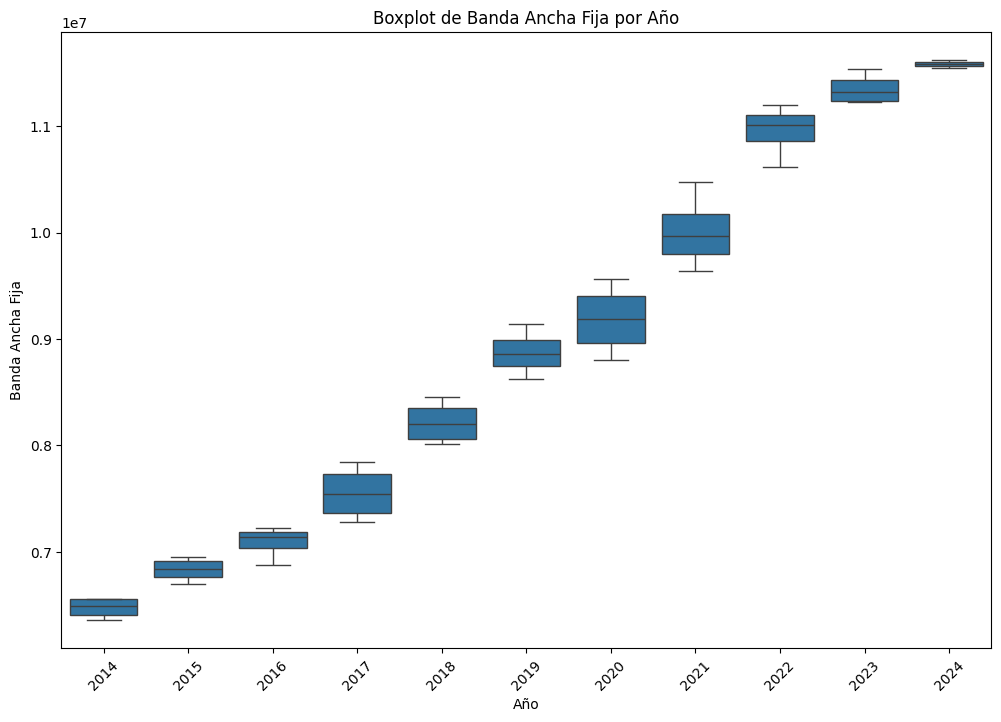

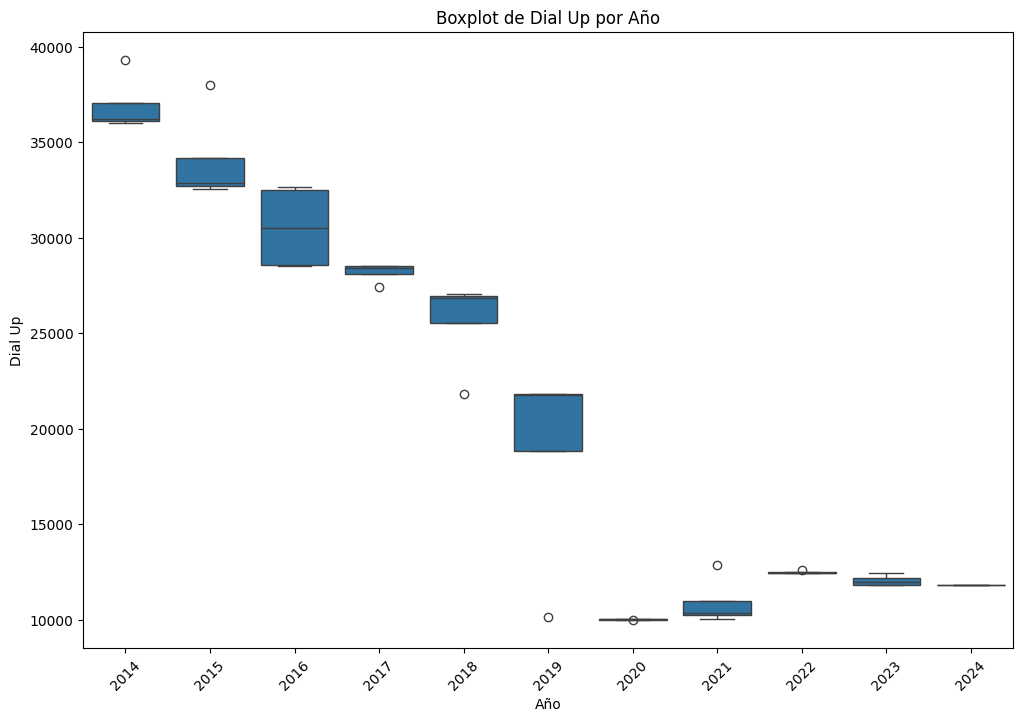

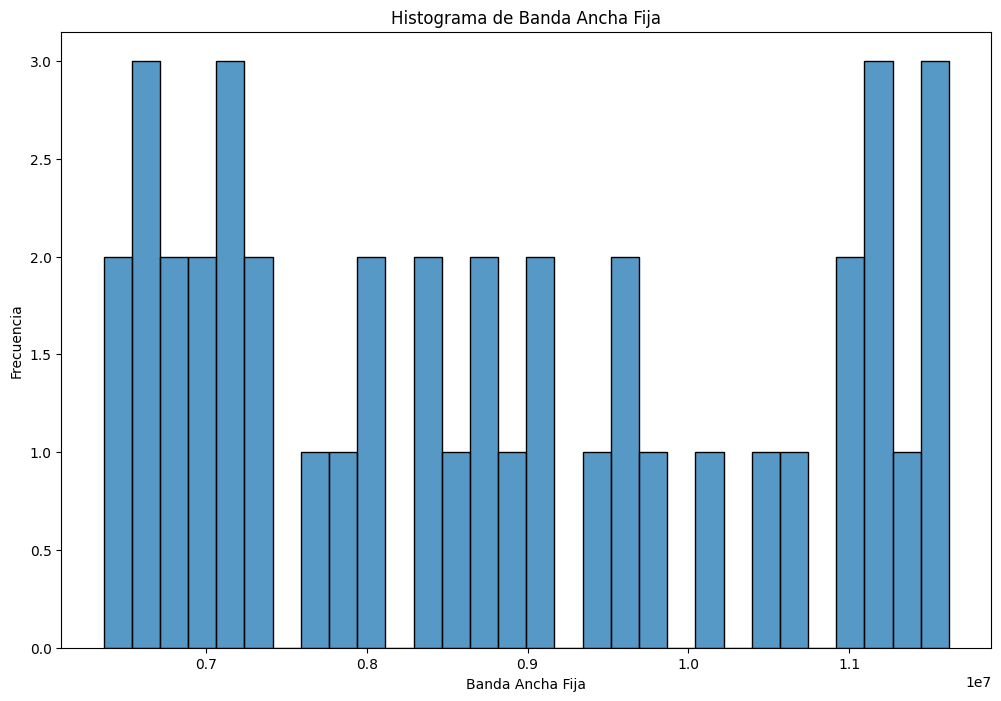

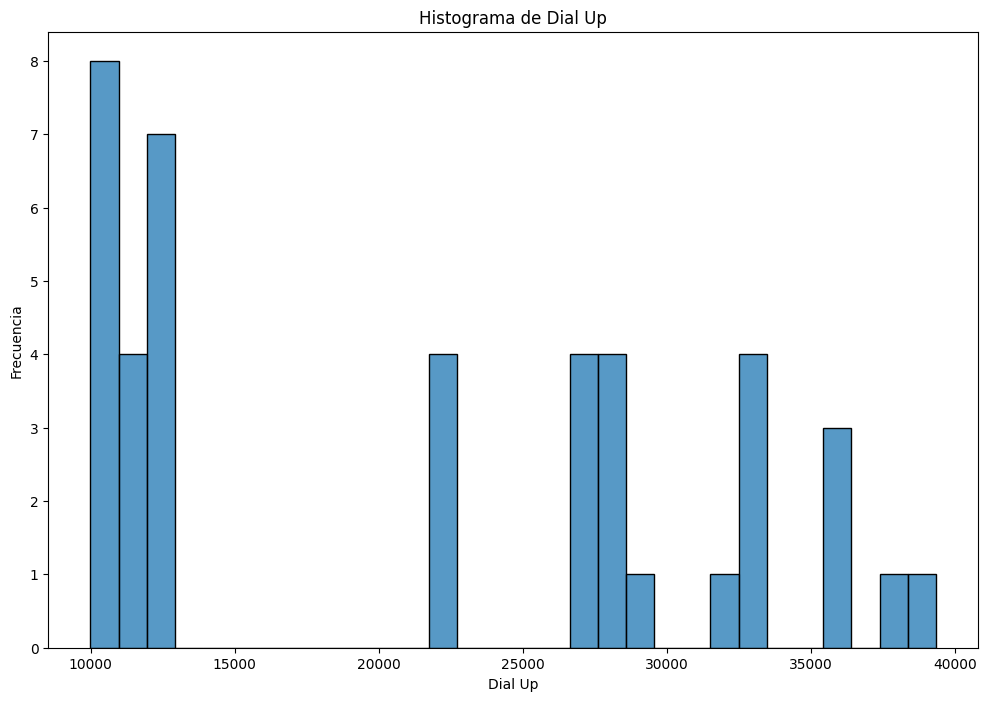

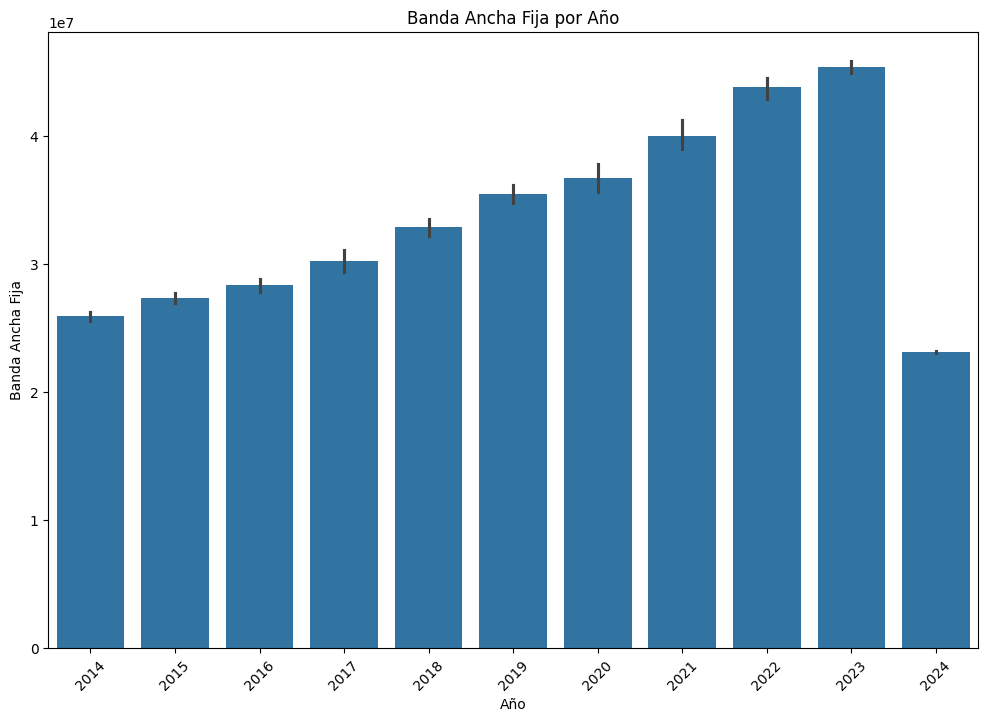

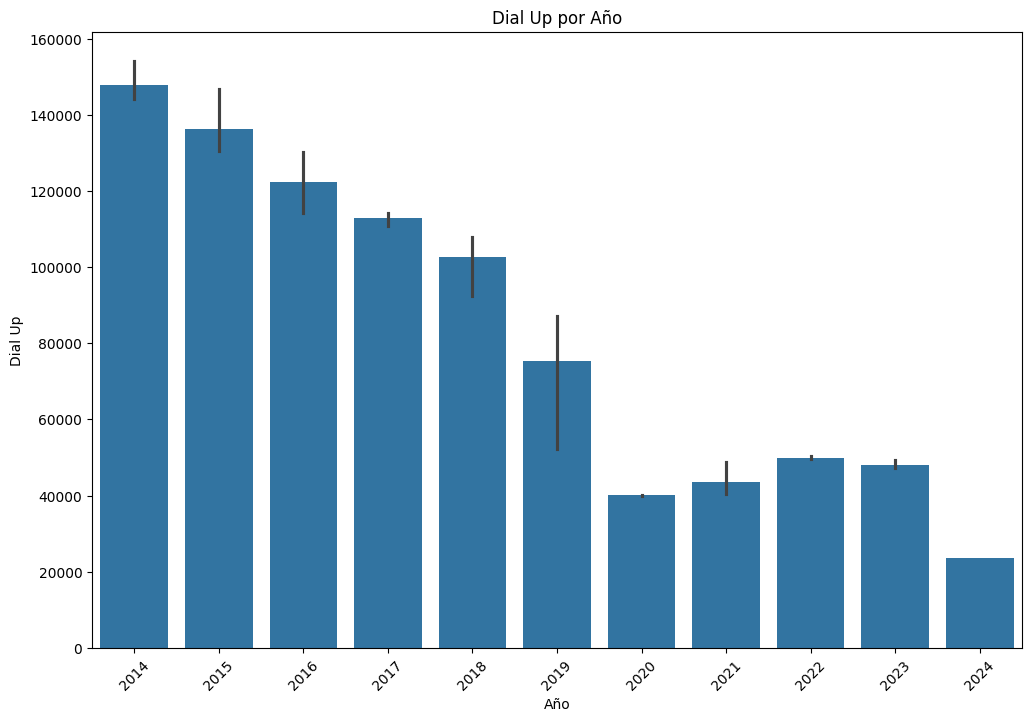

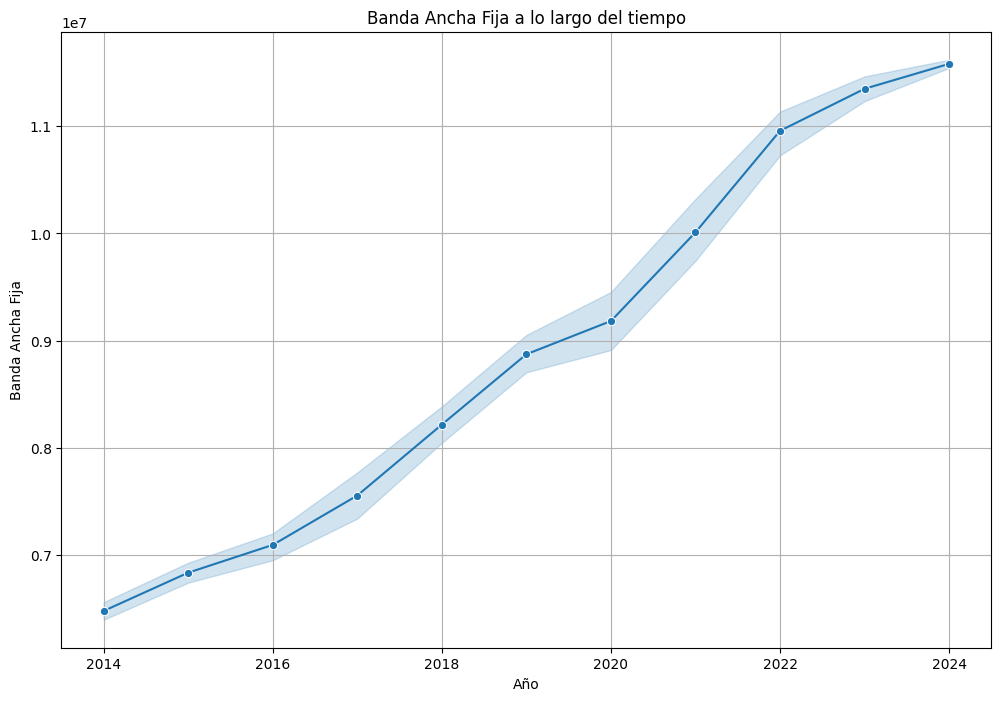

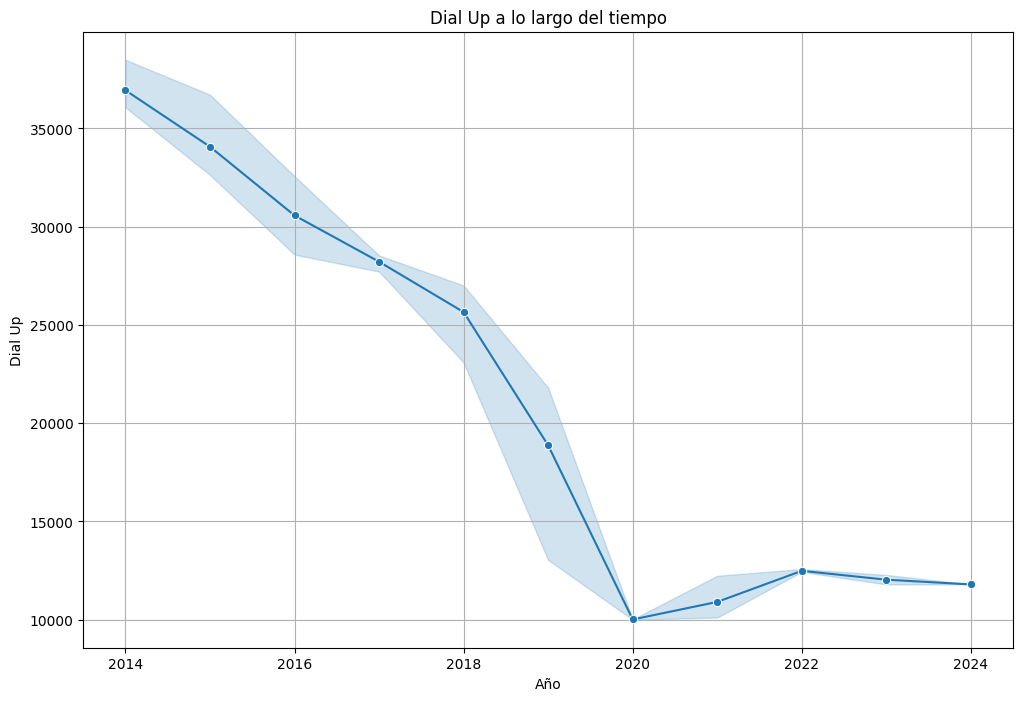

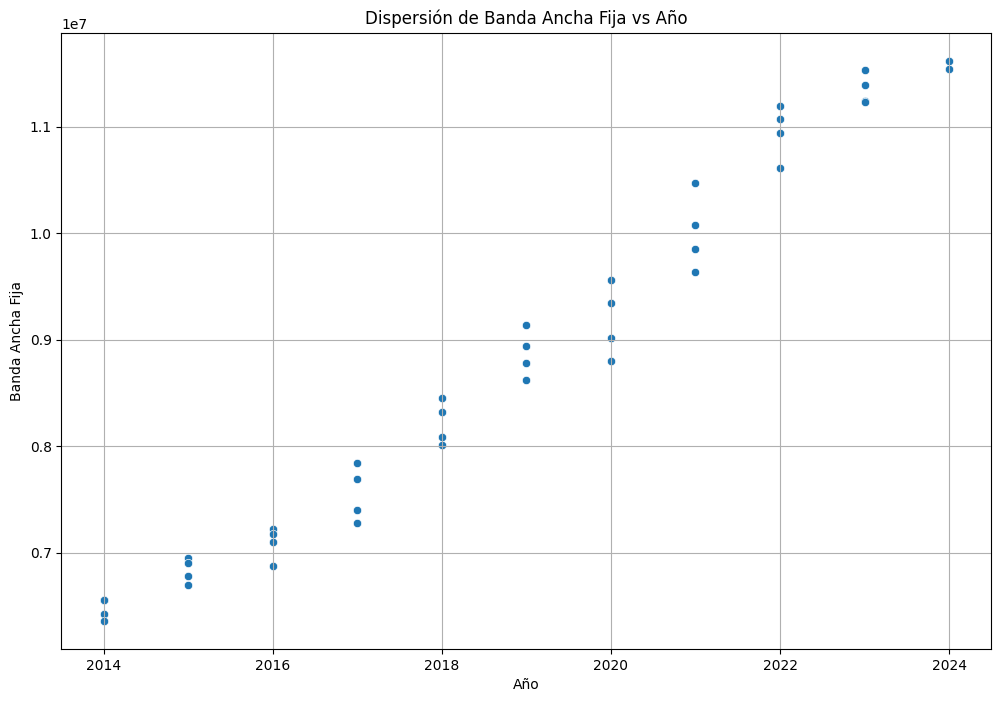

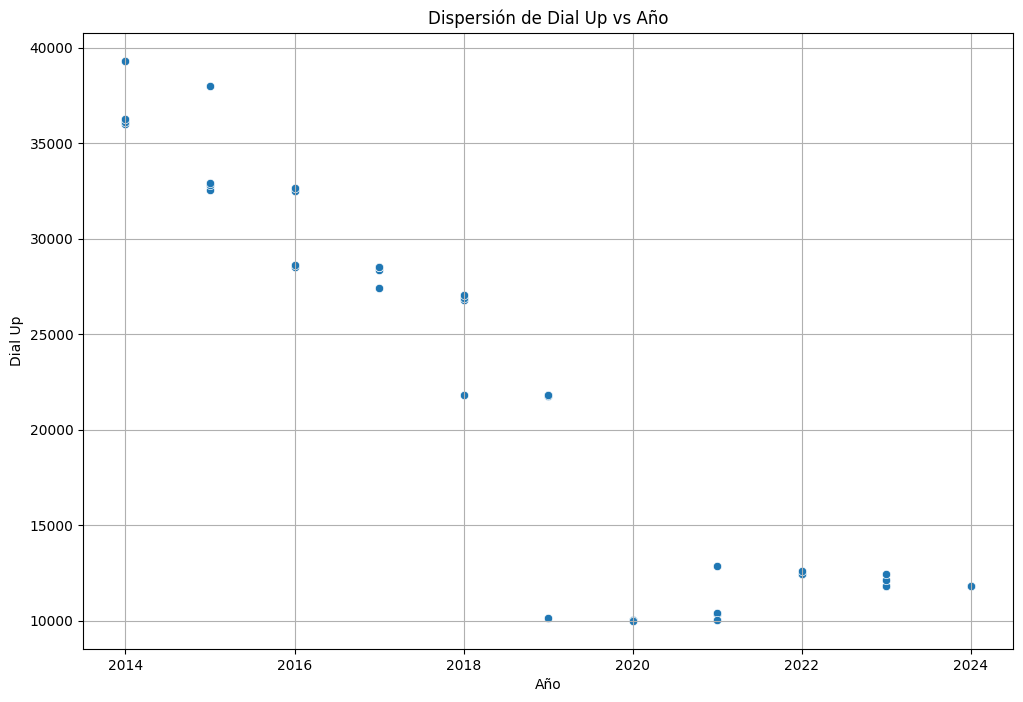

In [89]:
# Boxplot de Banda Ancha Fija por Año
plt.figure(figsize=(12, 8))
sns.boxplot(data=datos, x='Año', y='Banda ancha fija')
plt.title('Boxplot de Banda Ancha Fija por Año')
plt.xlabel('Año')
plt.ylabel('Banda Ancha Fija')
plt.xticks(rotation=45)
plt.show()

# Boxplot de Dial Up por Año
plt.figure(figsize=(12, 8))
sns.boxplot(data=datos, x='Año', y='Dial up')
plt.title('Boxplot de Dial Up por Año')
plt.xlabel('Año')
plt.ylabel('Dial Up')
plt.xticks(rotation=45)
plt.show()

# Histograma de Banda Ancha Fija
plt.figure(figsize=(12, 8))
sns.histplot(data=datos, x='Banda ancha fija', bins=30)
plt.title('Histograma de Banda Ancha Fija')
plt.xlabel('Banda Ancha Fija')
plt.ylabel('Frecuencia')
plt.show()

# Histograma de Dial Up
plt.figure(figsize=(12, 8))
sns.histplot(data=datos, x='Dial up', bins=30)
plt.title('Histograma de Dial Up')
plt.xlabel('Dial Up')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras de Banda Ancha Fija por Año
plt.figure(figsize=(12, 8))
sns.barplot(data=datos, x='Año', y='Banda ancha fija', estimator=sum)
plt.title('Banda Ancha Fija por Año')
plt.xlabel('Año')
plt.ylabel('Banda Ancha Fija')
plt.xticks(rotation=45)
plt.show()

# Gráfico de barras de Dial Up por Año
plt.figure(figsize=(12, 8))
sns.barplot(data=datos, x='Año', y='Dial up', estimator=sum)
plt.title('Dial Up por Año')
plt.xlabel('Año')
plt.ylabel('Dial Up')
plt.xticks(rotation=45)
plt.show()

# Gráfico de líneas de Banda Ancha Fija a lo largo del tiempo
plt.figure(figsize=(12, 8))
sns.lineplot(data=datos, x='Año', y='Banda ancha fija', marker='o')
plt.title('Banda Ancha Fija a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Banda Ancha Fija')
plt.grid(True)
plt.show()

# Gráfico de líneas de Dial Up a lo largo del tiempo
plt.figure(figsize=(12, 8))
sns.lineplot(data=datos, x='Año', y='Dial up', marker='o')
plt.title('Dial Up a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Dial Up')
plt.grid(True)
plt.show()

# Gráfico de dispersión de Banda Ancha Fija vs Año
plt.figure(figsize=(12, 8))
sns.scatterplot(data=datos, x='Año', y='Banda ancha fija')
plt.title('Dispersión de Banda Ancha Fija vs Año')
plt.xlabel('Año')
plt.ylabel('Banda Ancha Fija')
plt.grid(True)
plt.show()

# Gráfico de dispersión de Dial Up vs Año
plt.figure(figsize=(12, 8))
sns.scatterplot(data=datos, x='Año', y='Dial up')
plt.title('Dispersión de Dial Up vs Año')
plt.xlabel('Año')
plt.ylabel('Dial Up')
plt.grid(True)
plt.show()

##### Conclusiones de la hoja "Totales Dial-BAf":

1. **Estadísticas descriptivas**:
    - Las estadísticas descriptivas muestran la distribución de los accesos de Banda Ancha Fija y Dial Up a lo largo de los años. Se observa una amplia variabilidad en los accesos, con algunos años teniendo un número significativamente mayor de accesos que otros.

2. **Boxplot**:
    - Los boxplots muestran la distribución de los accesos de Banda Ancha Fija y Dial Up por año. Podemos observar la presencia de outliers en los accesos, especialmente en los valores más altos.

3. **Histogramas**:
    - Los histogramas de los accesos muestran una distribución variada para Banda Ancha Fija y Dial Up. Algunos años tienen una distribución sesgada hacia la izquierda, indicando que la mayoría de los accesos son bajos, mientras que otros años tienen una distribución más uniforme.

4. **Gráficos de barras**:
    - Los gráficos de barras muestran la distribución de los accesos de Banda Ancha Fija y Dial Up por año. Podemos observar que algunos años tienen un número mucho mayor de accesos en comparación con otros.

5. **Gráficos de líneas**:
    - Los gráficos de líneas muestran la evolución de los accesos de Banda Ancha Fija y Dial Up a lo largo del tiempo. Podemos observar tendencias crecientes en algunos años, mientras que otros muestran una tendencia más estable.

6. **Gráficos de dispersión**:
    - Los gráficos de dispersión muestran la relación entre los accesos de Banda Ancha Fija y Dial Up con el año. Podemos observar una tendencia general de aumento en los accesos a lo largo del tiempo.

En resumen, los datos de la hoja "Totales Dial-BAf" indican que hay una variabilidad considerable en los accesos de Banda Ancha Fija y Dial Up a lo largo de los años. Algunos años muestran tendencias crecientes en los accesos, mientras que otros mantienen una tendencia más estable. Además, existen outliers significativos en los accesos, especialmente en los valores más altos.

In [90]:
hojas["Totales Dial-BAf"] = datos

# Hoja 15: Ingresos

In [96]:
datos=hojas["Ingresos"]
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        42 non-null     int64  
 1   Trimestre                  42 non-null     int64  
 2   Ingresos (miles de pesos)  42 non-null     float64
 3   Periodo                    42 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


Revisamos que las columnas que utilizaremos tengan el tipo correcto, al ser correctas, continuamos con el EDA

In [97]:
datos = realizar_eda("Ingresos", datos)

Análisis de la hoja: Ingresos
Valores faltantes:
Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
dtype: int64
Registros duplicados:
0
Estadísticas descriptivas:
               Año  Trimestre  Ingresos (miles de pesos)
count    42.000000  42.000000               4.200000e+01
mean   2019.000000   2.452381               5.001648e+07
std       3.728597   1.130560               8.710208e+07
min    2014.000000   1.000000               2.984054e+06
25%    2016.000000   1.250000               7.055326e+06
50%    2019.000000   2.000000               2.047527e+07
75%    2021.000000   3.000000               4.485090e+07
max    2033.000000   4.000000               4.420322e+08


Al no contar con valores faltantes o registros duplicados, seguimos con los graficos

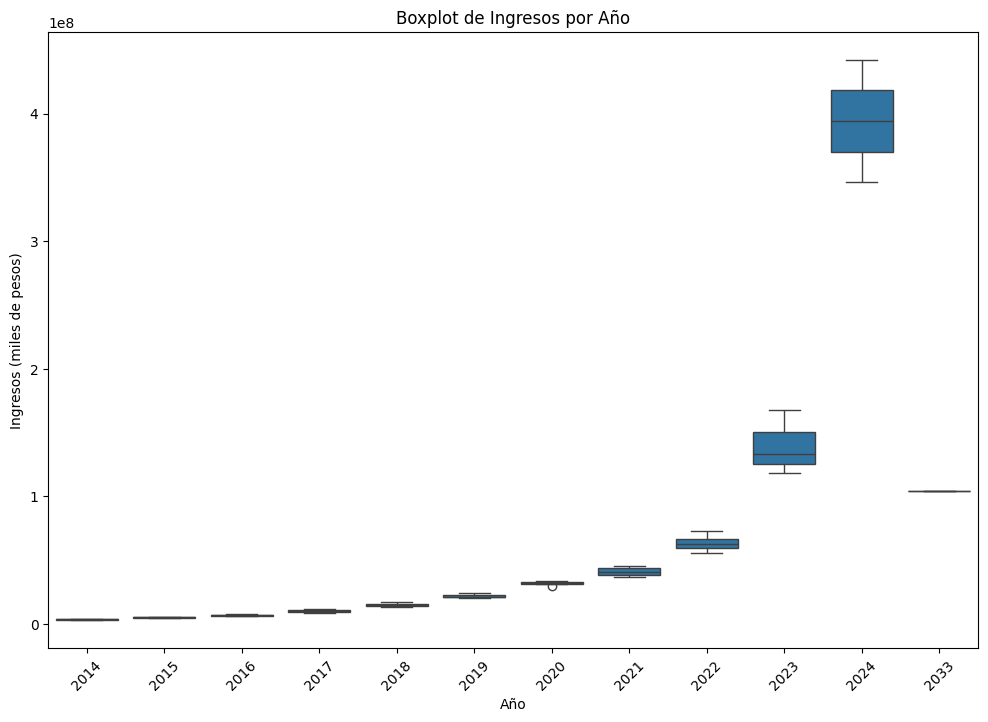

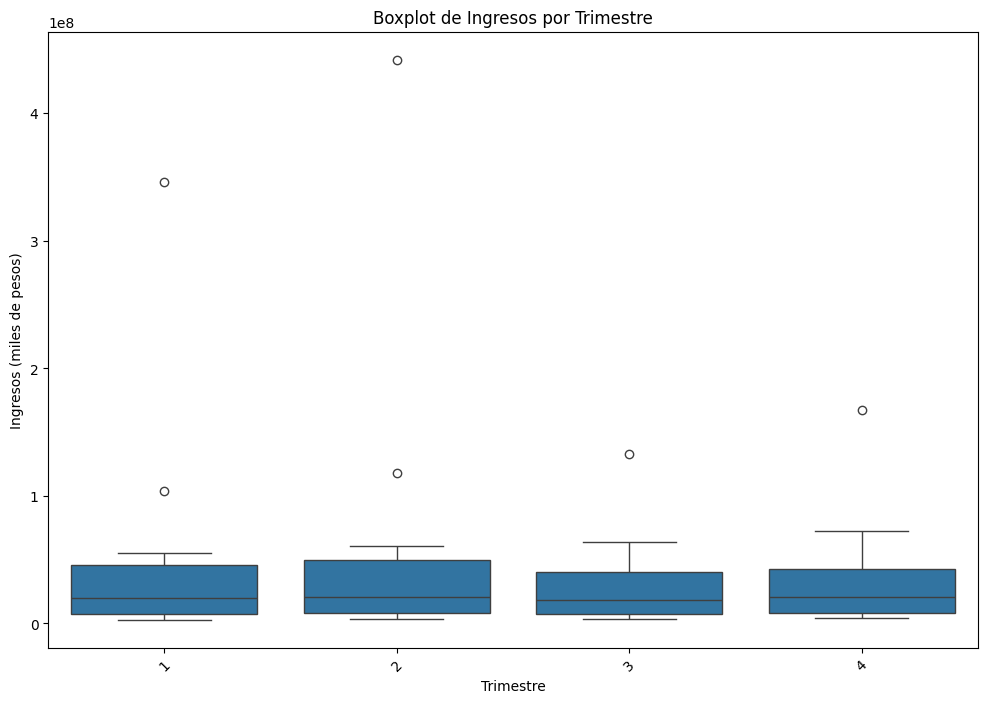

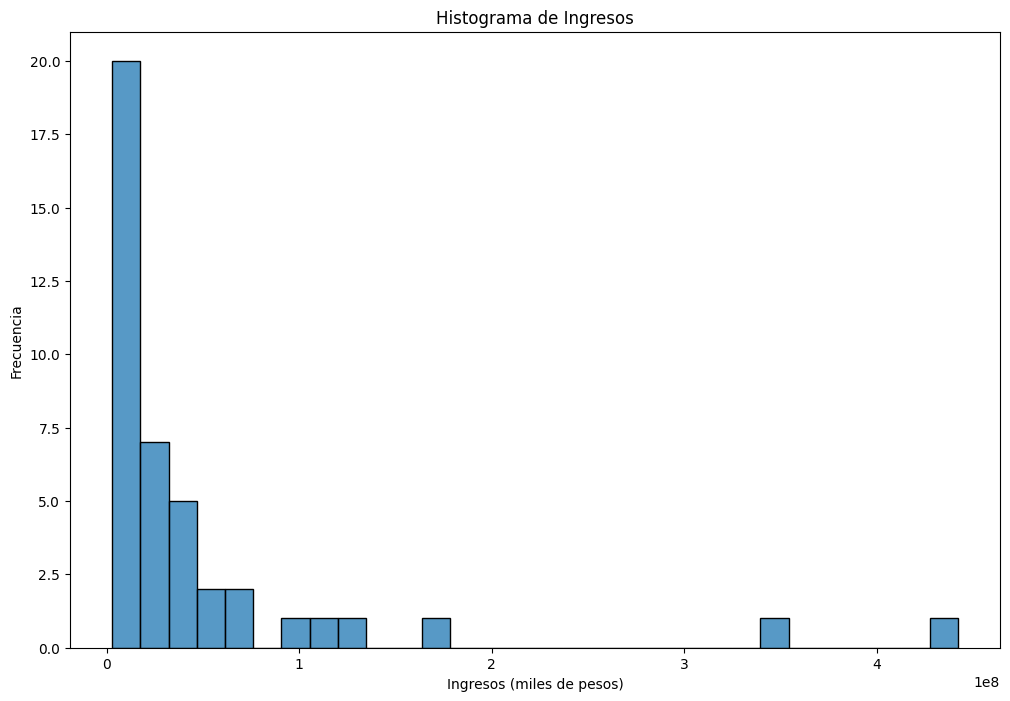

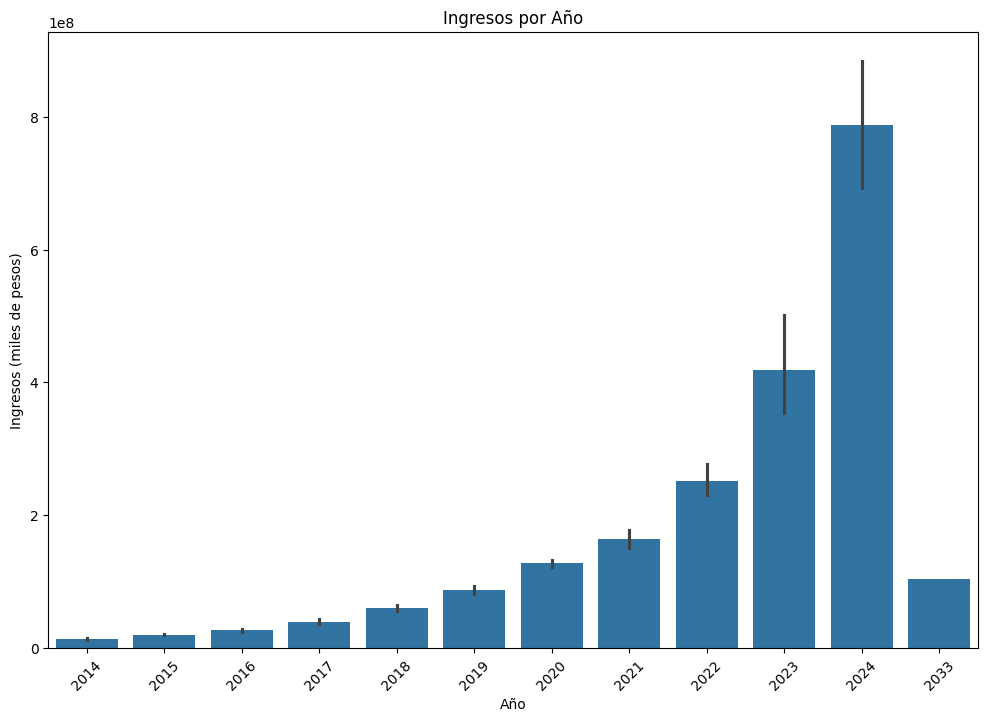

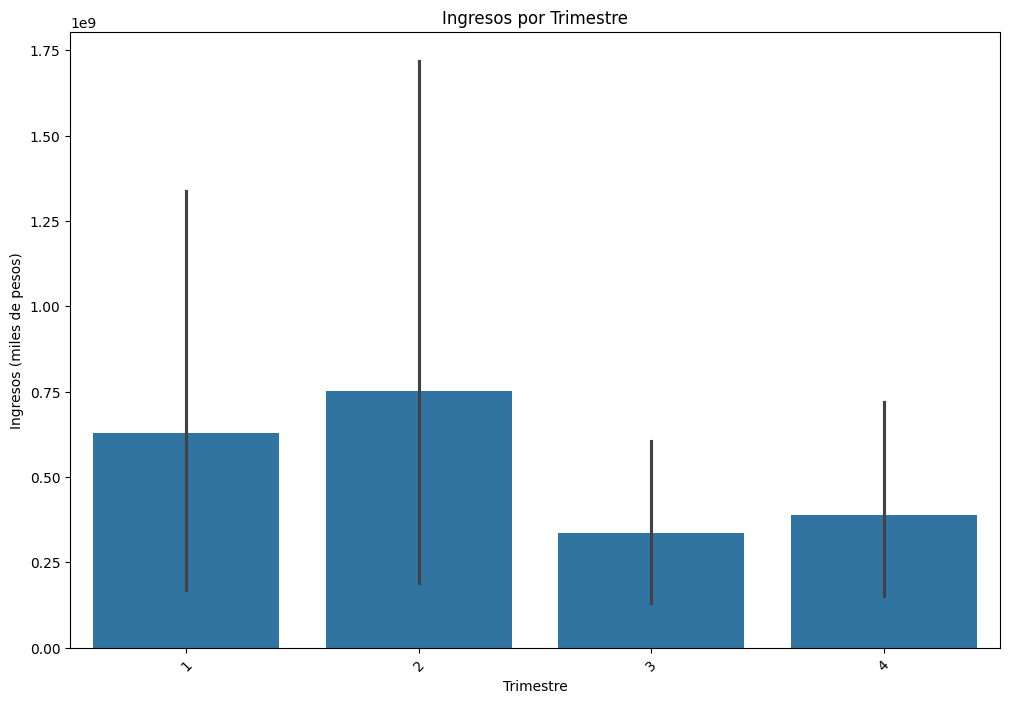

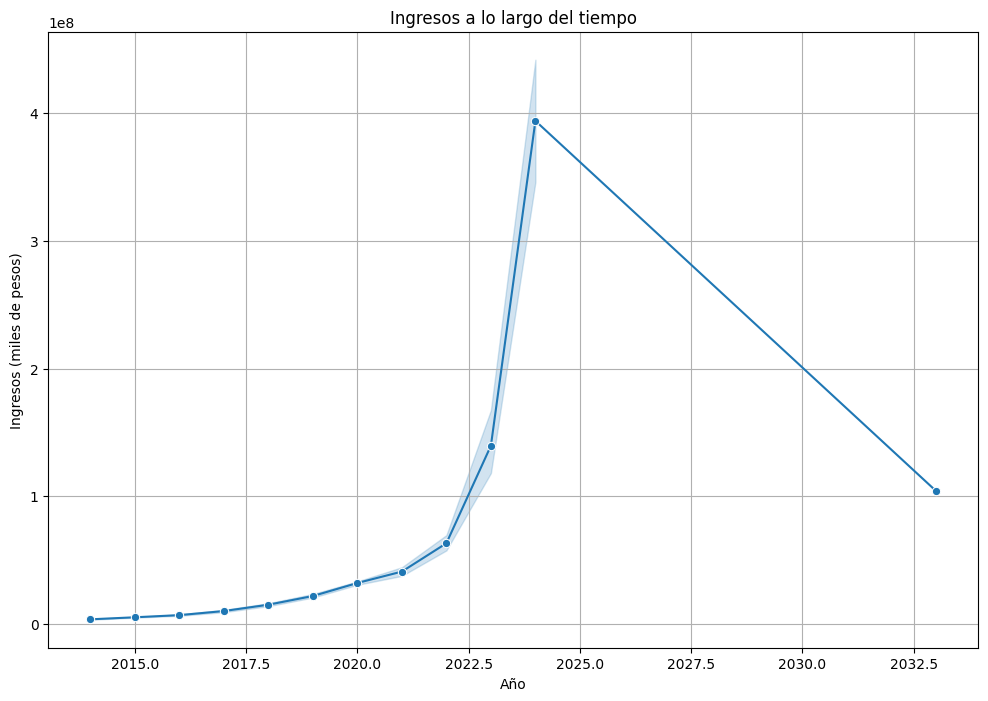

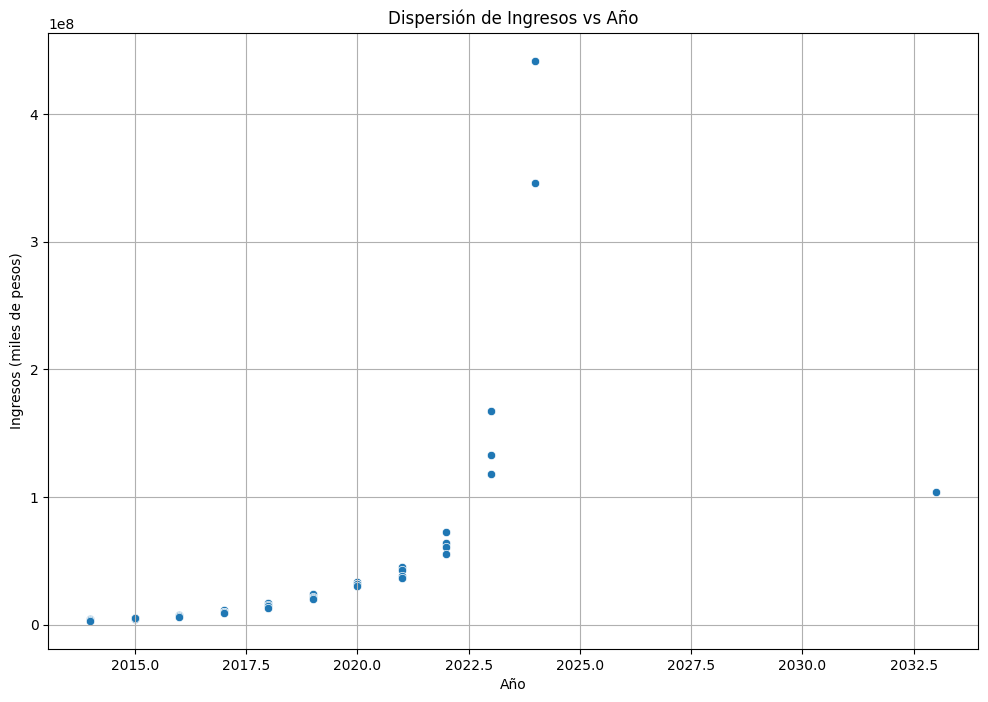

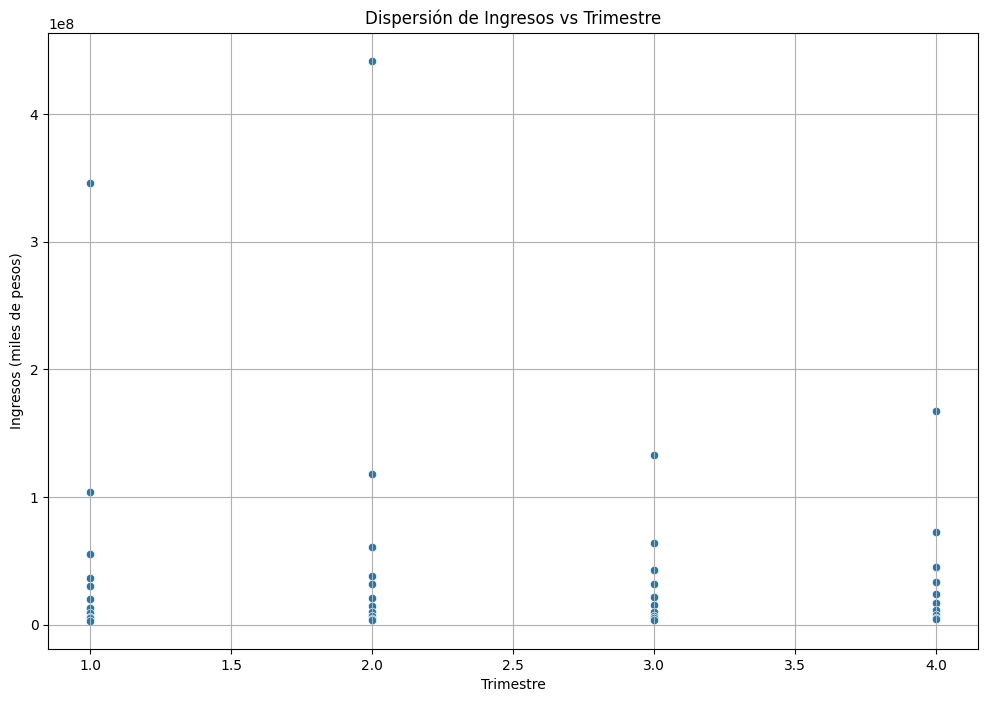

In [98]:
# Boxplot de Ingresos por Año
plt.figure(figsize=(12, 8))
sns.boxplot(data=datos, x='Año', y='Ingresos (miles de pesos)')
plt.title('Boxplot de Ingresos por Año')
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de pesos)')
plt.xticks(rotation=45)
plt.show()

# Boxplot de Ingresos por Trimestre
plt.figure(figsize=(12, 8))
sns.boxplot(data=datos, x='Trimestre', y='Ingresos (miles de pesos)')
plt.title('Boxplot de Ingresos por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Ingresos (miles de pesos)')
plt.xticks(rotation=45)
plt.show()

# Histograma de Ingresos
plt.figure(figsize=(12, 8))
sns.histplot(data=datos, x='Ingresos (miles de pesos)', bins=30)
plt.title('Histograma de Ingresos')
plt.xlabel('Ingresos (miles de pesos)')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de Barras de Ingresos por Año
plt.figure(figsize=(12, 8))
sns.barplot(data=datos, x='Año', y='Ingresos (miles de pesos)', estimator=sum)
plt.title('Ingresos por Año')
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de pesos)')
plt.xticks(rotation=45)
plt.show()

# Gráfico de Barras de Ingresos por Trimestre
plt.figure(figsize=(12, 8))
sns.barplot(data=datos, x='Trimestre', y='Ingresos (miles de pesos)', estimator=sum)
plt.title('Ingresos por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Ingresos (miles de pesos)')
plt.xticks(rotation=45)
plt.show()

# Gráfico de Líneas de Ingresos a lo largo del tiempo
plt.figure(figsize=(12, 8))
sns.lineplot(data=datos, x='Año', y='Ingresos (miles de pesos)', marker='o')
plt.title('Ingresos a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de pesos)')
plt.grid(True)
plt.show()

# Gráfico de Dispersión de Ingresos vs Año
plt.figure(figsize=(12, 8))
sns.scatterplot(data=datos, x='Año', y='Ingresos (miles de pesos)')
plt.title('Dispersión de Ingresos vs Año')
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de pesos)')
plt.grid(True)
plt.show()

# Gráfico de Dispersión de Ingresos vs Trimestre
plt.figure(figsize=(12, 8))
sns.scatterplot(data=datos, x='Trimestre', y='Ingresos (miles de pesos)')
plt.title('Dispersión de Ingresos vs Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Ingresos (miles de pesos)')
plt.grid(True)
plt.show()

##### Conclusiones de la hoja "Ingresos":

1. **Estadísticas descriptivas**:
    - Las estadísticas descriptivas muestran la distribución de los ingresos (en miles de pesos) a lo largo de los años y trimestres. Se observa una amplia variabilidad en los ingresos, con algunos años y trimestres teniendo ingresos significativamente mayores que otros.

2. **Boxplot**:
    - Los boxplots muestran la distribución de los ingresos por año y por trimestre. Podemos observar la presencia de outliers en los ingresos, especialmente en los valores más altos. Esto indica que hay algunos periodos con ingresos excepcionalmente altos en comparación con otros.

3. **Histogramas**:
    - Los histogramas de los ingresos muestran una distribución variada. La mayoría de los periodos tienen ingresos bajos, mientras que algunos periodos tienen ingresos significativamente más altos. Esto sugiere que los ingresos no están distribuidos uniformemente a lo largo del tiempo.

4. **Gráficos de barras**:
    - Los gráficos de barras muestran la distribución de los ingresos por año y por trimestre. Podemos observar que algunos años y trimestres tienen un número mucho mayor de ingresos en comparación con otros. Esto indica que hay periodos específicos con un aumento significativo en los ingresos.

5. **Gráficos de líneas**:
    - Los gráficos de líneas muestran la evolución de los ingresos a lo largo del tiempo. Podemos observar tendencias crecientes en algunos años, mientras que otros muestran una tendencia más estable. Esto sugiere que los ingresos han aumentado de manera constante en ciertos periodos.

6. **Gráficos de dispersión**:
    - Los gráficos de dispersión muestran la relación entre los ingresos y el año/trimestre. Podemos observar una tendencia general de aumento en los ingresos a lo largo del tiempo. Esto indica que los ingresos han crecido de manera constante a lo largo de los años.

En resumen, los datos de la hoja "Ingresos" indican que hay una variabilidad considerable en los ingresos a lo largo de los años y trimestres. Algunos periodos muestran tendencias crecientes en los ingresos, mientras que otros mantienen una tendencia más estable. Además, existen outliers significativos en los ingresos, especialmente en los valores más altos.

In [99]:
hojas["Ingresos"] = datos

Exportamos las Hojas a distintos csv, para manejarnos de forma más comoda

In [105]:
# Guardar cada DataFrame en un archivo CSV separado 
with pd.ExcelWriter('./datos/datos_procesados.xlsx') as writer: 
    for hoja, df in hojas.items(): 
        df.to_excel(writer, sheet_name=hoja, index=False)